# Experiment 1 #

Augmenting mnist dataset by rescaling, relocating

Experimenting with CNN (with average pooling layers)




In [1]:
#@title  { form-width: "30%" }

max_scale = 2.5 #@param {type:"number"}
min_scale = 0.8 #@param {type:"number"}
gauss_var = 0.3 #@param {type:"number"}


In [1]:
import matplotlib.pyplot as plt


import h5py
import tensorflow as tf

from utils import *
from keras.datasets import mnist
from keras.models import Sequential, load_model


from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D

from keras.regularizers import l2
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
from keras import models

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


## preprocess data for experiement 1:
    random scaling and random location

In [8]:
## preprocess data for experiement 1

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = augment(X_train, output_size=192, resize_scale = (min_scale, max_scale), add_noise=False)
X_test = augment(X_test, output_size=192, resize_scale = (min_scale, max_scale), add_noise=False)


11493376/11490434 [==============================] - 1s 0us/step


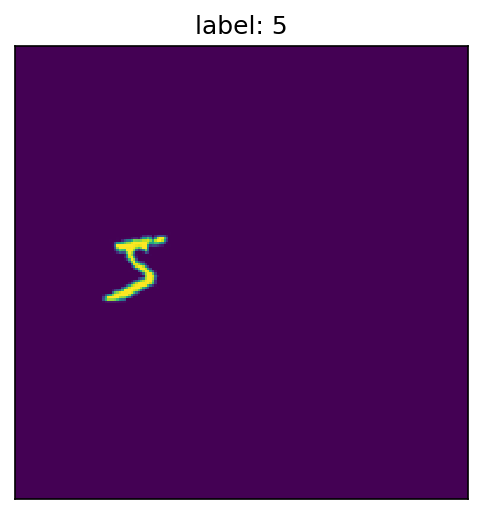

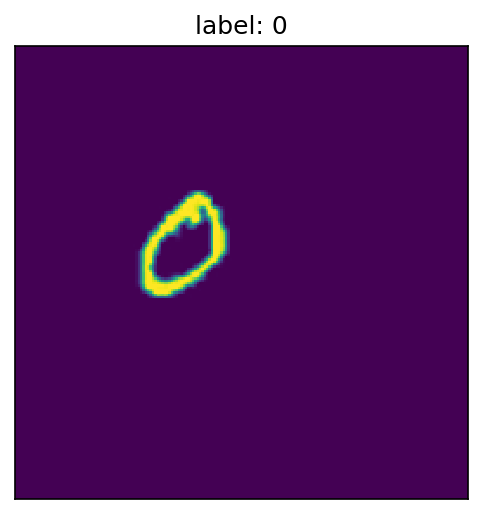

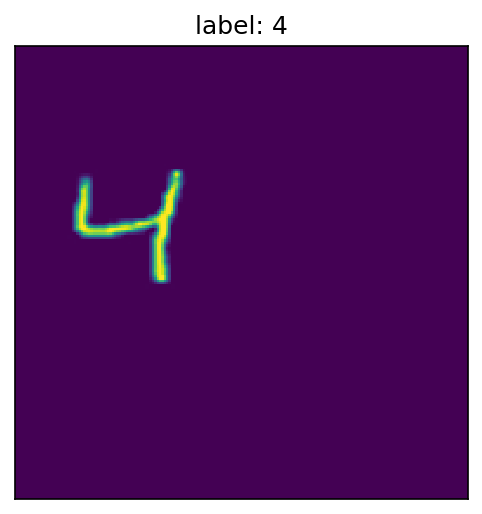

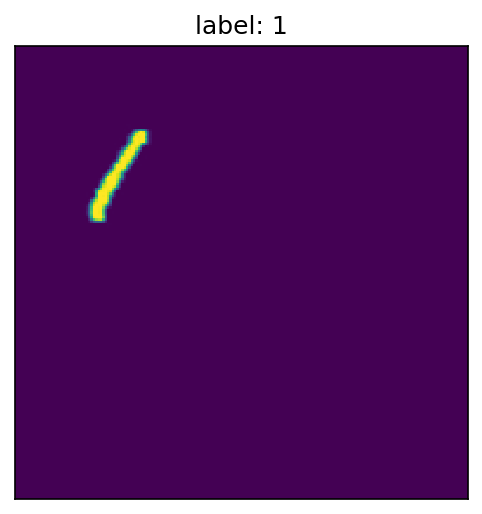

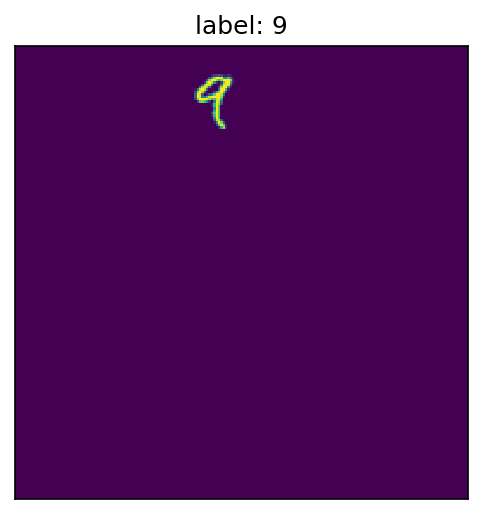

In [0]:
for i in range(5):
    show_img(img = X_train[i], label = y_train[i])

In [8]:


# reshape to be [samples][pixels][width][height]
size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 1, size, size).astype('float32')


X_test = X_test.reshape(X_test.shape[0], 1, size, size).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255

X_test = X_test / 255


#split test set to val and test set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, 
												random_state=0)

# one-hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# y_val = np_utils.to_categorical(y_val)

In [ ]:
X_train, y_train = load_data_from_npz(192,"rescaled_relocated_", set_type="train")

In [26]:
# X_val, y_val = load_data(192,"rescaled_relocated_", set_type="val")
X_test, y_test = load_data_from_npz(192,"rescaled_relocated_", set_type="test")

In [11]:
# save_as_npz(X_train, y_train, name="rescaled_relocated_", set_type="train", 
#             data_dir = "datasets")
# save_as_npz(X_val, y_val, name="rescaled_relocated_", set_type="val", 
#             data_dir = "datasets")
# save_as_npz(X_test, y_test, name="rescaled_relocated_", set_type="test", 
#             data_dir = "datasets")

# Building model

In [149]:
print(tf.test.gpu_device_name())
K.set_image_dim_ordering('th')

/device:GPU:0


In [150]:
#@title configuration and hyperparameters { form-width: "30%" }
seed = 7 #@param {type:"integer"}

epoch_num = 30 #@param {type:"integer"}

batch_size = 128 #@param {type:"integer"}

optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, 
                            decay=0.0, amsgrad=False)

size = 192
np.random.seed(seed)


In [155]:
#@title  { form-width: "30%" }

experiment_index = 1 #@param {type:"integer"}
experiment_subindex = 1 #@param {type:"integer"}

def build_model(size, opt="adam"):
	# create model
	model = Sequential()
	model.add(Conv2D(64, (3, 3), input_shape=(1, size, size), activation='relu', name="conv_3x3_1"))
	model.add(AveragePooling2D(pool_size=(2, 2), name = "averPool_2x2_1"))
	model.add(Dropout(0.3, name = "drop_1"))

	model.add(Conv2D(64, (5, 5), activation='relu', name="conv_5x5_2"))
	model.add(AveragePooling2D(pool_size=(2, 2),name="averPool_2x2_2"))
	model.add(Dropout(0.3, name = "drop_2"))

	model.add(Conv2D(32, (5, 5), activation='relu', name="conv_5x5_3"))
	model.add(AveragePooling2D(pool_size=(2, 2), name="averPool_2x2_3"))

# 	model.add(Conv2D(32, (5, 5), activation='relu'))
# 	model.add(AveragePooling2D(pool_size=(2, 2)))
	
	model.add(Flatten(name="flatten"))
	model.add(Dropout(0.35, name = "drop_3"))

	model.add(Dense(128, activation='relu', 
            kernel_regularizer=l2(0.),
                    name="dense_1"
        ))
	model.add(Dropout(0.3, name = "drop_4"))
    
	model.add(Dense(10, activation='softmax', 
        kernel_regularizer=l2(0.),
                    name="dense_2"
        ))
	# Compile model
	model.compile(loss='categorical_crossentropy', 
					optimizer=opt, metrics=['accuracy'])
	return model

model = build_model(size, opt=optimizer)

# model.save('models/experiment_{}.{}_.h5'.format(experiment_index, experiment_subindex))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_3x3_1 (Conv2D)          (None, 64, 190, 190)      640       
_________________________________________________________________
averPool_2x2_1 (AveragePooli (None, 64, 95, 95)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 64, 95, 95)        0         
_________________________________________________________________
conv_5x5_2 (Conv2D)          (None, 64, 91, 91)        102464    
_________________________________________________________________
averPool_2x2_2 (AveragePooli (None, 64, 45, 45)        0         
_________________________________________________________________
drop_2 (Dropout)             (None, 64, 45, 45)        0         
_________________________________________________________________
conv_5x5_3 (Conv2D)          (None, 32, 41, 41)        51232     
__________

# Training model

In [0]:
#
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
					epochs=epoch_num, 
					batch_size=batch_size, verbose=1)

model.save_weights('weights/experiment_{}_{}.h5'.format(experiment_index, experiment_subindex))


In [ ]:
# validation step 6000/256
# steps per epoch 54000/256

history = model.fit_generator(generator = train_batch_generator.next_batch(), 
                              steps_per_epoch=210, epochs=epoch_num, verbose=1, 
                              callbacks=None, 
                              validation_data=val_batch_generator.next_batch(),
                              validation_steps=23) 

# Evaluation

In [7]:
experiment_index, experiment_subindex = 1,0

new_model = load_model('models/experiment_{}_{}.h5'.format(experiment_index, experiment_subindex))
new_model.load_weights('weights/experiment_{}_{}.h5'.format(experiment_index, experiment_subindex))

W0726 15:13:51.761008 140529798522624 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 15:13:51.789580 140529798522624 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 15:13:51.797437 140529798522624 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 15:13:51.798047 140529798522624 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is d

In [8]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 188, 188)      1664      
_________________________________________________________________
average_pooling2d_1 (Average (None, 64, 94, 94)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 94, 94)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 90, 90)        102464    
_________________________________________________________________
average_pooling2d_2 (Average (None, 64, 45, 45)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 45, 45)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 41, 41)        51232     
__________

In [28]:
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)
assert y_test_onehot.shape == (10000, 10)
scores = new_model.evaluate(X_test, y_test_onehot, verbose=1)
print("Baseline Error on test set: %.2f%%" % (100-scores[1]*100))



# # write results to text file
# with open("Results_experiment_{}_{}.txt".format(experiment_index, experiment_subindex),"w") as f:
#     f.write("model: 4 conv, average pooling, 2 dense\n")
#     f.write("data: permutation \n")
#     f.write("Accuracy: " + str(scores[1]))

10000/10000 [==============================] - 7s 668us/step
Baseline Error on test set: 1.67%


In [ ]:
# plot accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy\ntest accuracy: ' + str(scores[1]))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.savefig('histories/acc_experiment_{}_{}.png'.format(experiment_index, experiment_subindex),bbox_inches='tight')
plt.show()

In [ ]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
plt.savefig('histories/loss_experiment_{}_{}.png'.format(experiment_index, experiment_subindex),bbox_inches='tight')
plt.show()

# Results

Experiment 1 : accuracy 98.3%

Experiment 2 : accuracy 97.3%

Experiment 3 : accuracy 56.9%

Experiment 4 : accuracy 11.3%

# load model and visualize output


In [8]:
experiment_index, experiment_subindex = 1,0

new_model = load_model('models/experiment_{}_{}.h5'.format(experiment_index, experiment_subindex))
new_model.load_weights('weights/experiment_{}_{}.h5'.format(experiment_index, experiment_subindex))

W0731 10:38:26.153701 140710943364864 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 10:38:26.163372 140710943364864 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 10:38:26.171304 140710943364864 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 10:38:26.172004 140710943364864 deprecation_wrapper.py:119] From /home/dattran/miniconda3/envs/hieu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is d

In [6]:
# conv 1

layer_index = 0

W = new_model.get_layer(name=new_model.layers[layer_index].name).get_weights()[0]
W = np.transpose(np.squeeze(W), axes=(2,0,1))
# W = layer_weights[0][0].get_value()
print(W.shape)

(64, 5, 5)


64  channels


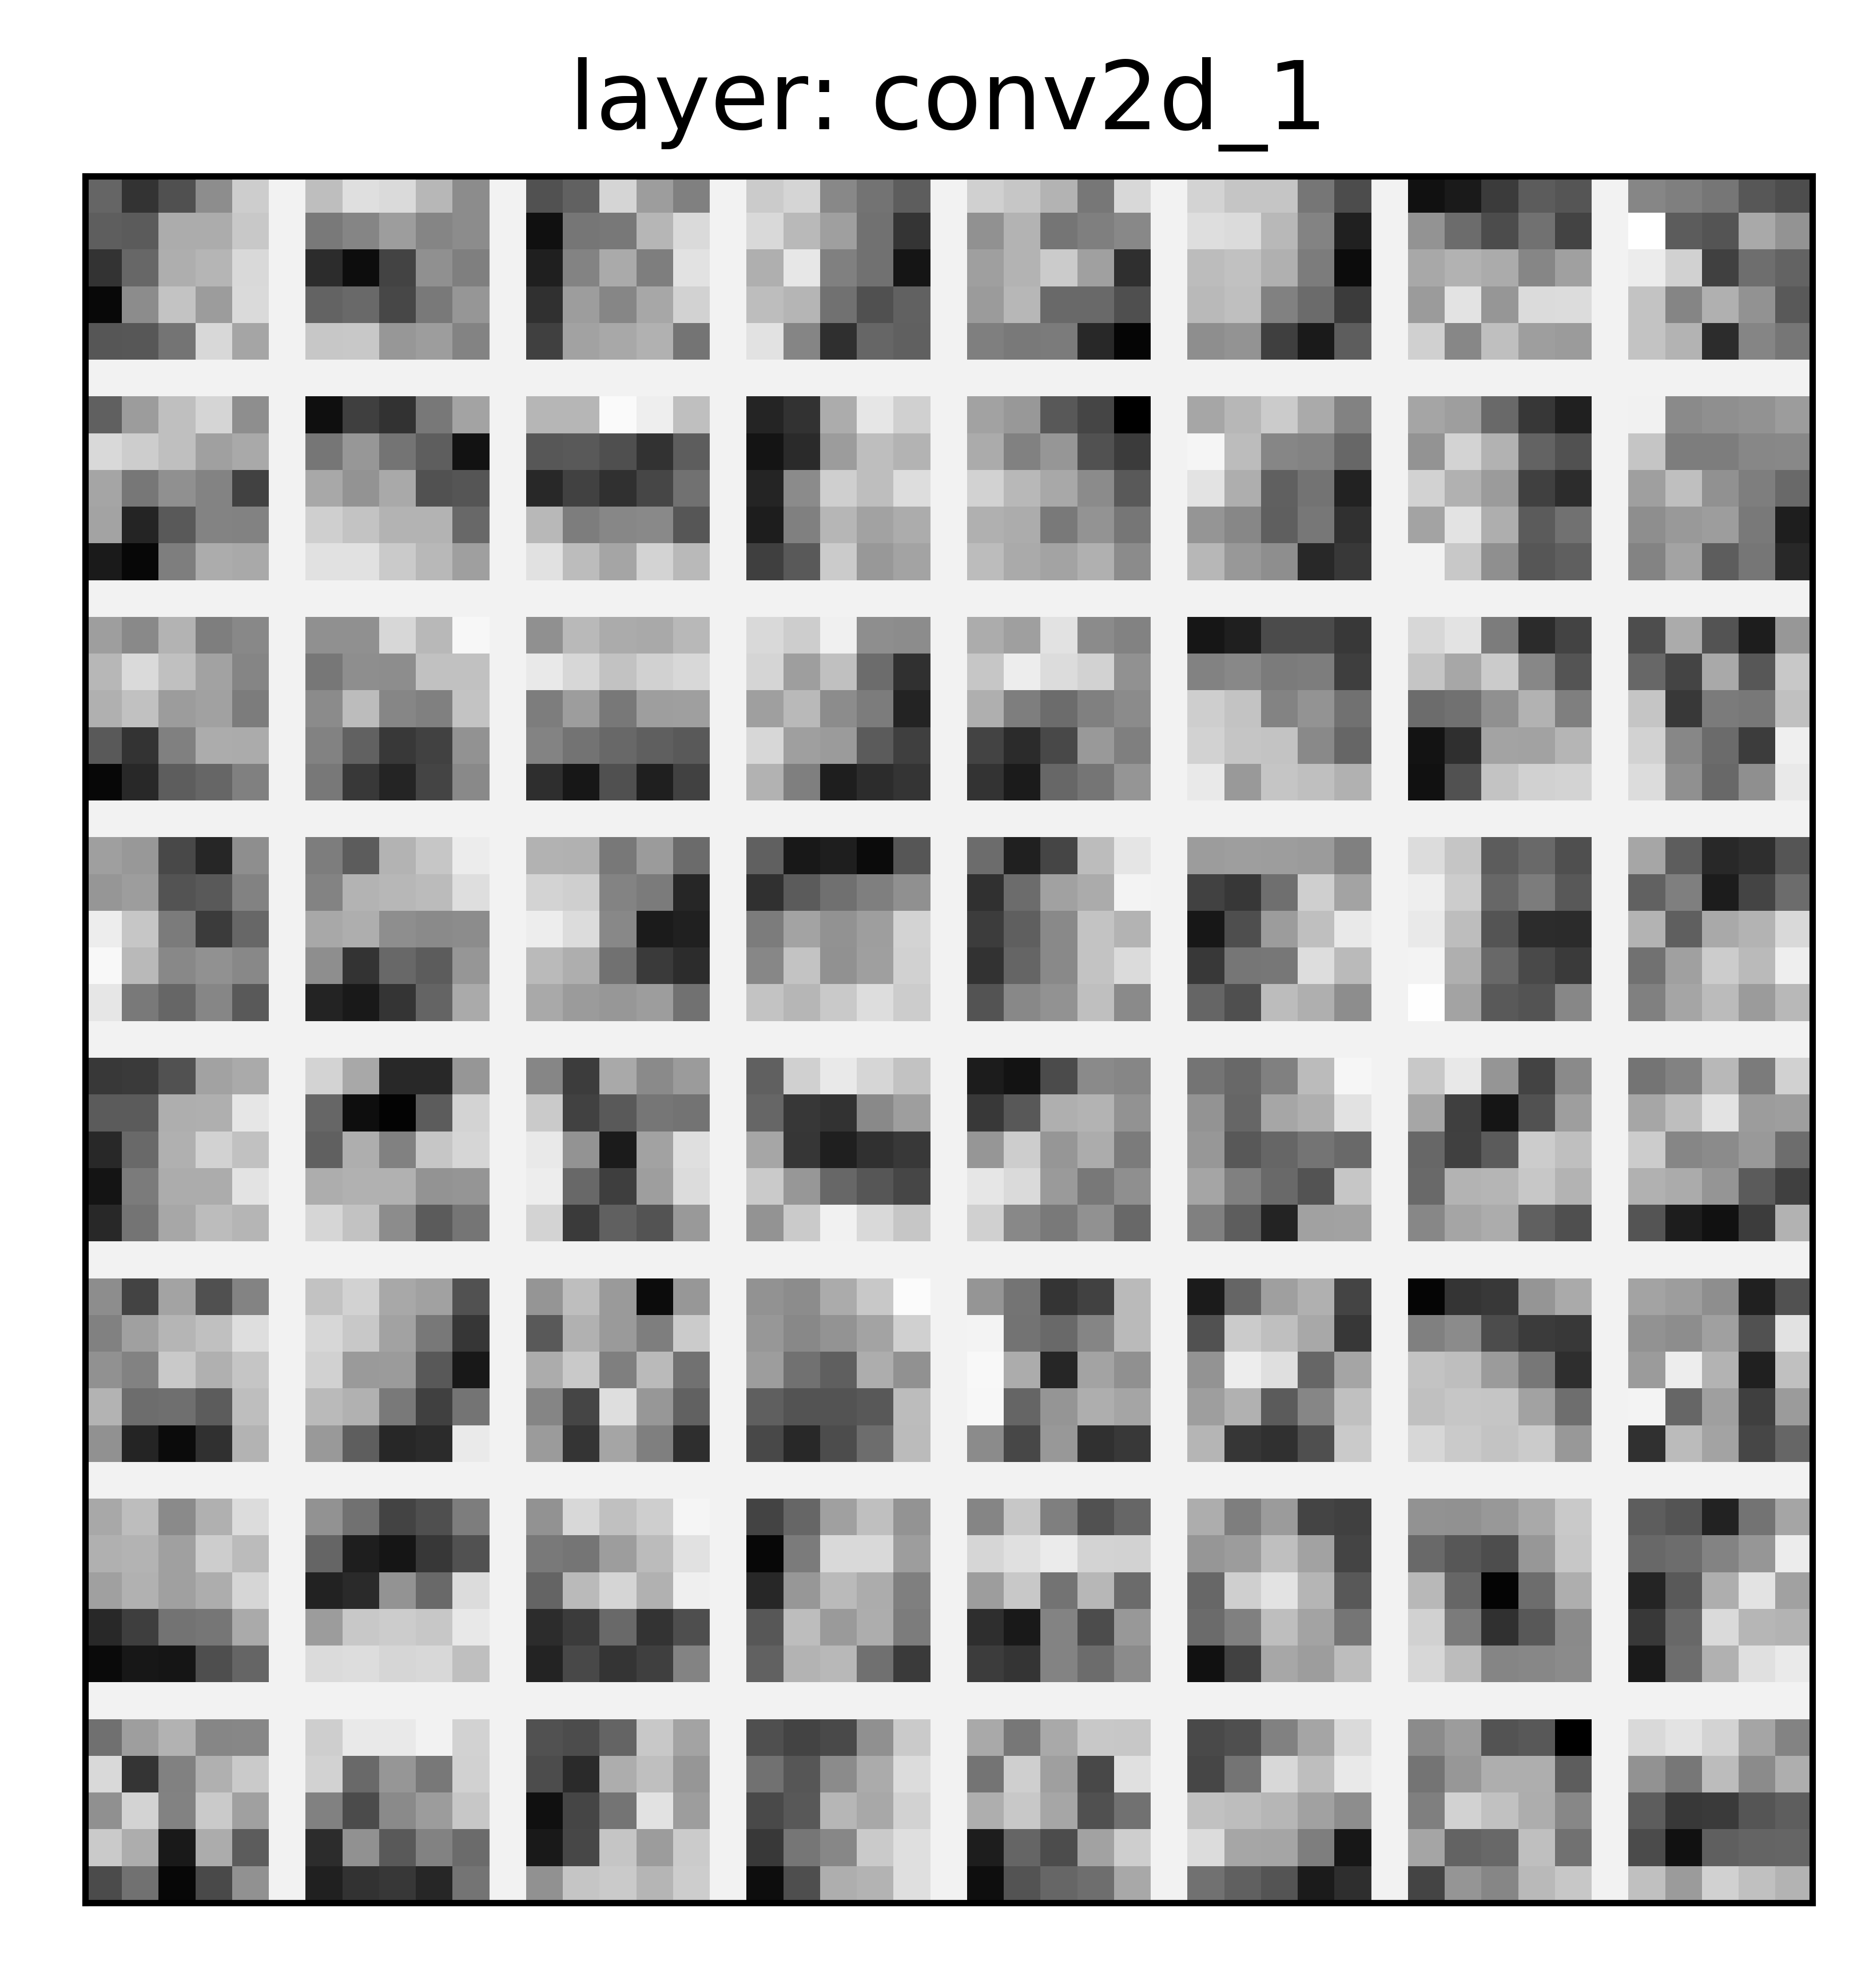

In [7]:
display_activation(W,8, new_model.layers[layer_index].name, cmap="gray")

In [13]:
layer_index = 3

W = new_model.get_layer(name=new_model.layers[layer_index].name).get_weights()[0]
W = np.transpose(W.reshape((5,5,W.shape[2]*W.shape[3])), axes=(2,0,1))
# W = layer_weights[0][0].get_value()
print(W.shape)
# display_activation(W,8, new_model.layers[layer_index].name, cmap="gray")

(4096, 5, 5)


4096  channels


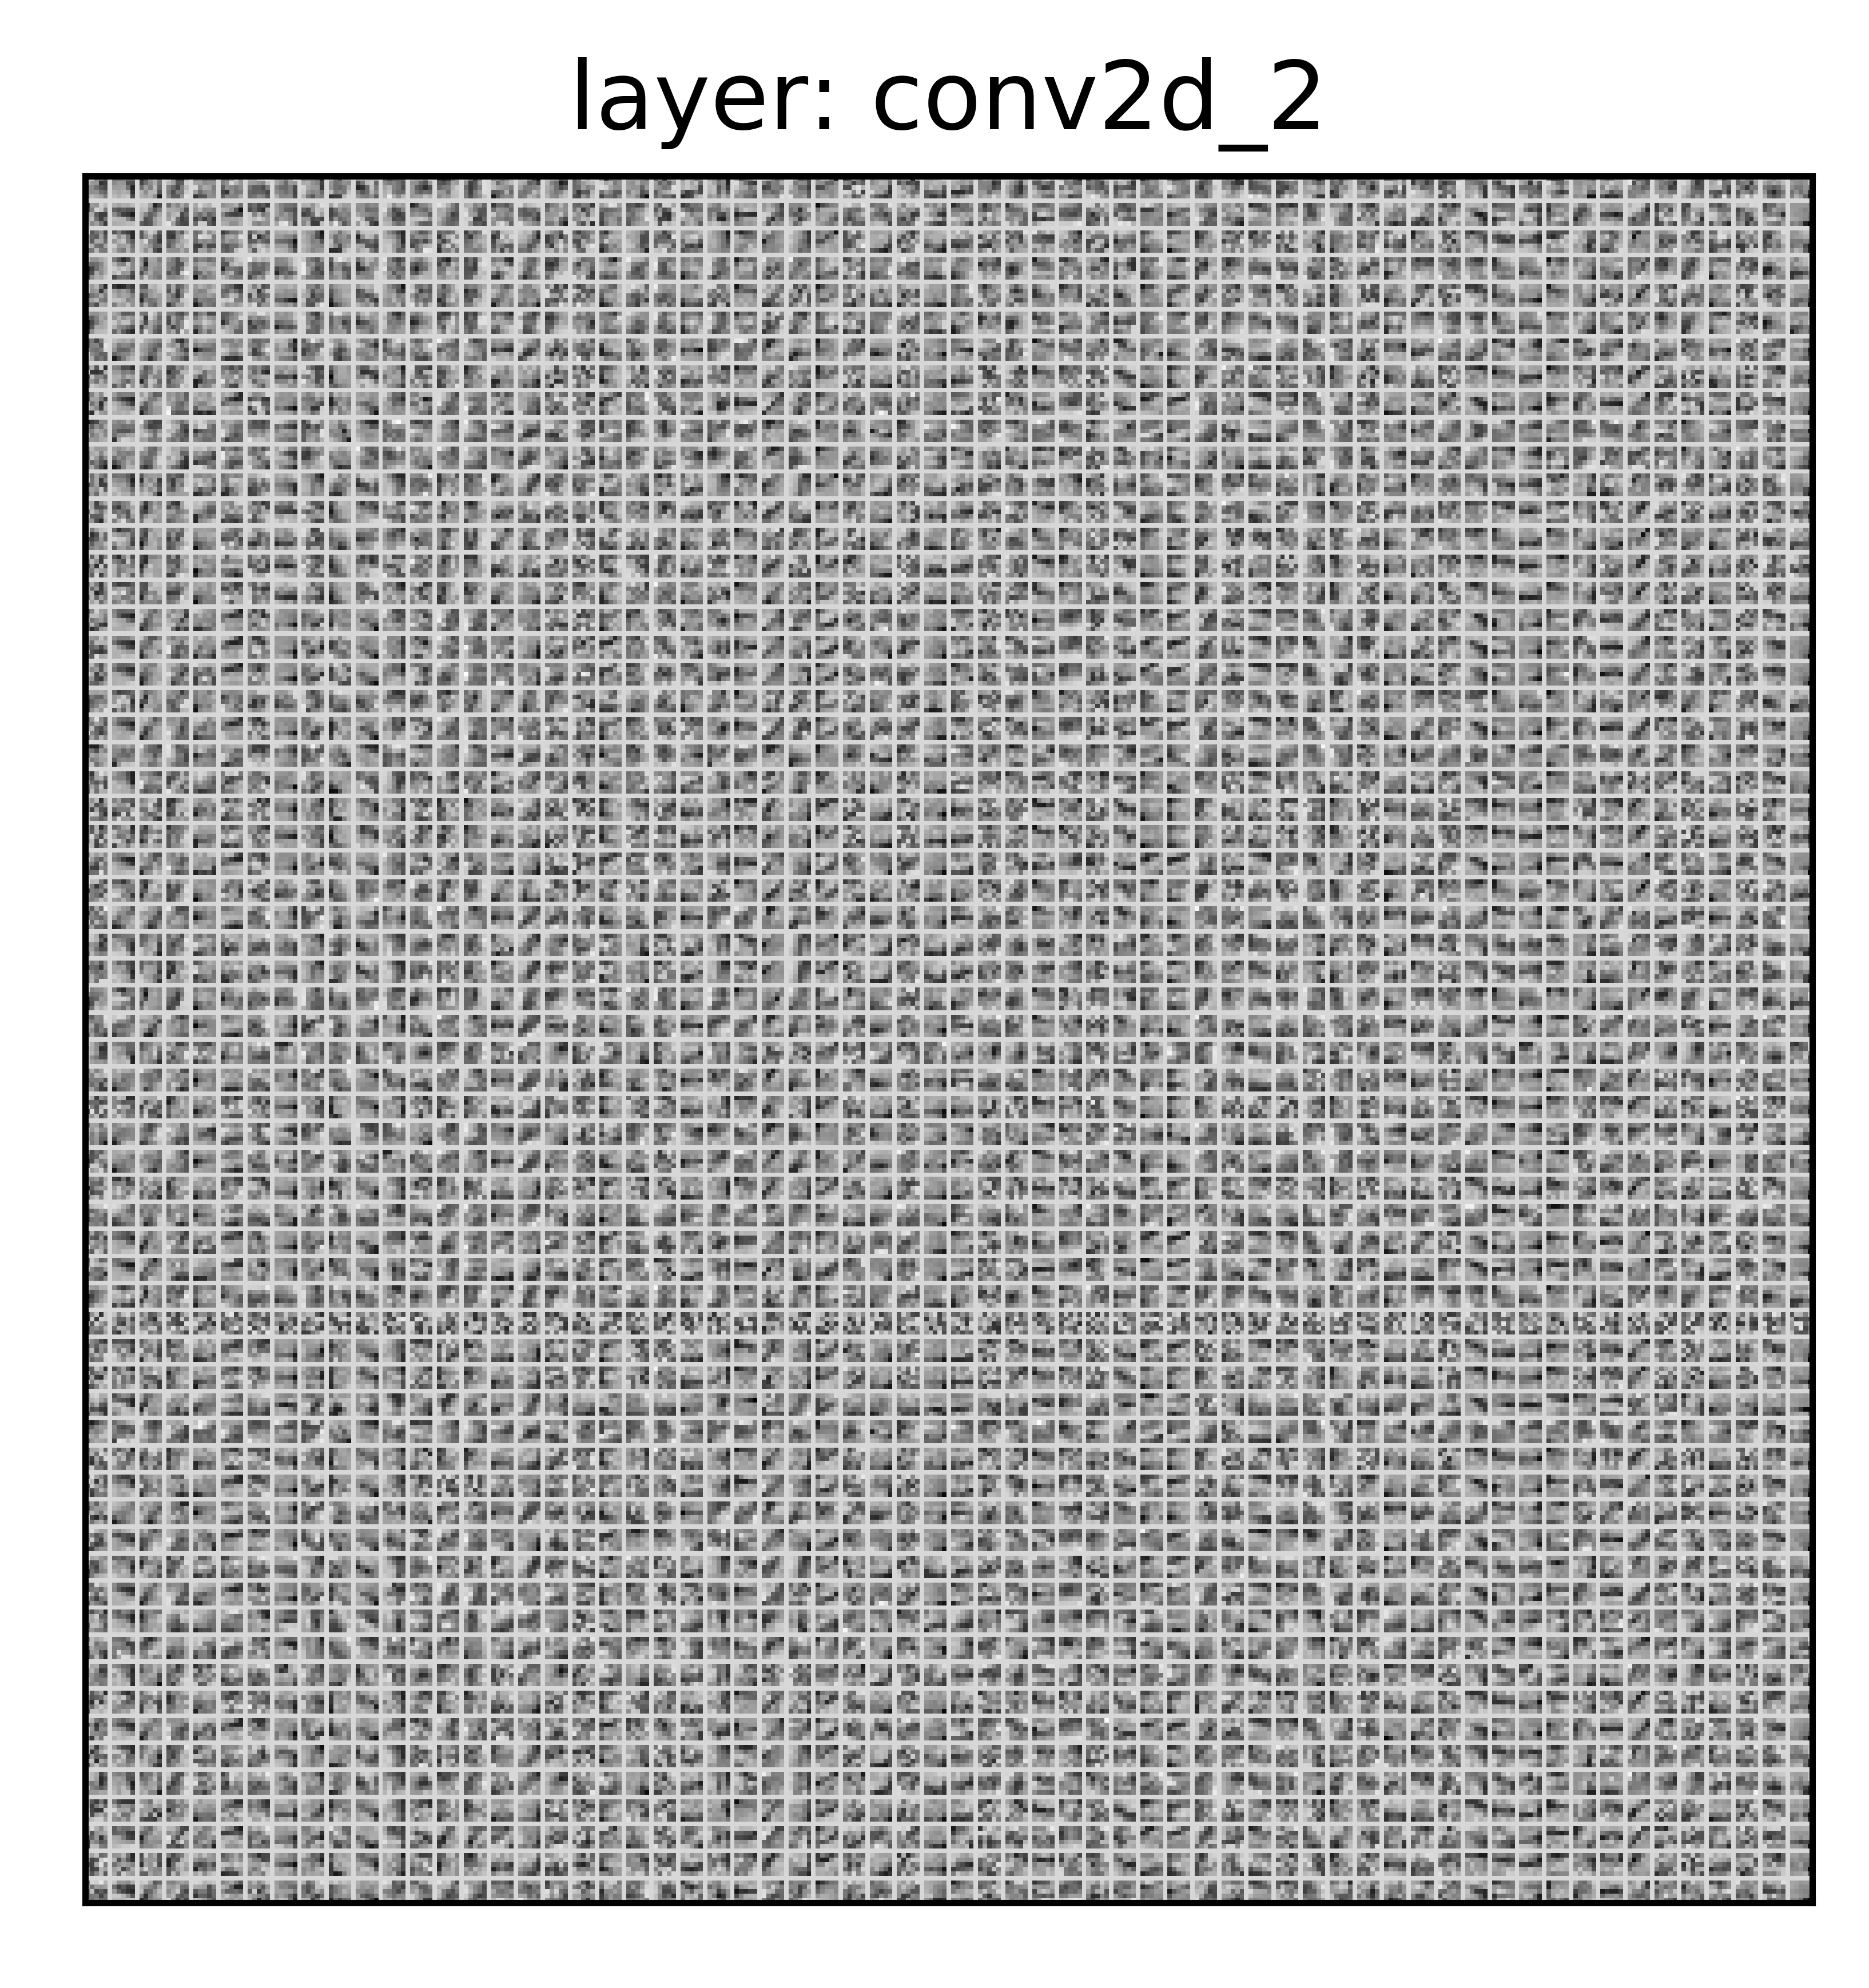

In [16]:
display_activation(W,64, new_model.layers[layer_index].name, cmap="gray")

In [19]:
layer_index = 6

W = new_model.get_layer(name=new_model.layers[layer_index].name).get_weights()[0]
print(W.shape)
W = np.transpose(W.reshape((5,5,W.shape[2]*W.shape[3])), axes=(2,0,1))
print(W.shape)

(5, 5, 64, 32)
(2048, 5, 5)


2048  channels


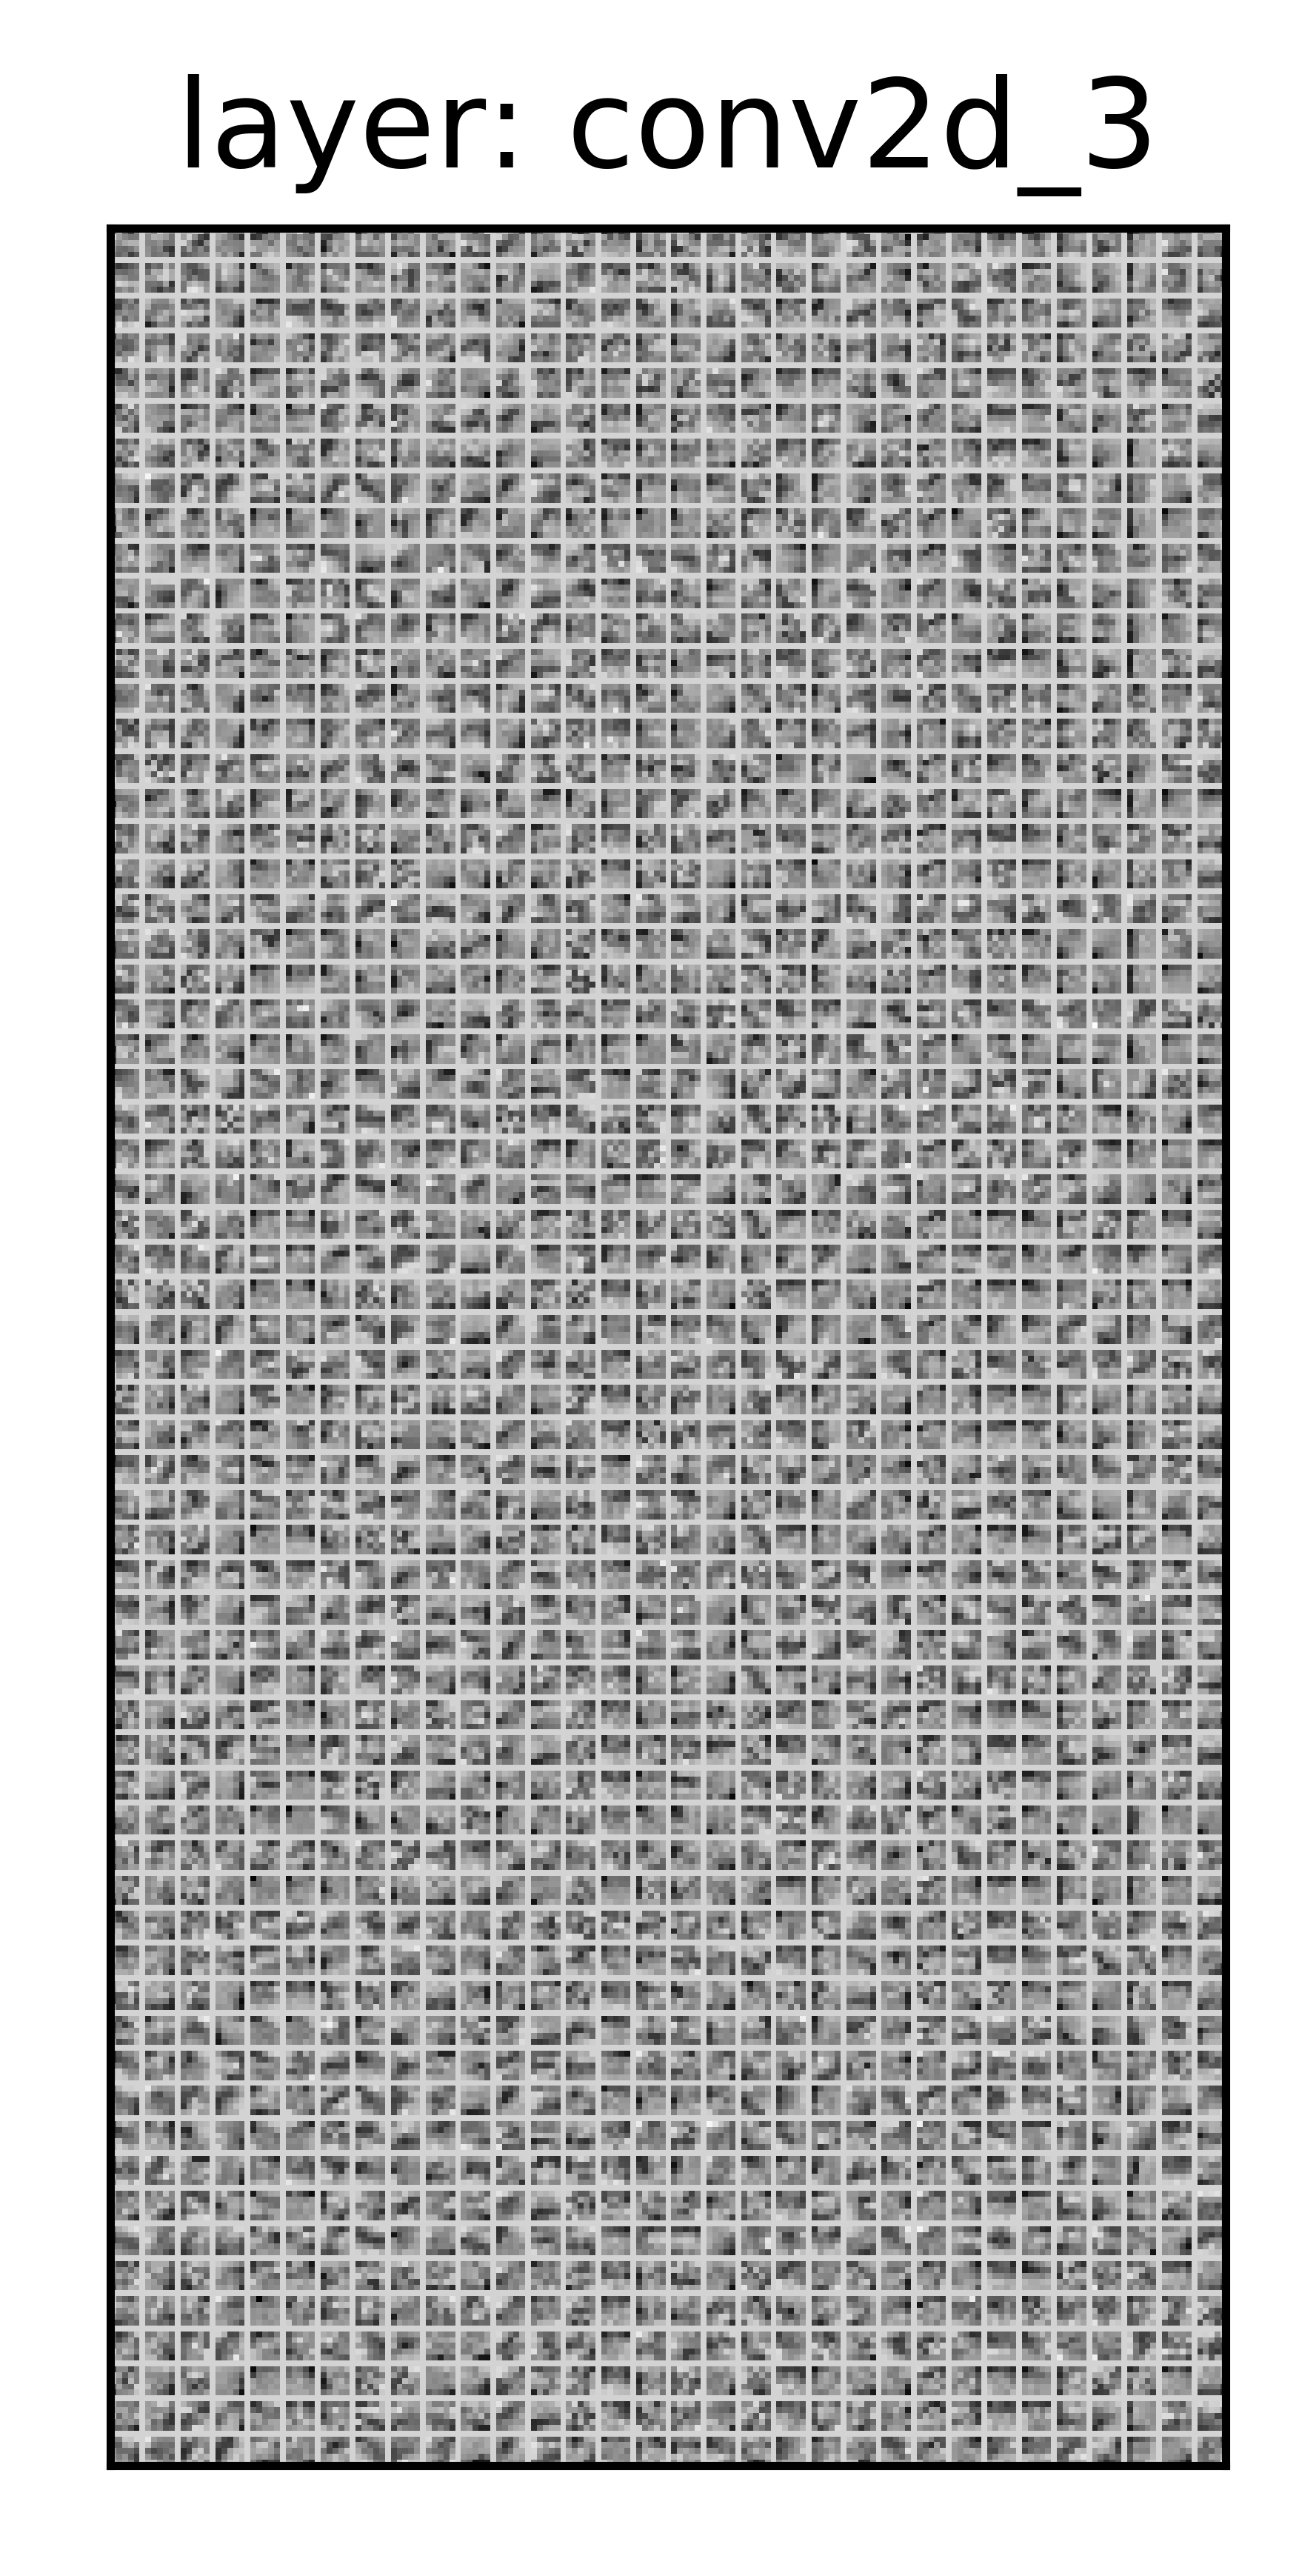

In [23]:
display_activation(W,32, new_model.layers[layer_index].name, cmap="gray")

In [7]:
layer_outputs = [layer.output for layer in new_model.layers]


activation_model = models.Model(inputs=new_model.input, outputs=layer_outputs)

NameError: name 'new_model' is not defined

In [3]:
X_test, y_test = load_data_from_npz(192,"rescaled_relocated_", set_type="test")

In [4]:
mask = (y_test == 5);
indices_1 = np.arange(y_test.shape[0])[mask]
y_1 = y_test[indices_1]
X_1 = X_test[indices_1]
# mask

In [7]:
activations1 = activation_model.predict(X_1[:5])

In [8]:
activations[6].shape

(5, 32, 41, 41)

In [126]:
print(y_1.shape, X_1.shape)

(1135,) (1135, 1, 192, 192)


image 0


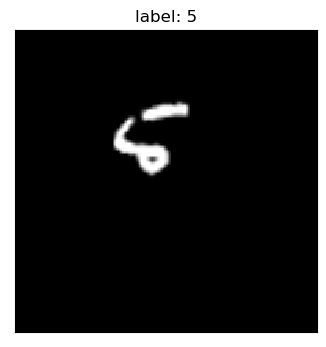

image 1


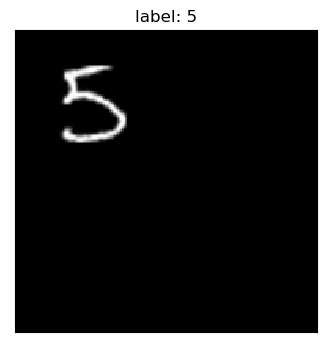

image 2


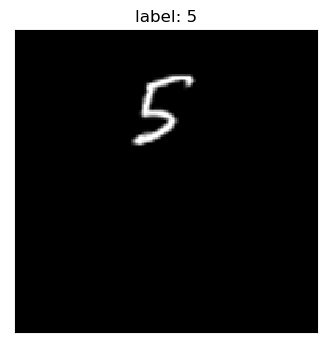

image 3


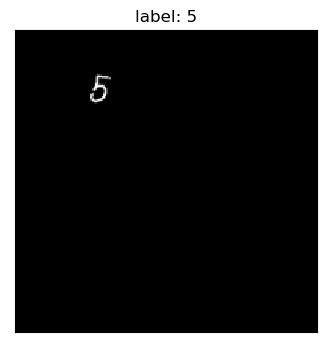

image 4


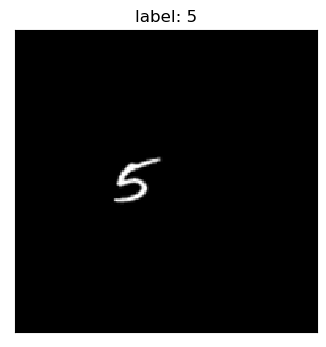

In [5]:
for i in range(5):
    print("image", i)
    show_img(X_1[i][0],y_1[i], dpi = 100, cmap="gray")

In [6]:
i = 0

for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],8, new_model.layers[i].name, cmap="gray")

SyntaxError: invalid syntax (<ipython-input-6-847f090d65e4>, line 5)

image 0
64  channels


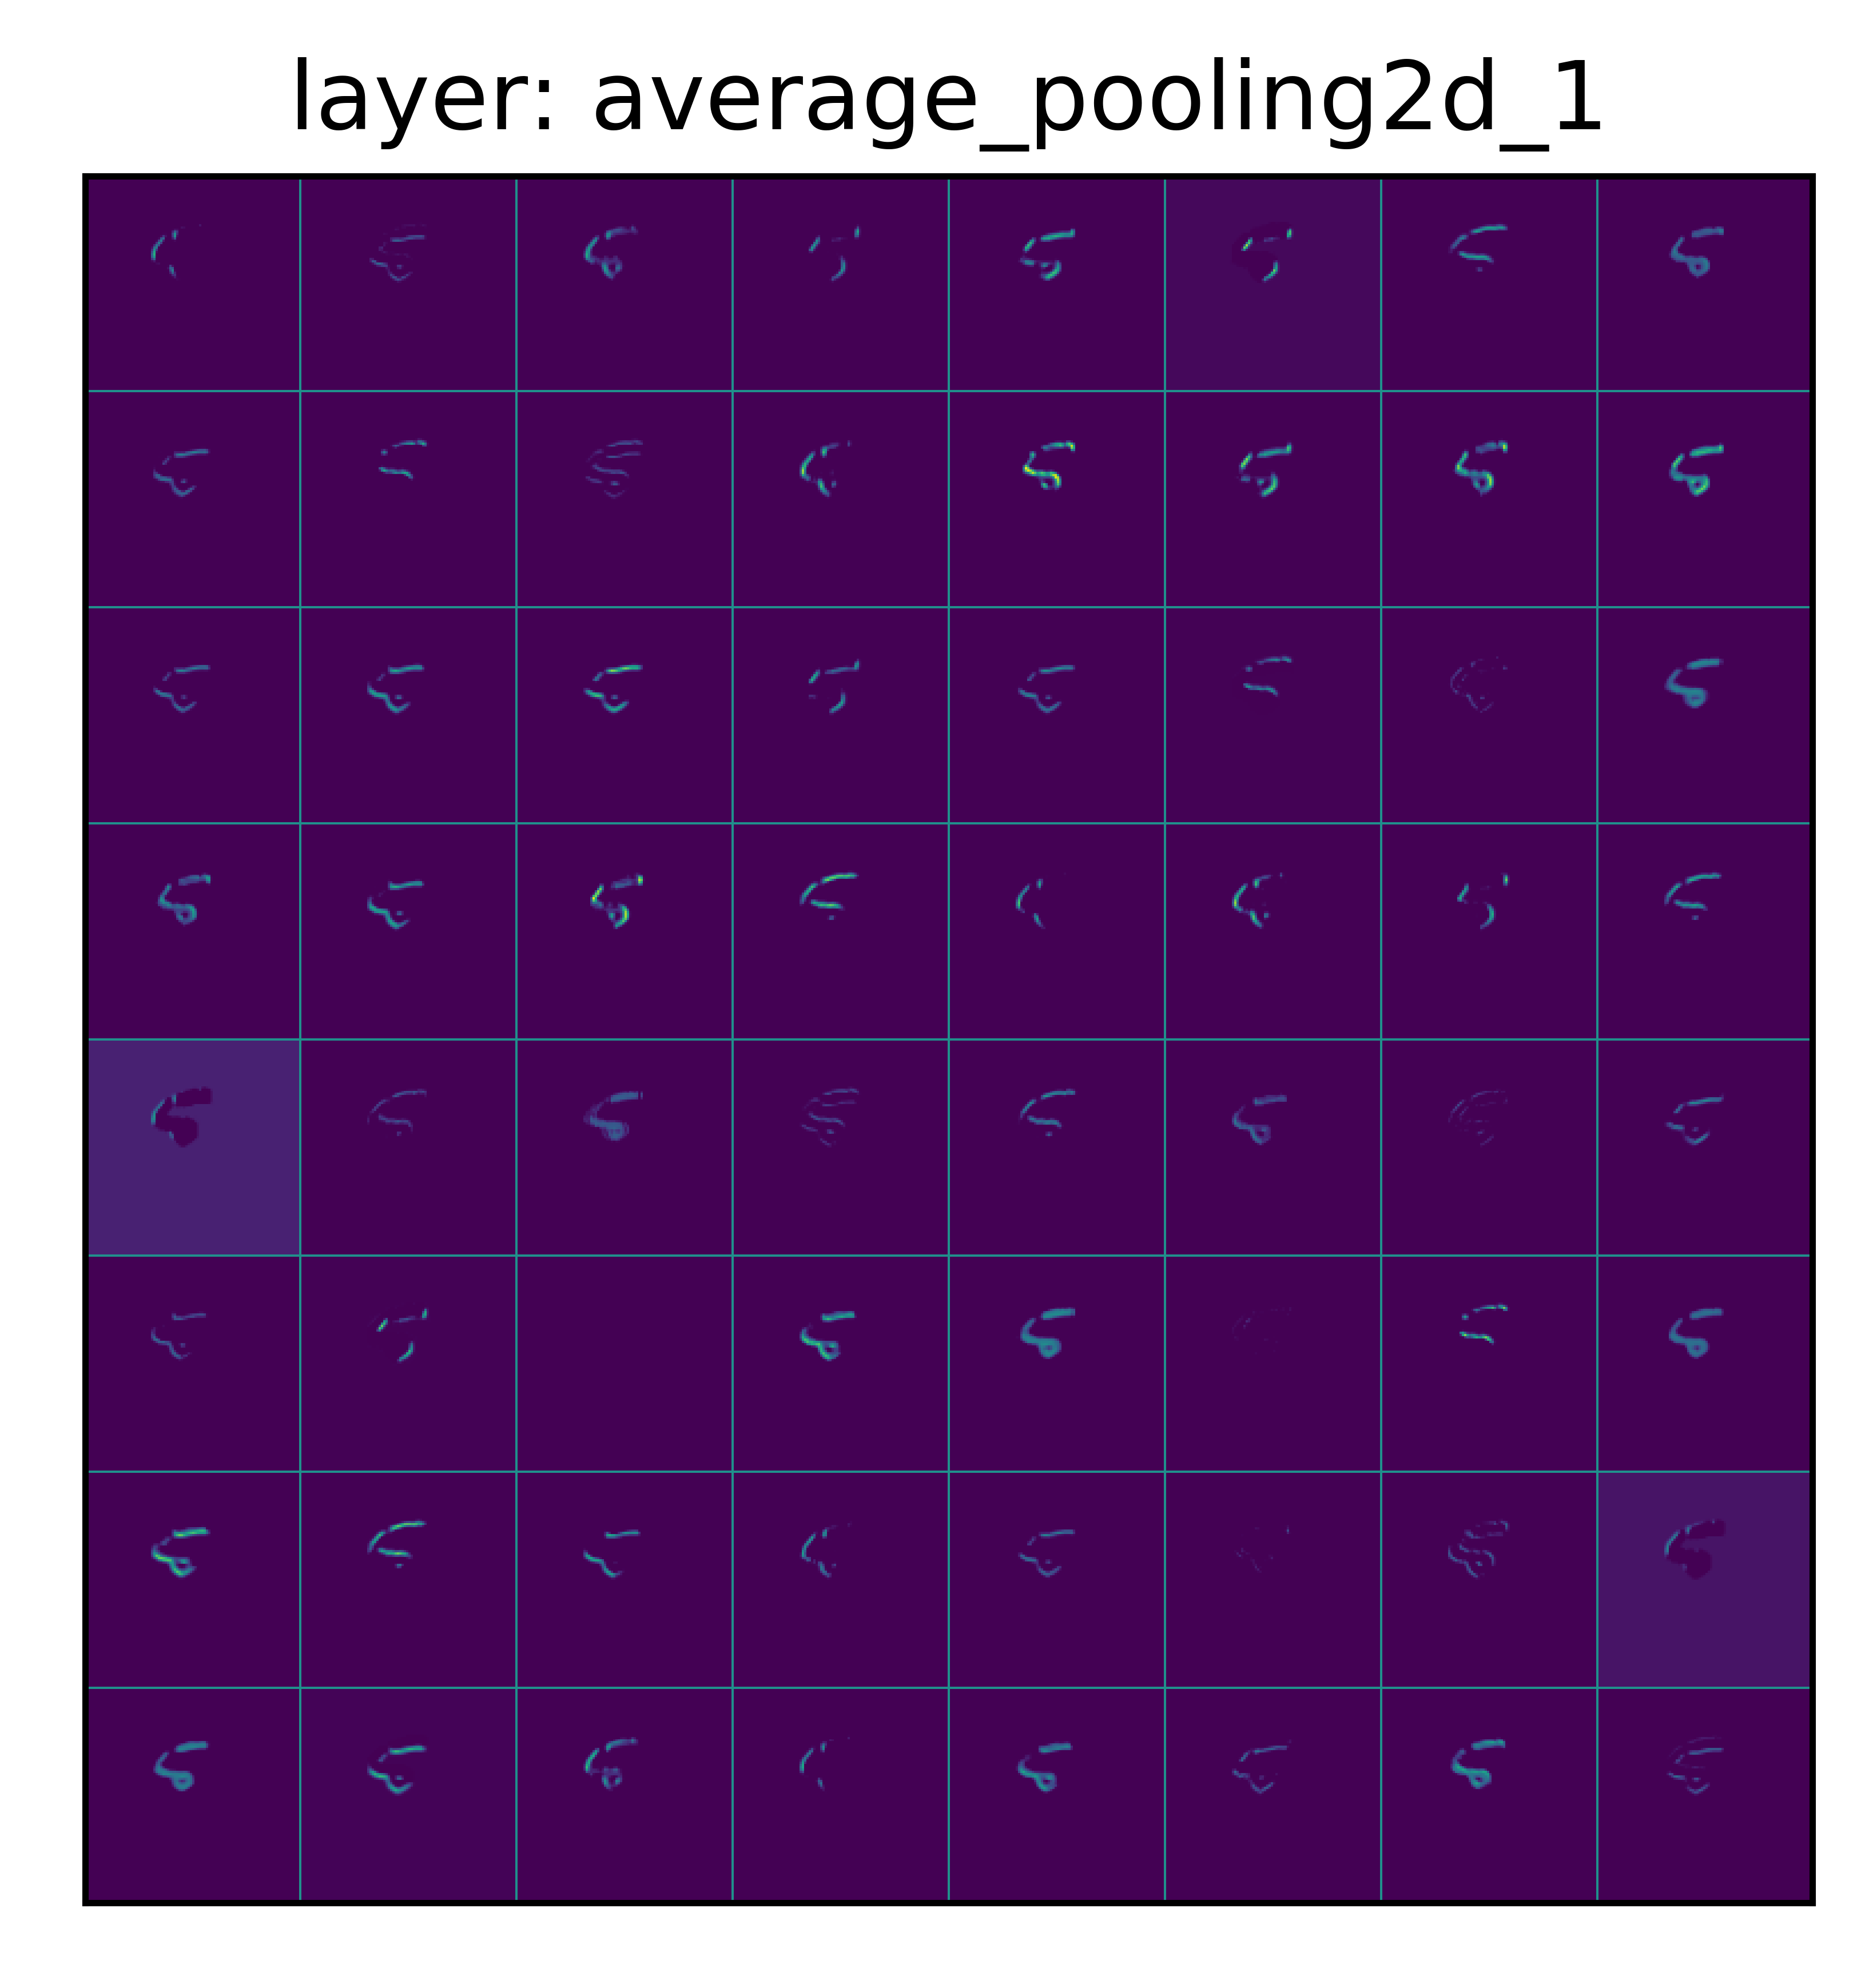

image 1
64  channels


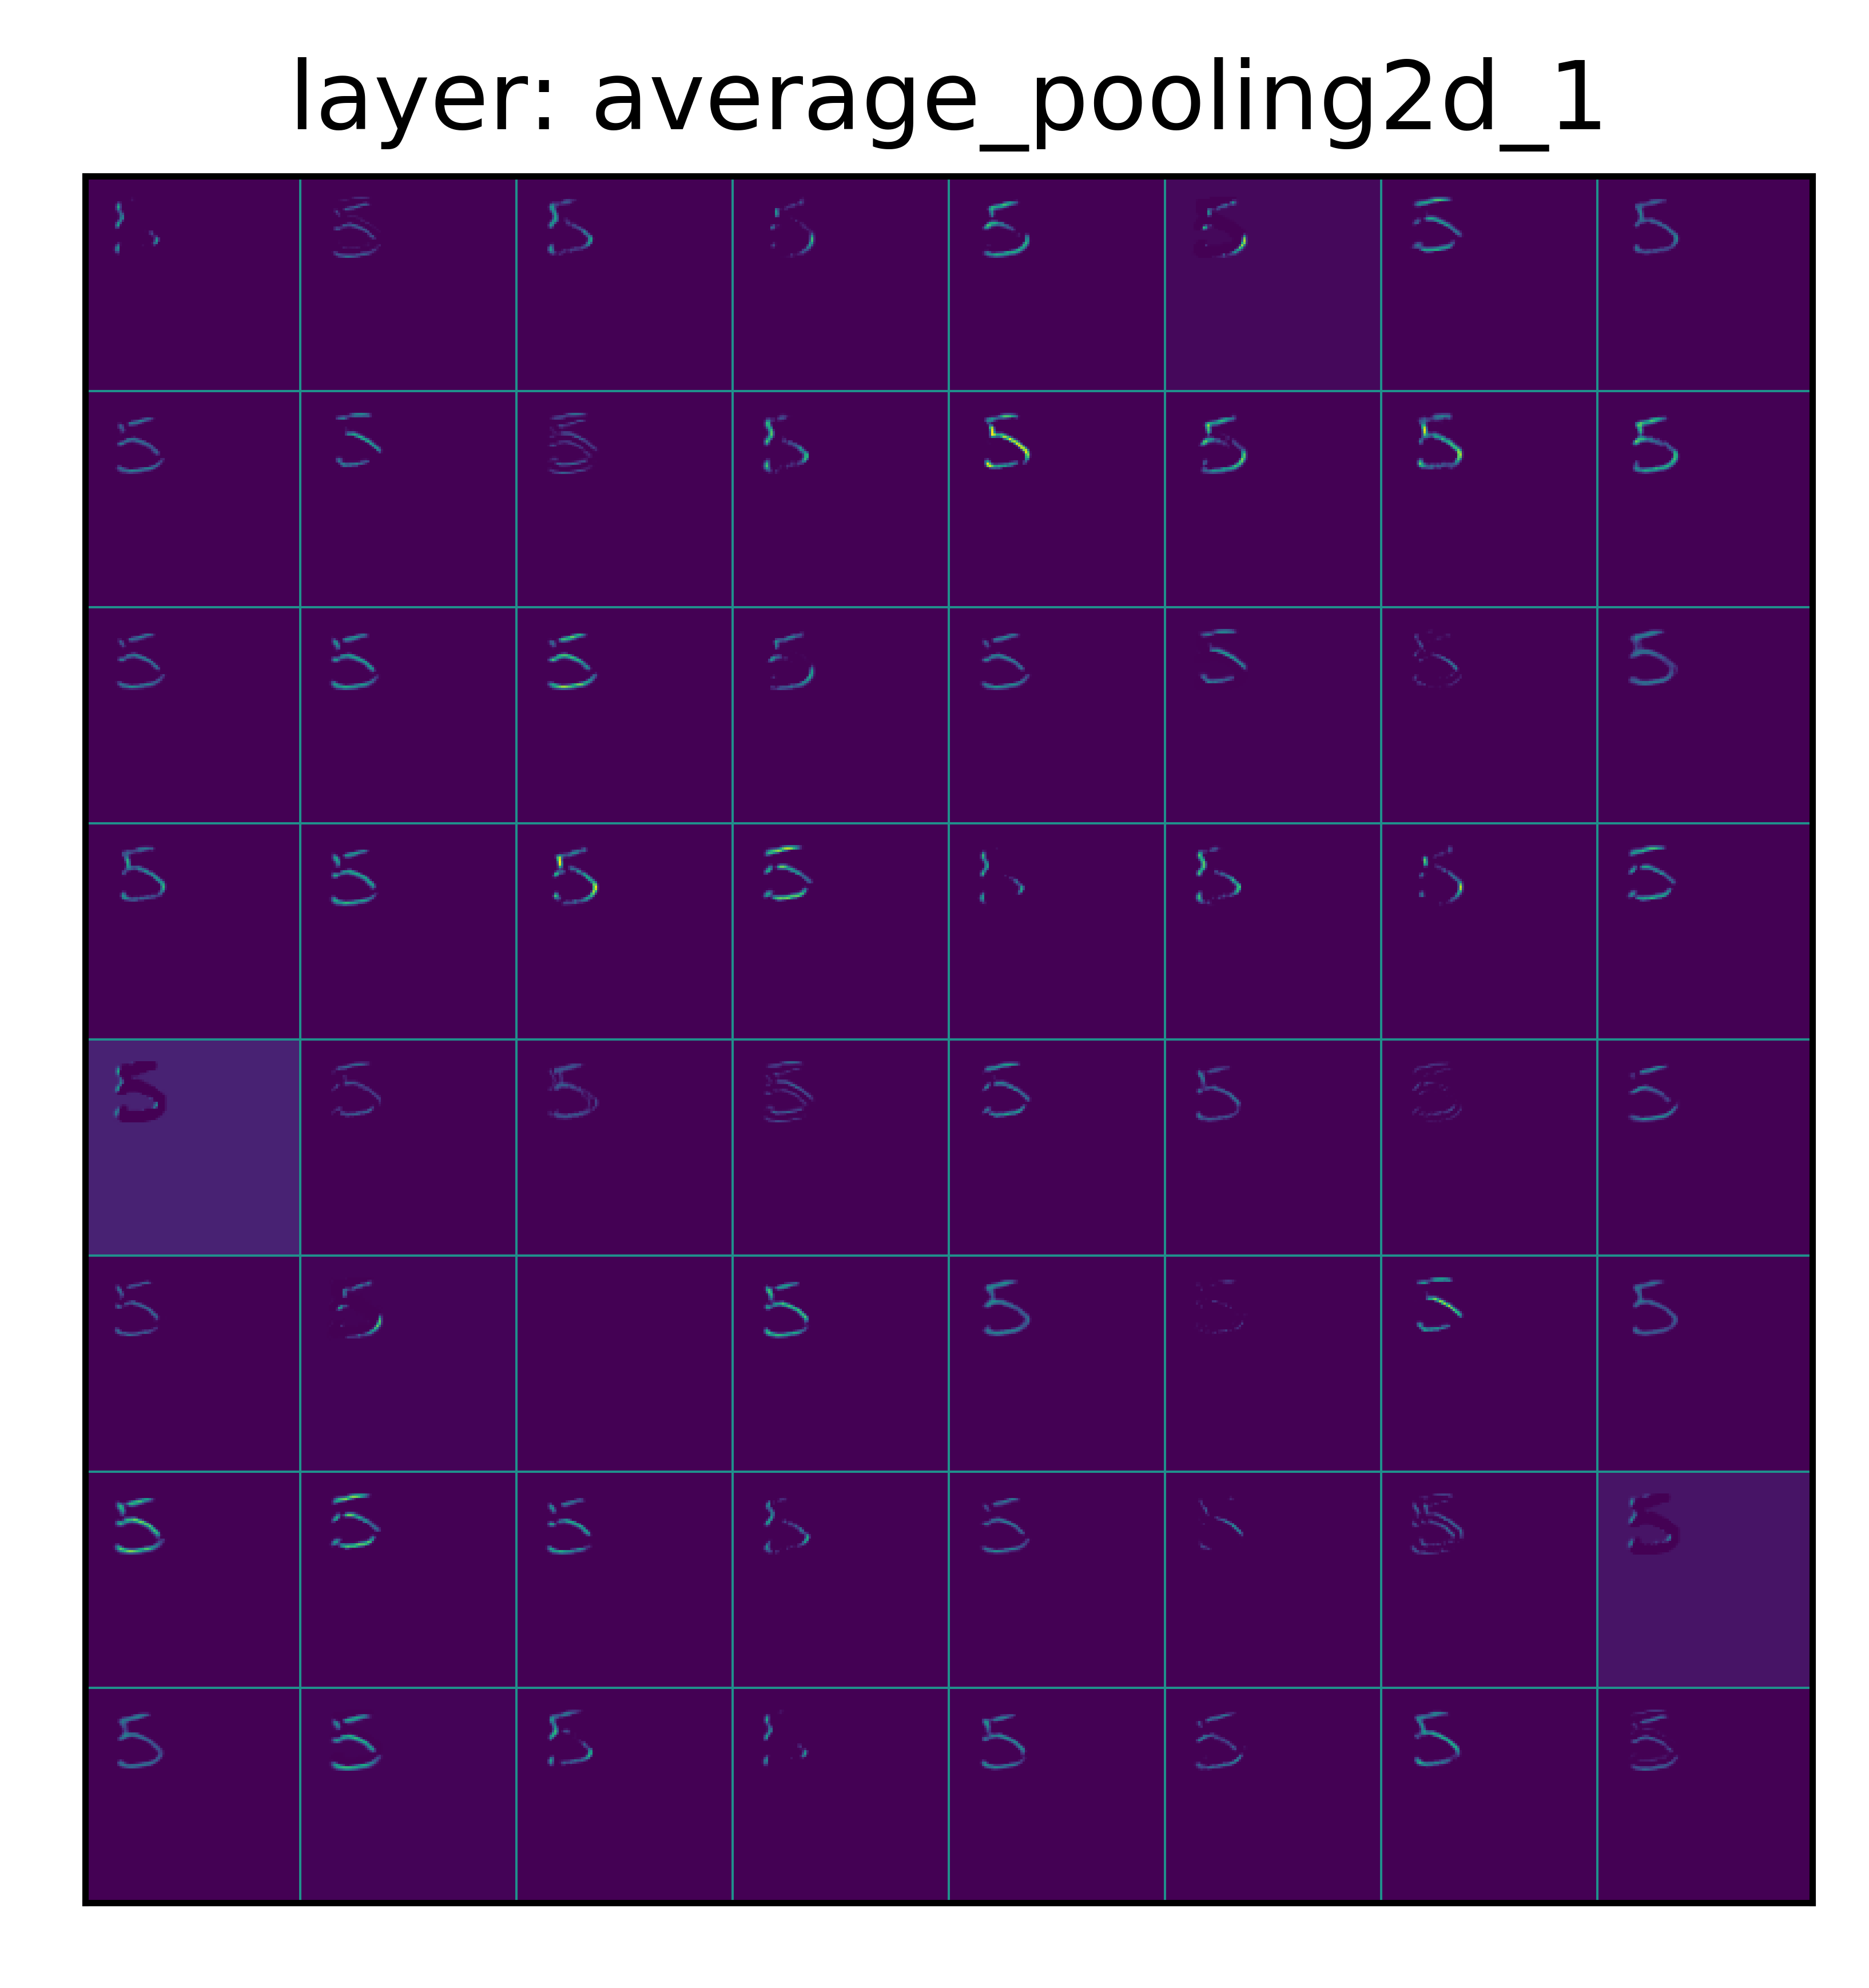

image 2
64  channels


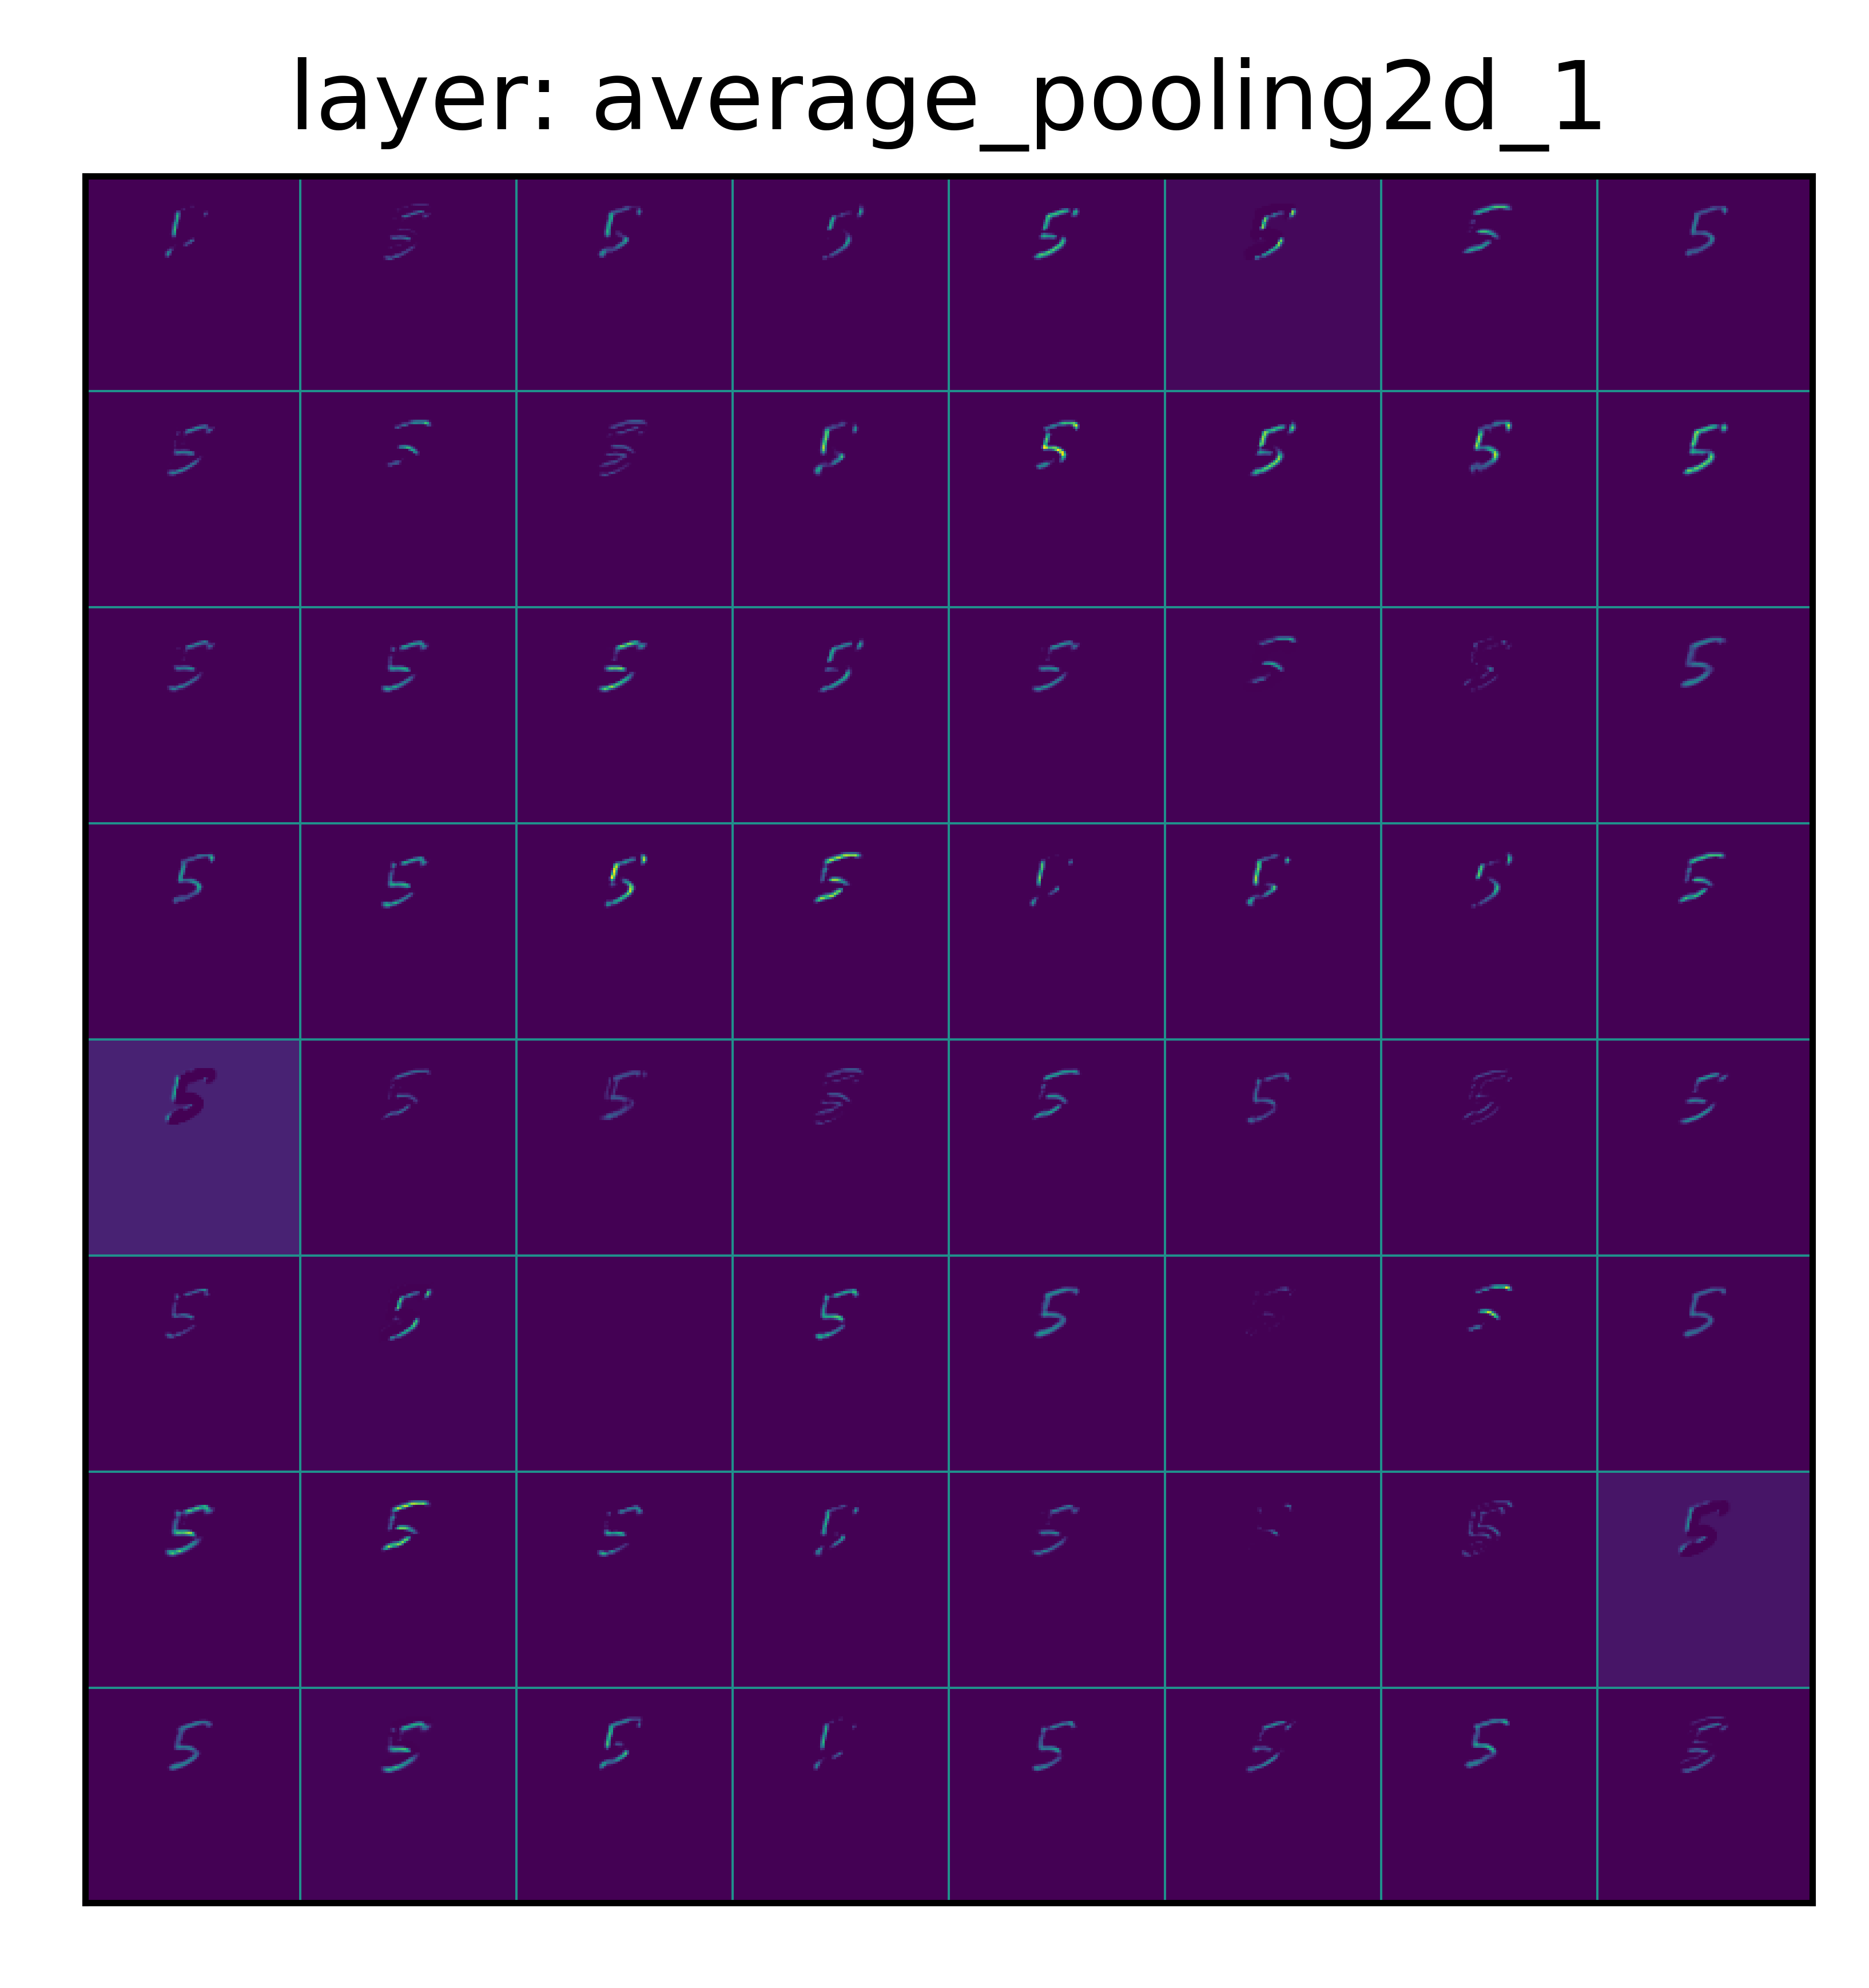

image 3
64  channels


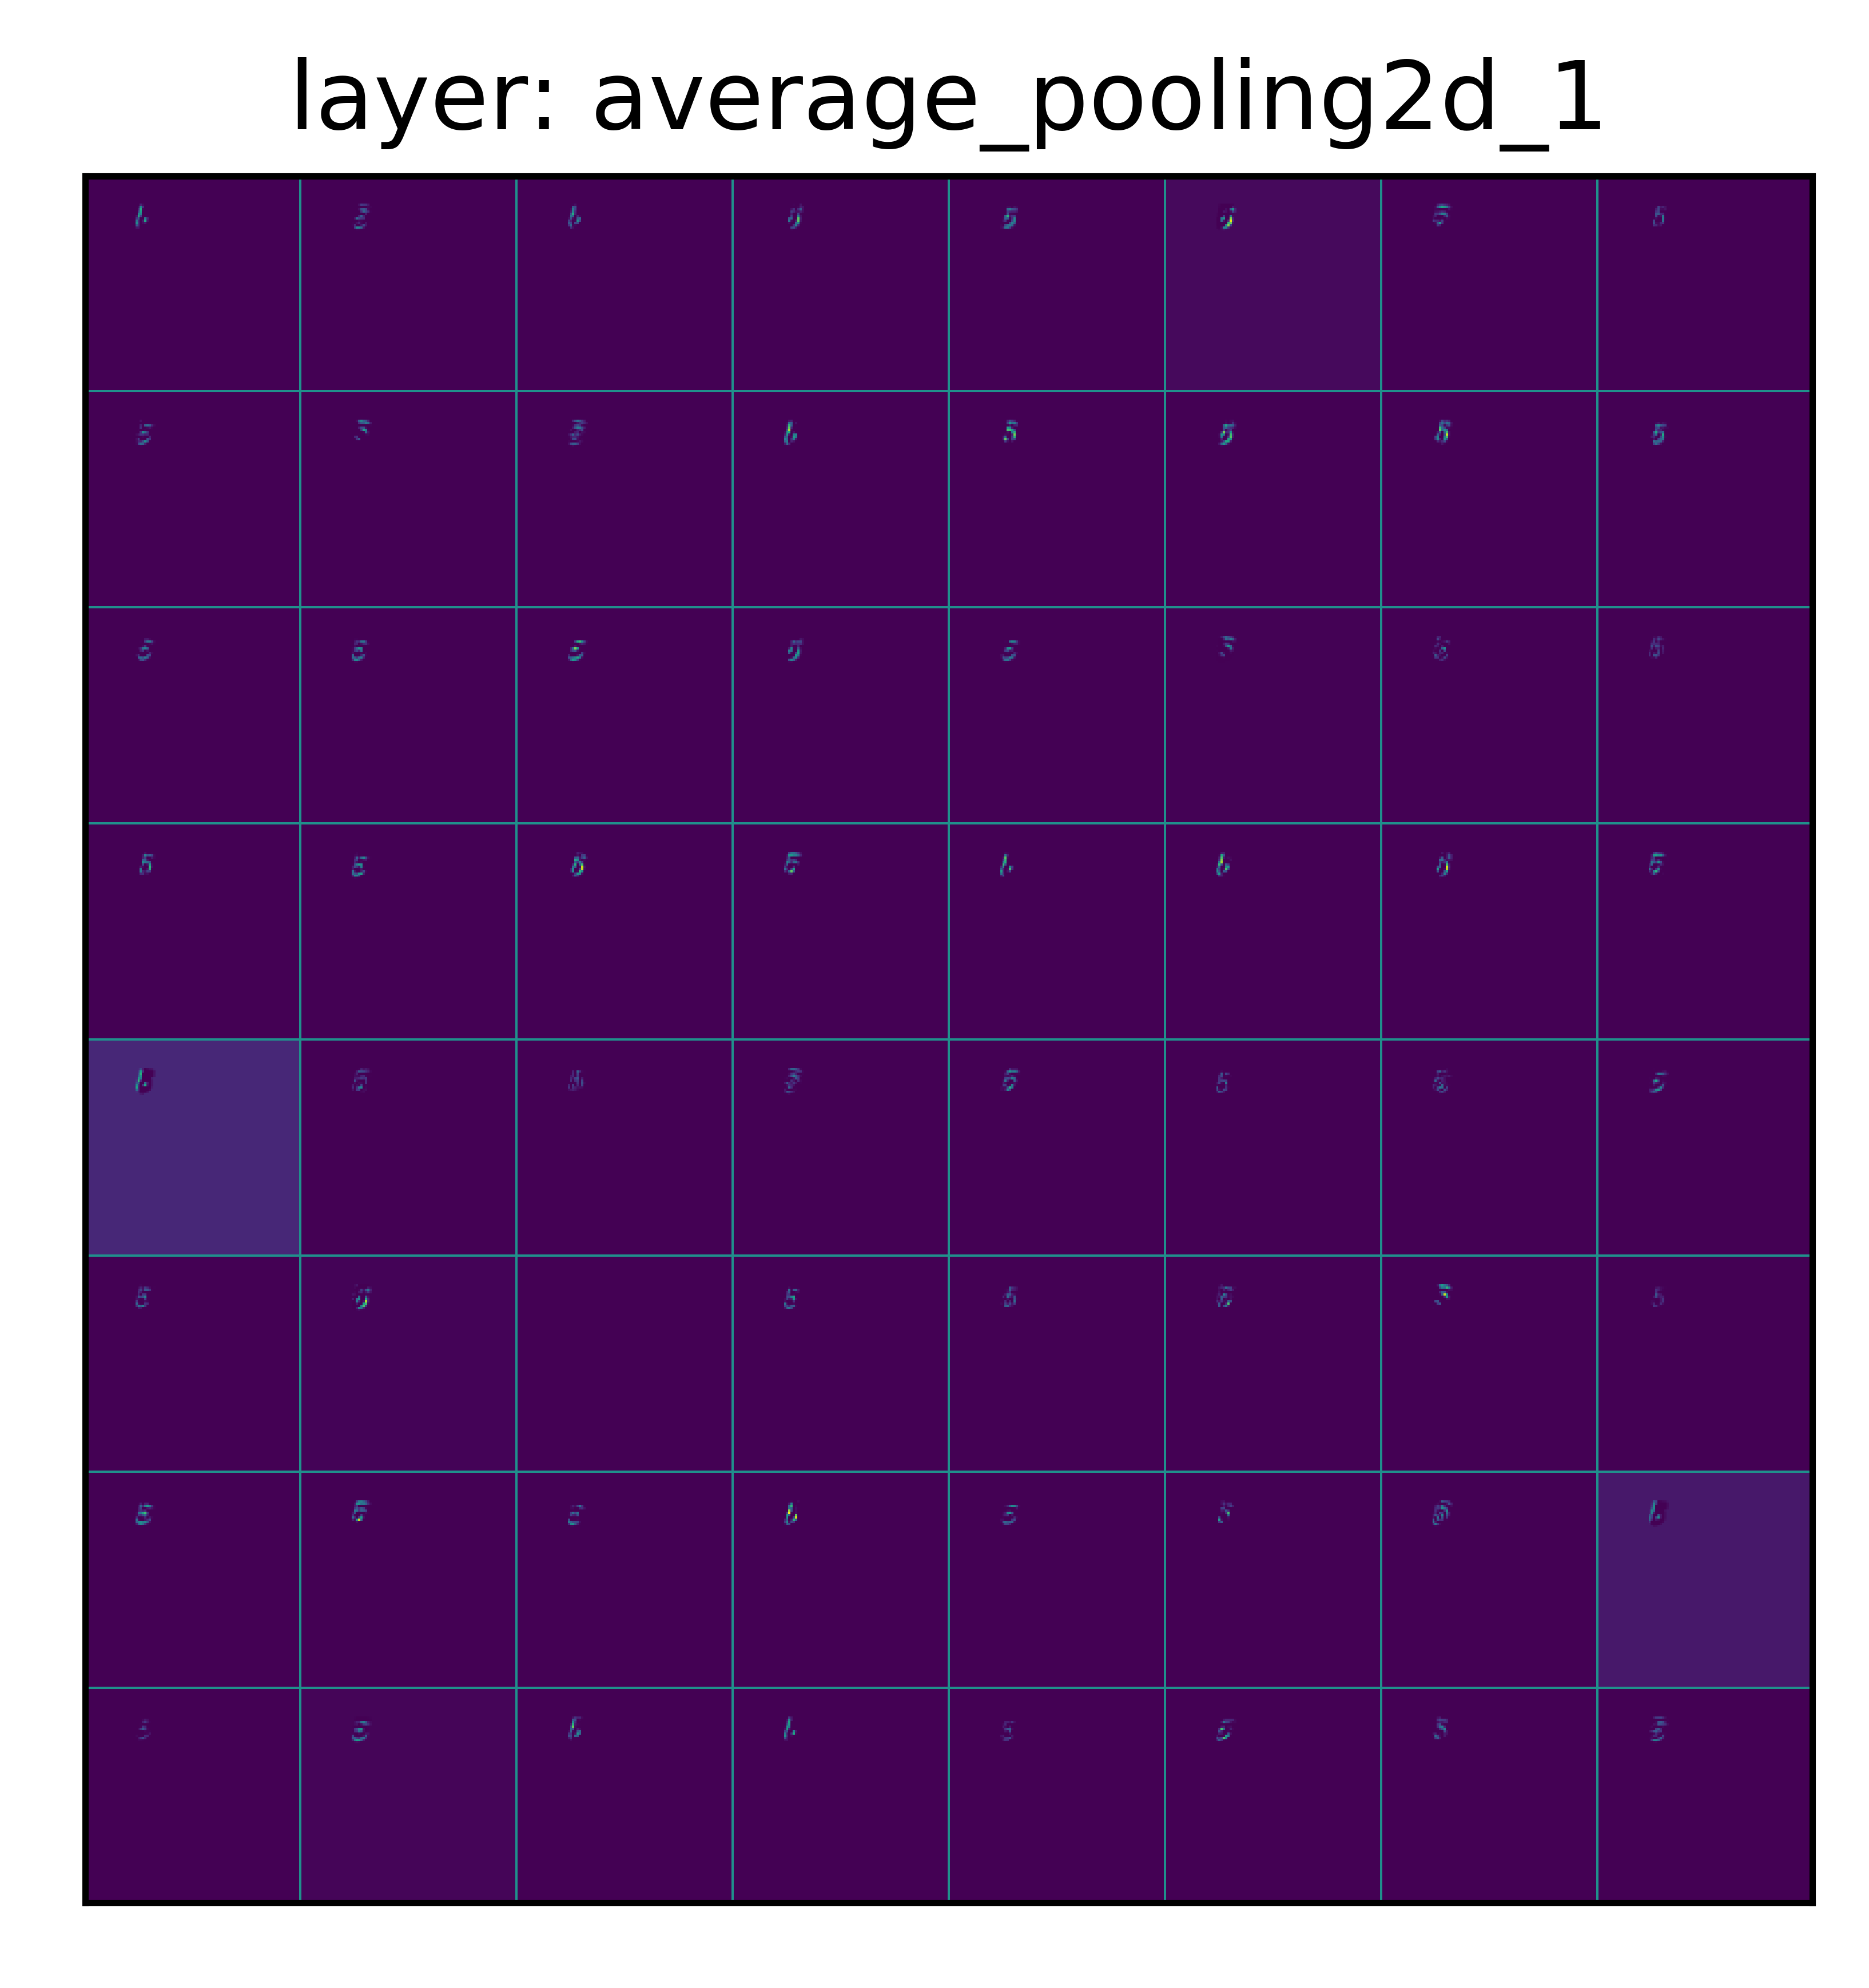

image 4
64  channels


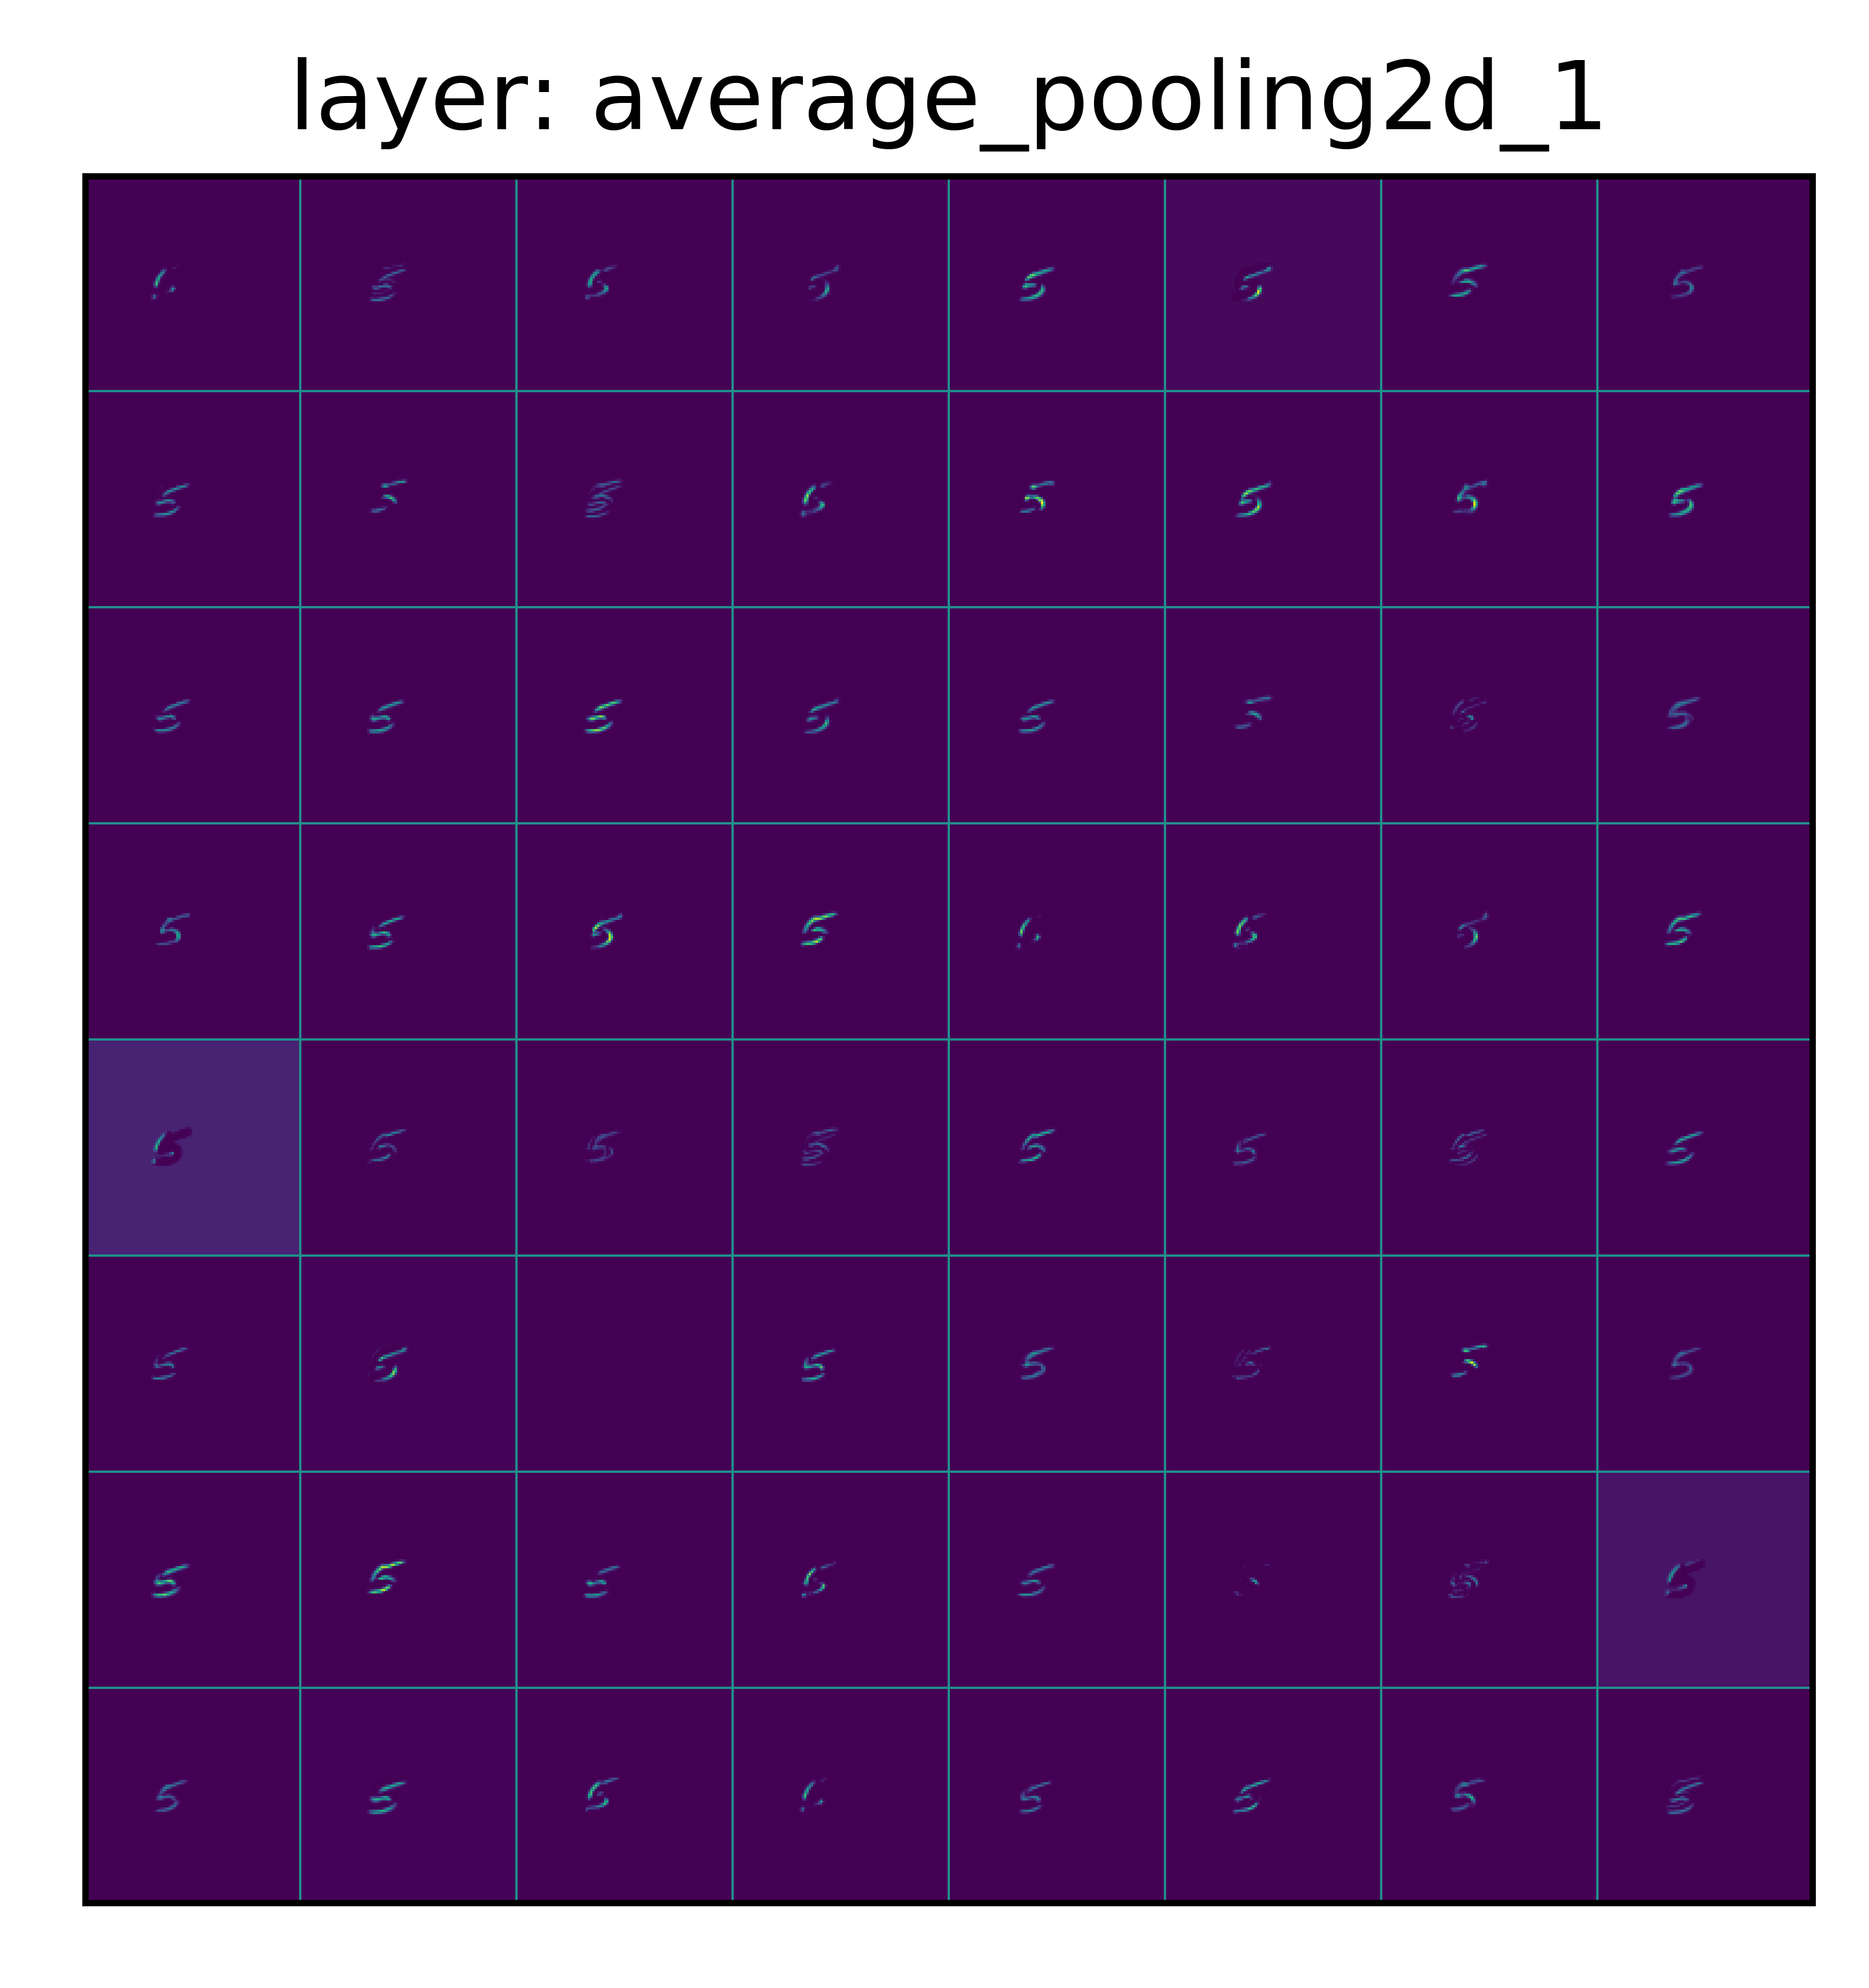

In [10]:
i = 1

for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],8, new_model.layers[i].name)

image 0
64  channels


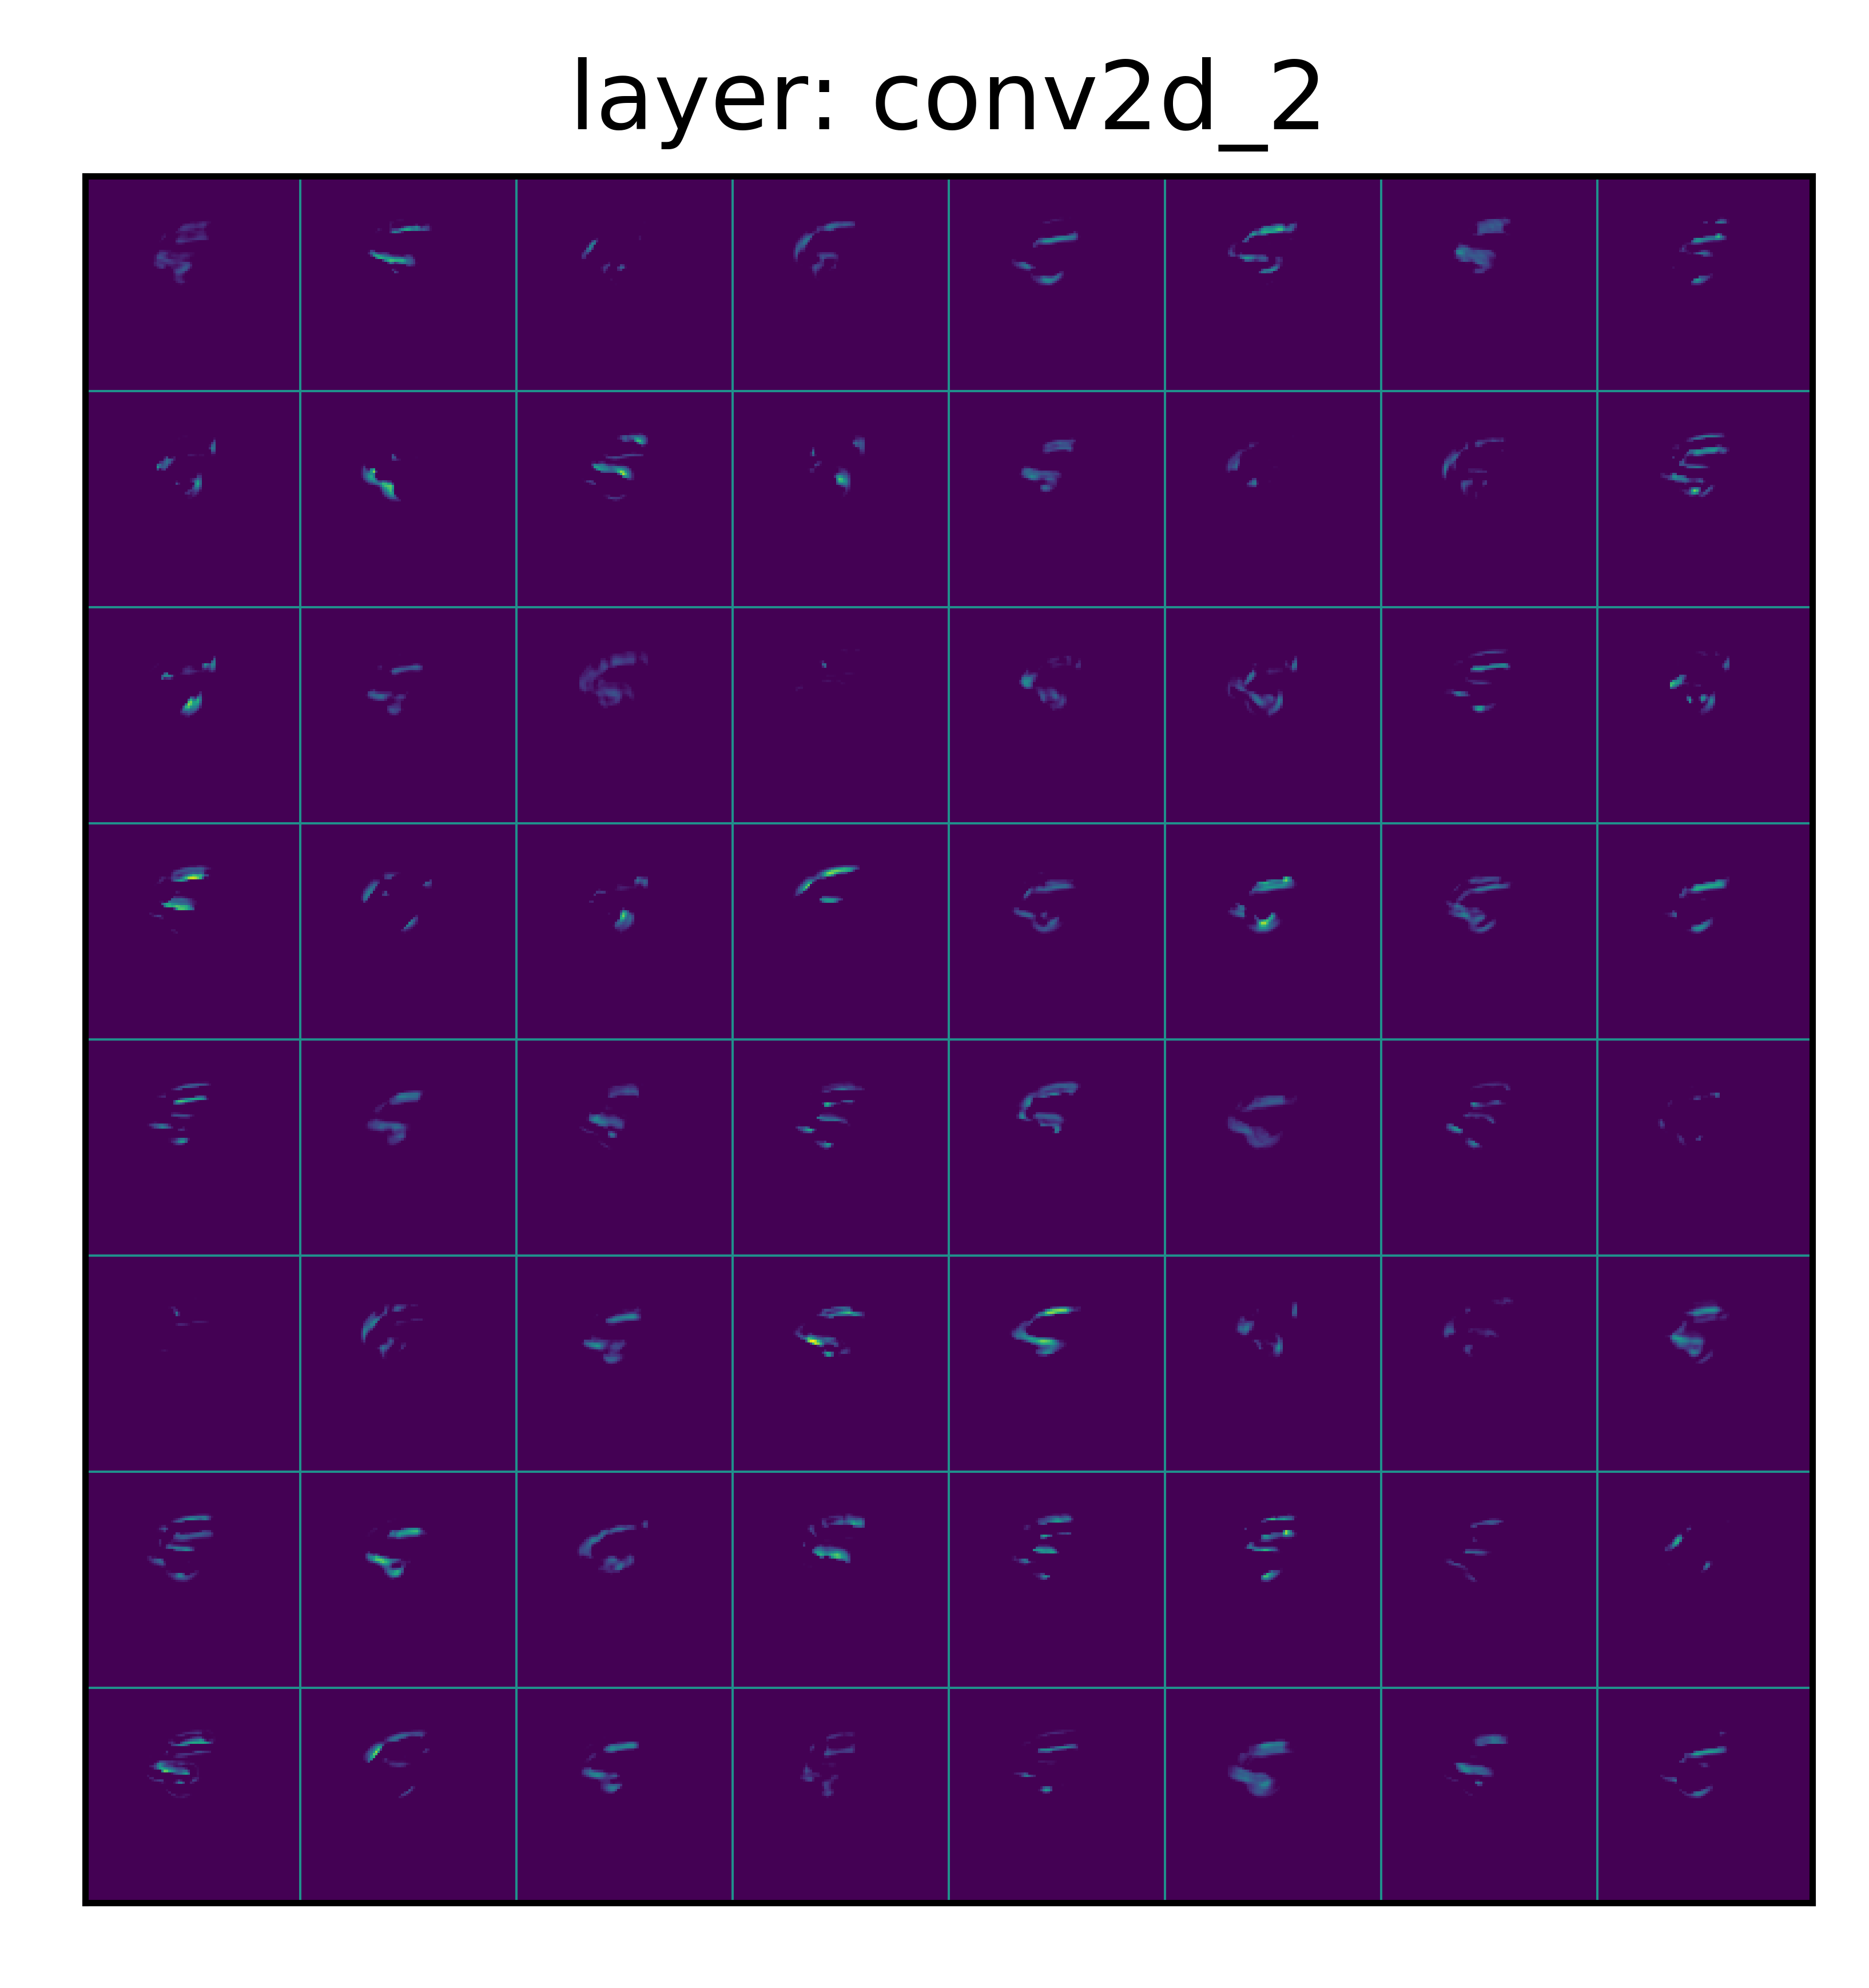

image 1
64  channels


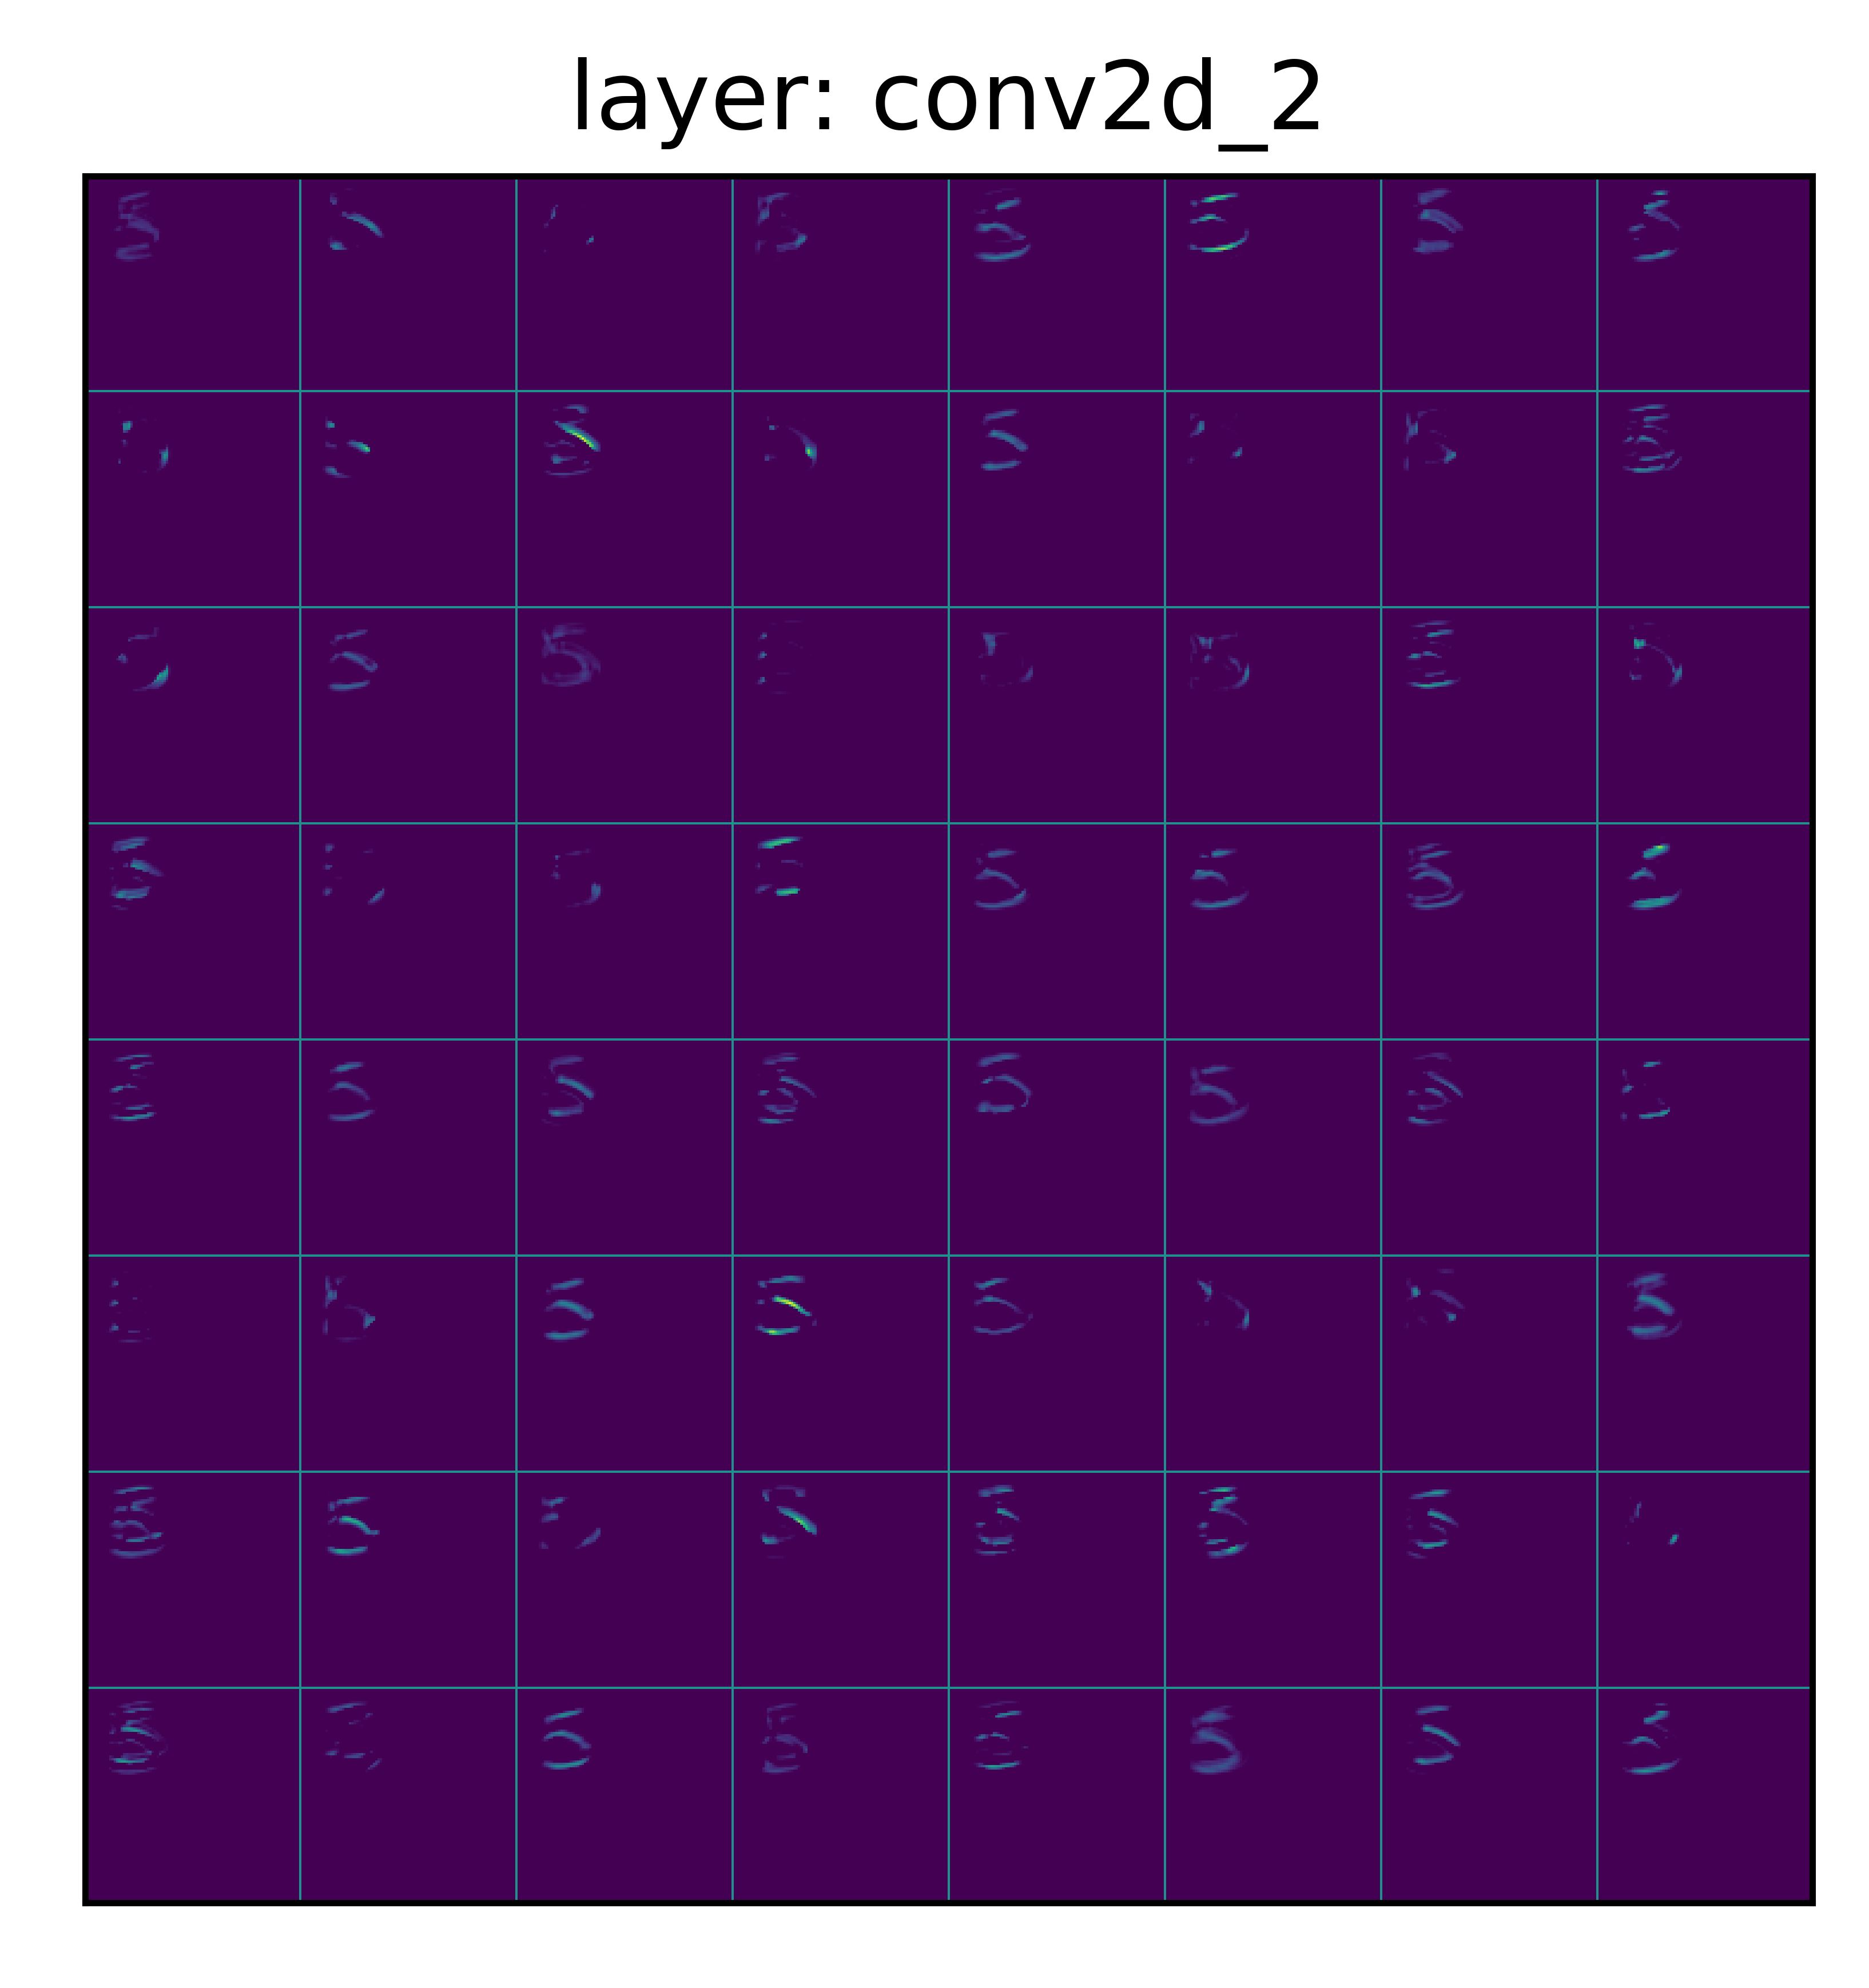

image 2
64  channels


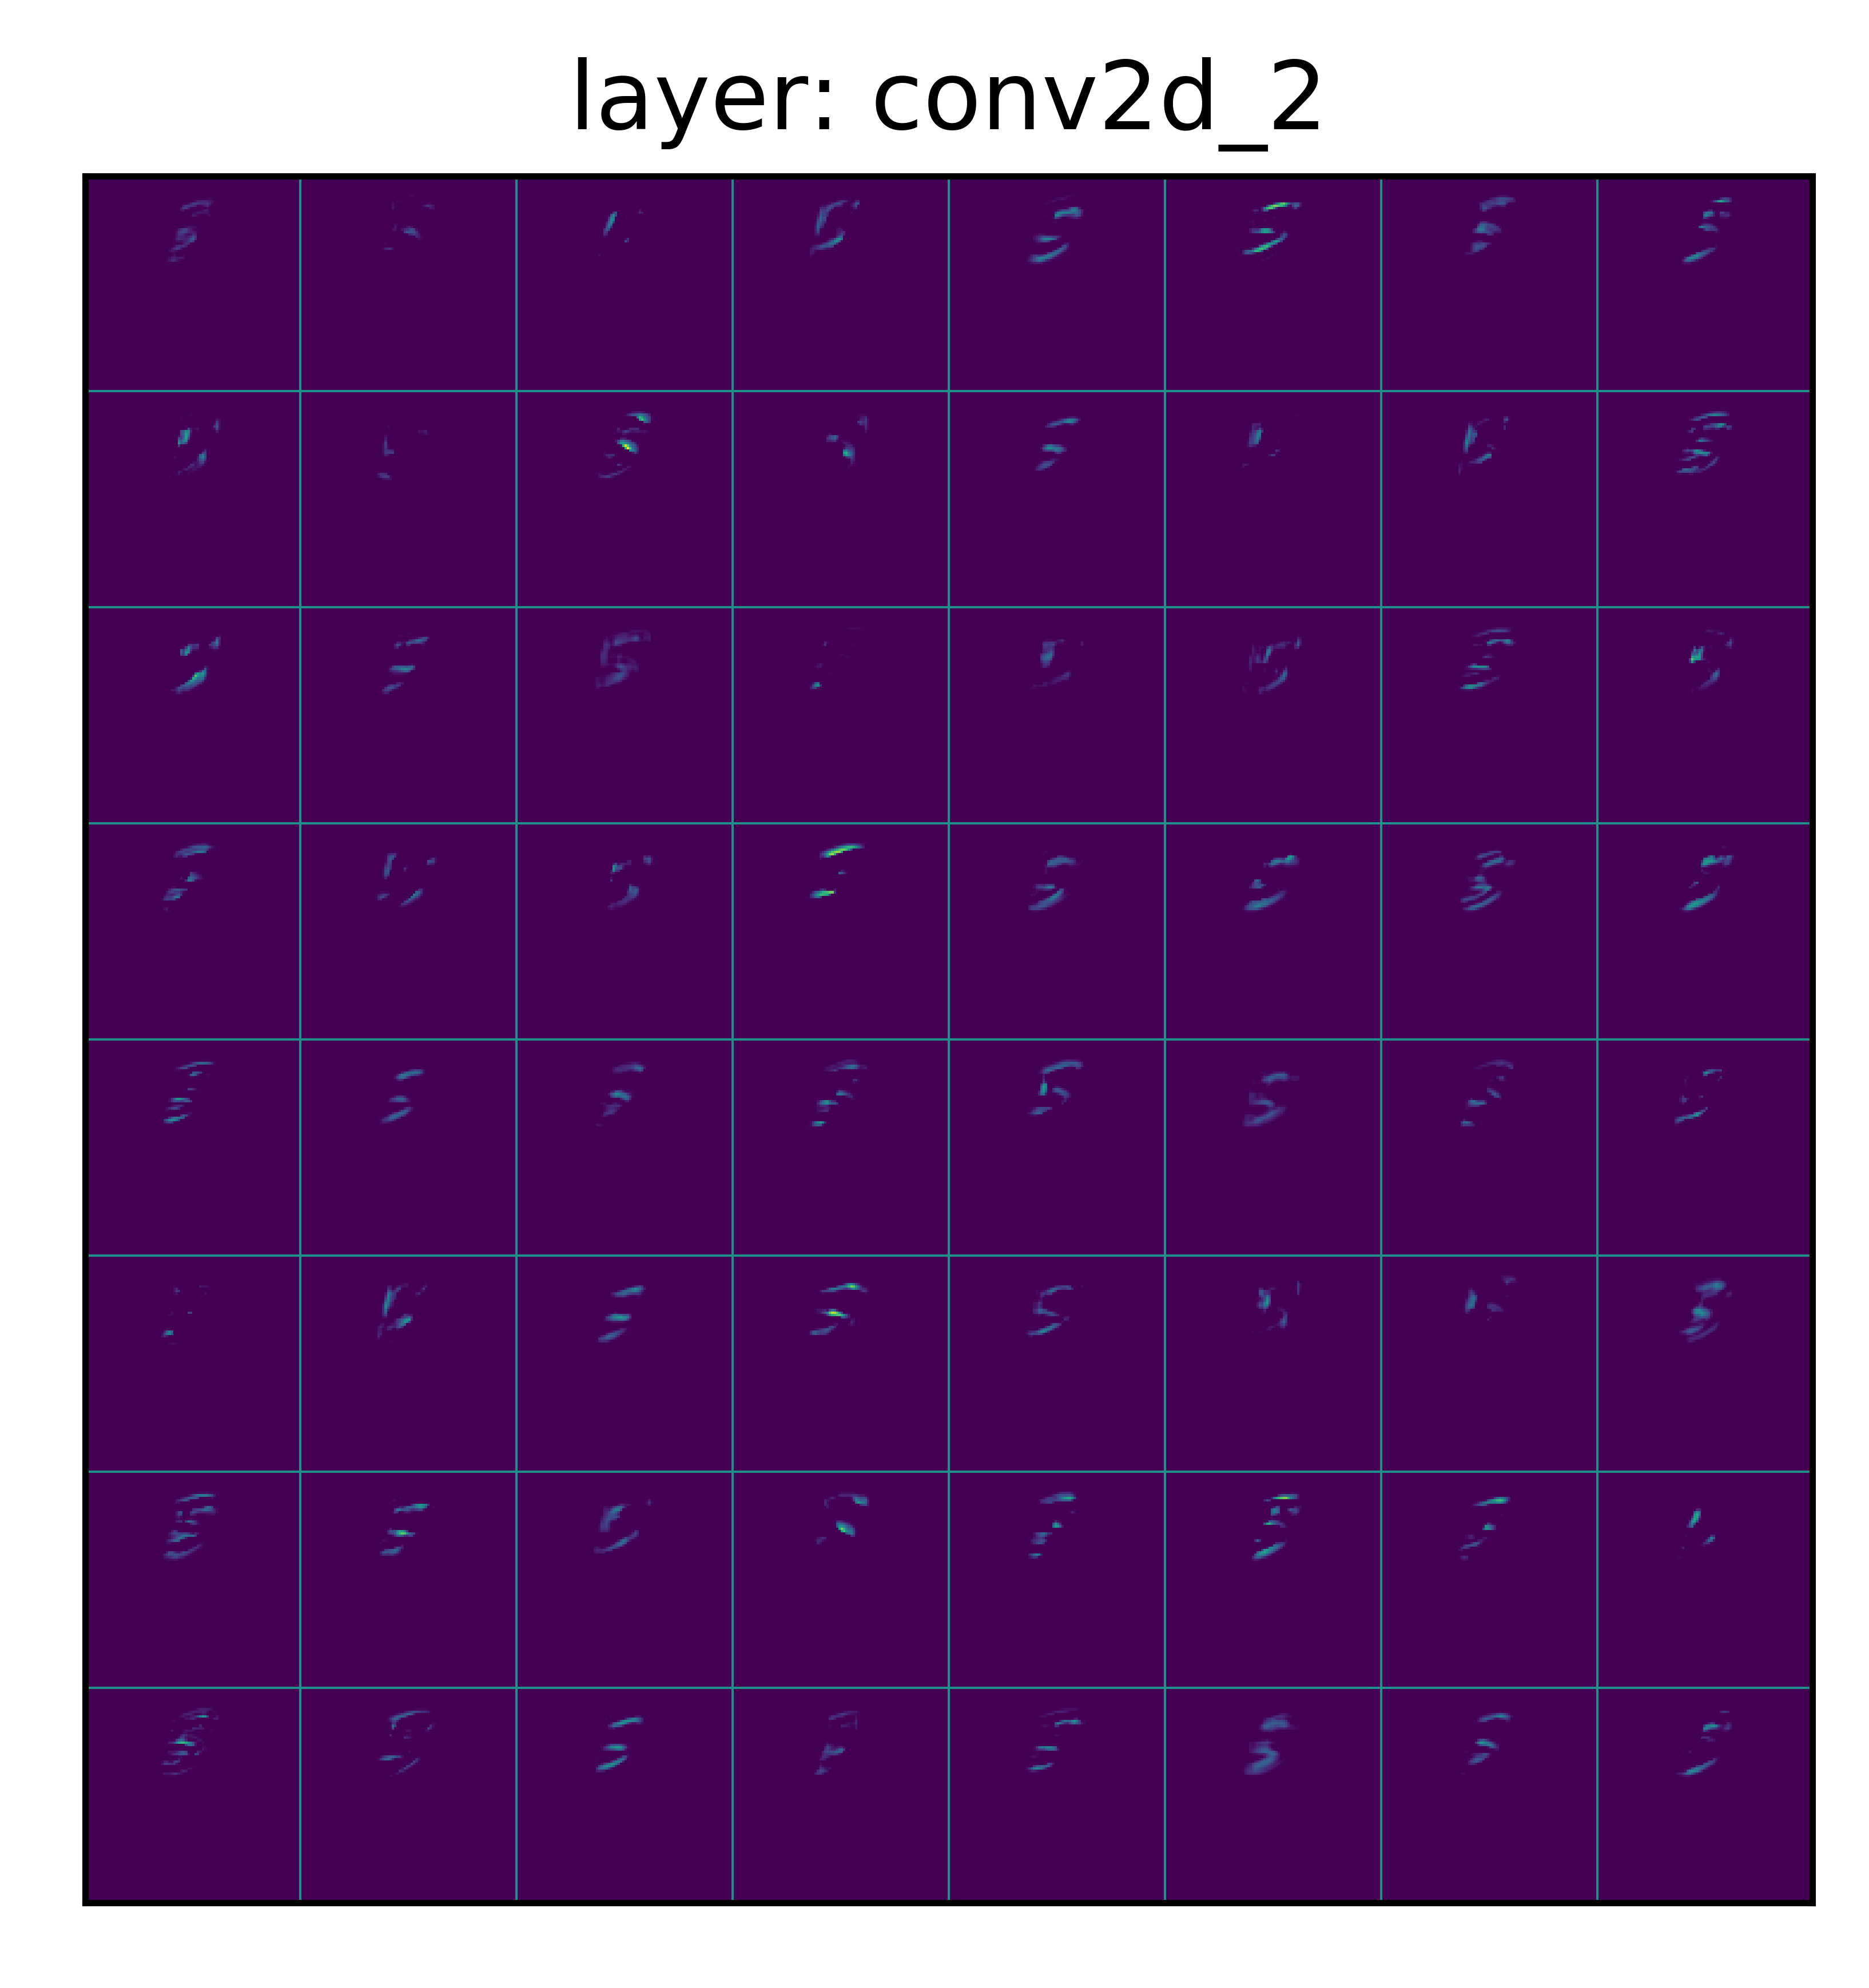

image 3
64  channels


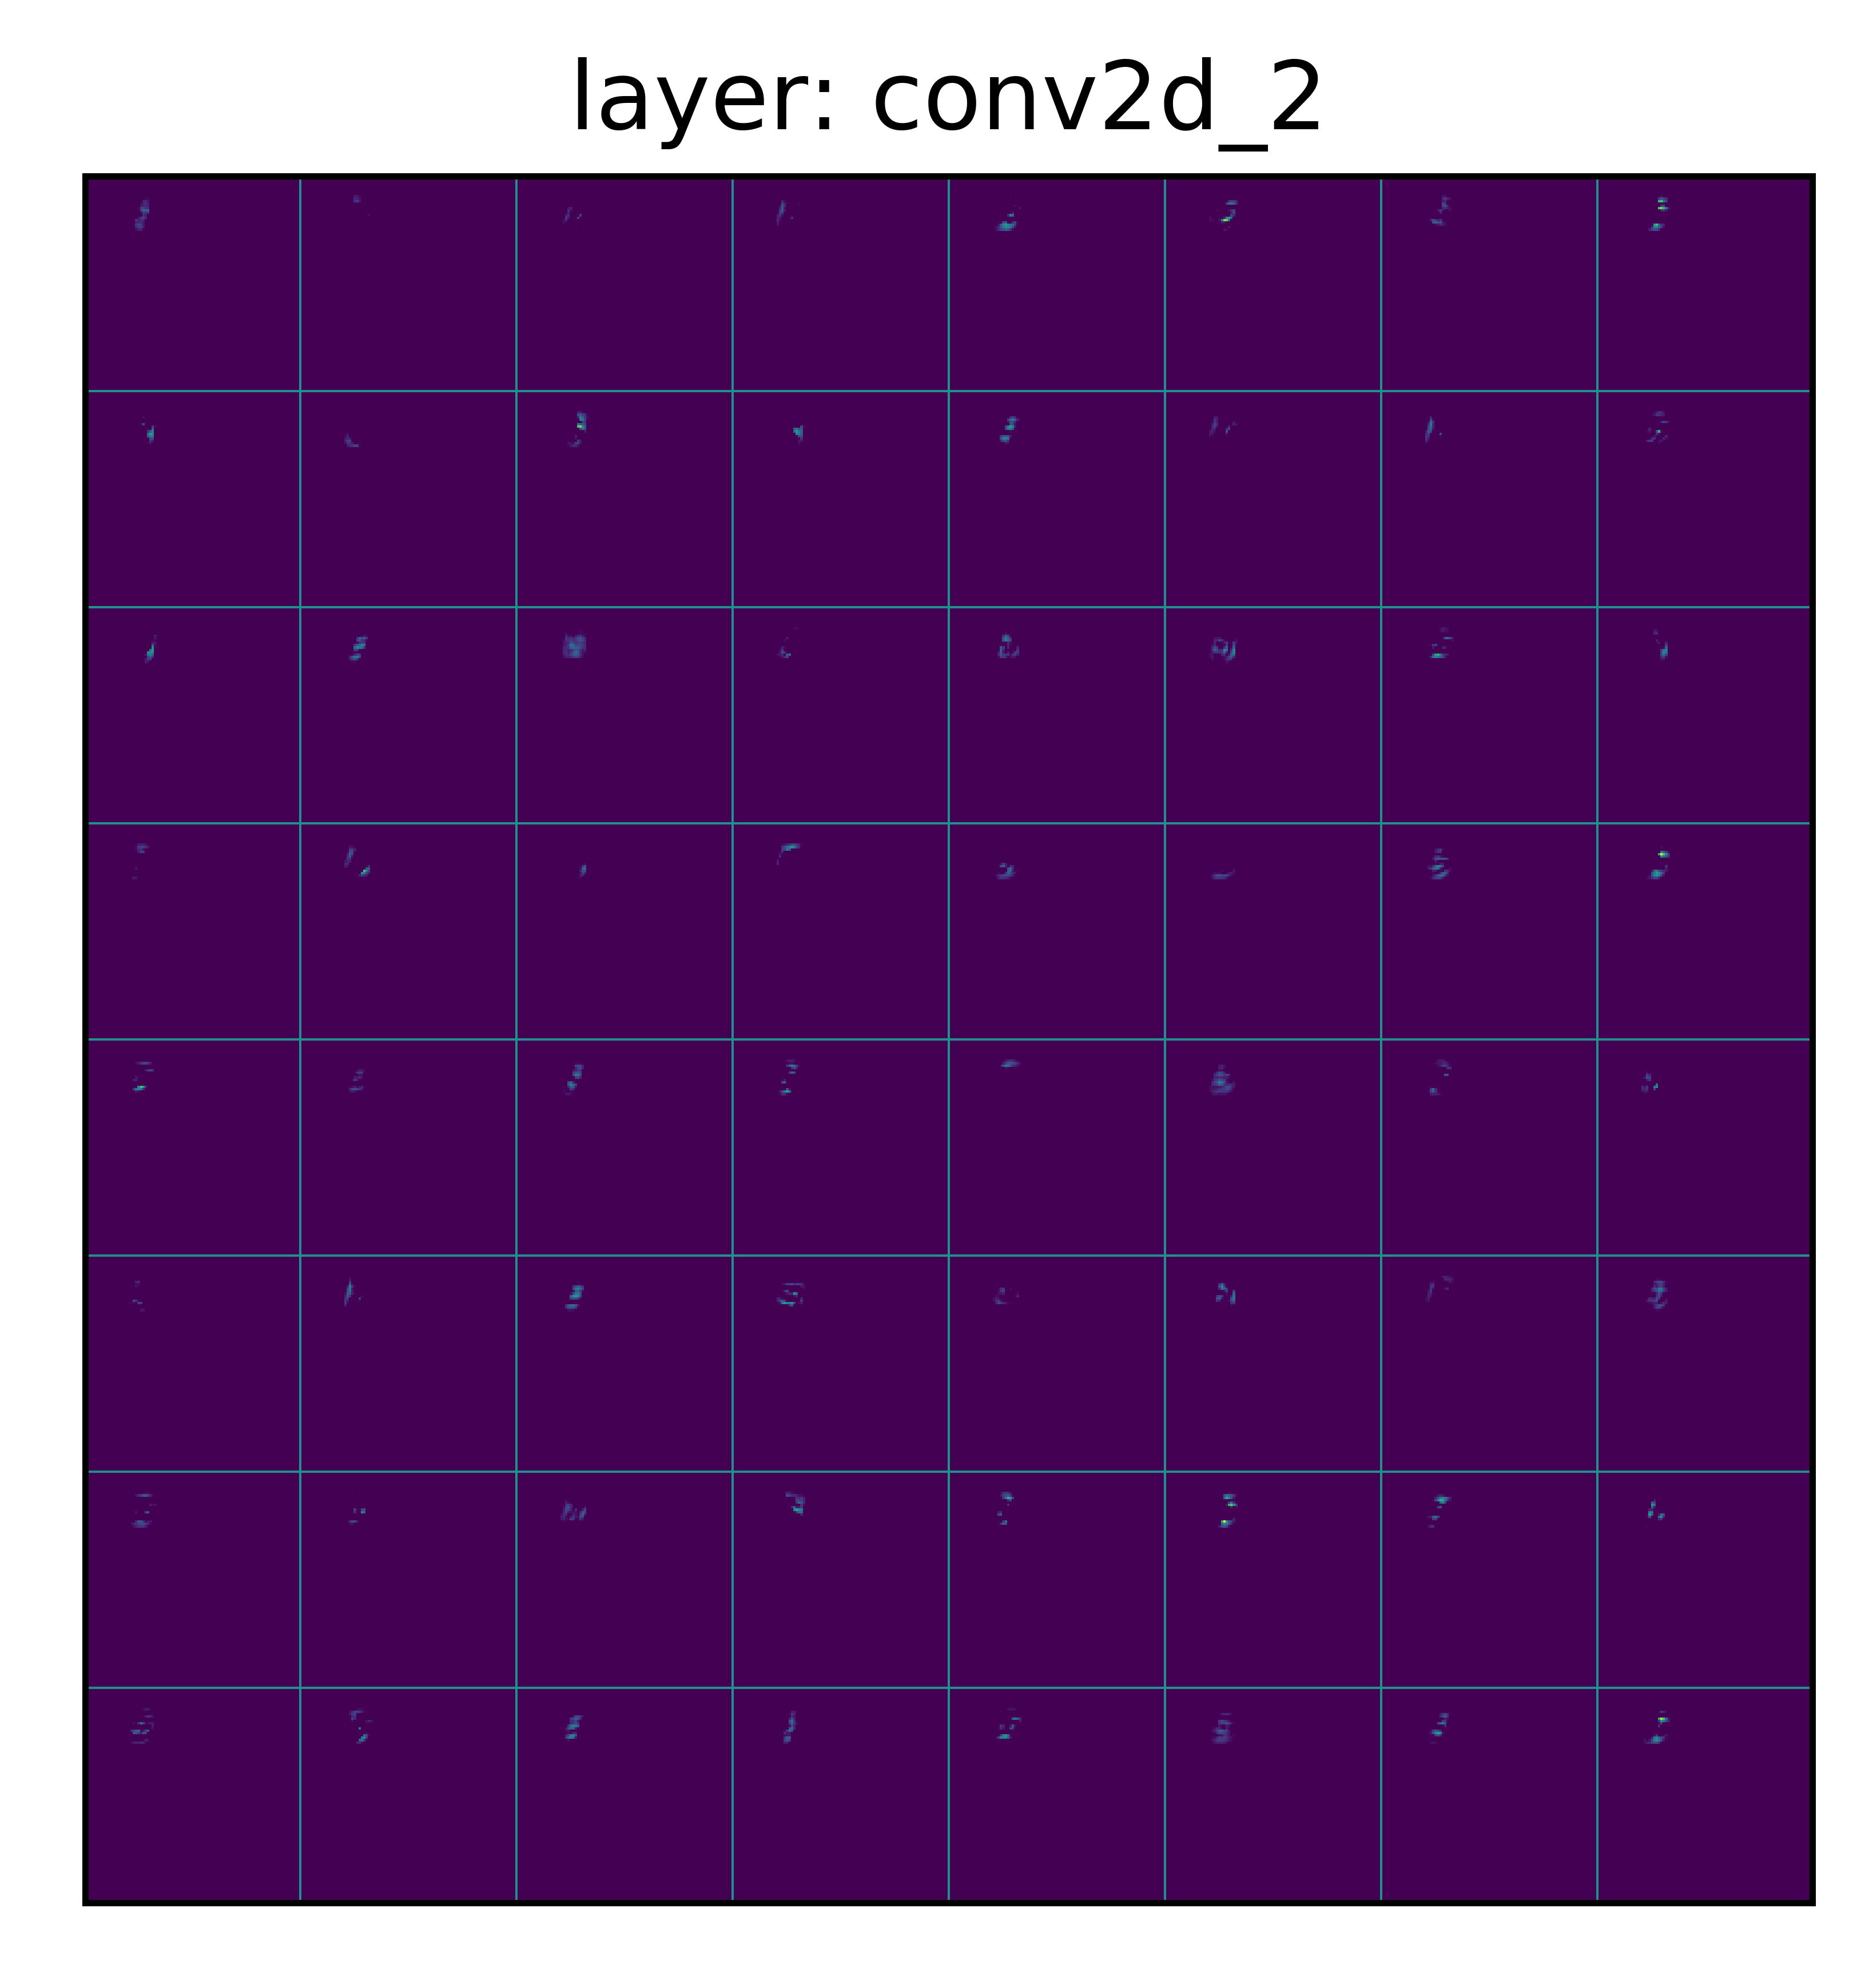

image 4
64  channels


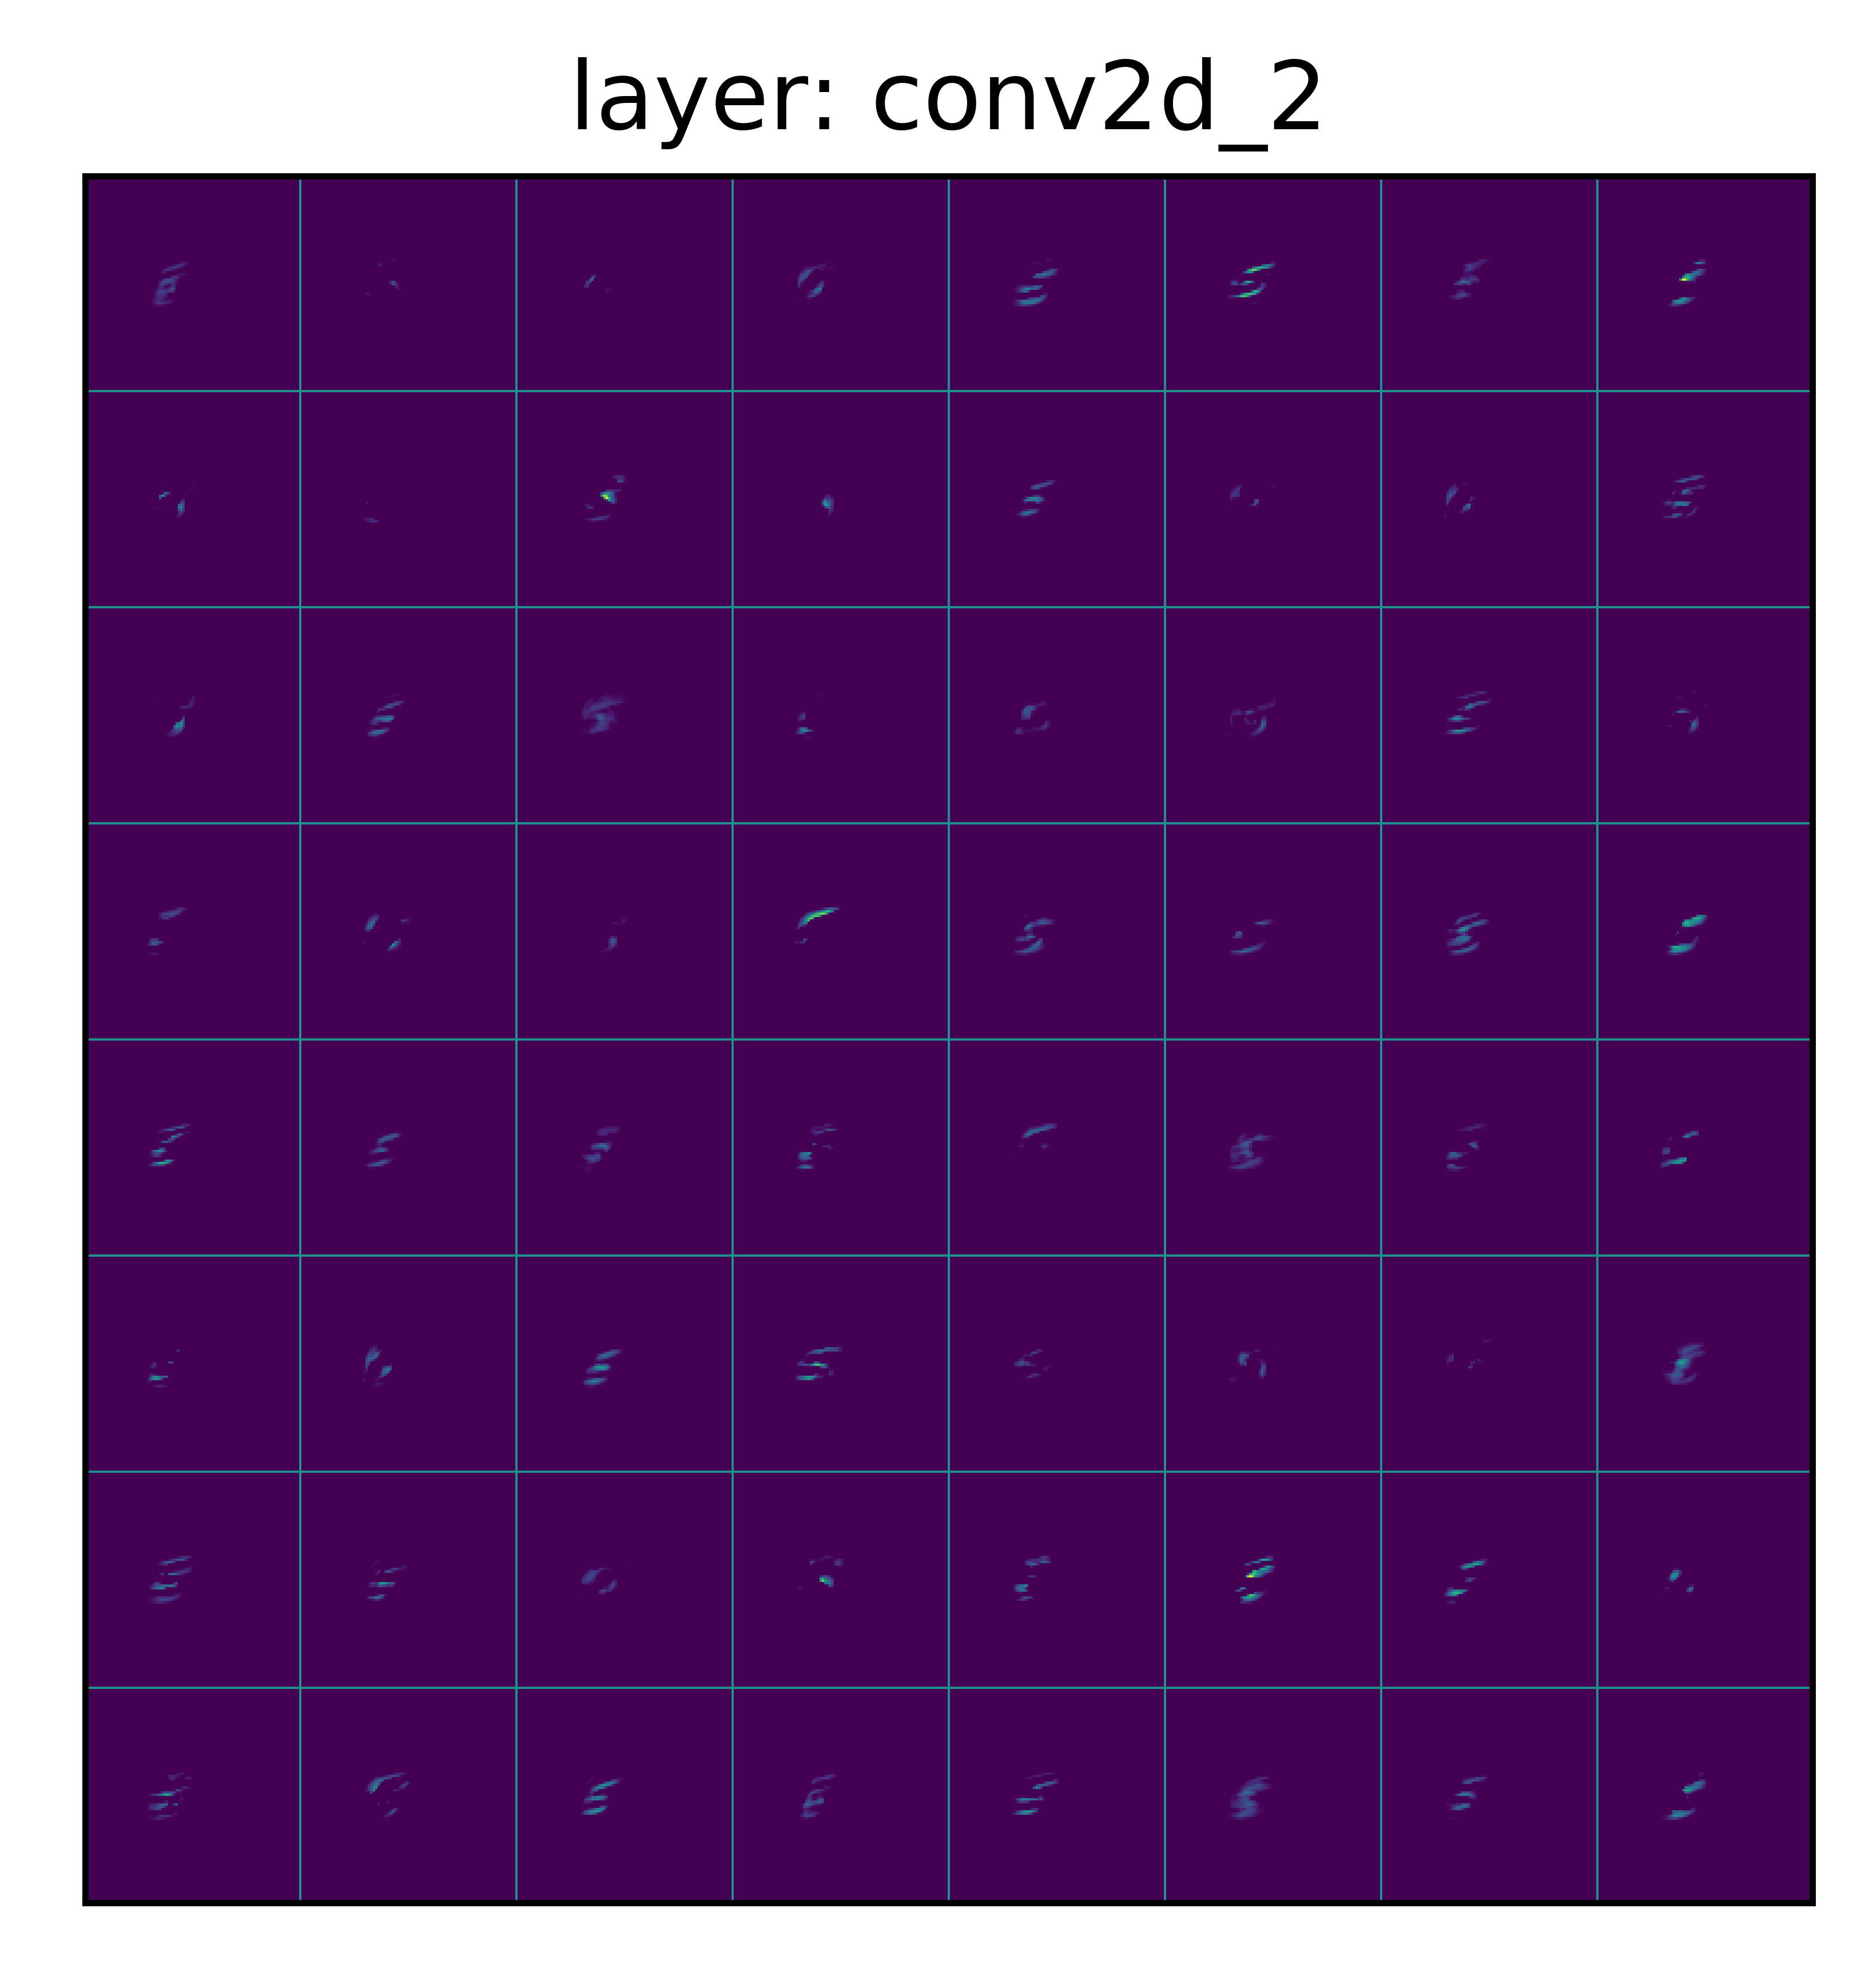

In [11]:
i = 3
for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],8, new_model.layers[i].name)

image 0
64  channels


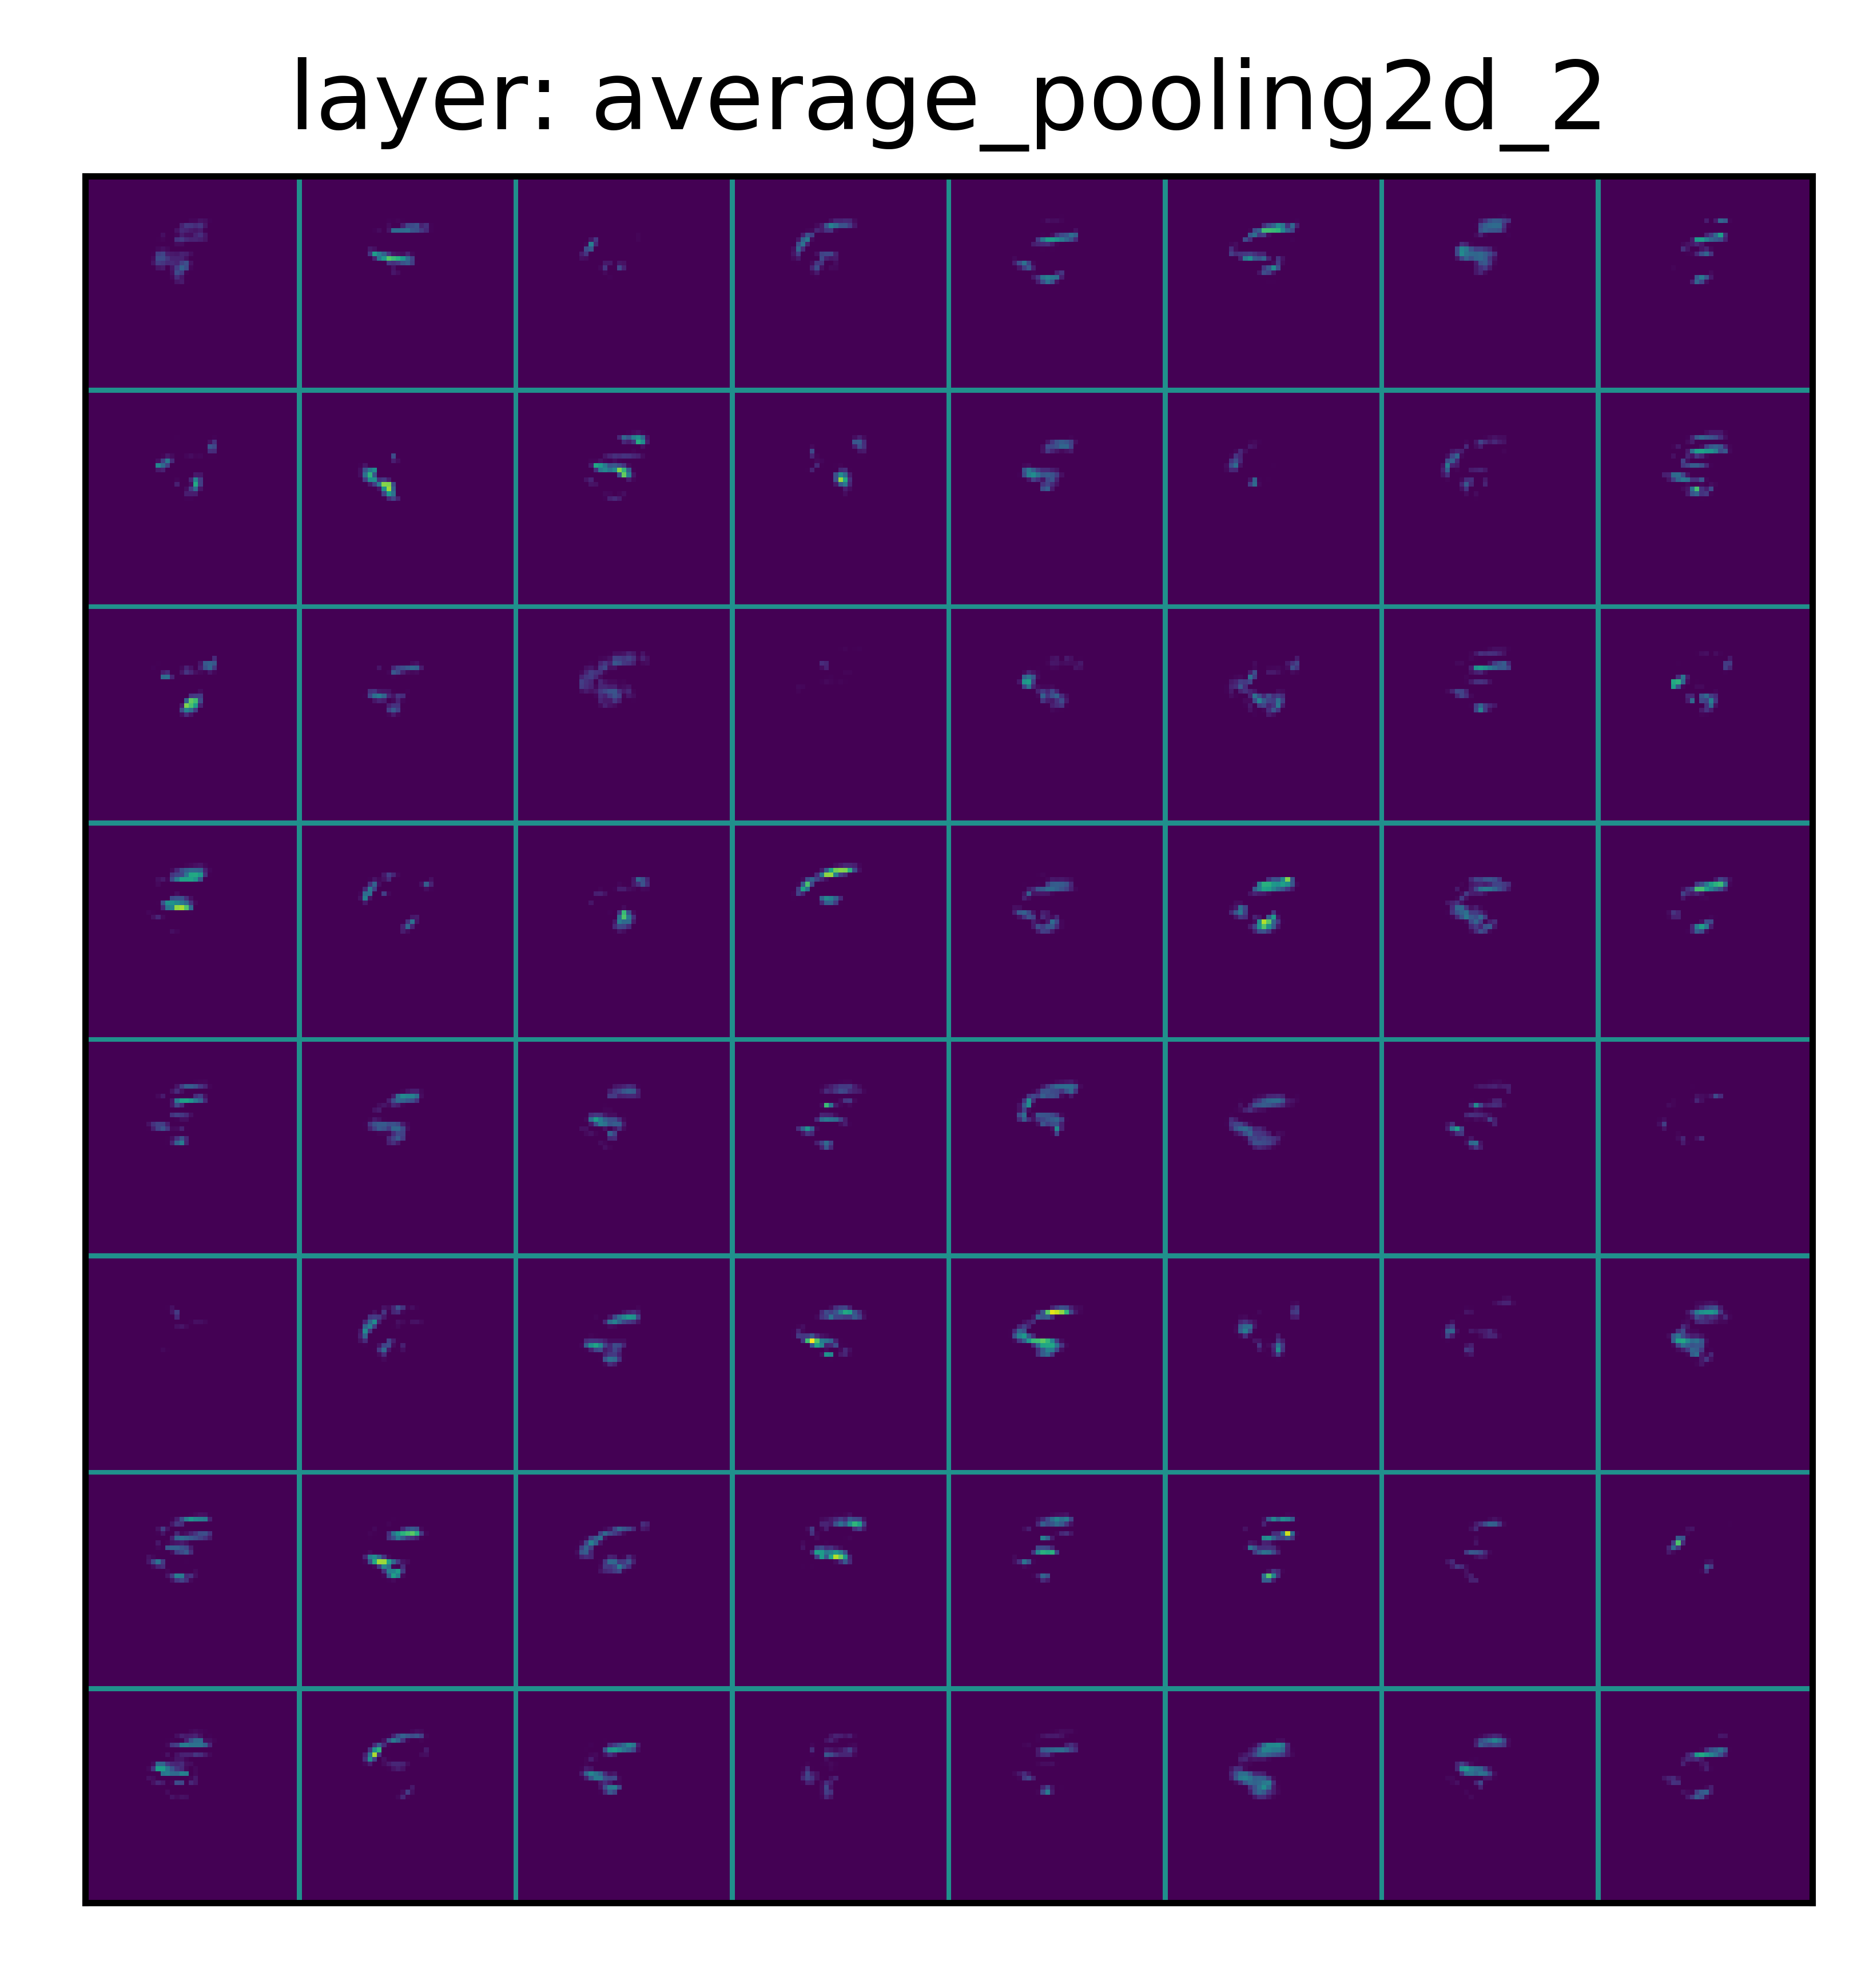

image 1
64  channels


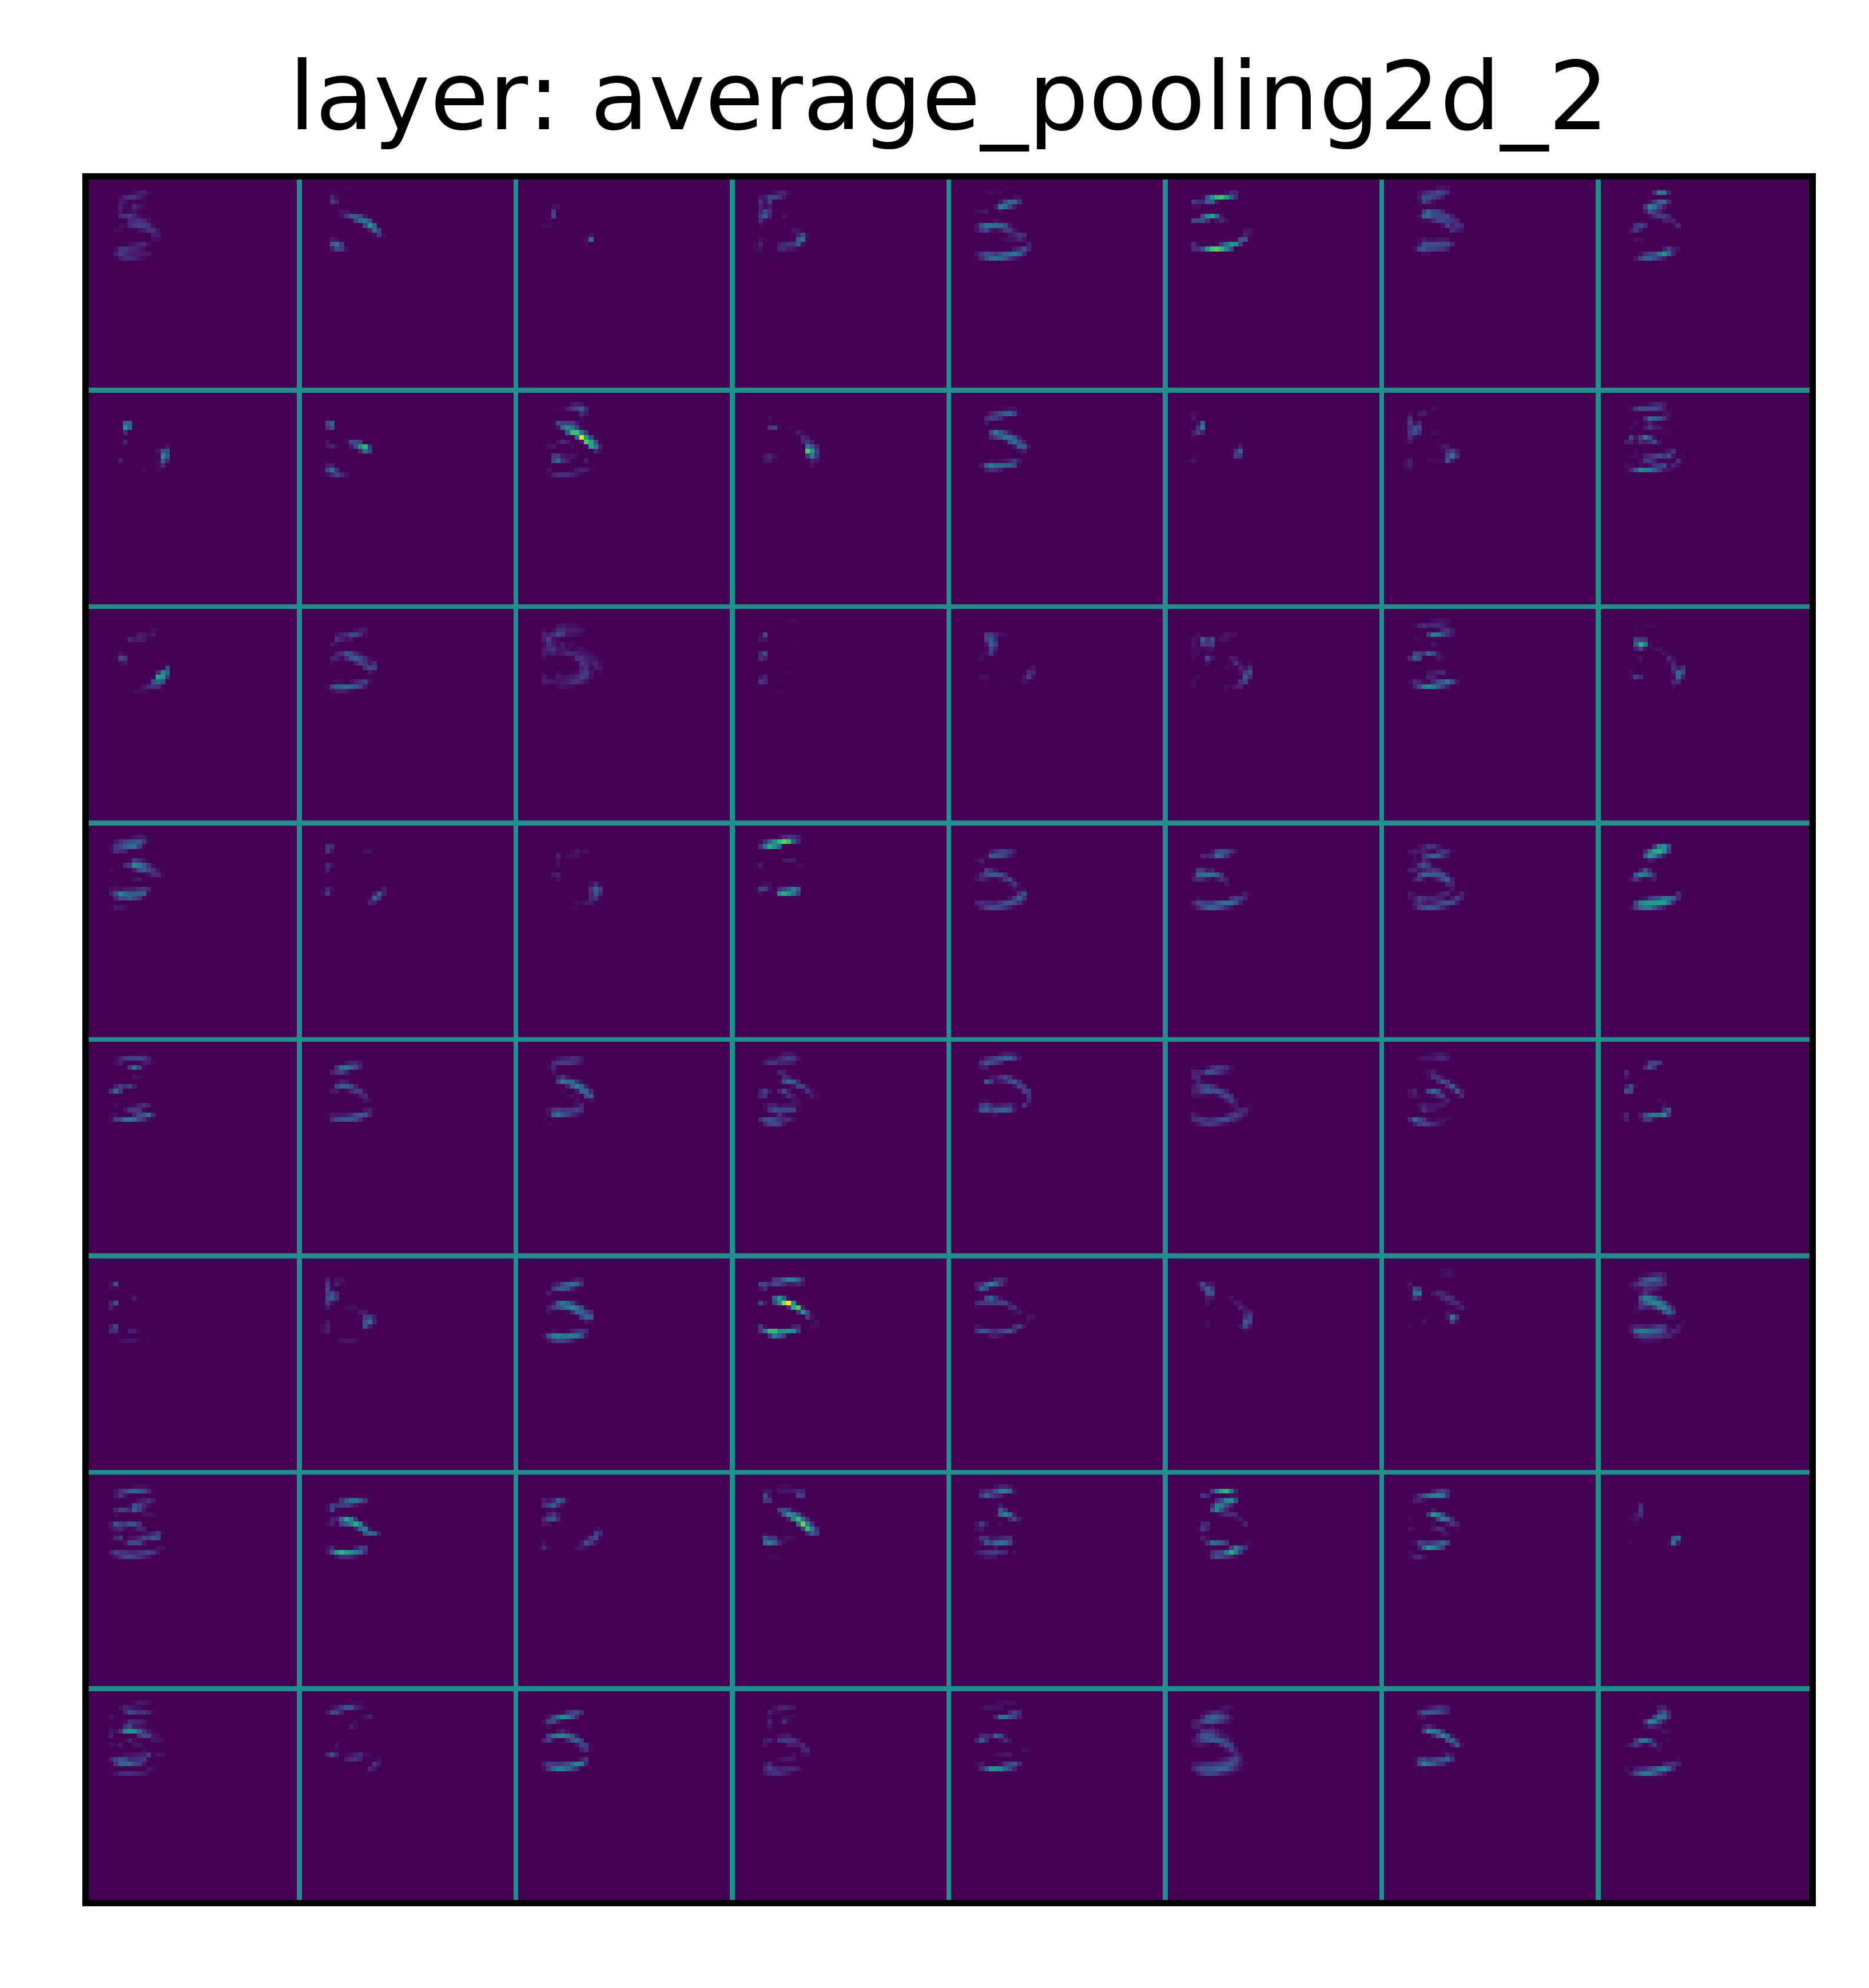

image 2
64  channels


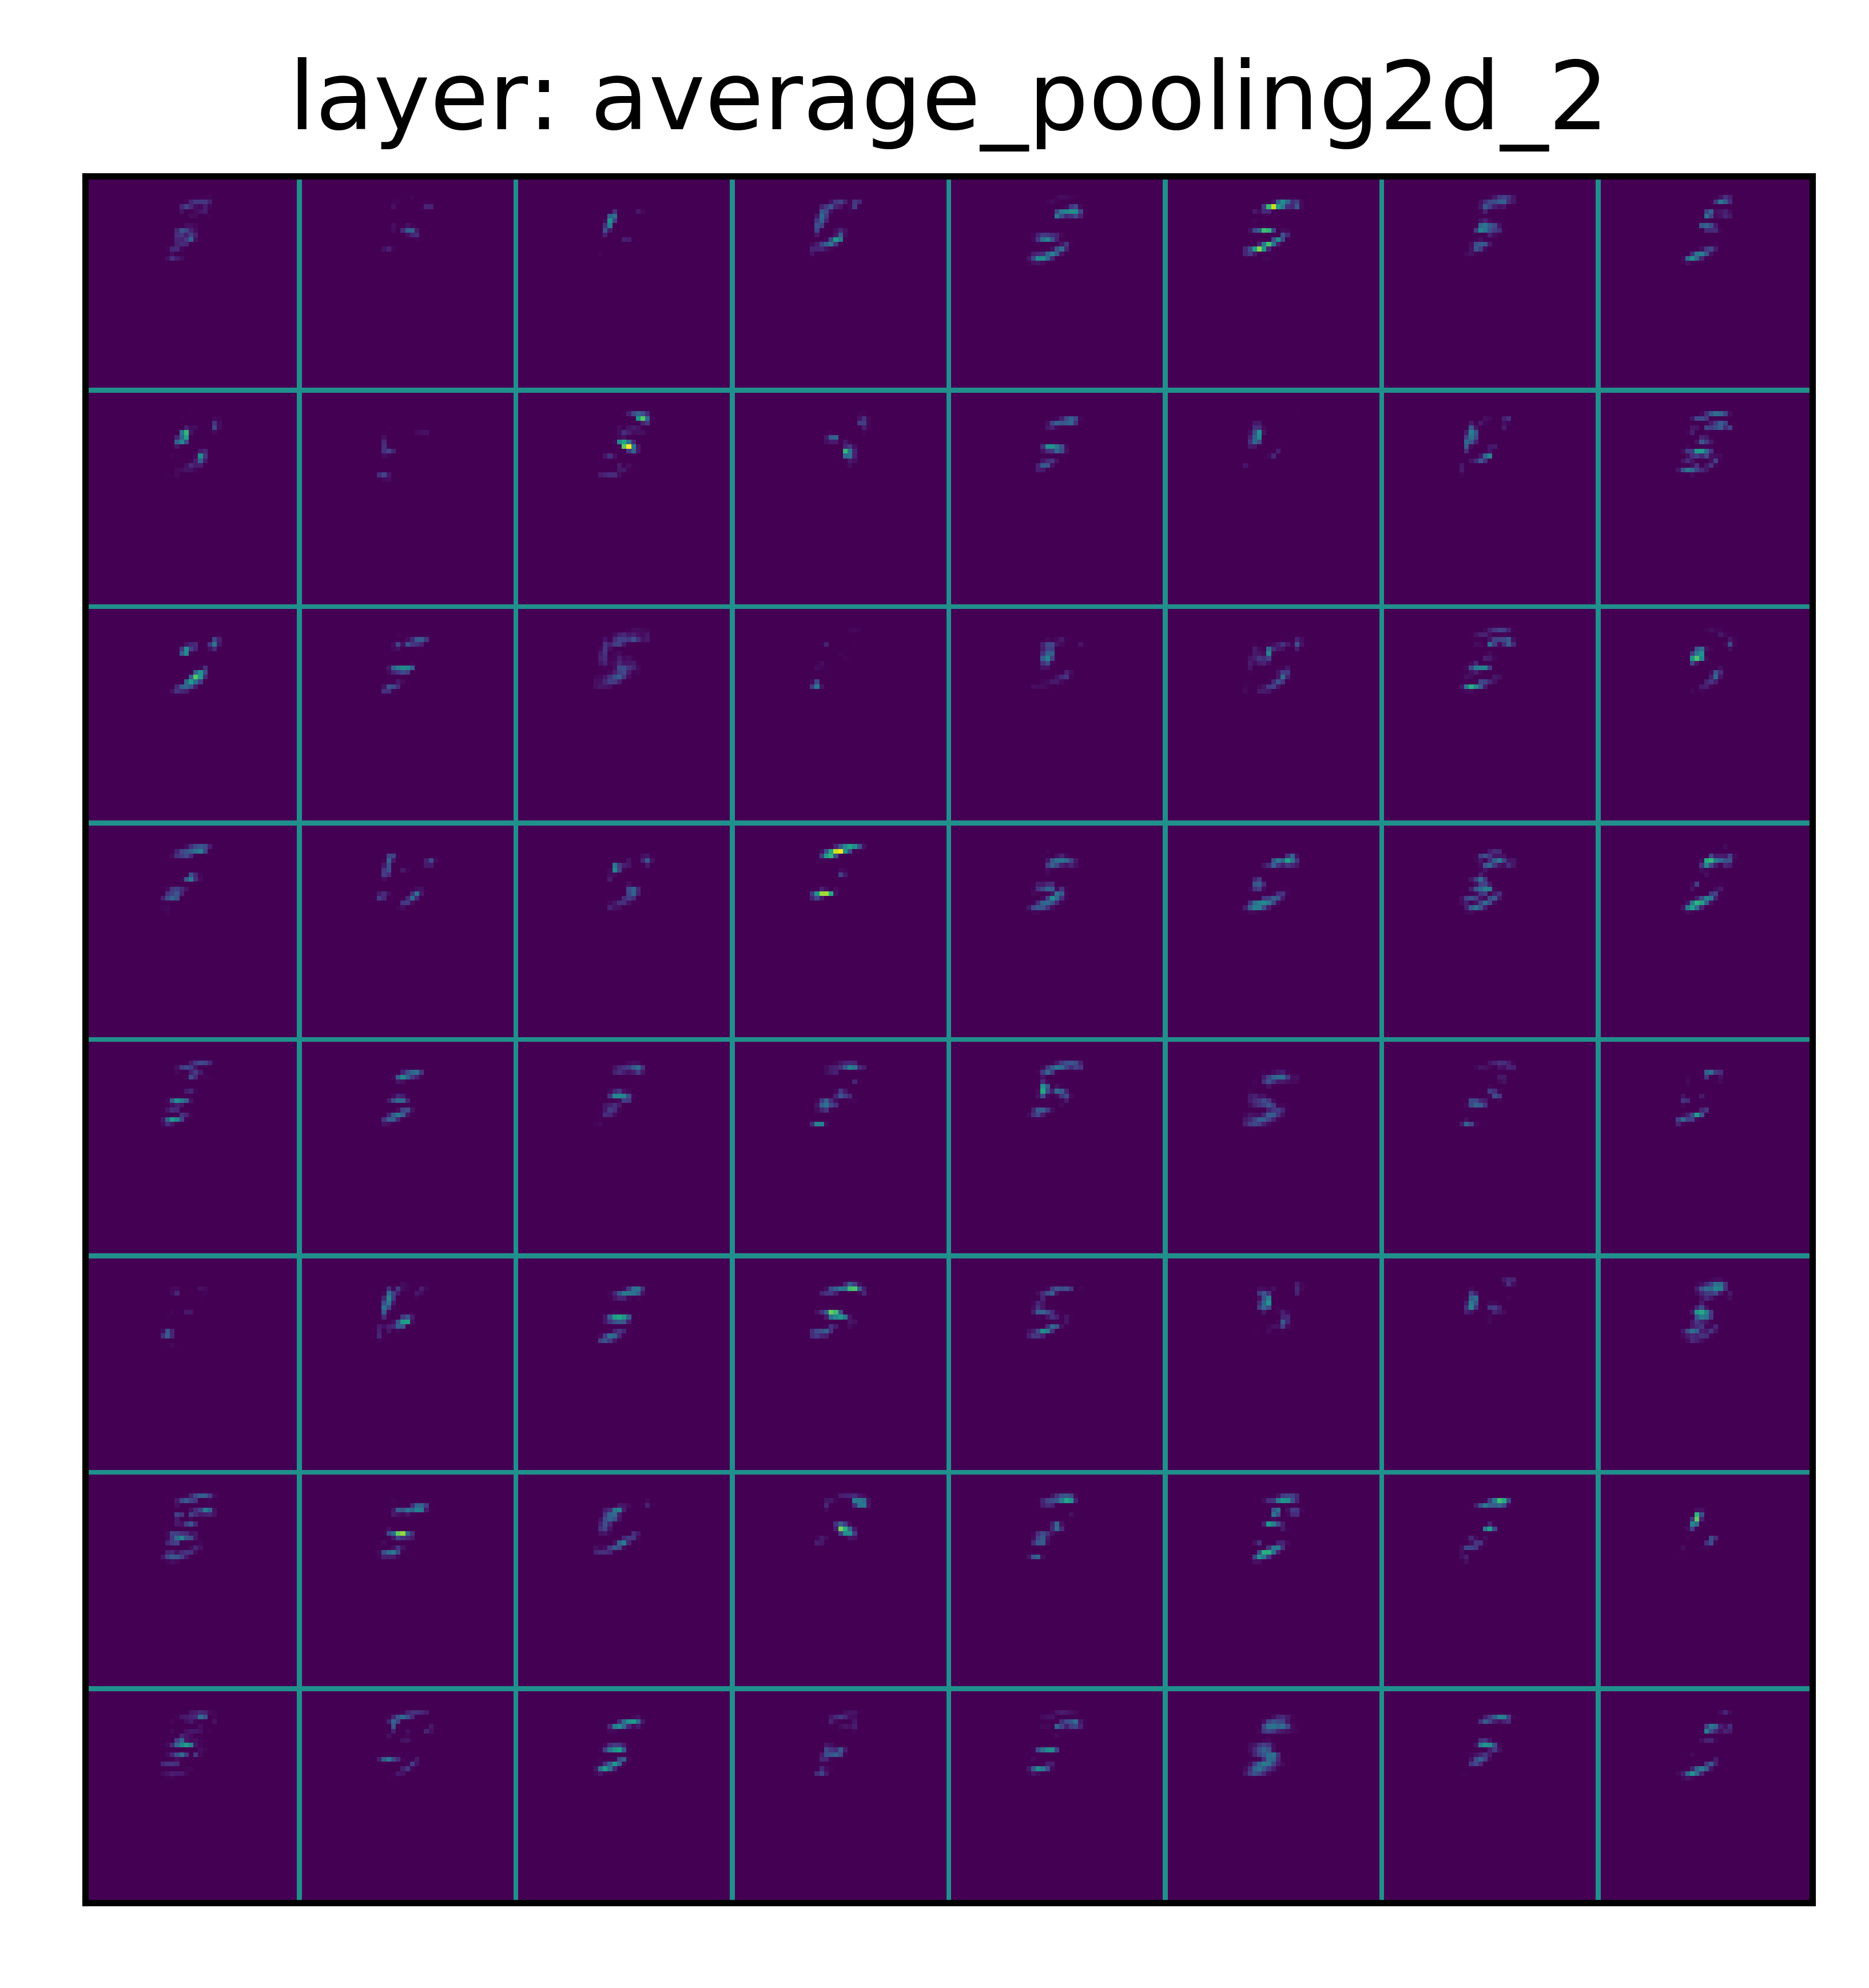

image 3
64  channels


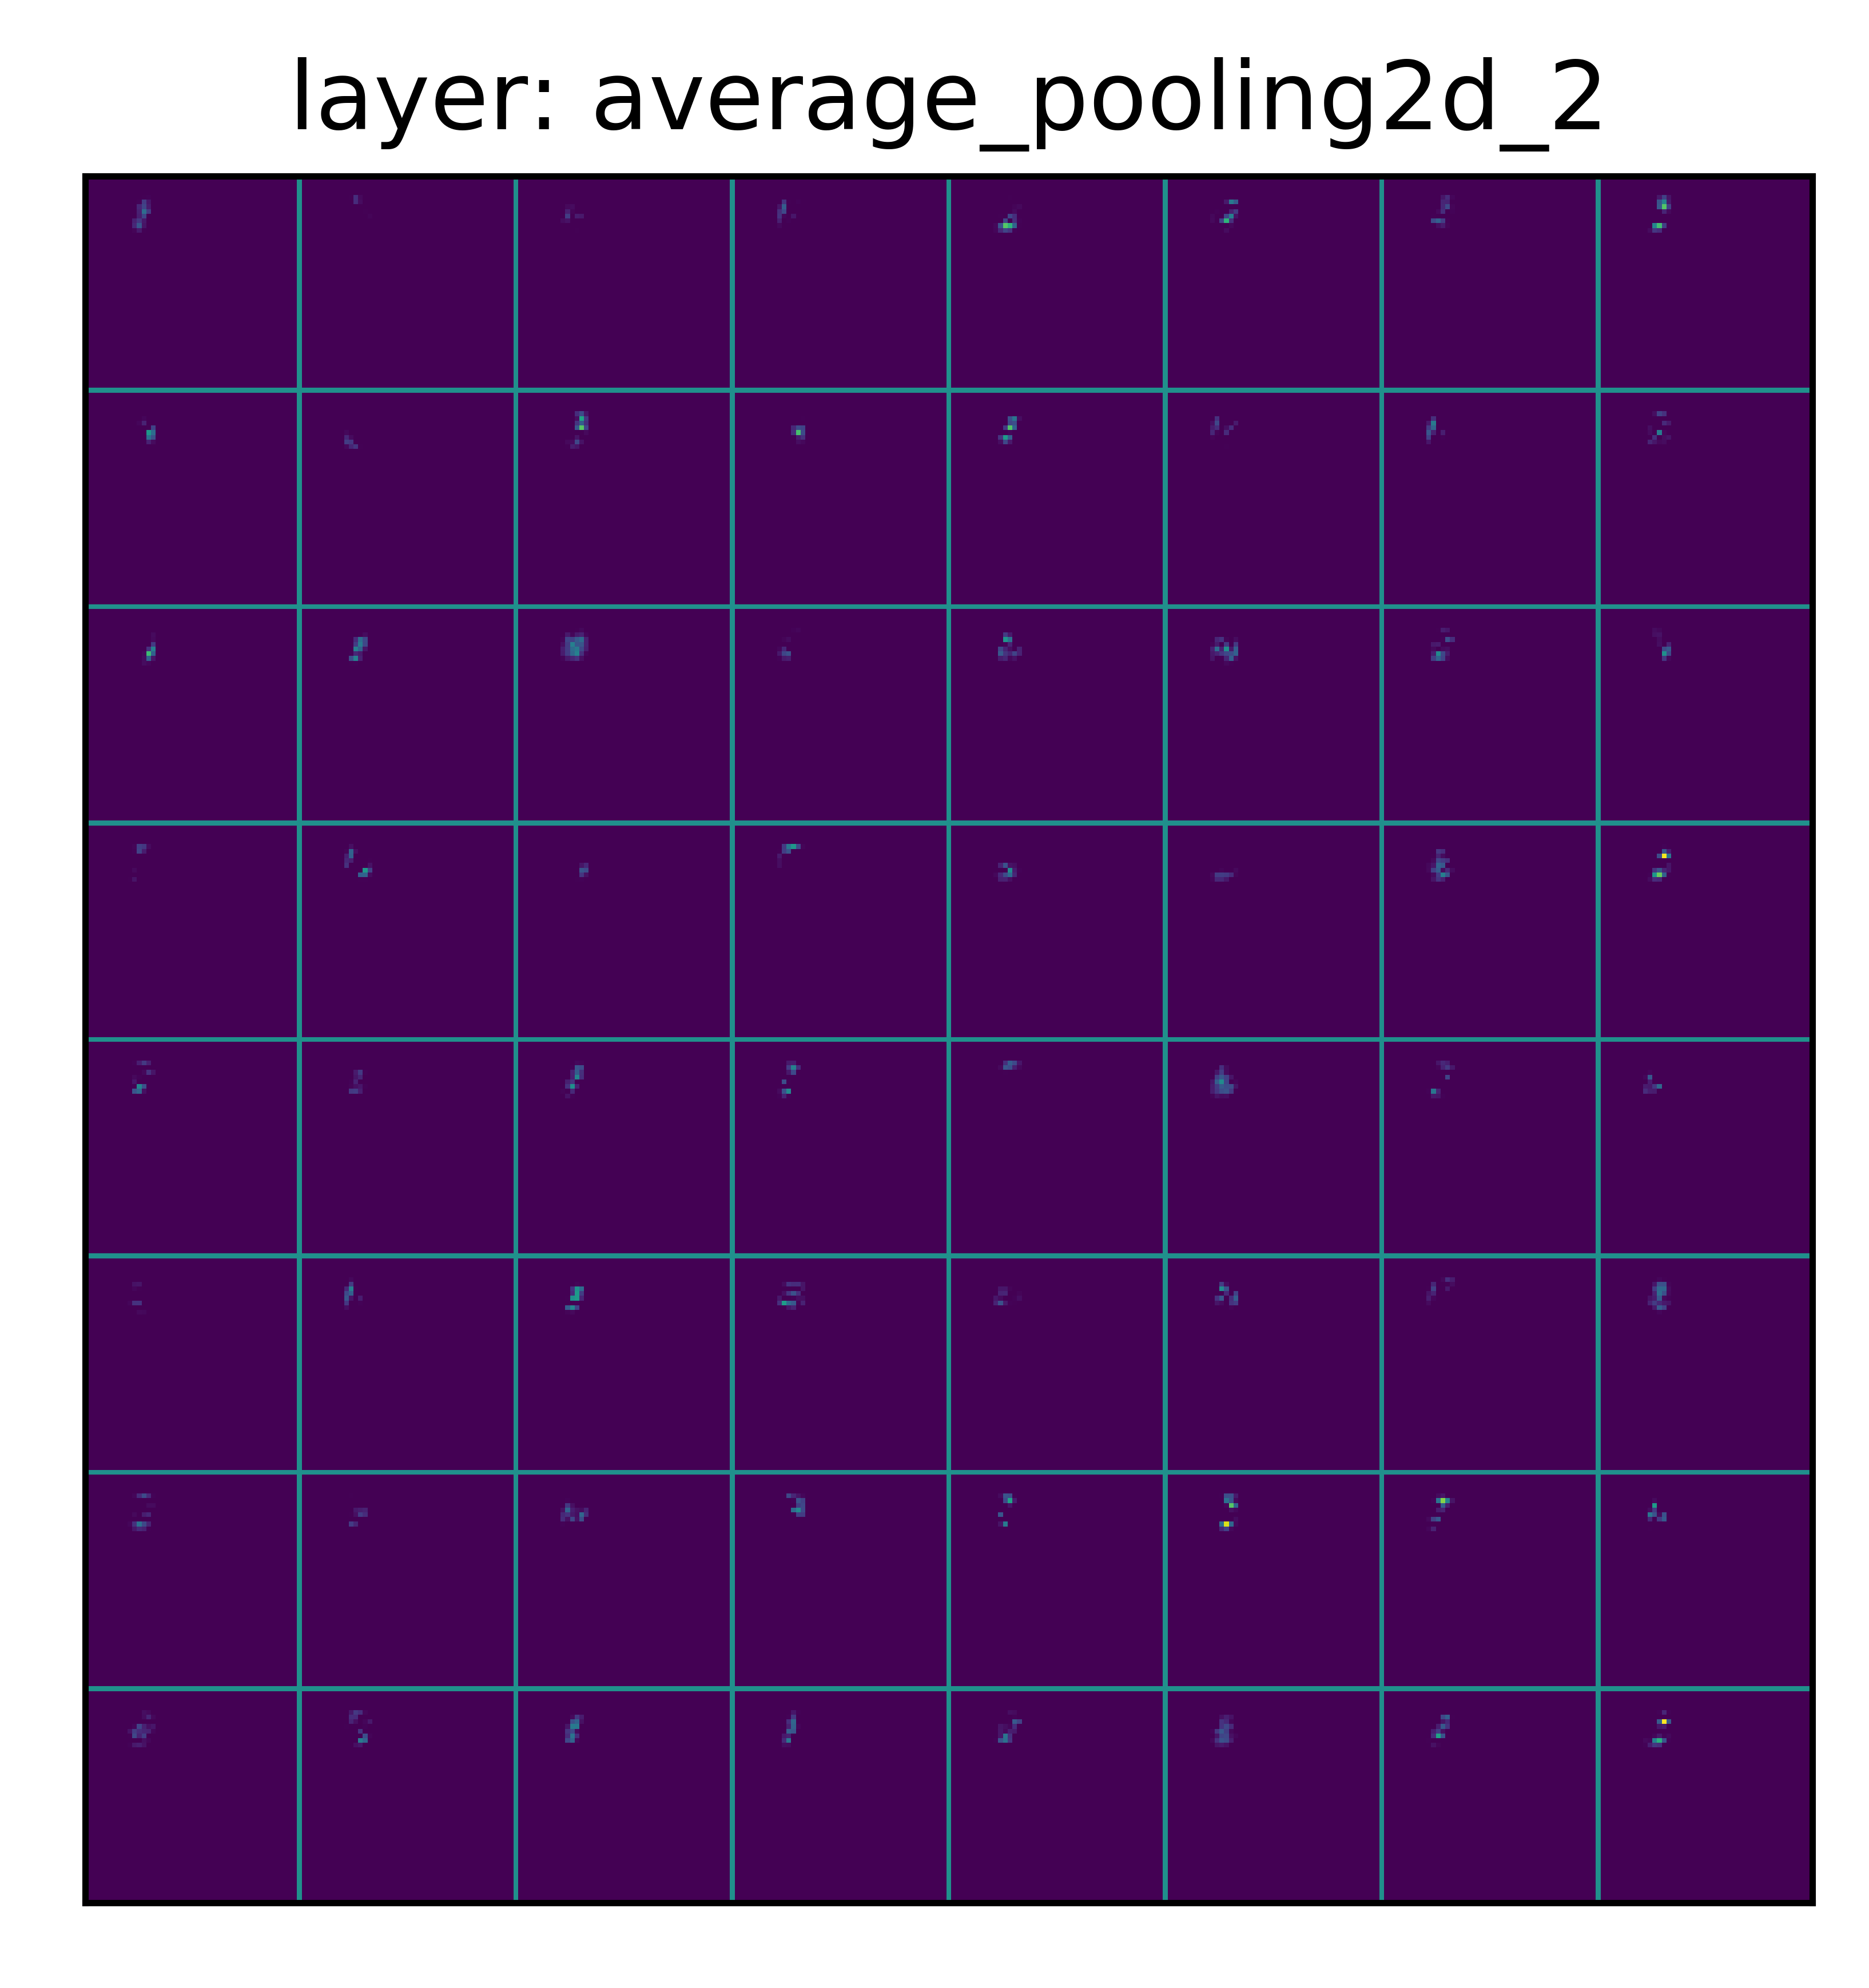

image 4
64  channels


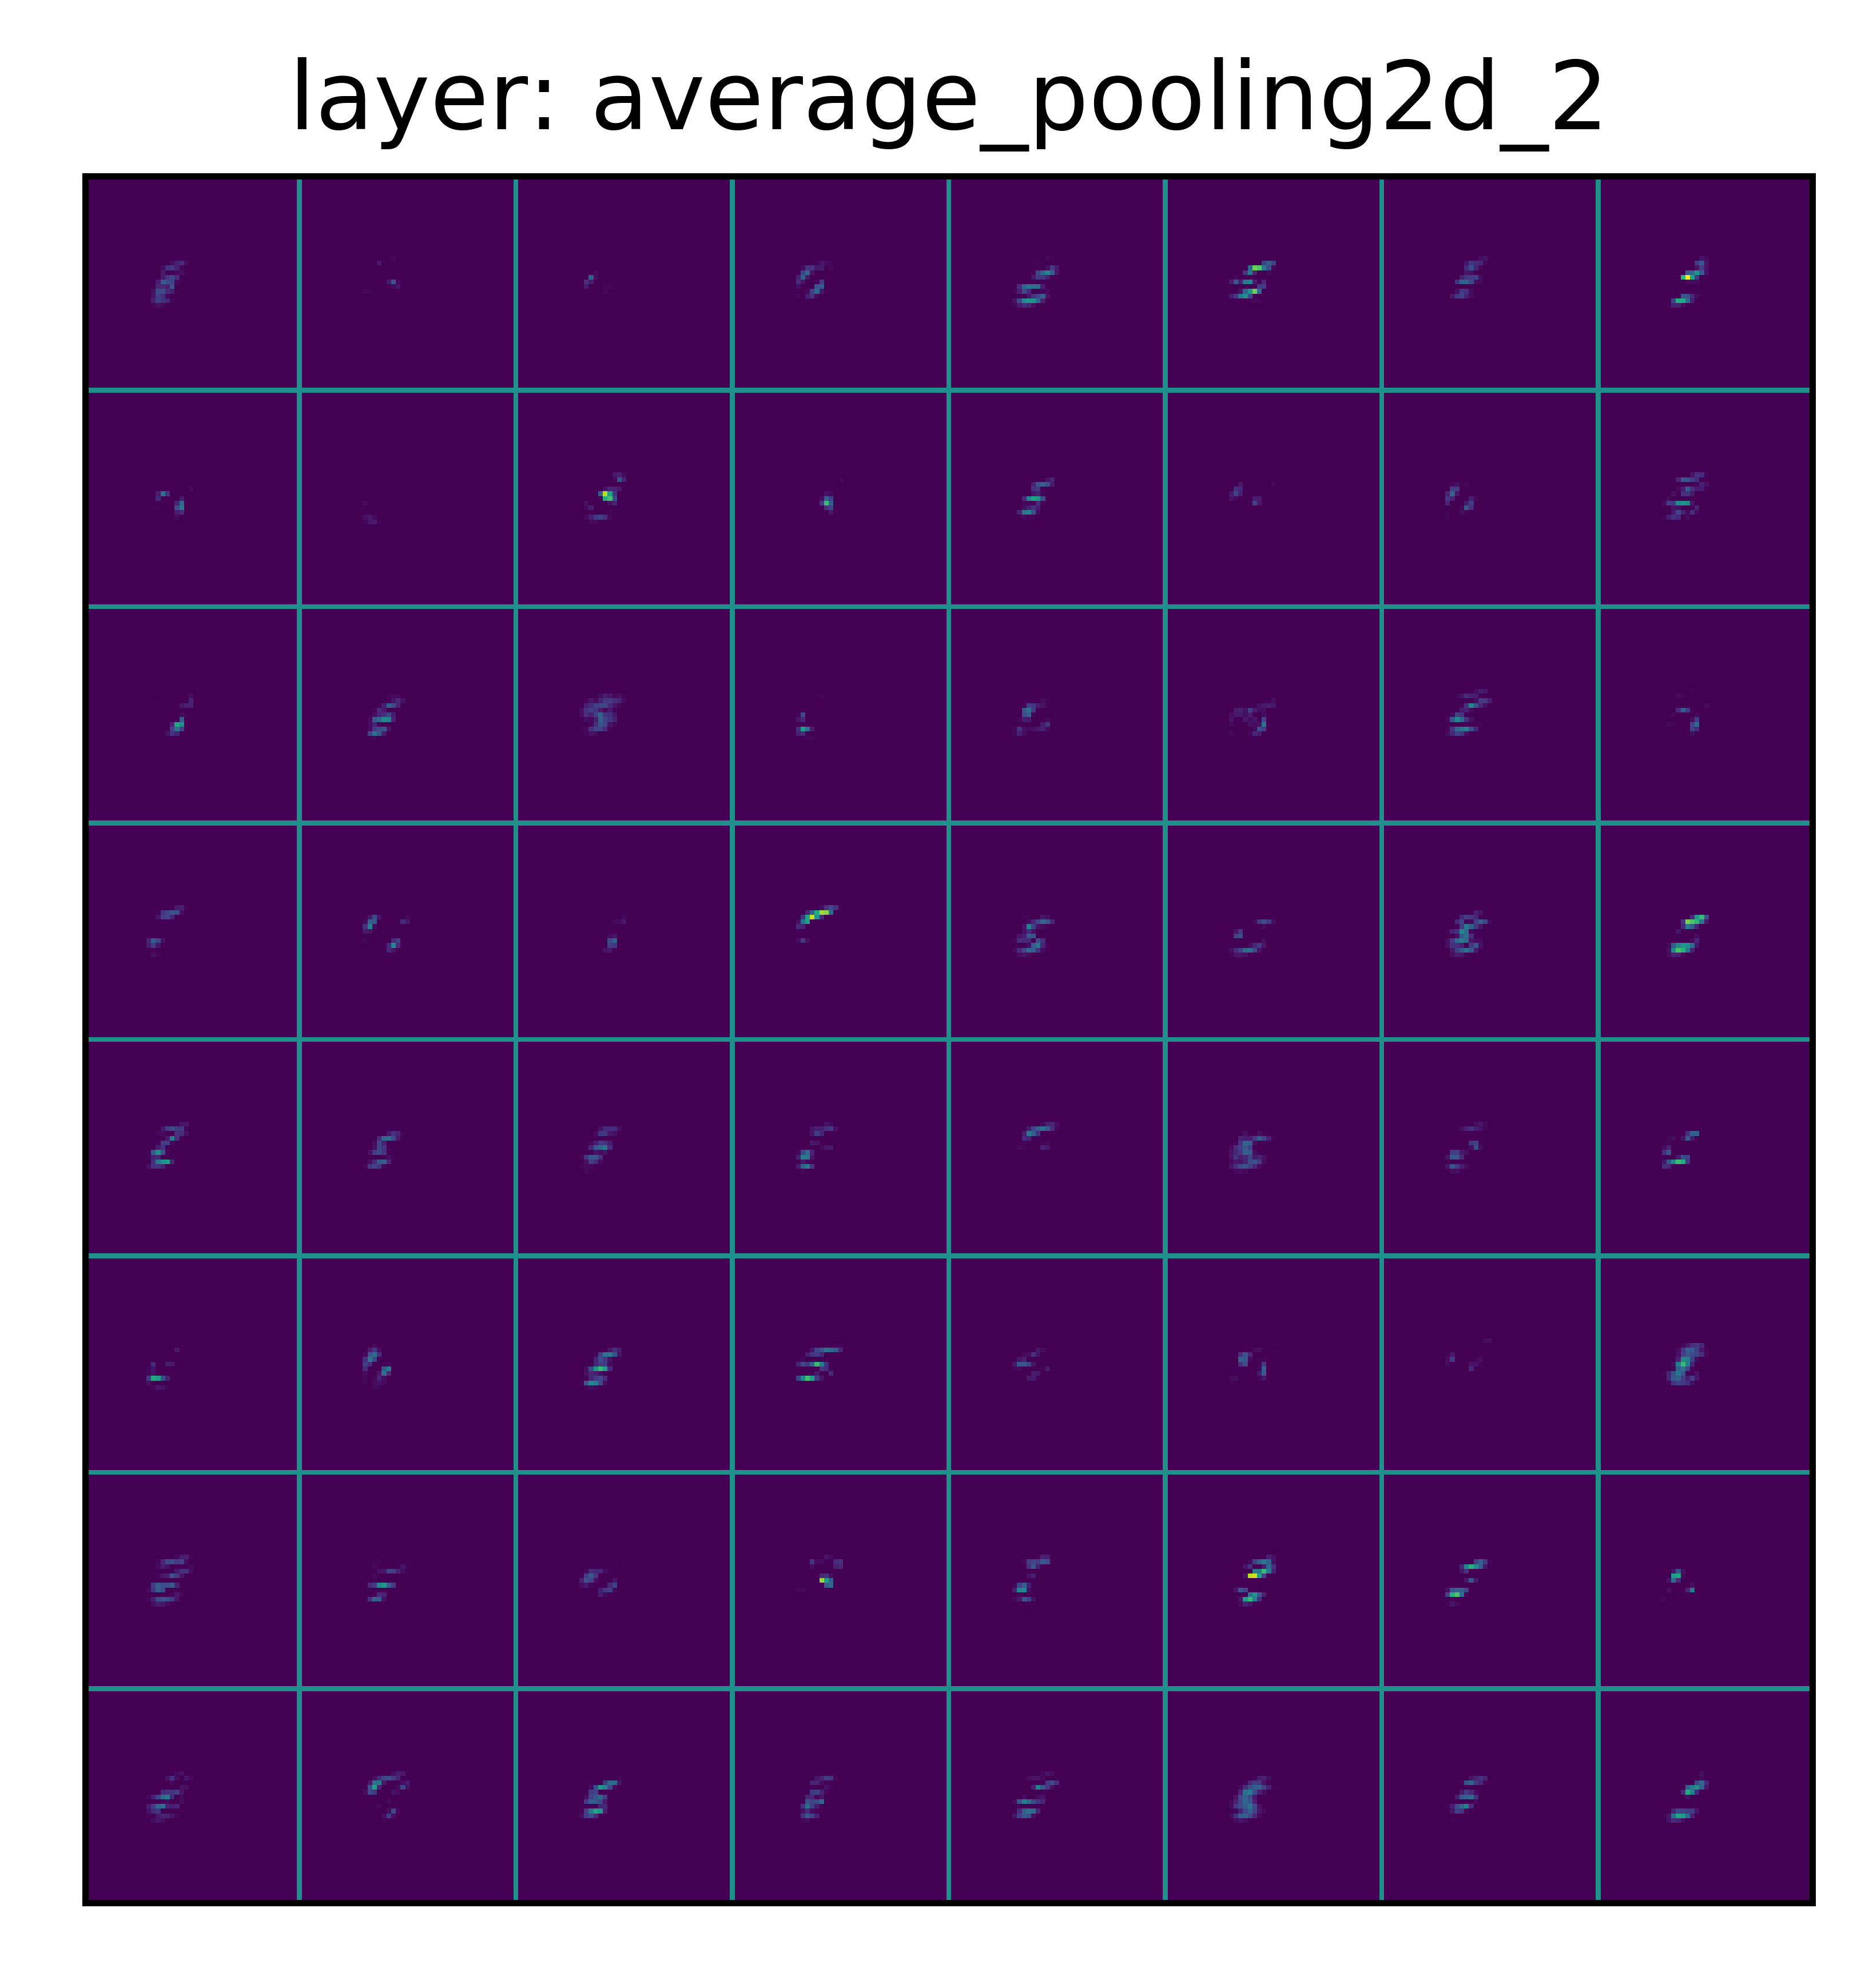

In [12]:
i = 4
for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],8, new_model.layers[i].name)

image 0
32  channels


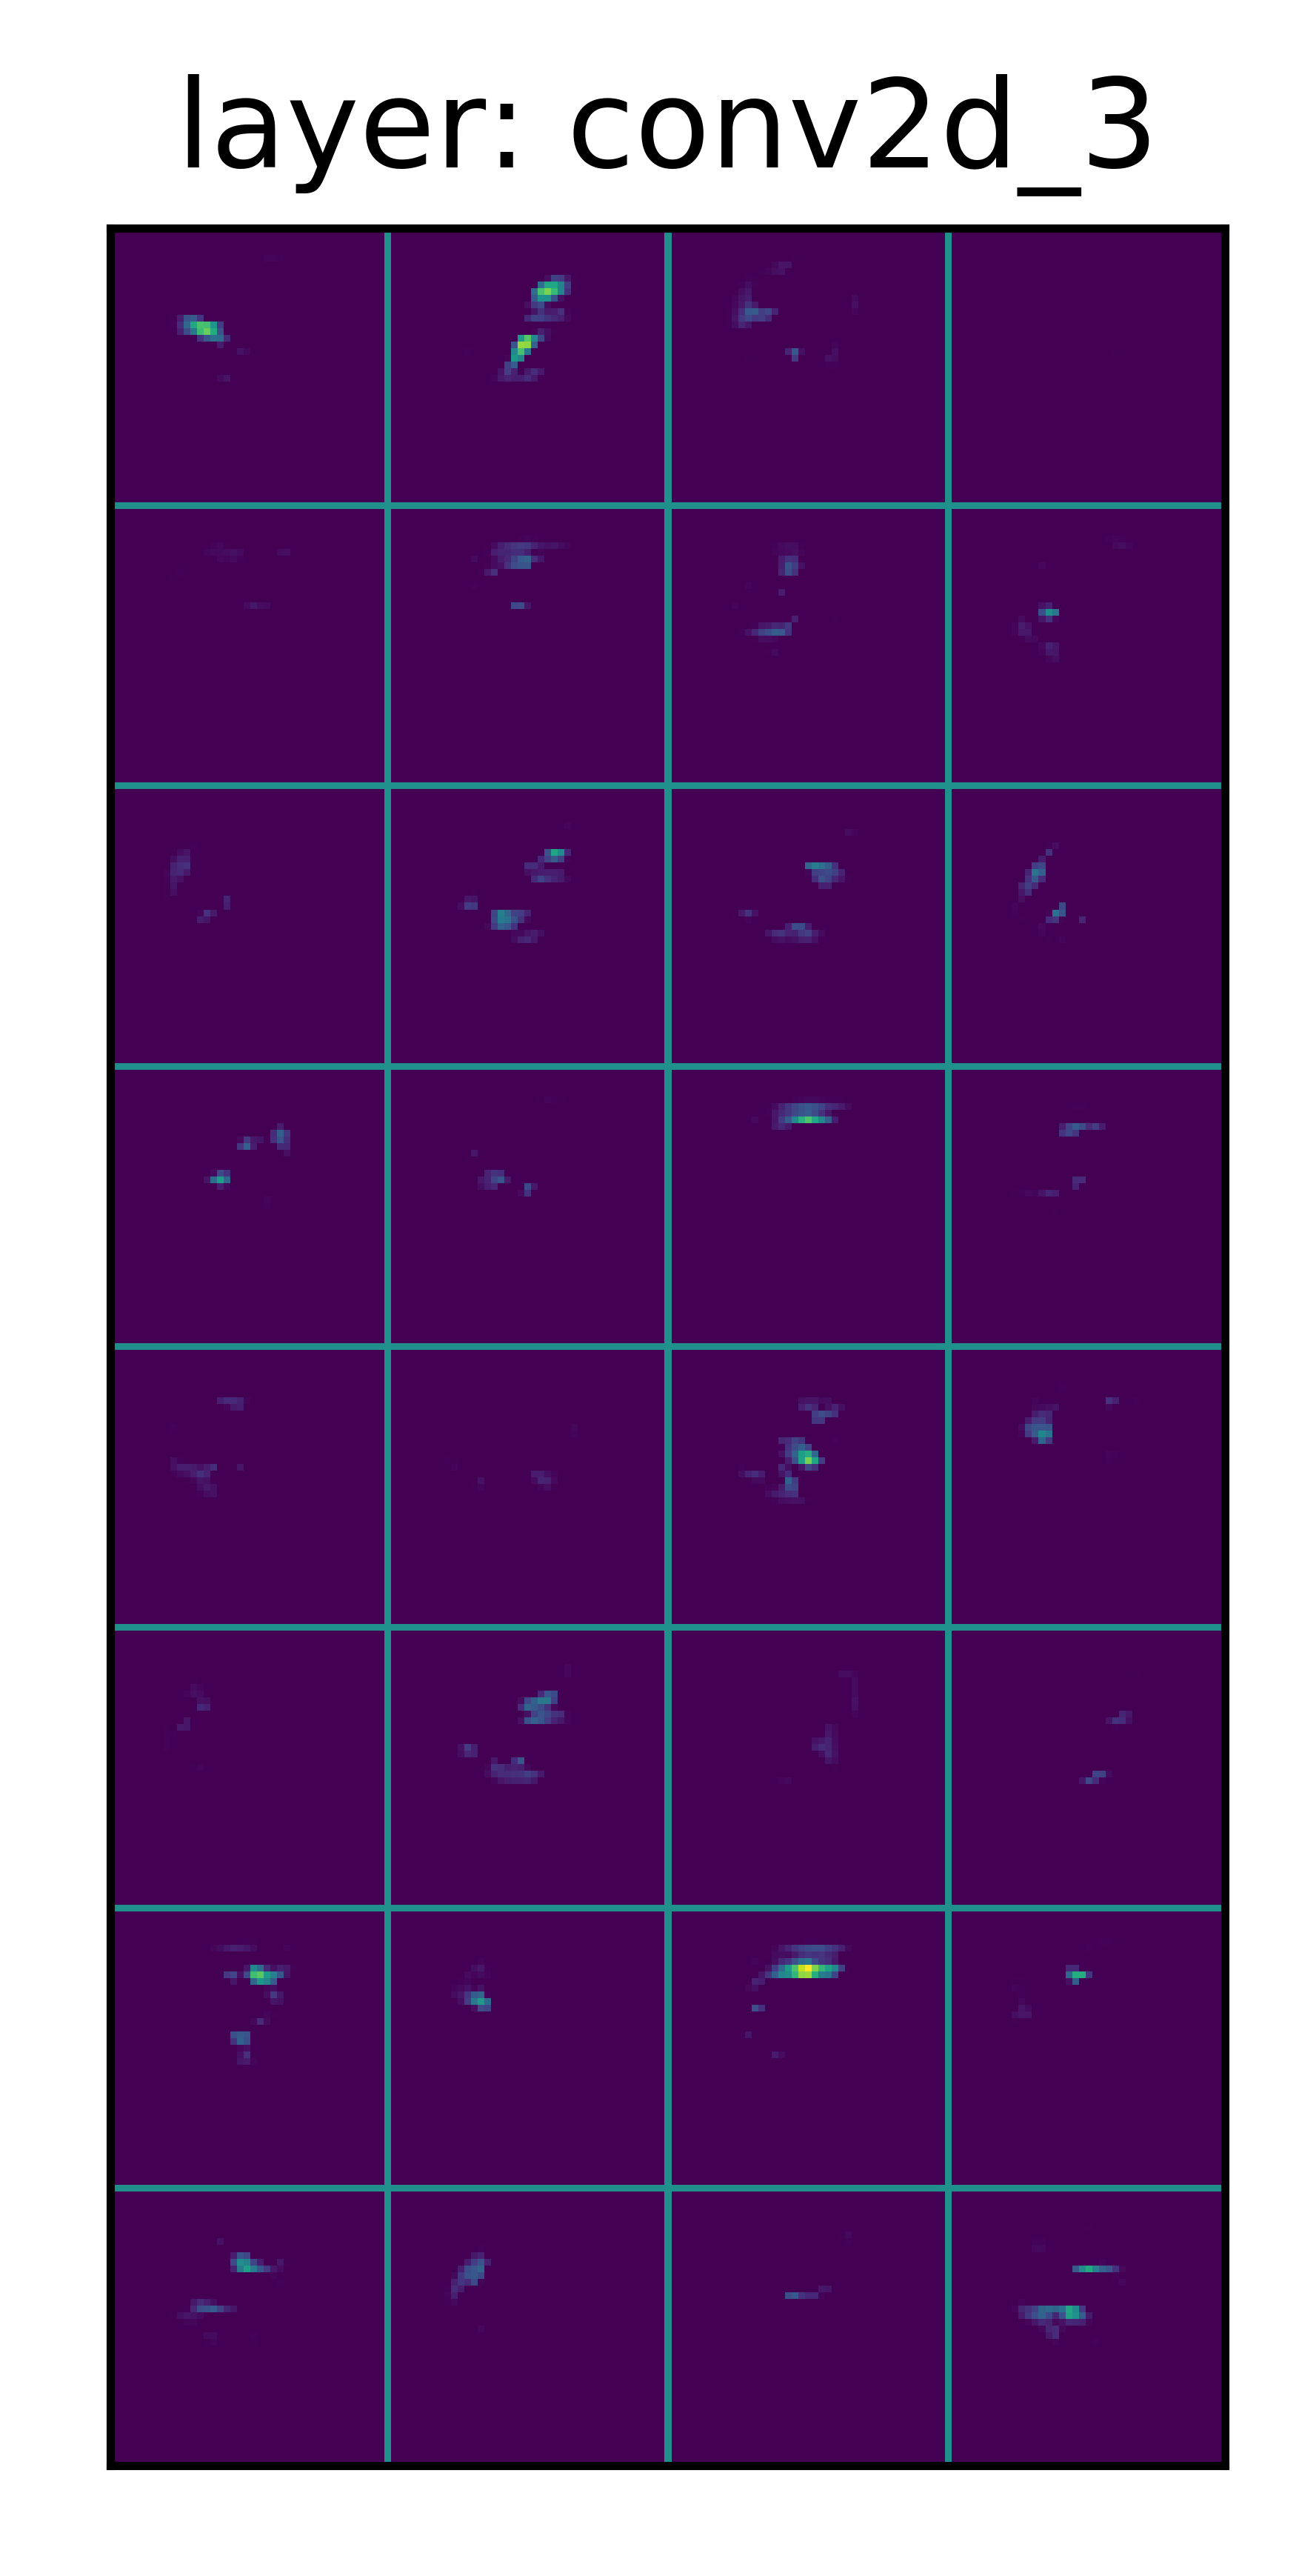

image 1
32  channels


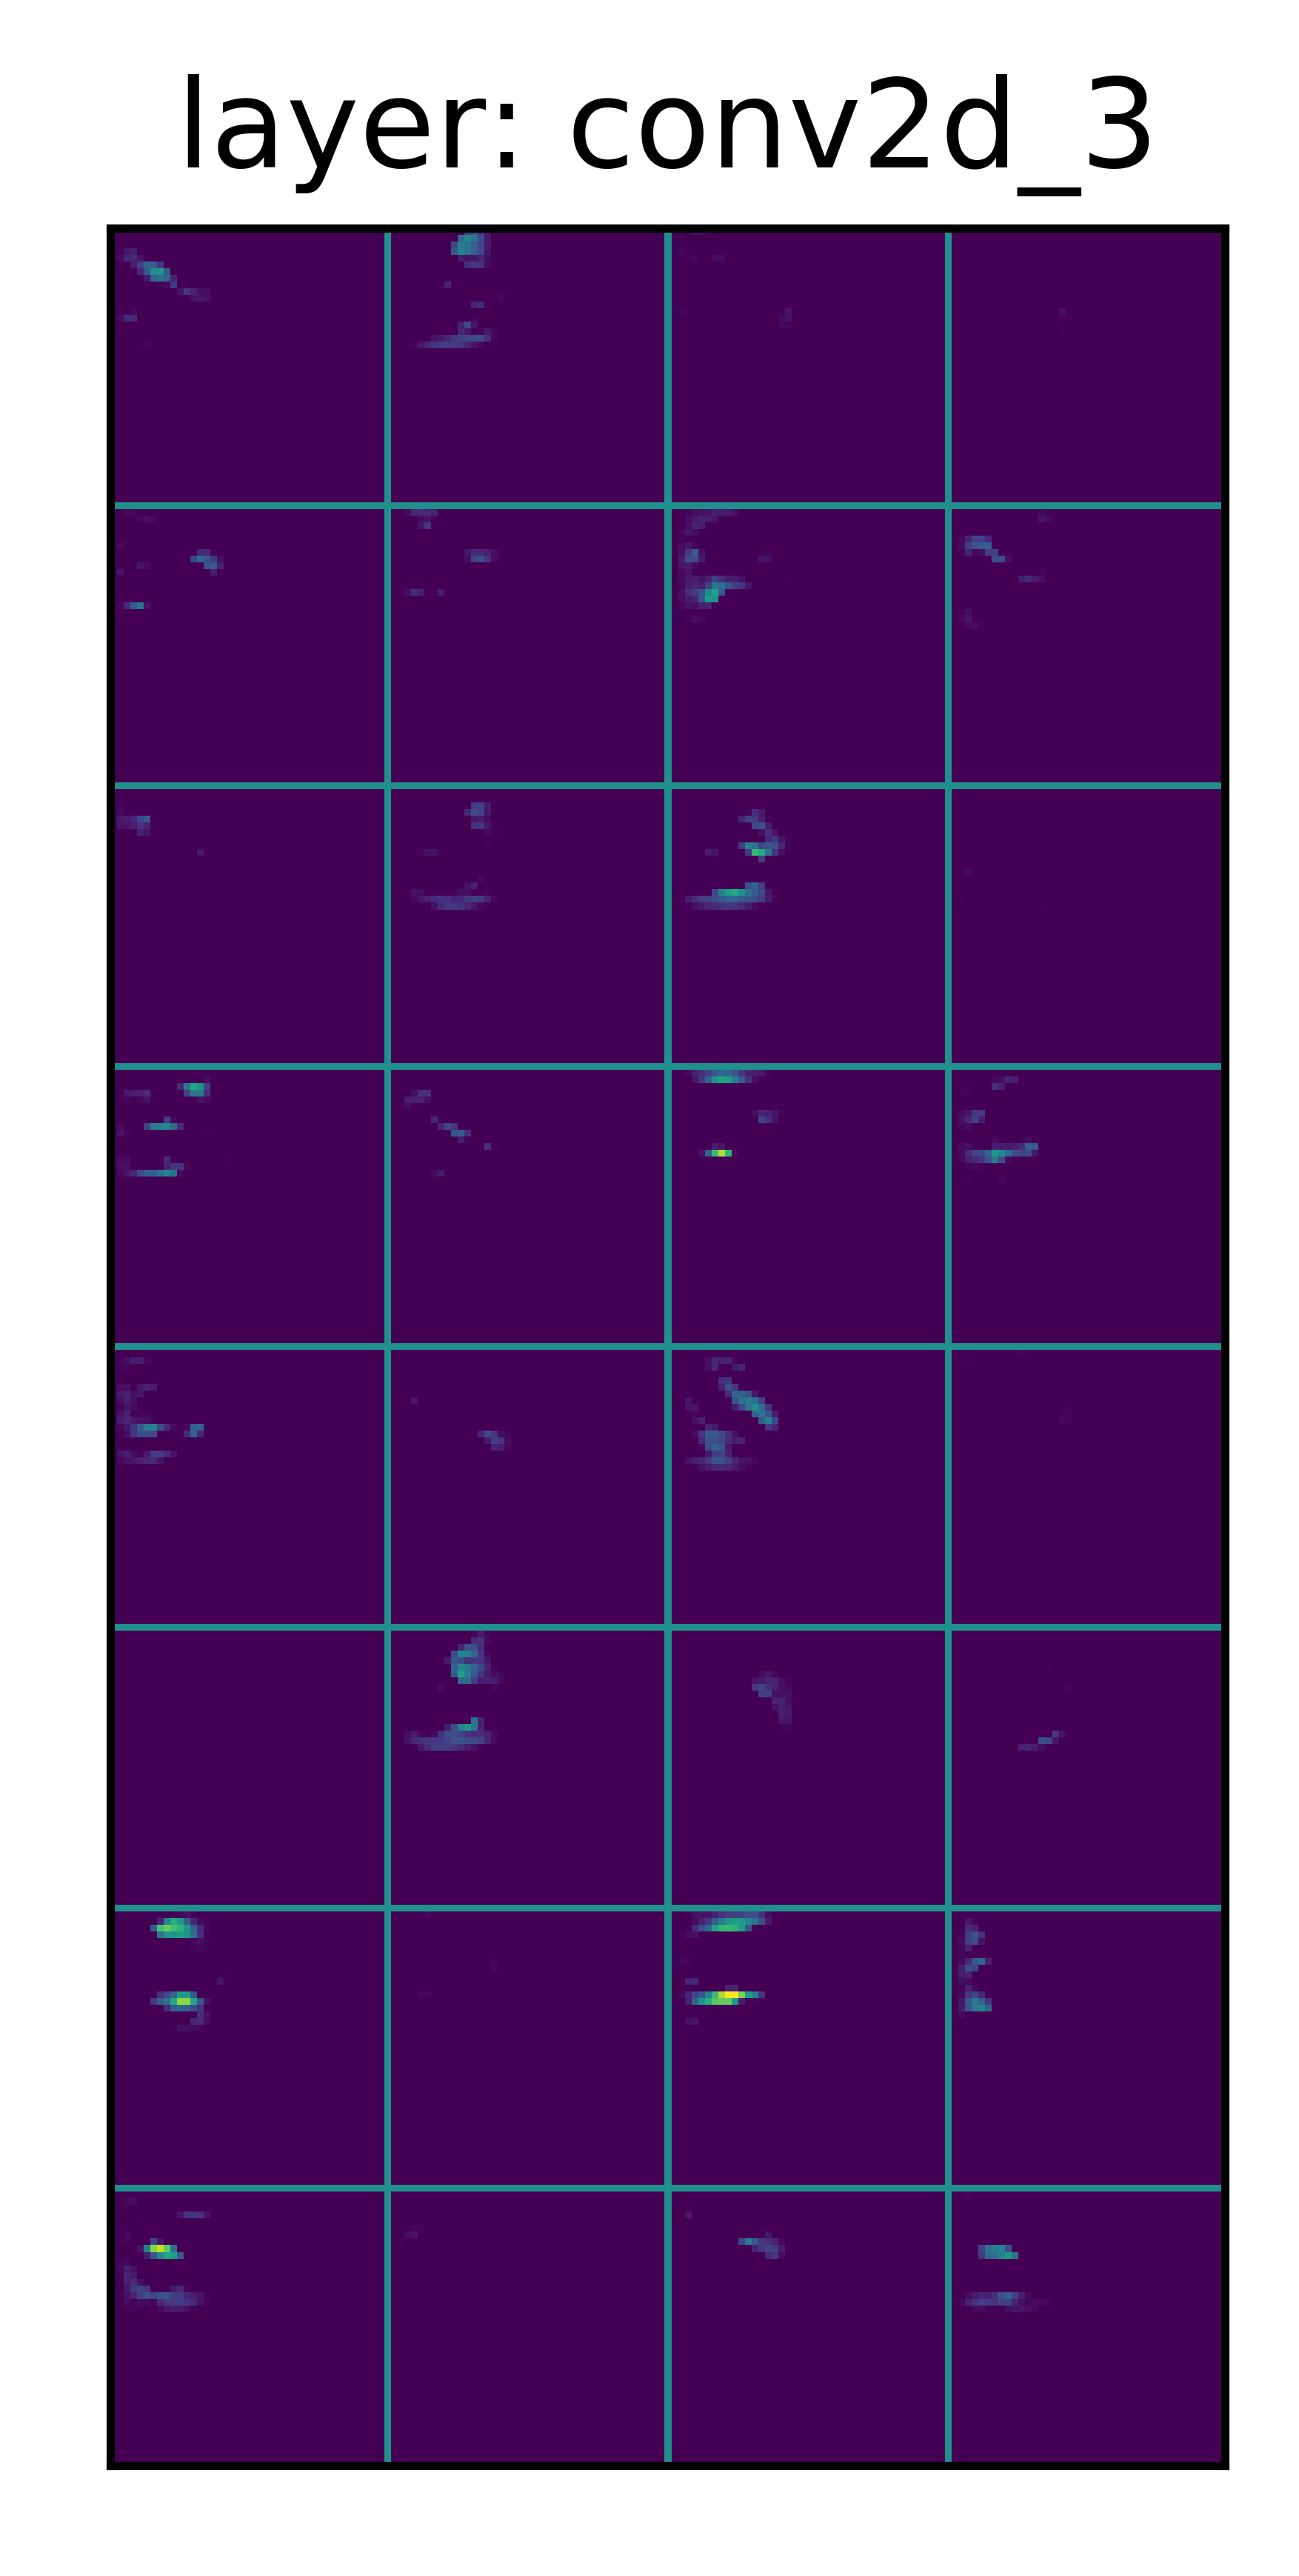

image 2
32  channels


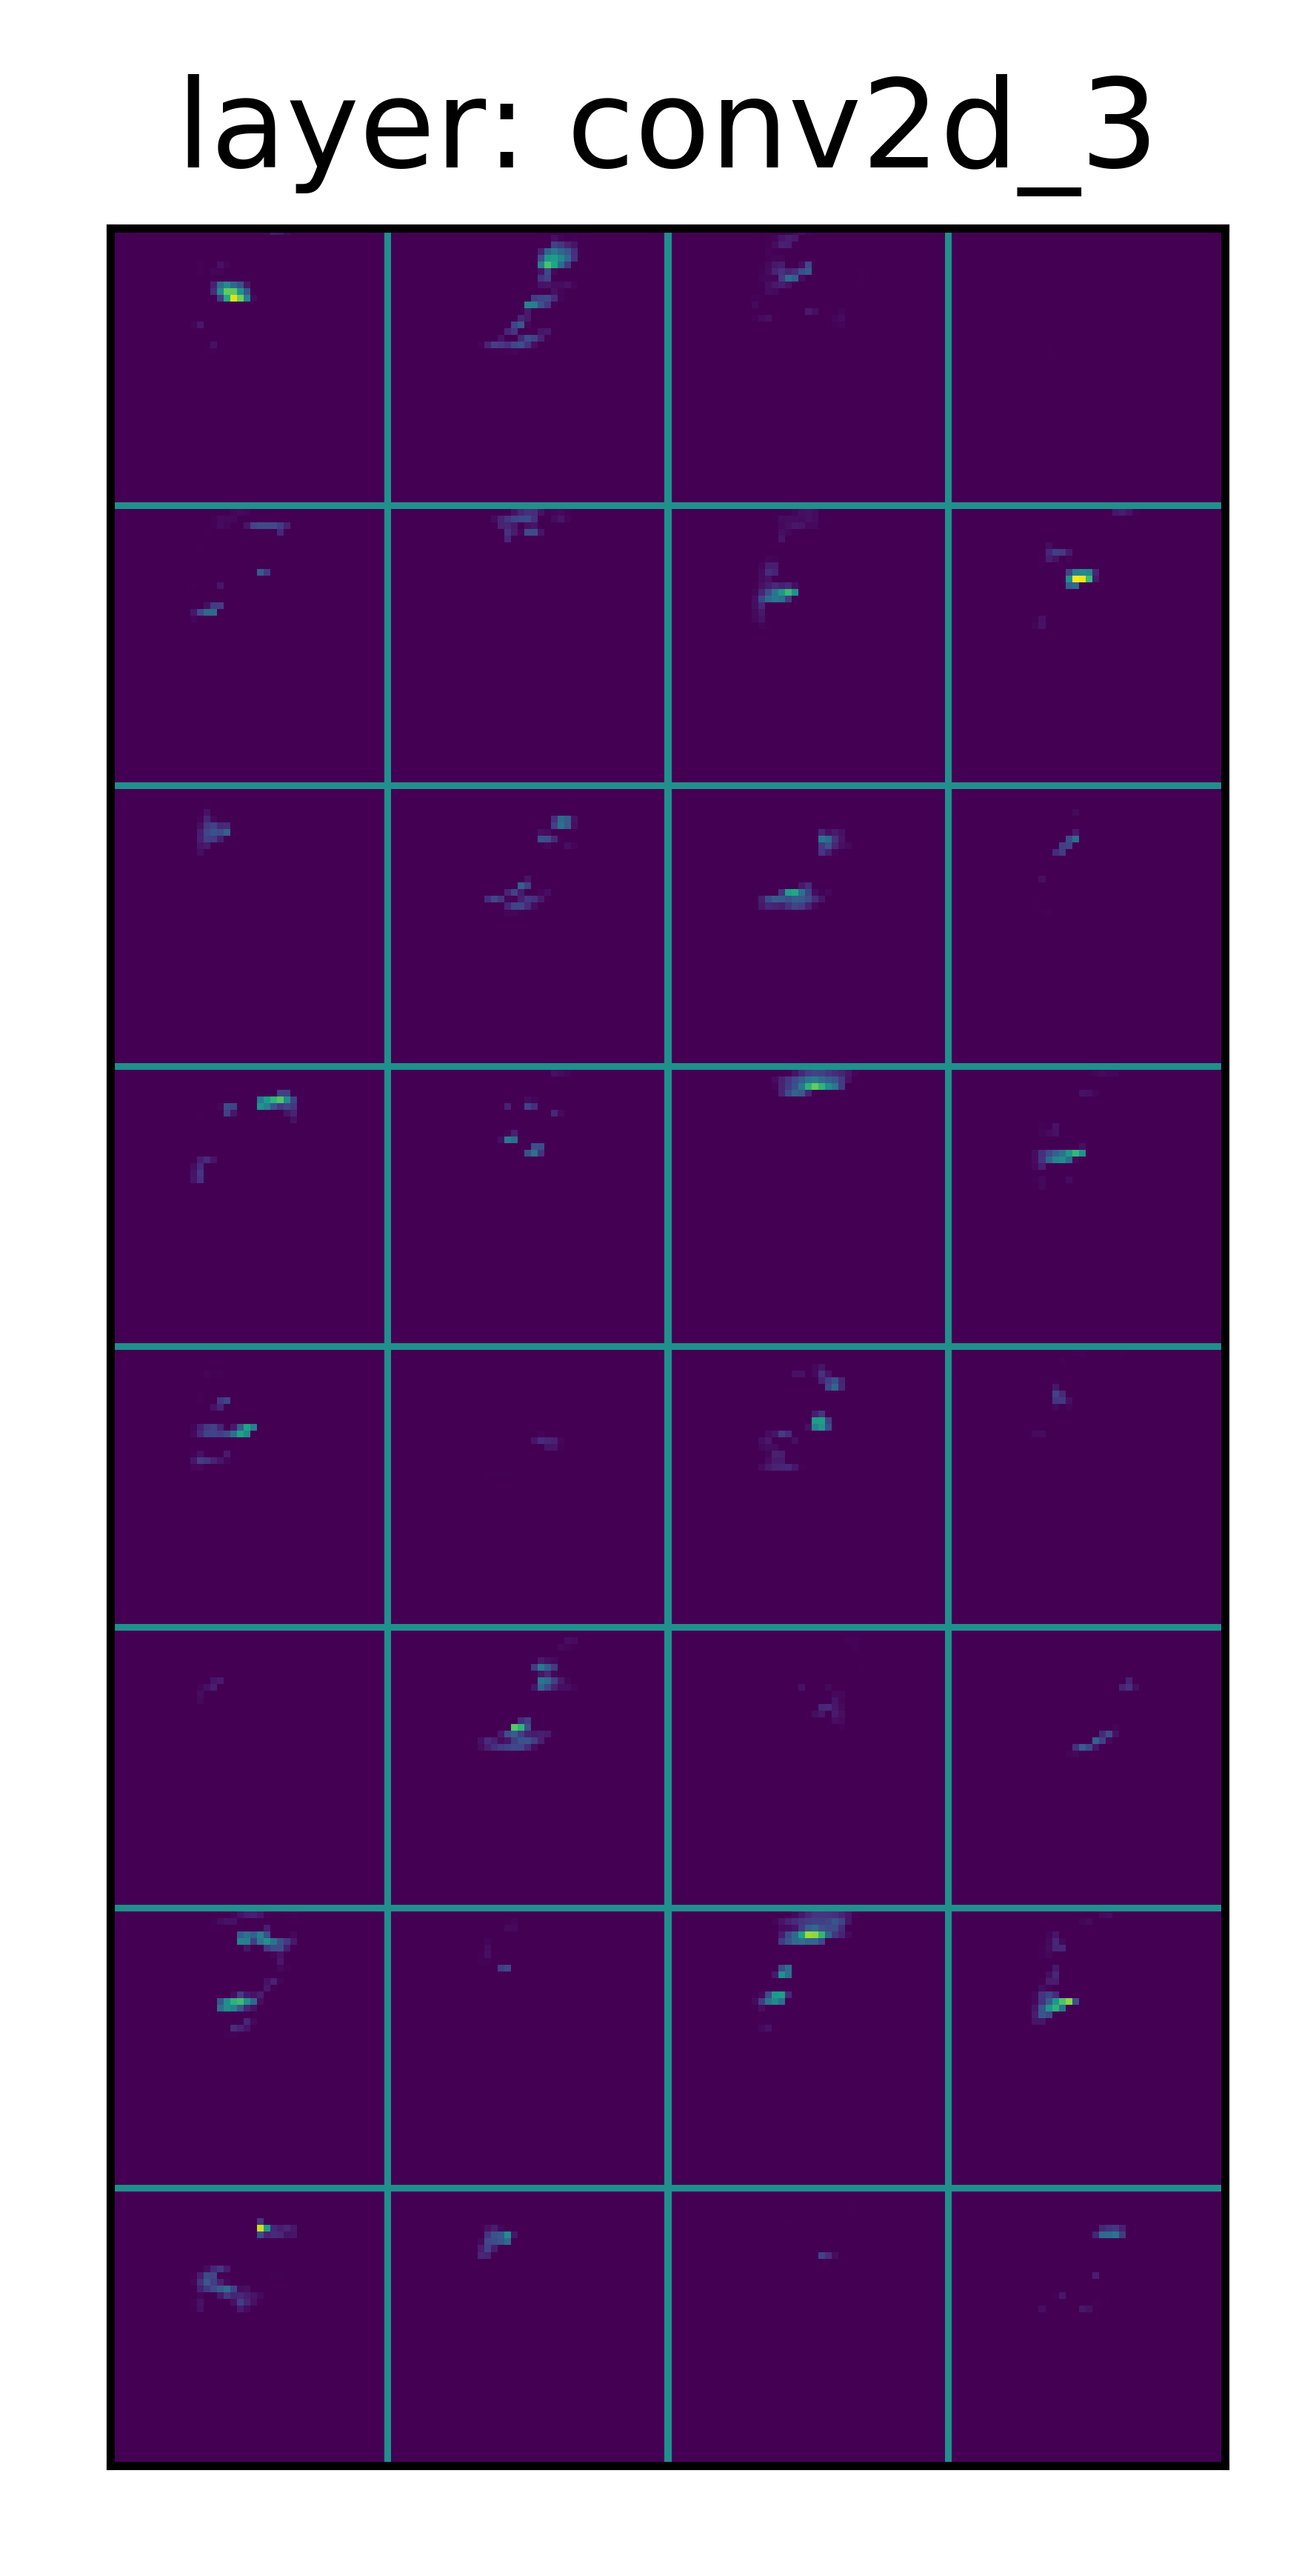

image 3
32  channels


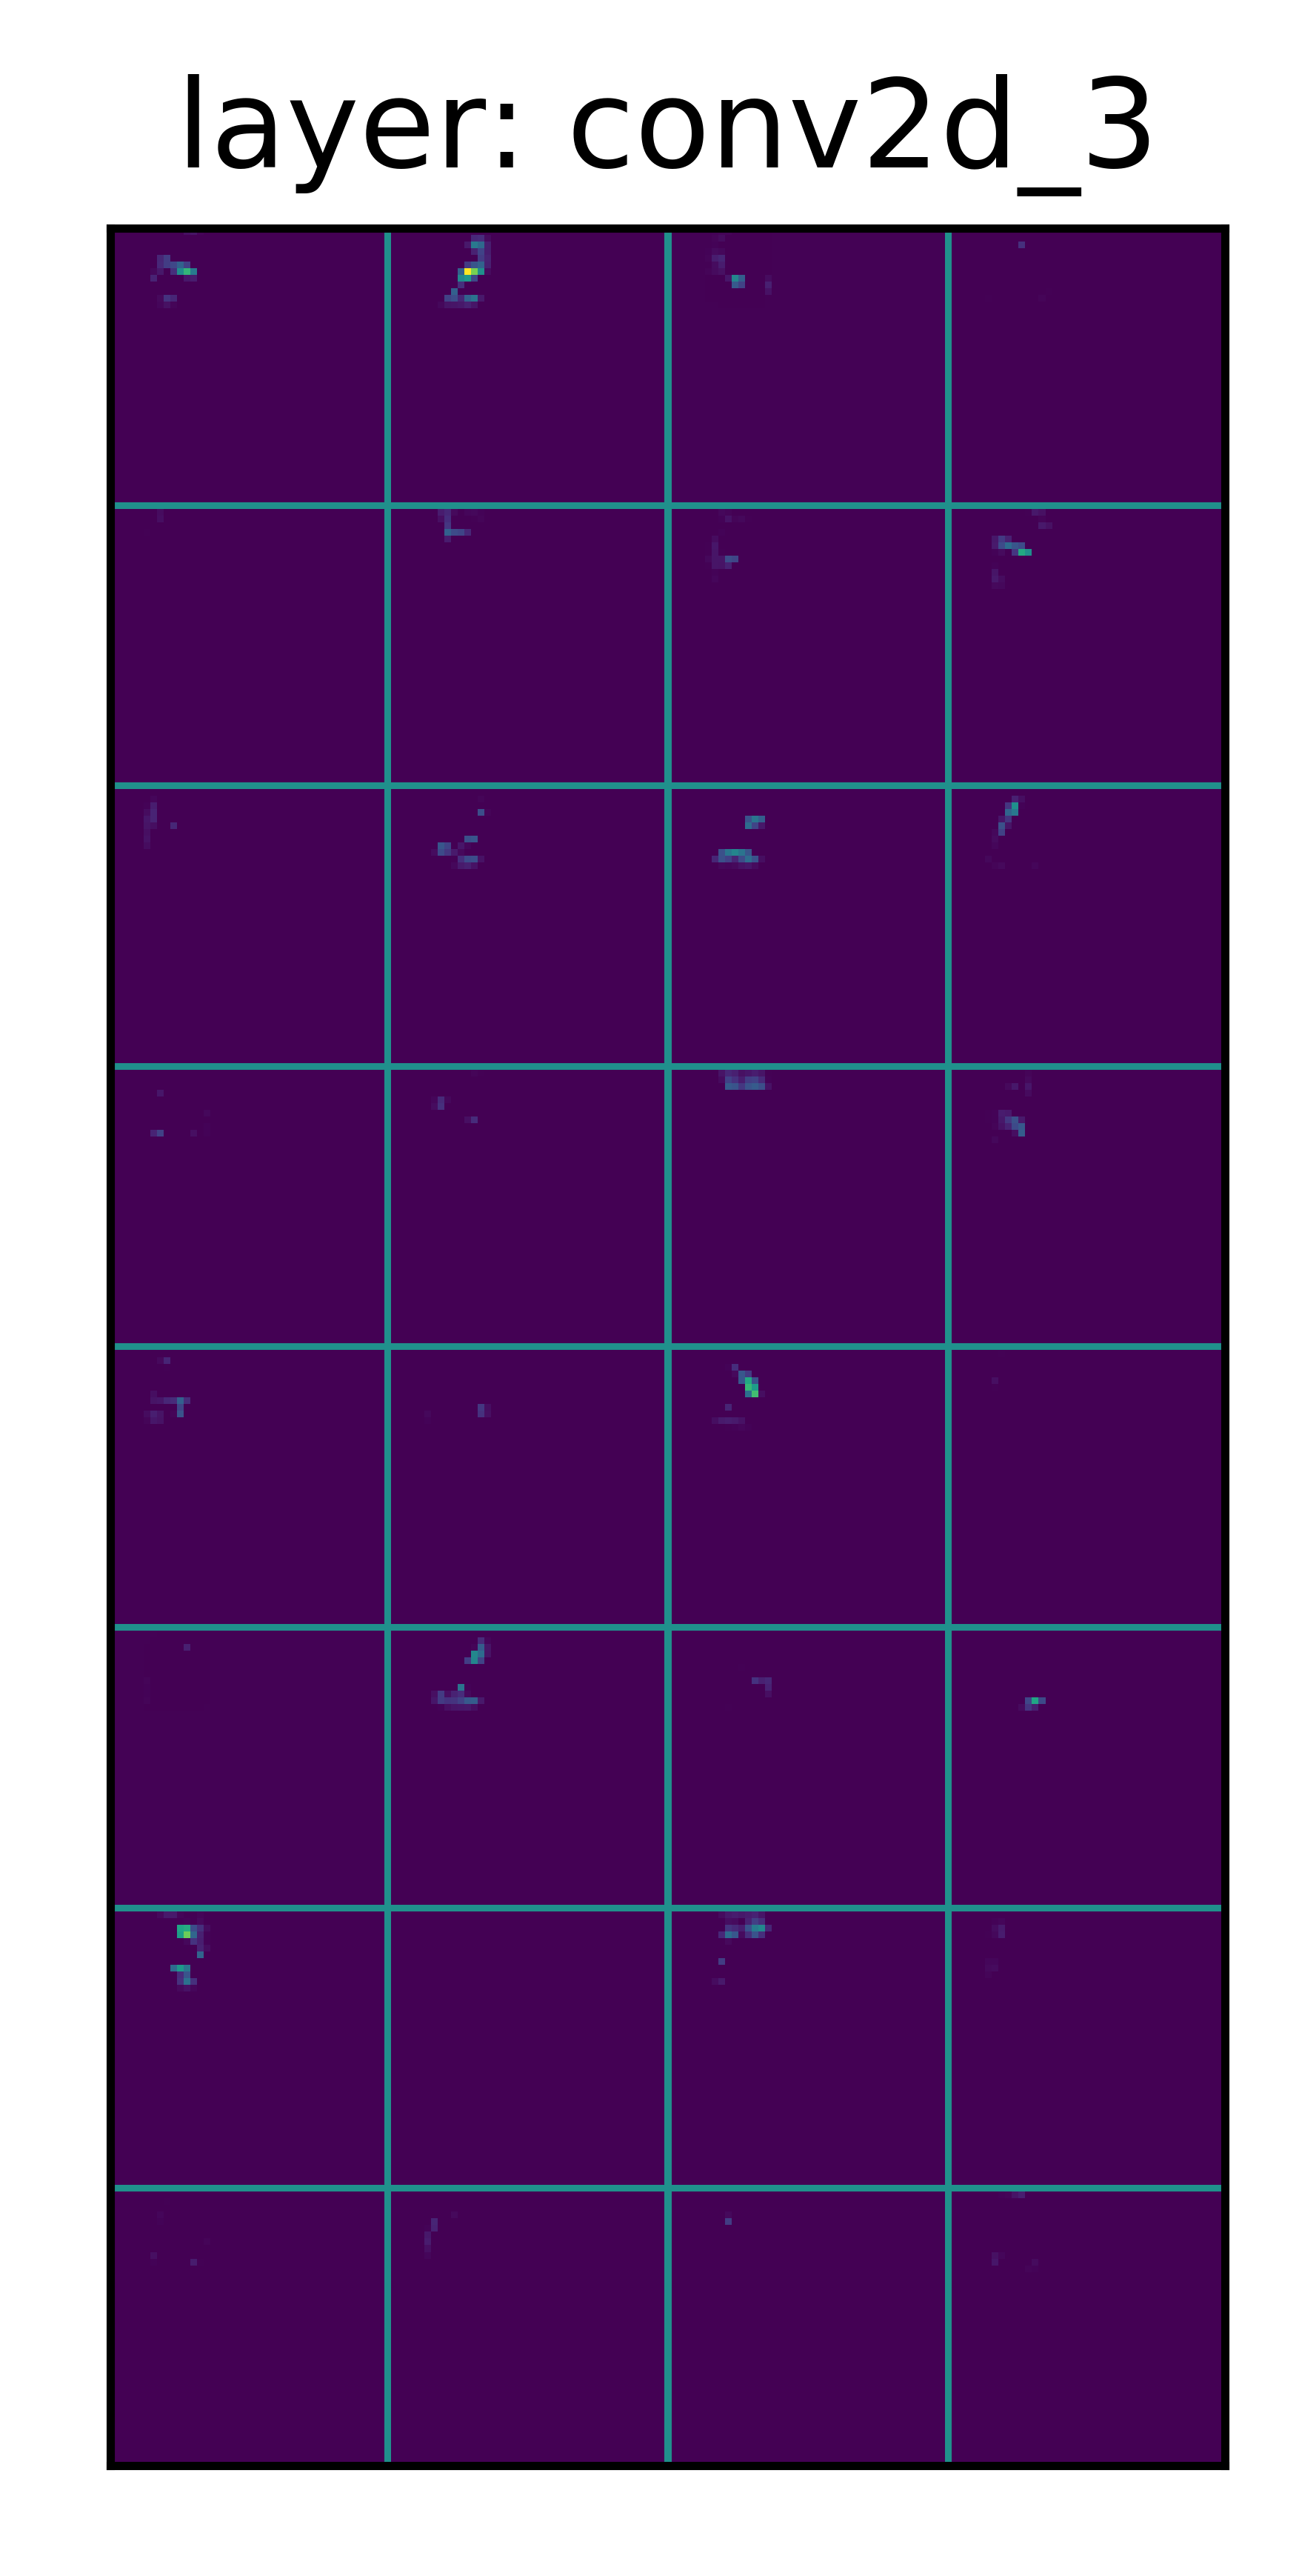

image 4
32  channels


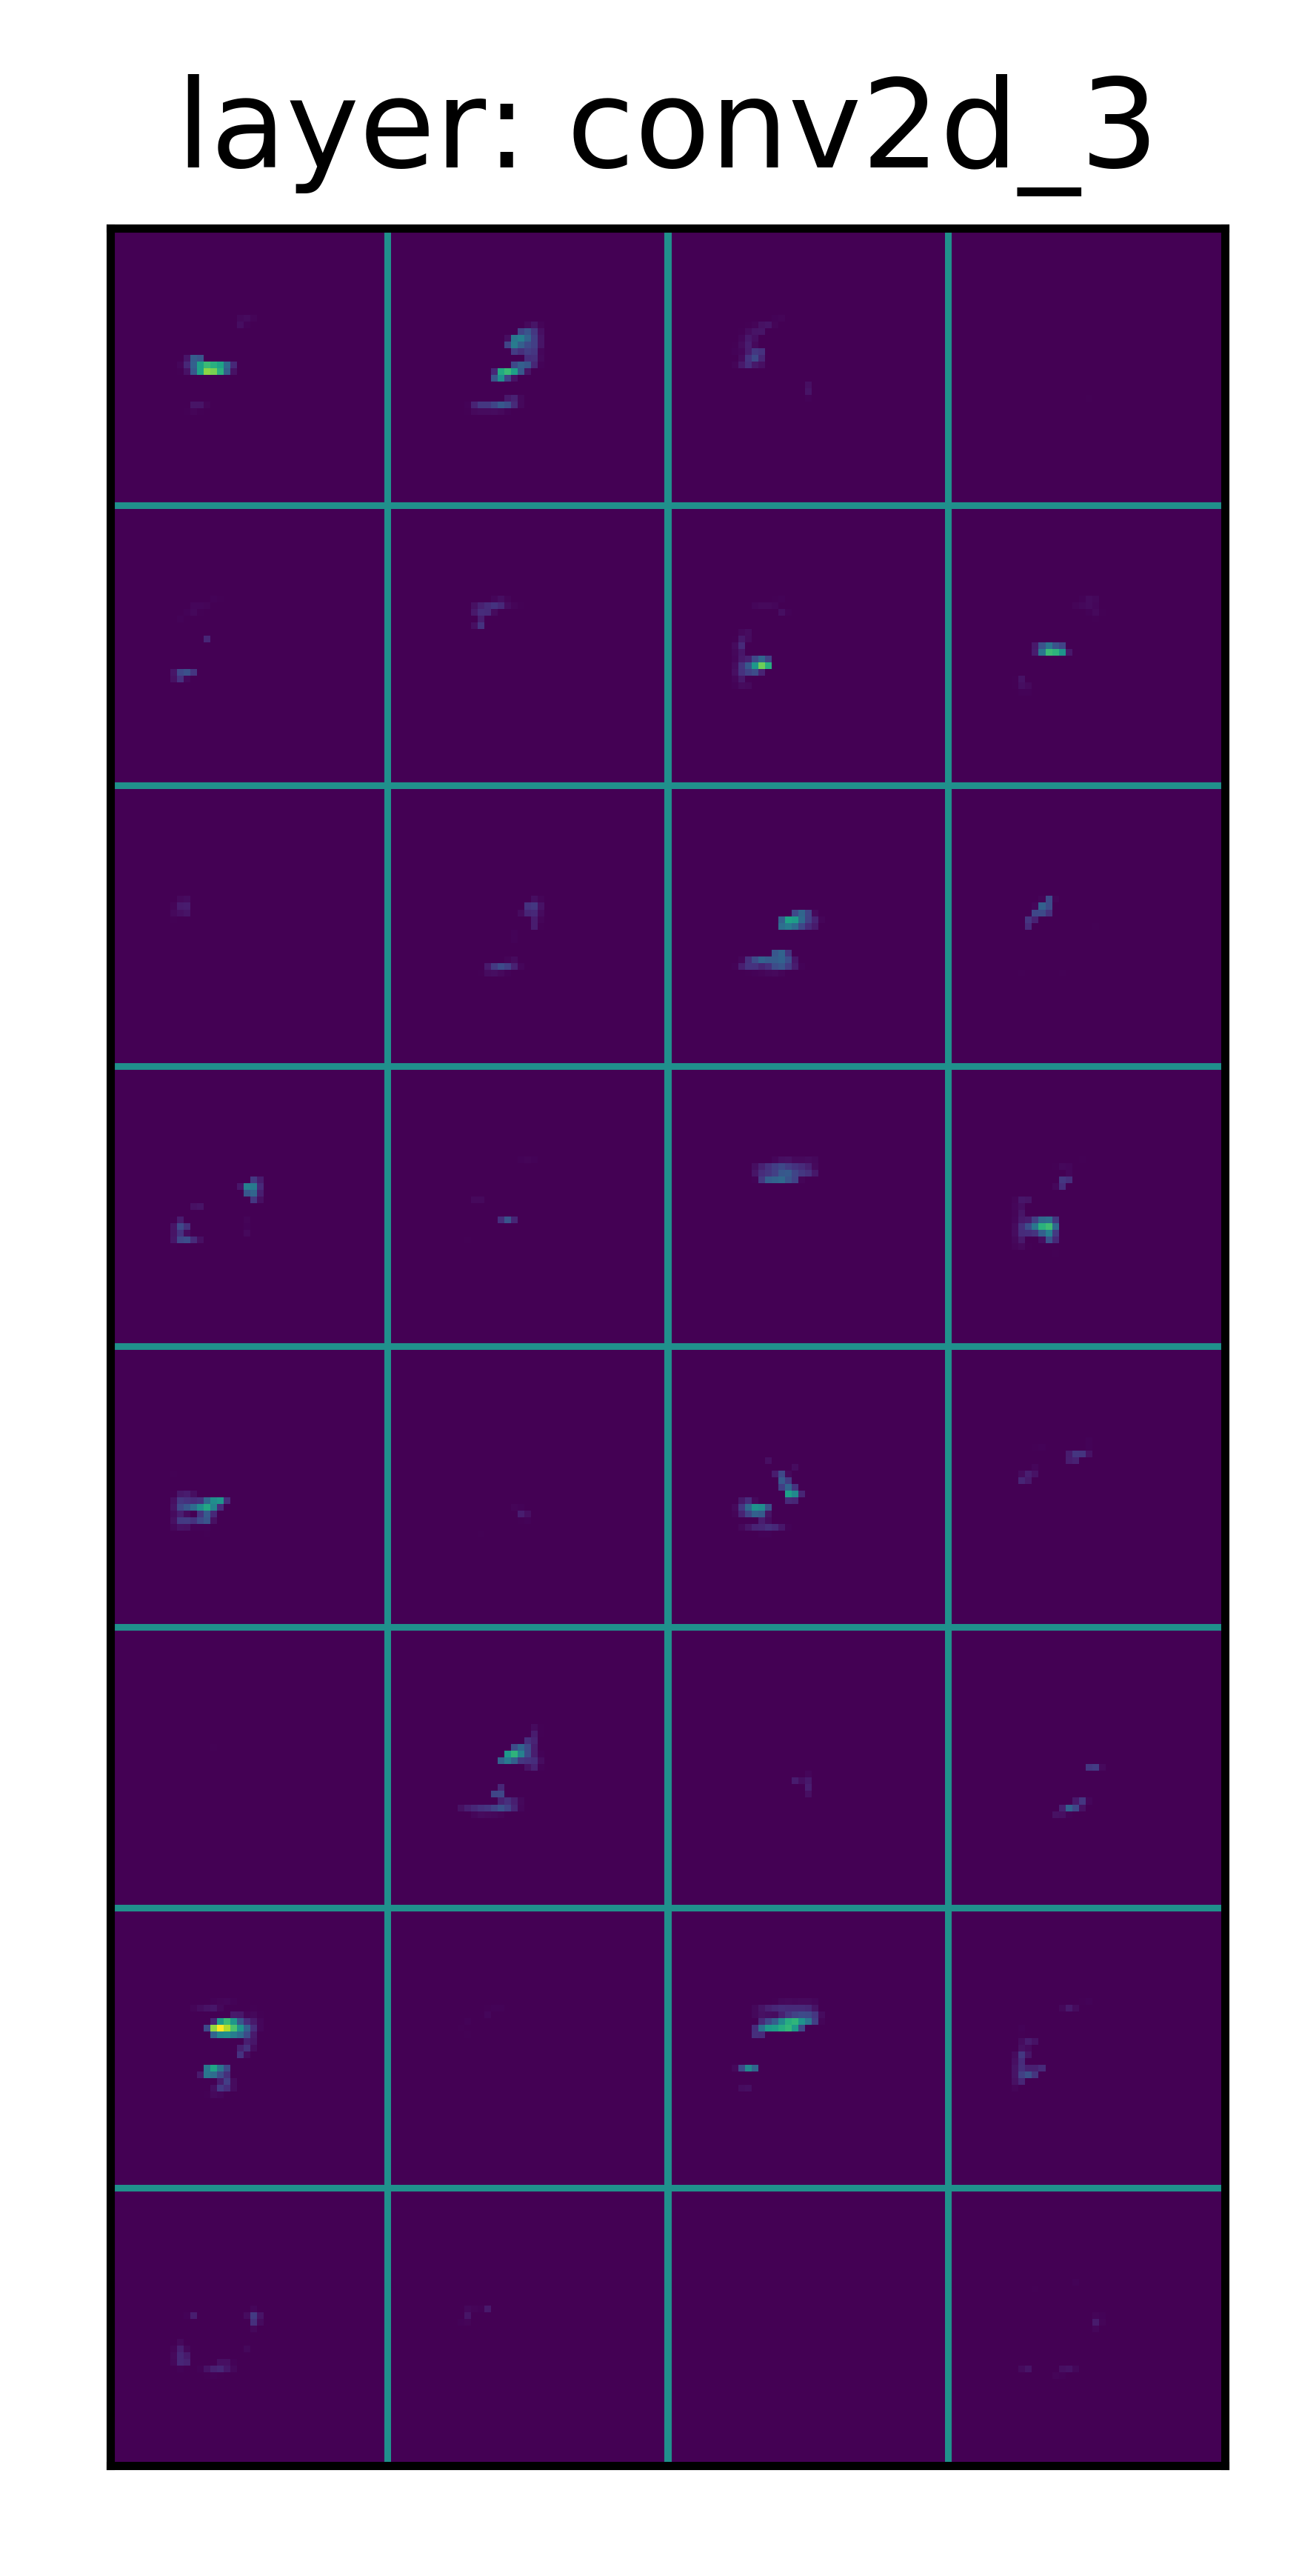

In [13]:
i = 6
for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],4, new_model.layers[i].name)

image 0
32  channels


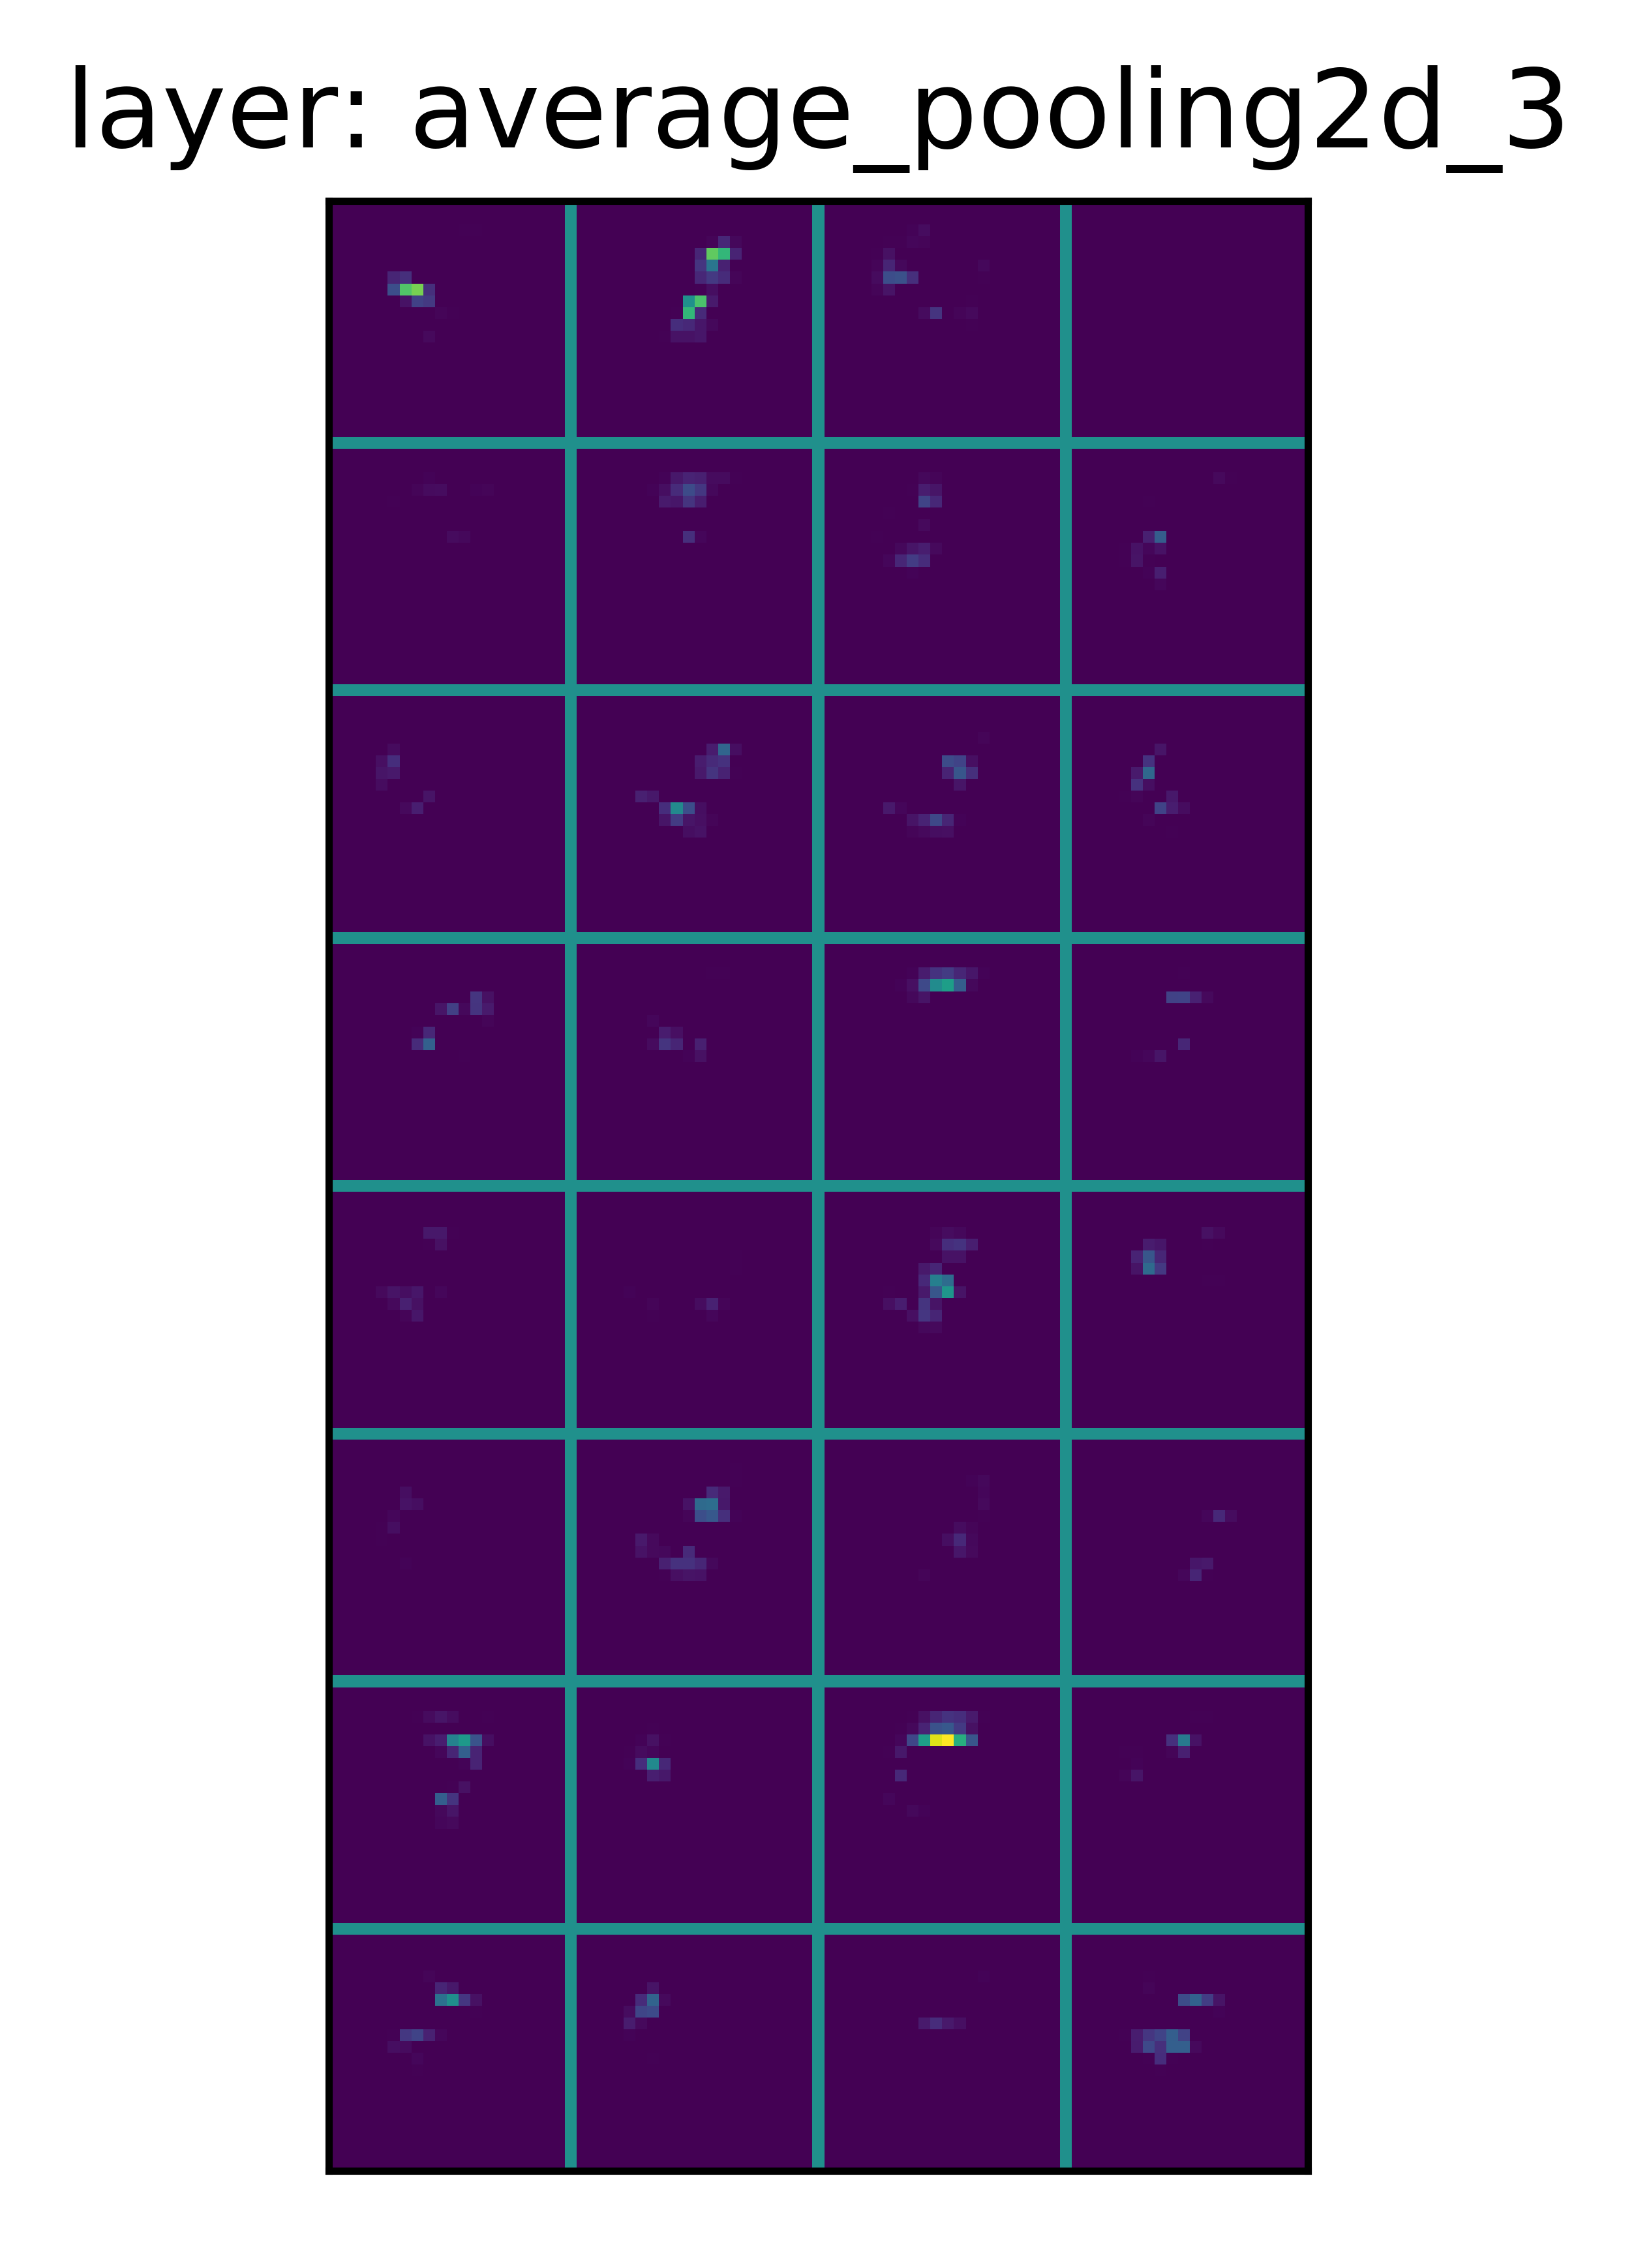

image 1
32  channels


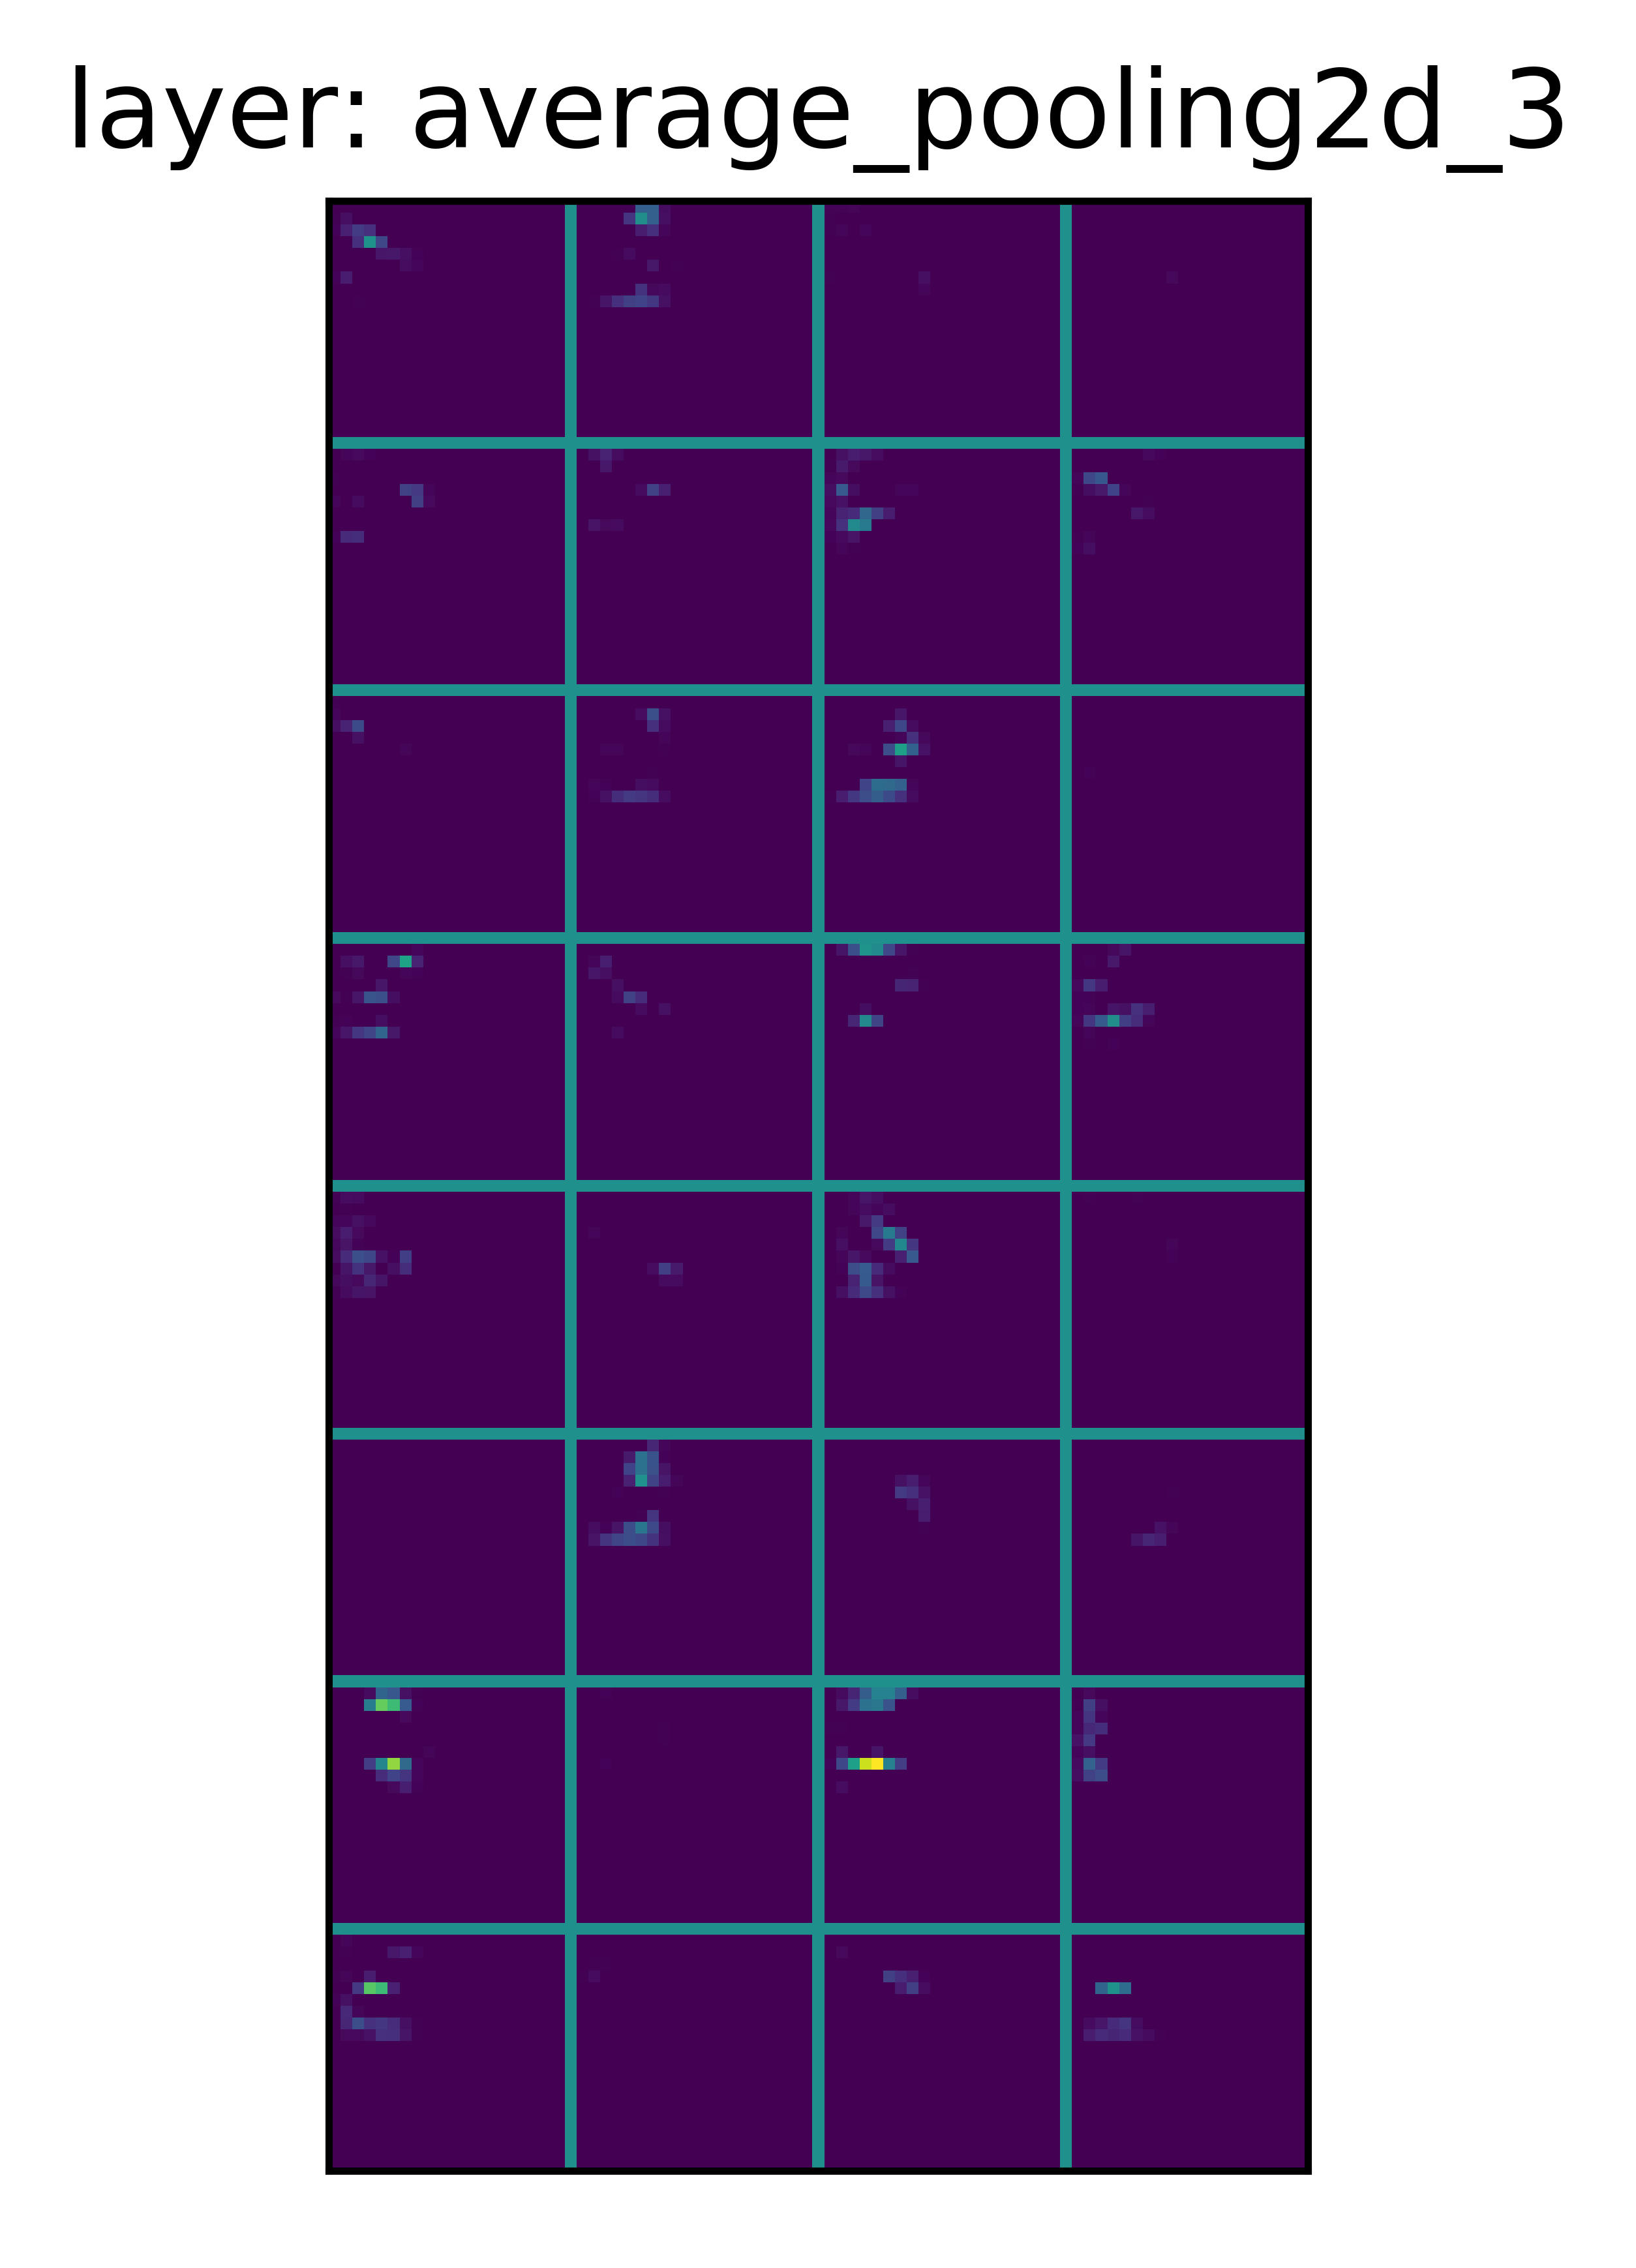

image 2
32  channels


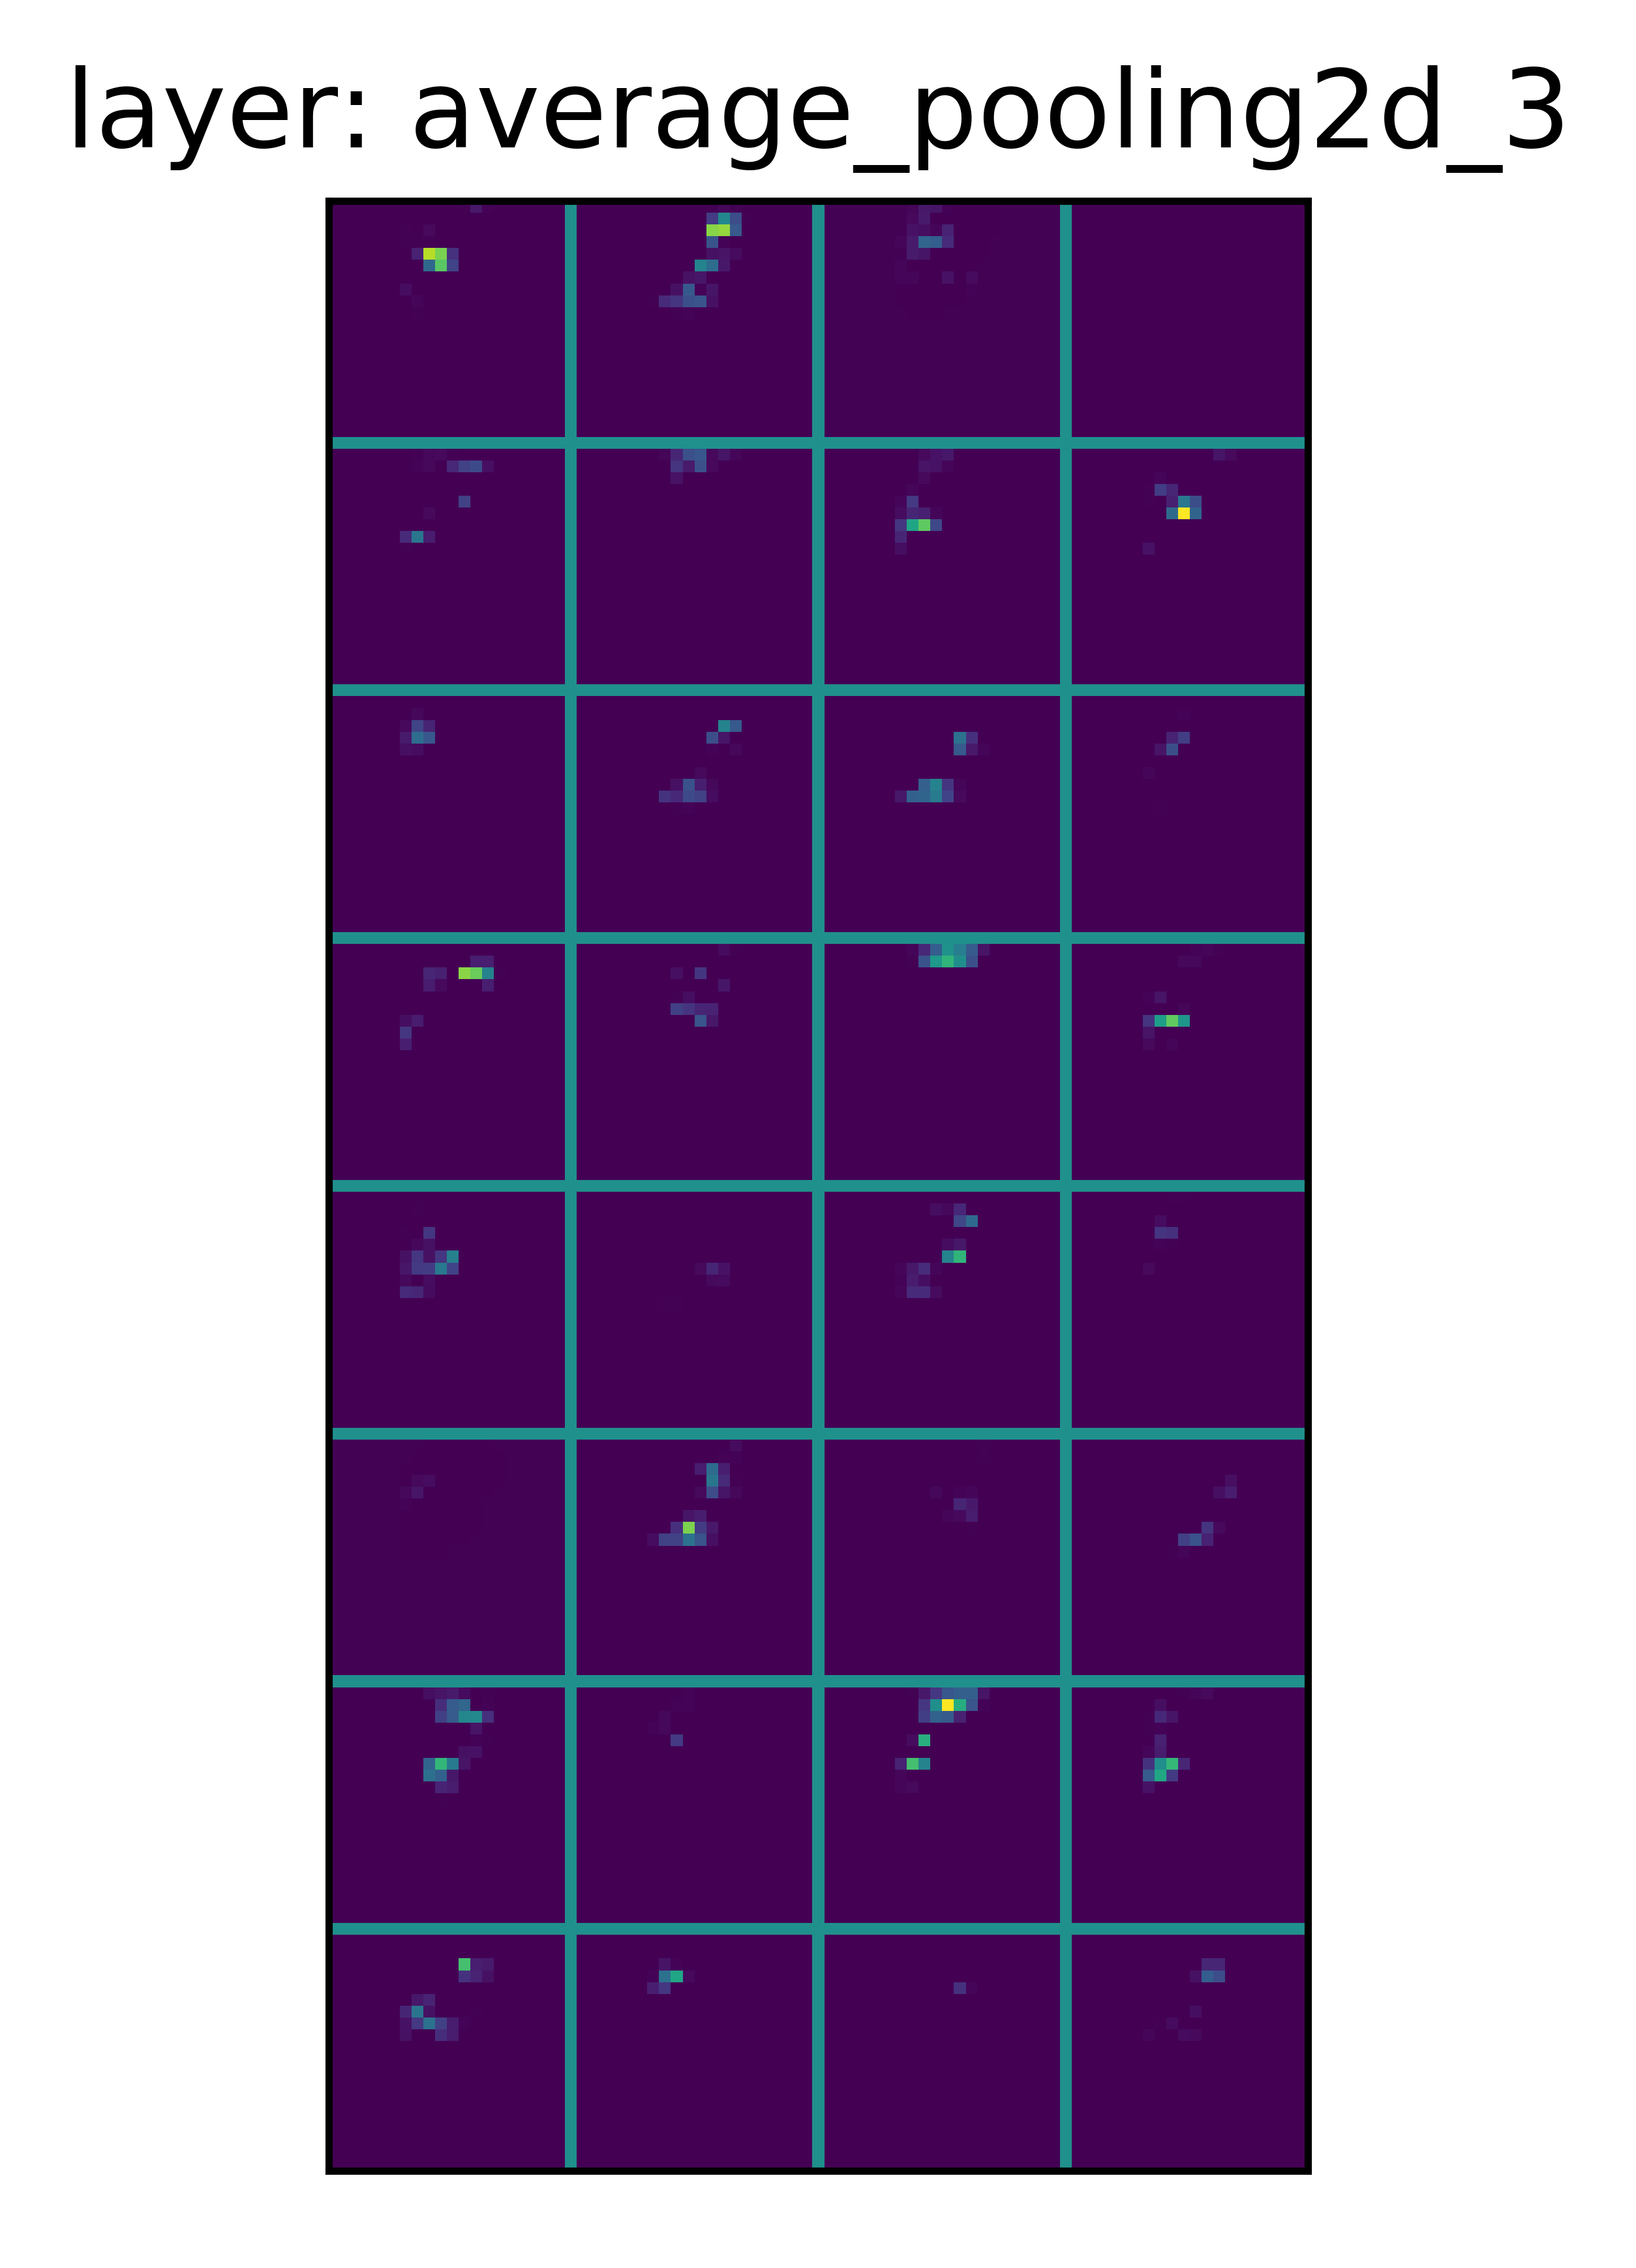

image 3
32  channels


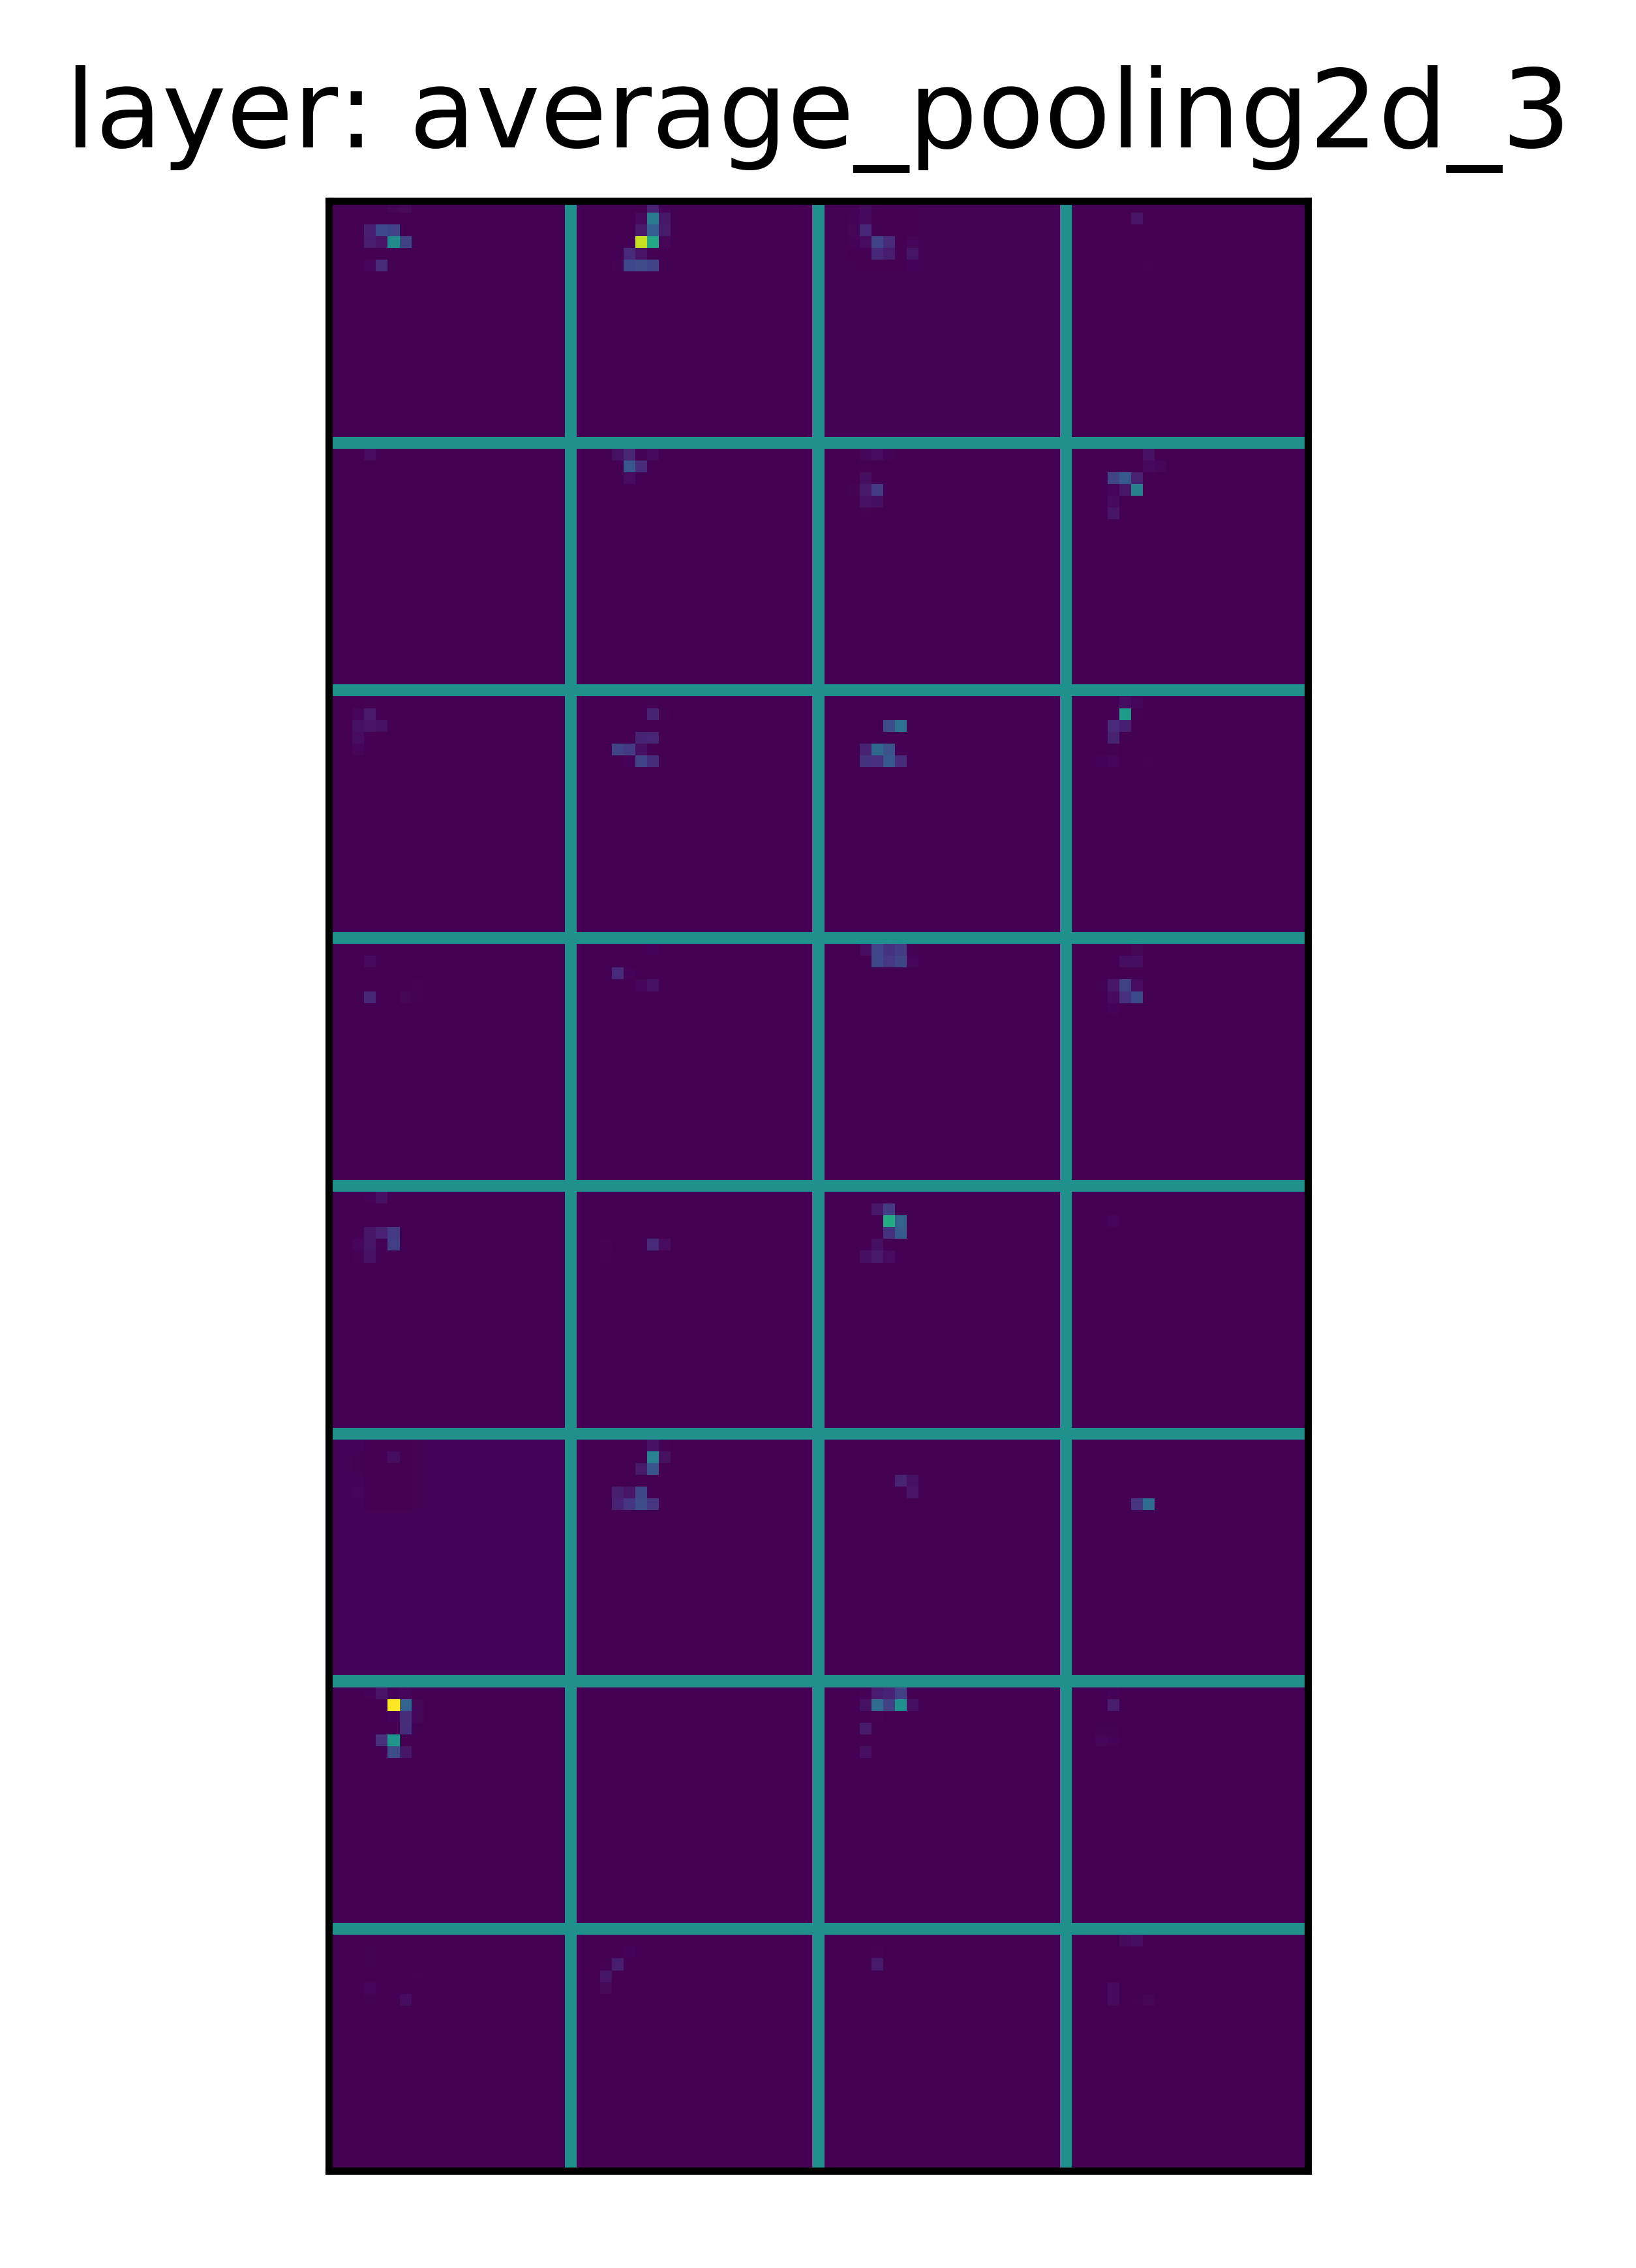

image 4
32  channels


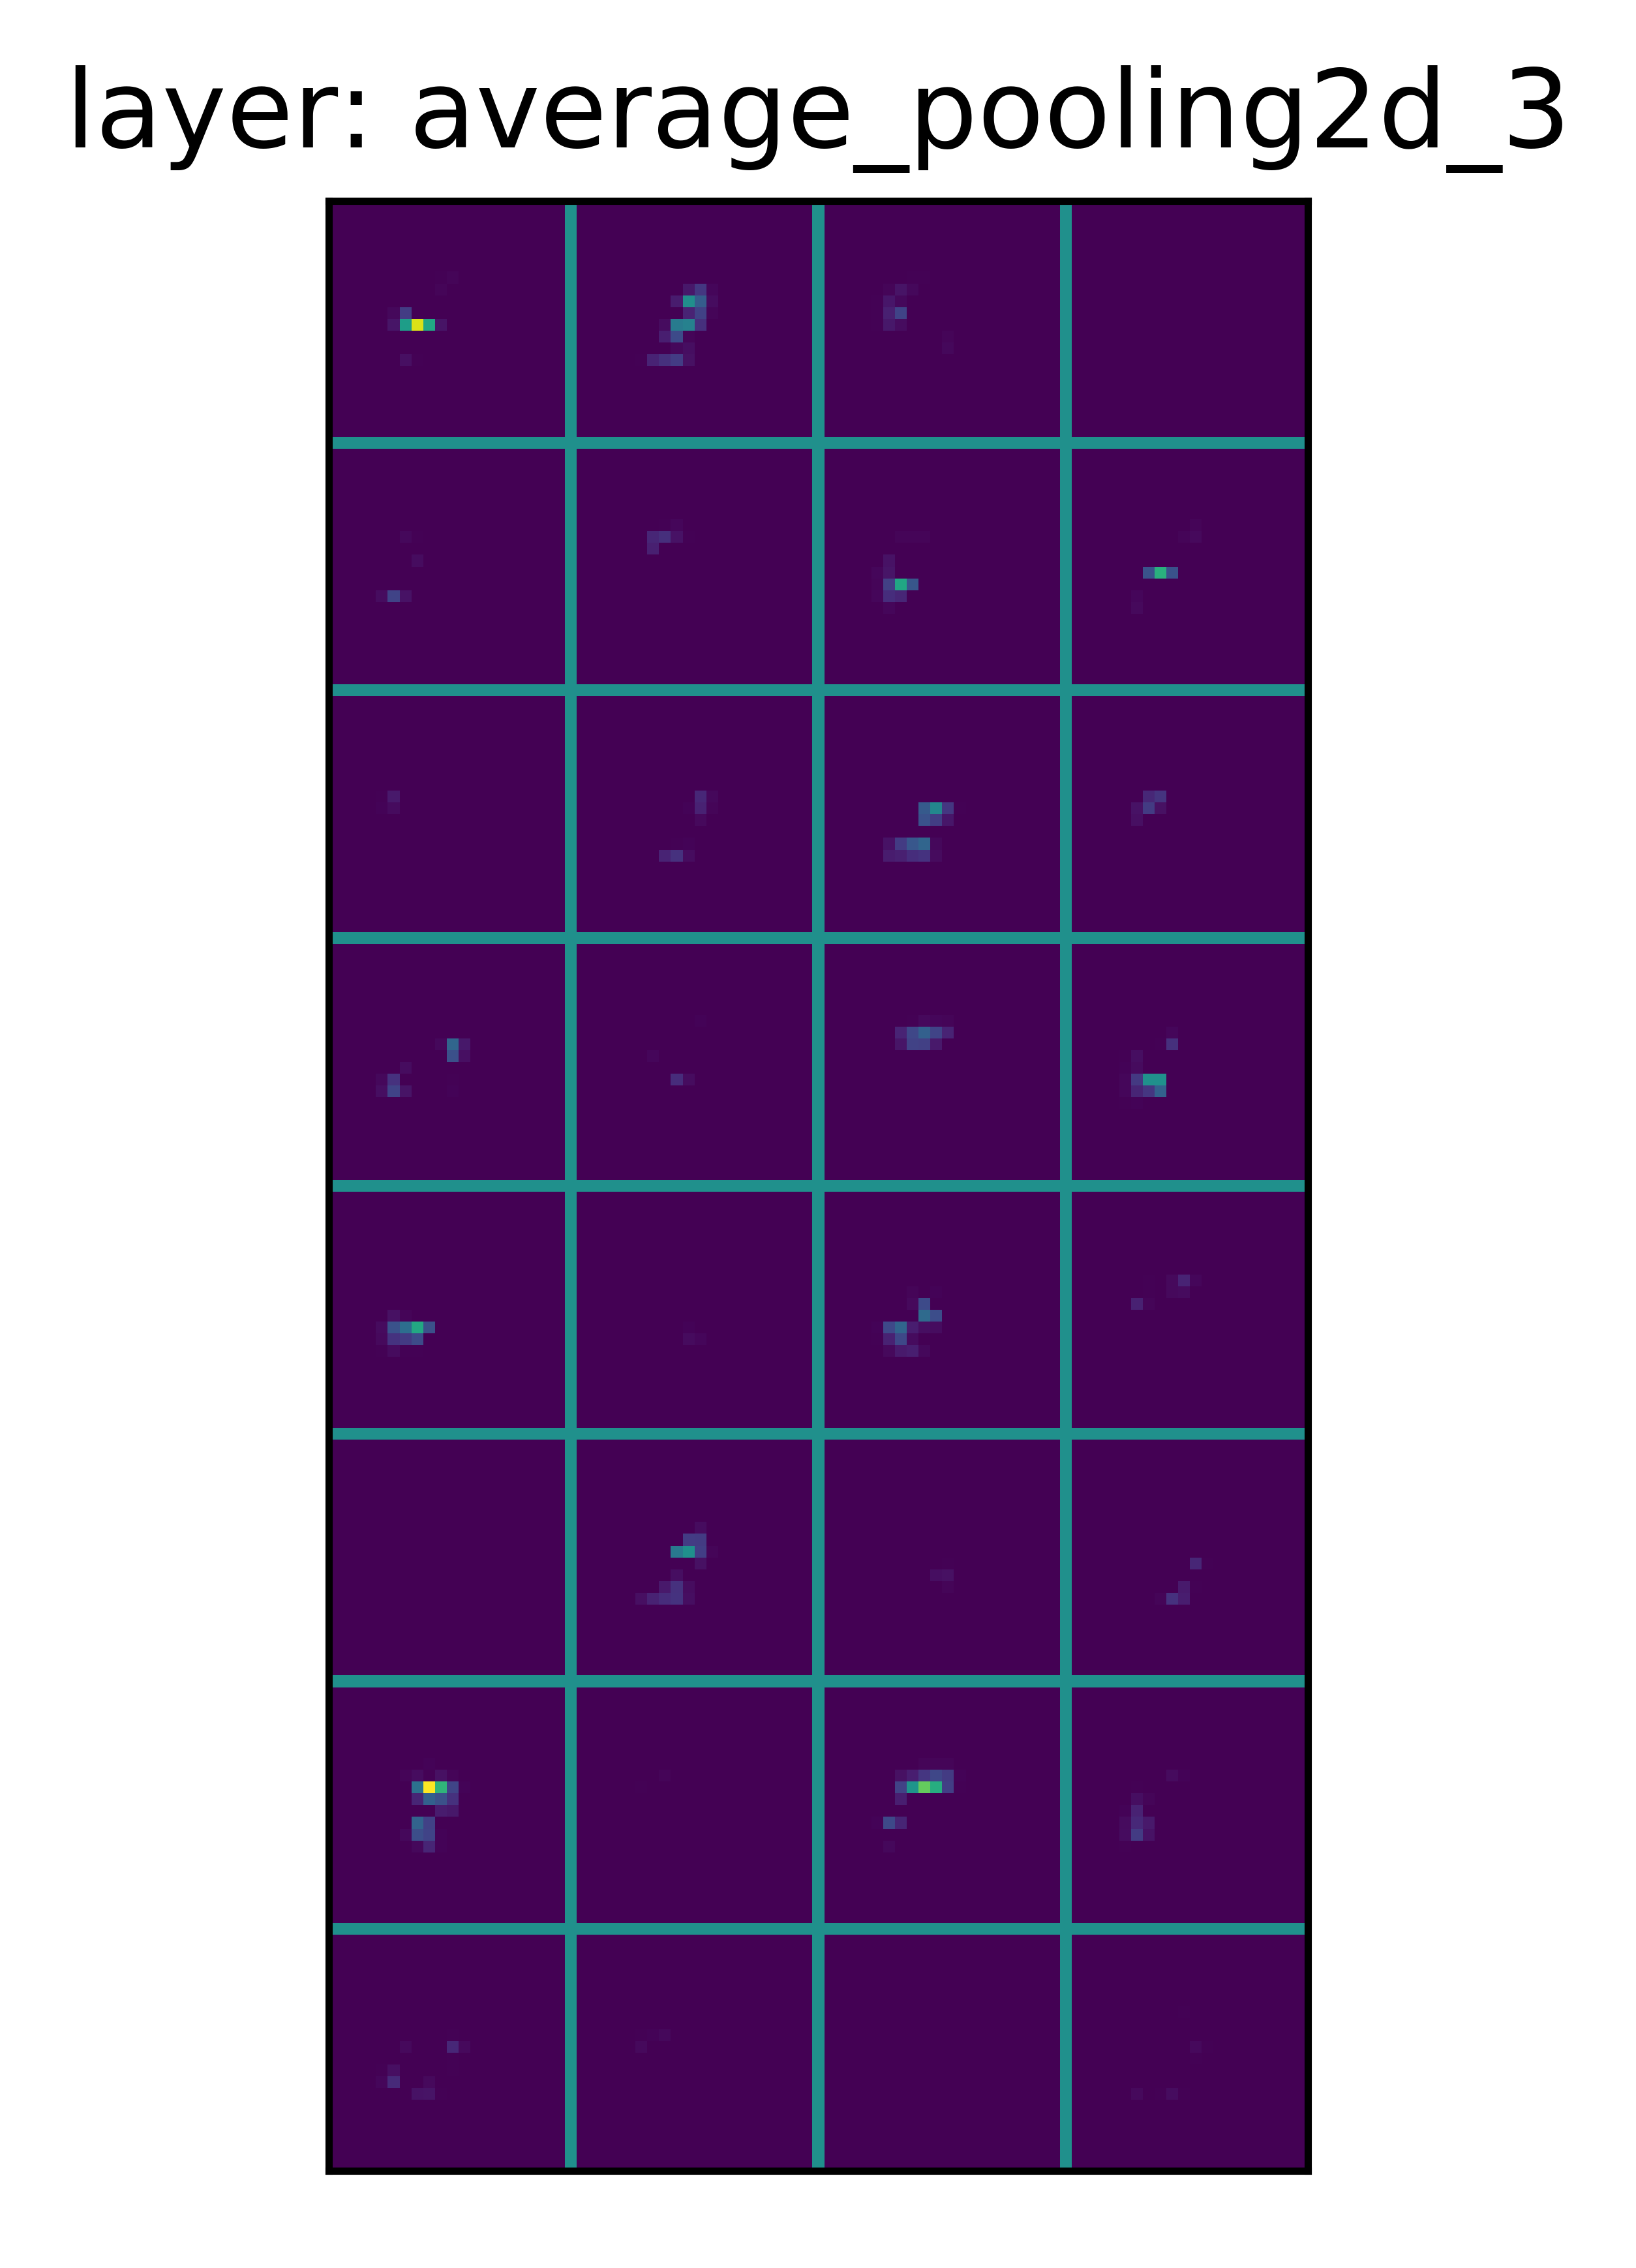

In [15]:
i = 7
for img_id in range(5):
    print("image", img_id)
    display_activation(activations[i][img_id],4, new_model.layers[i].name)

In [16]:
mask = (y_test == 8);
indices_1 = np.arange(y_test.shape[0])[mask]
y_1 = y_test[indices_1]
X_1 = X_test[indices_1]

In [17]:
activations8 = activation_model.predict(X_1[:5])

image 0


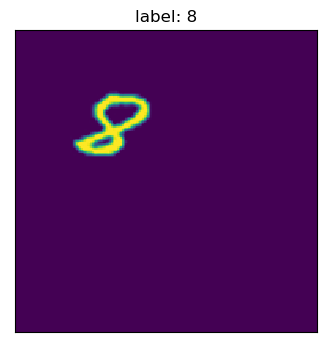

image 1


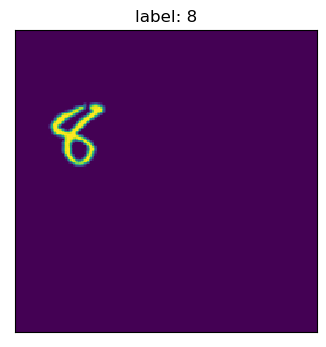

image 2


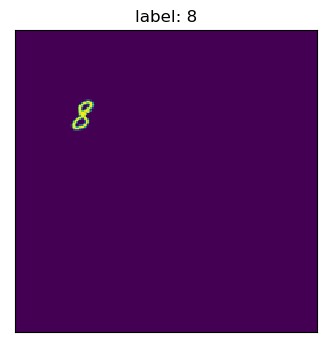

image 3


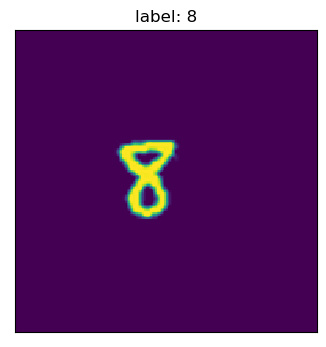

image 4


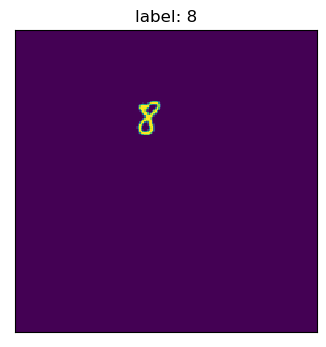

In [18]:
for i in range(5):
    print("image", i)
    show_img(X_1[i][0],y_1[i], dpi = 100)

image 0
64  channels


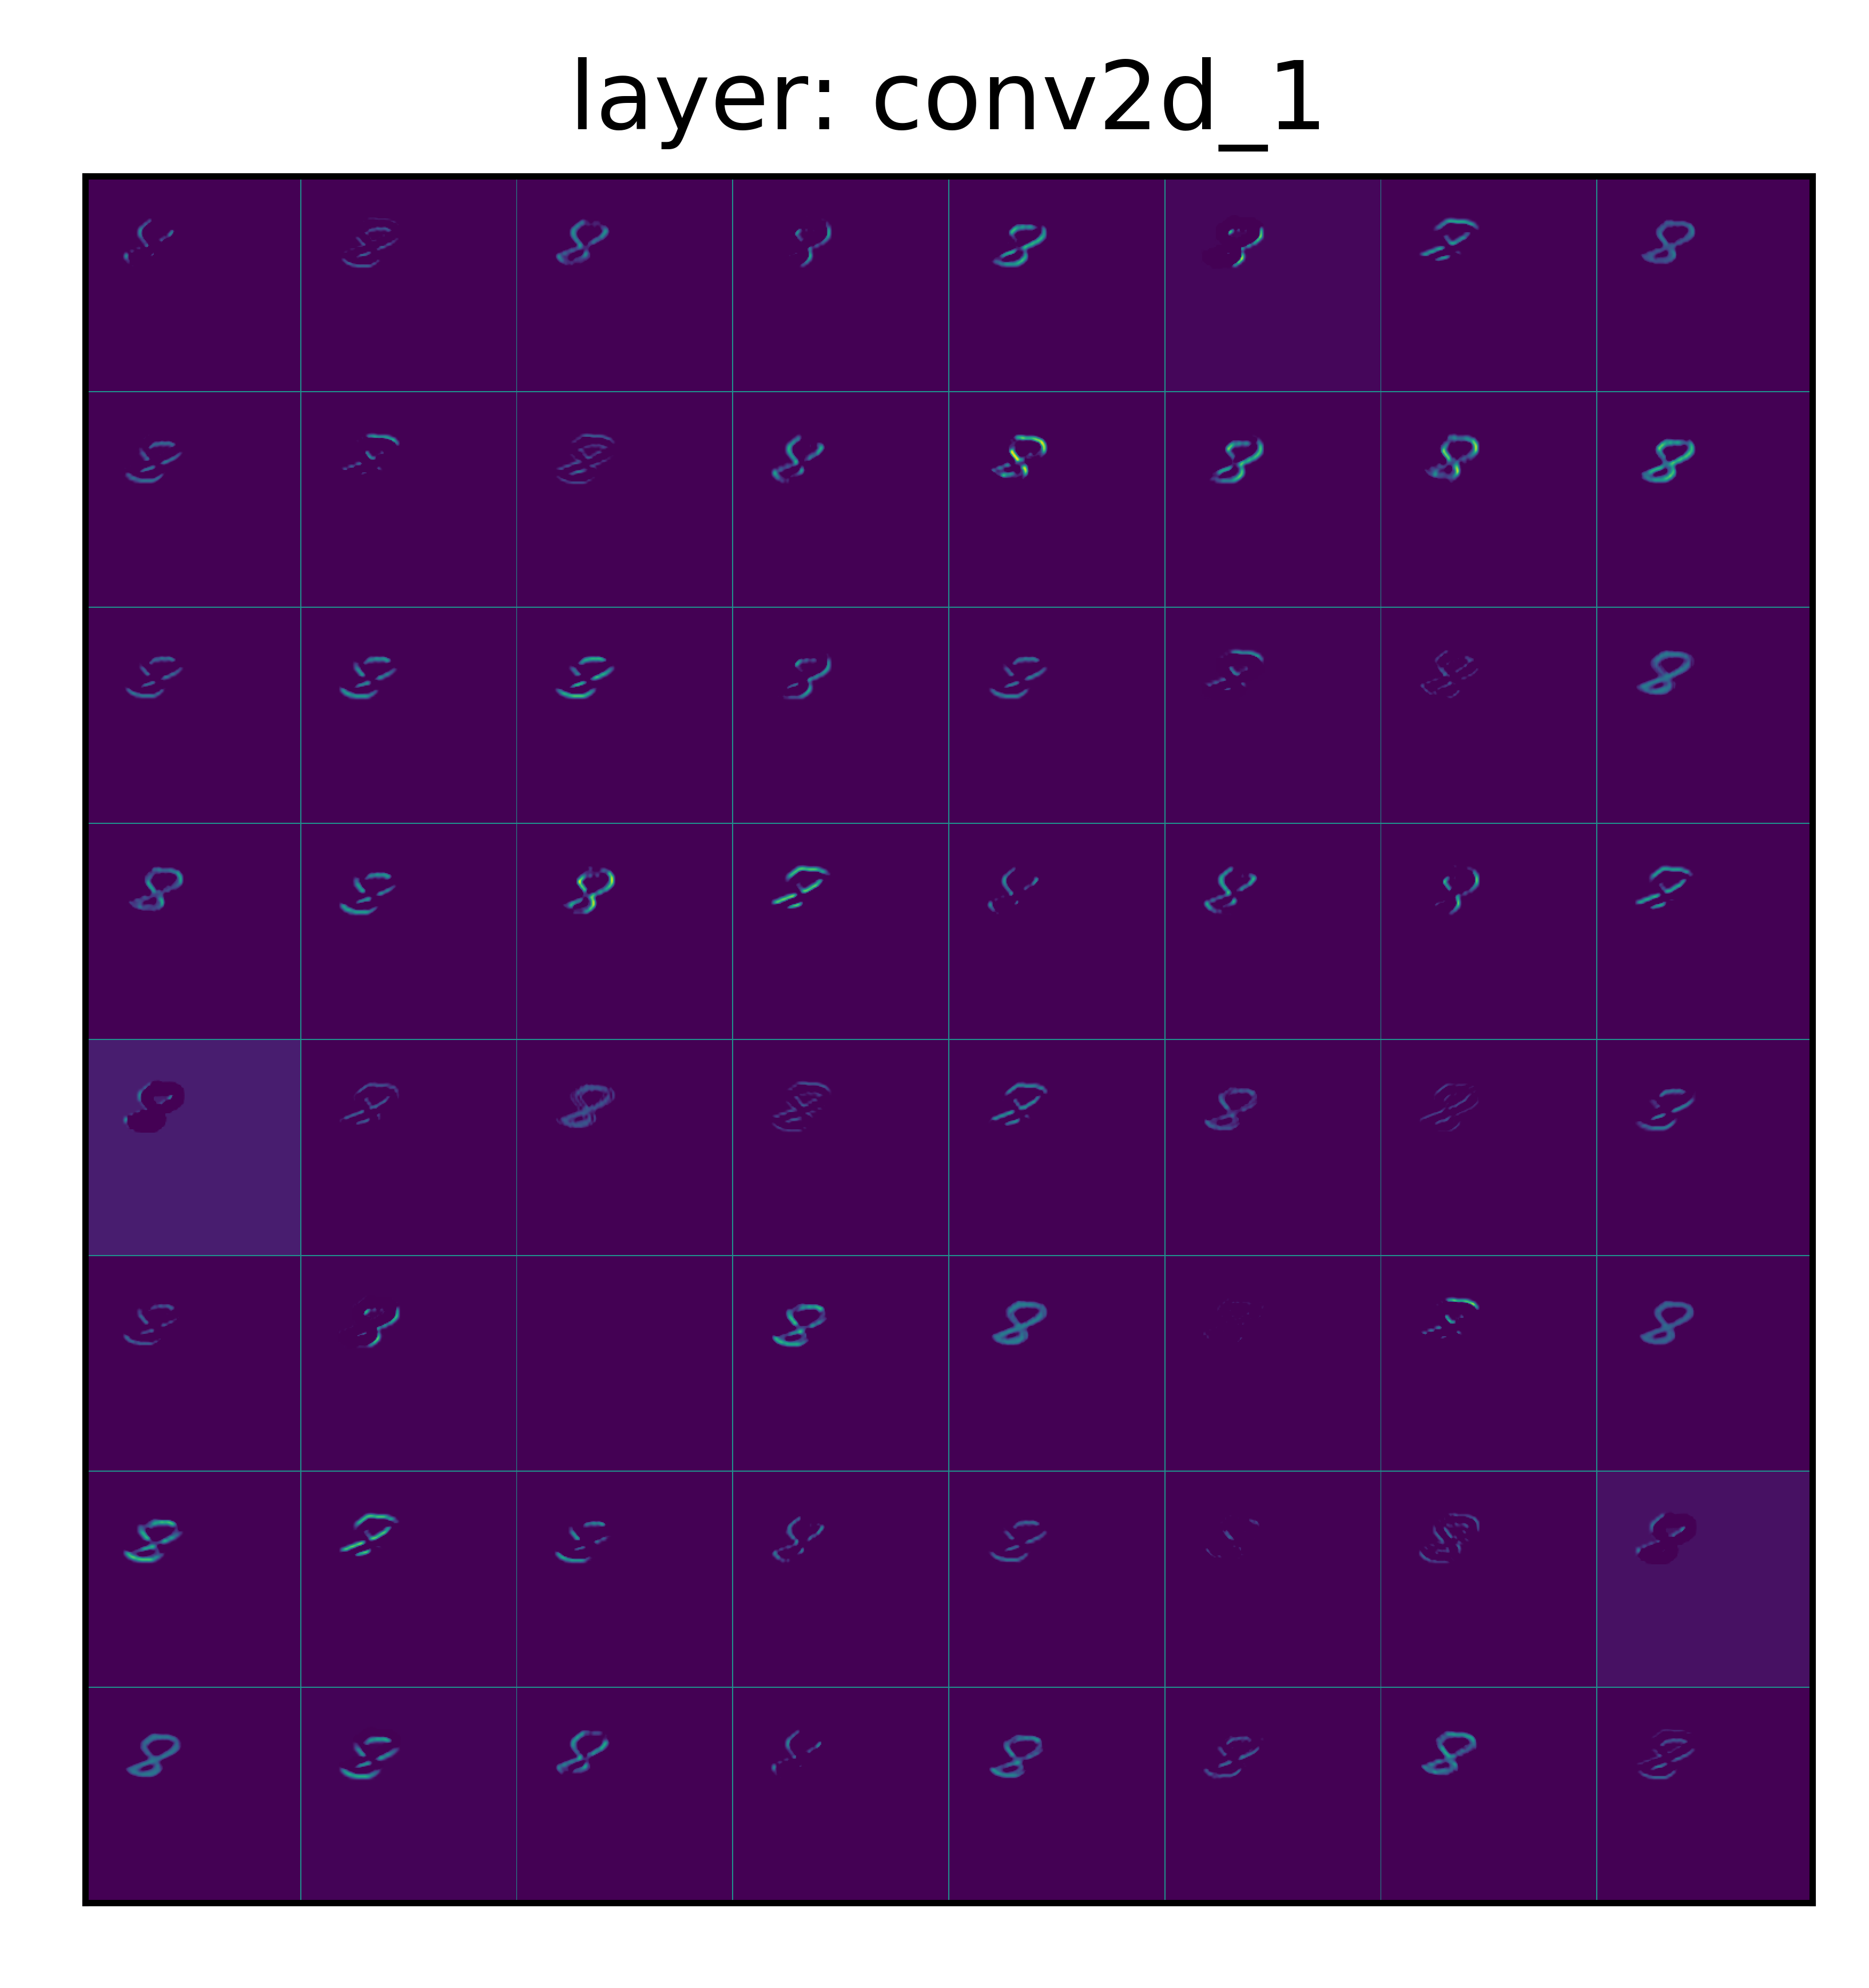

image 1
64  channels


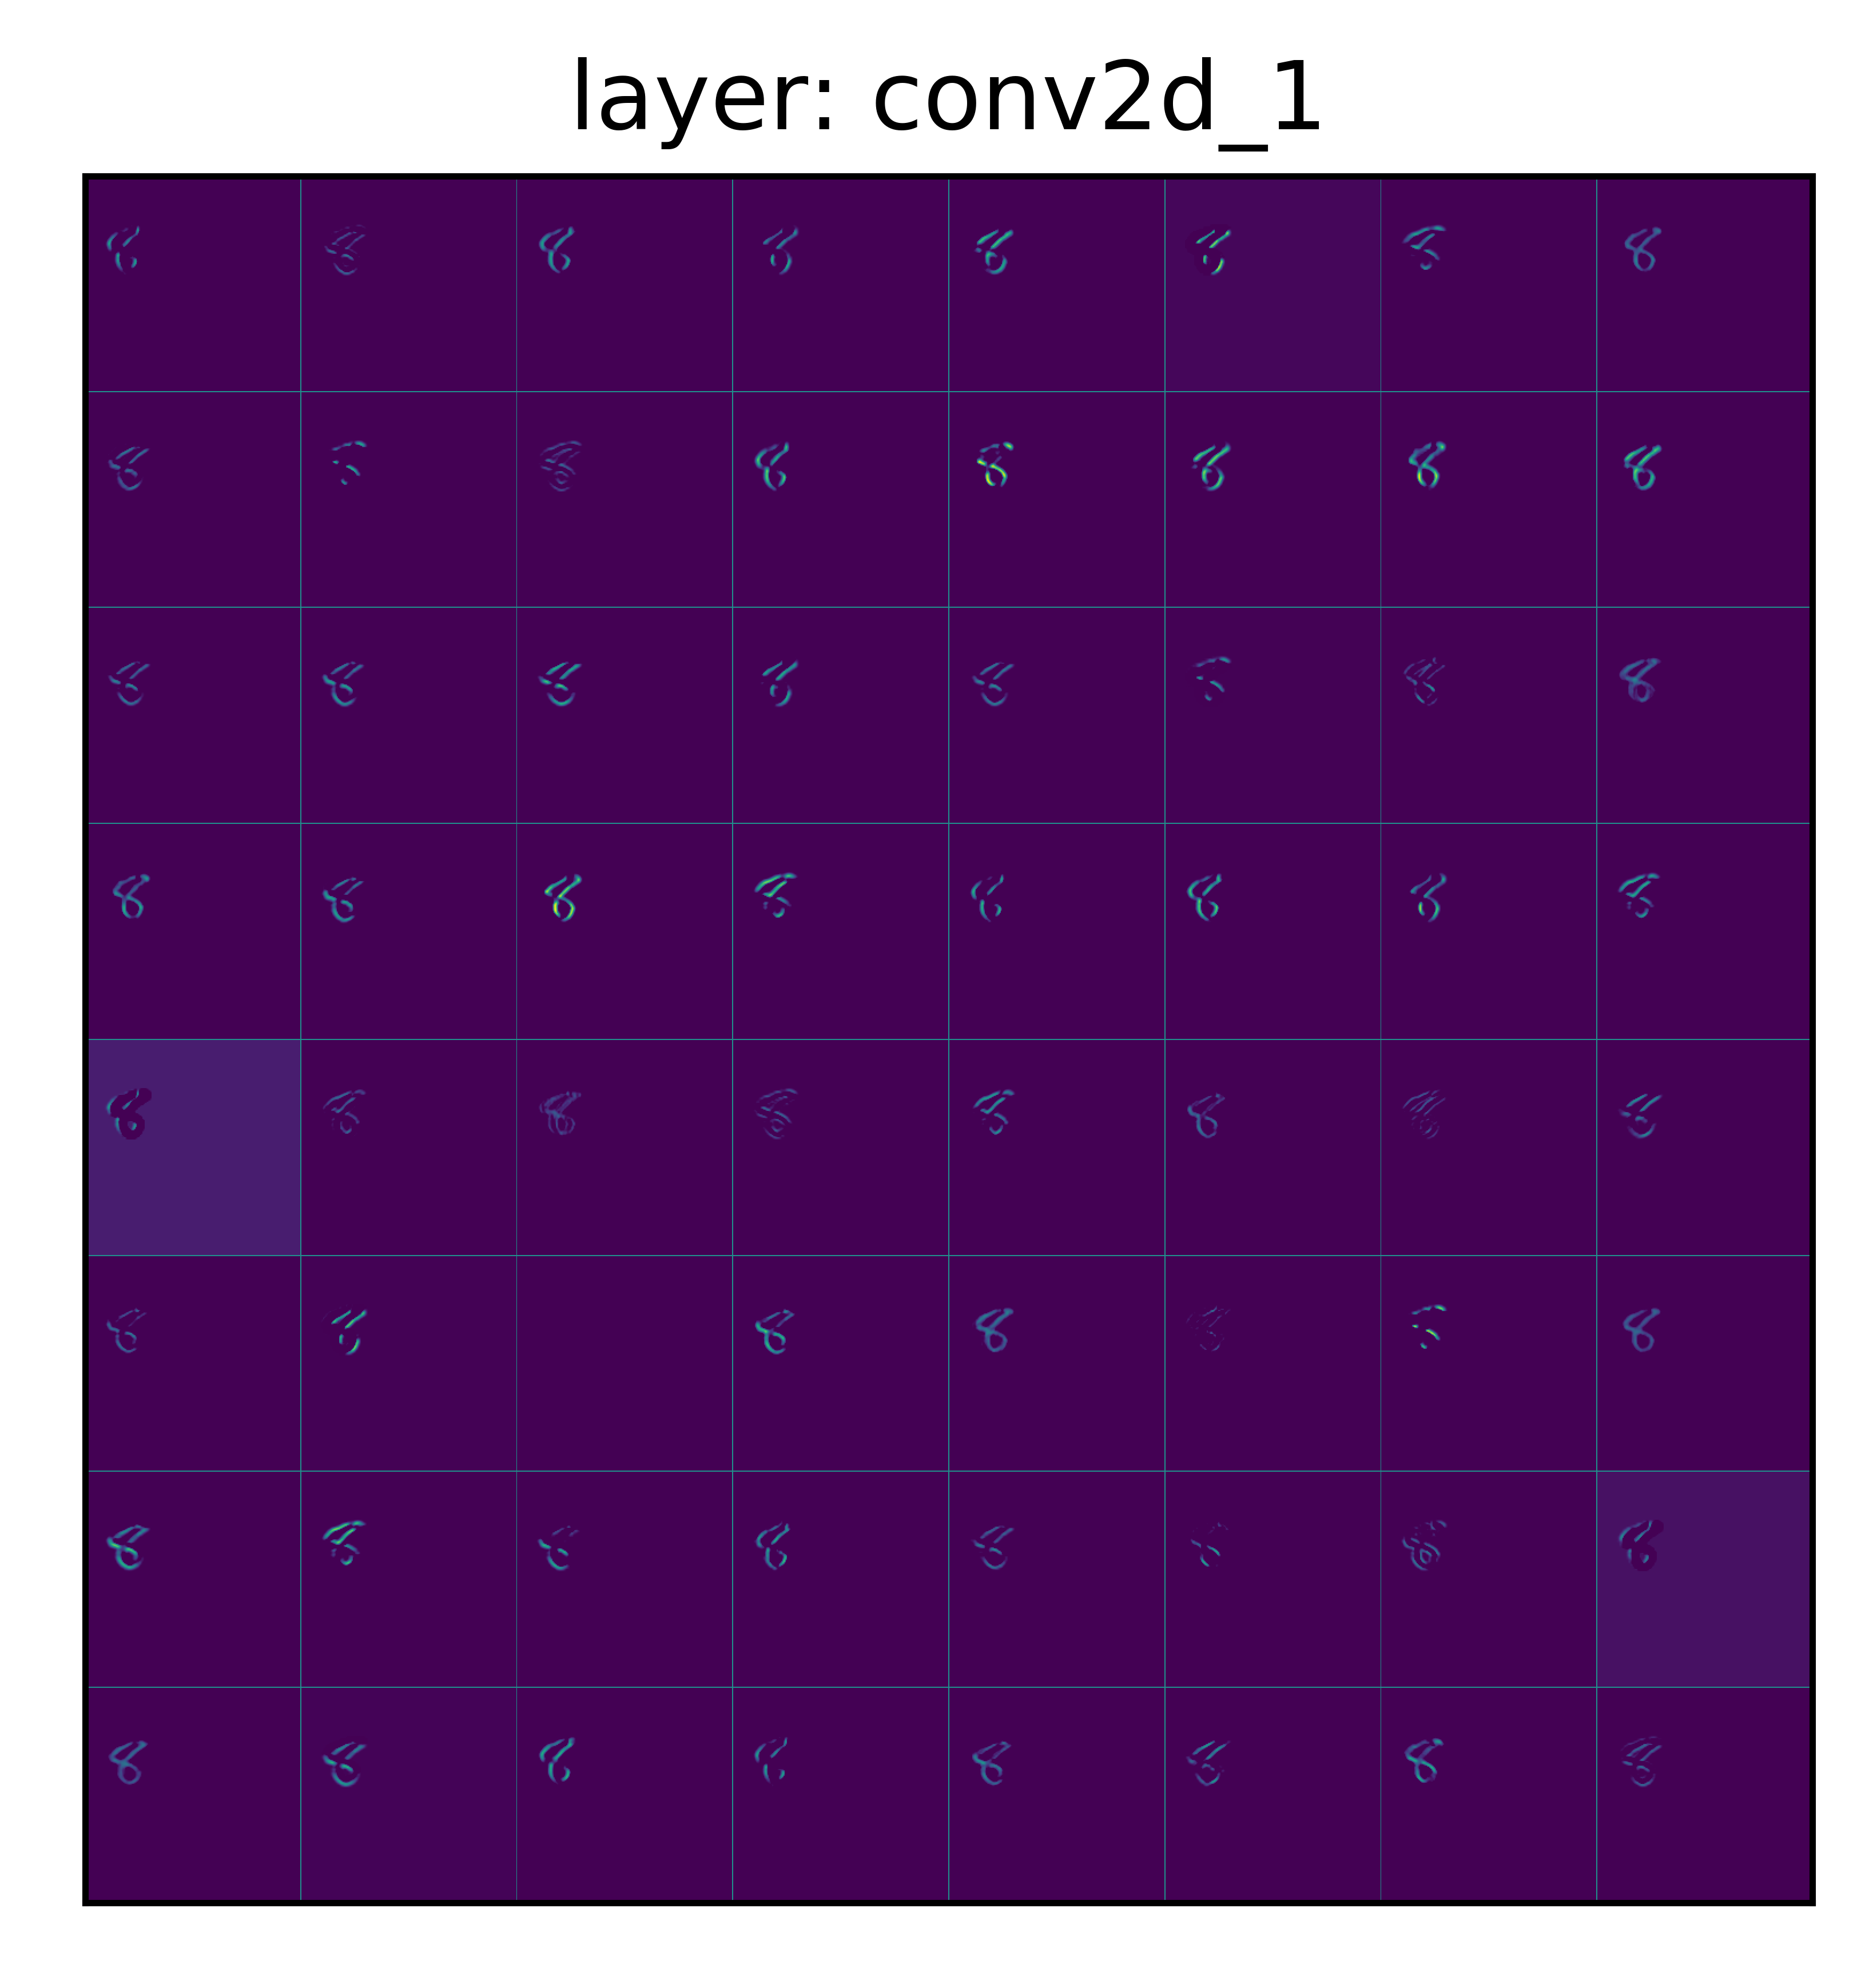

image 2
64  channels


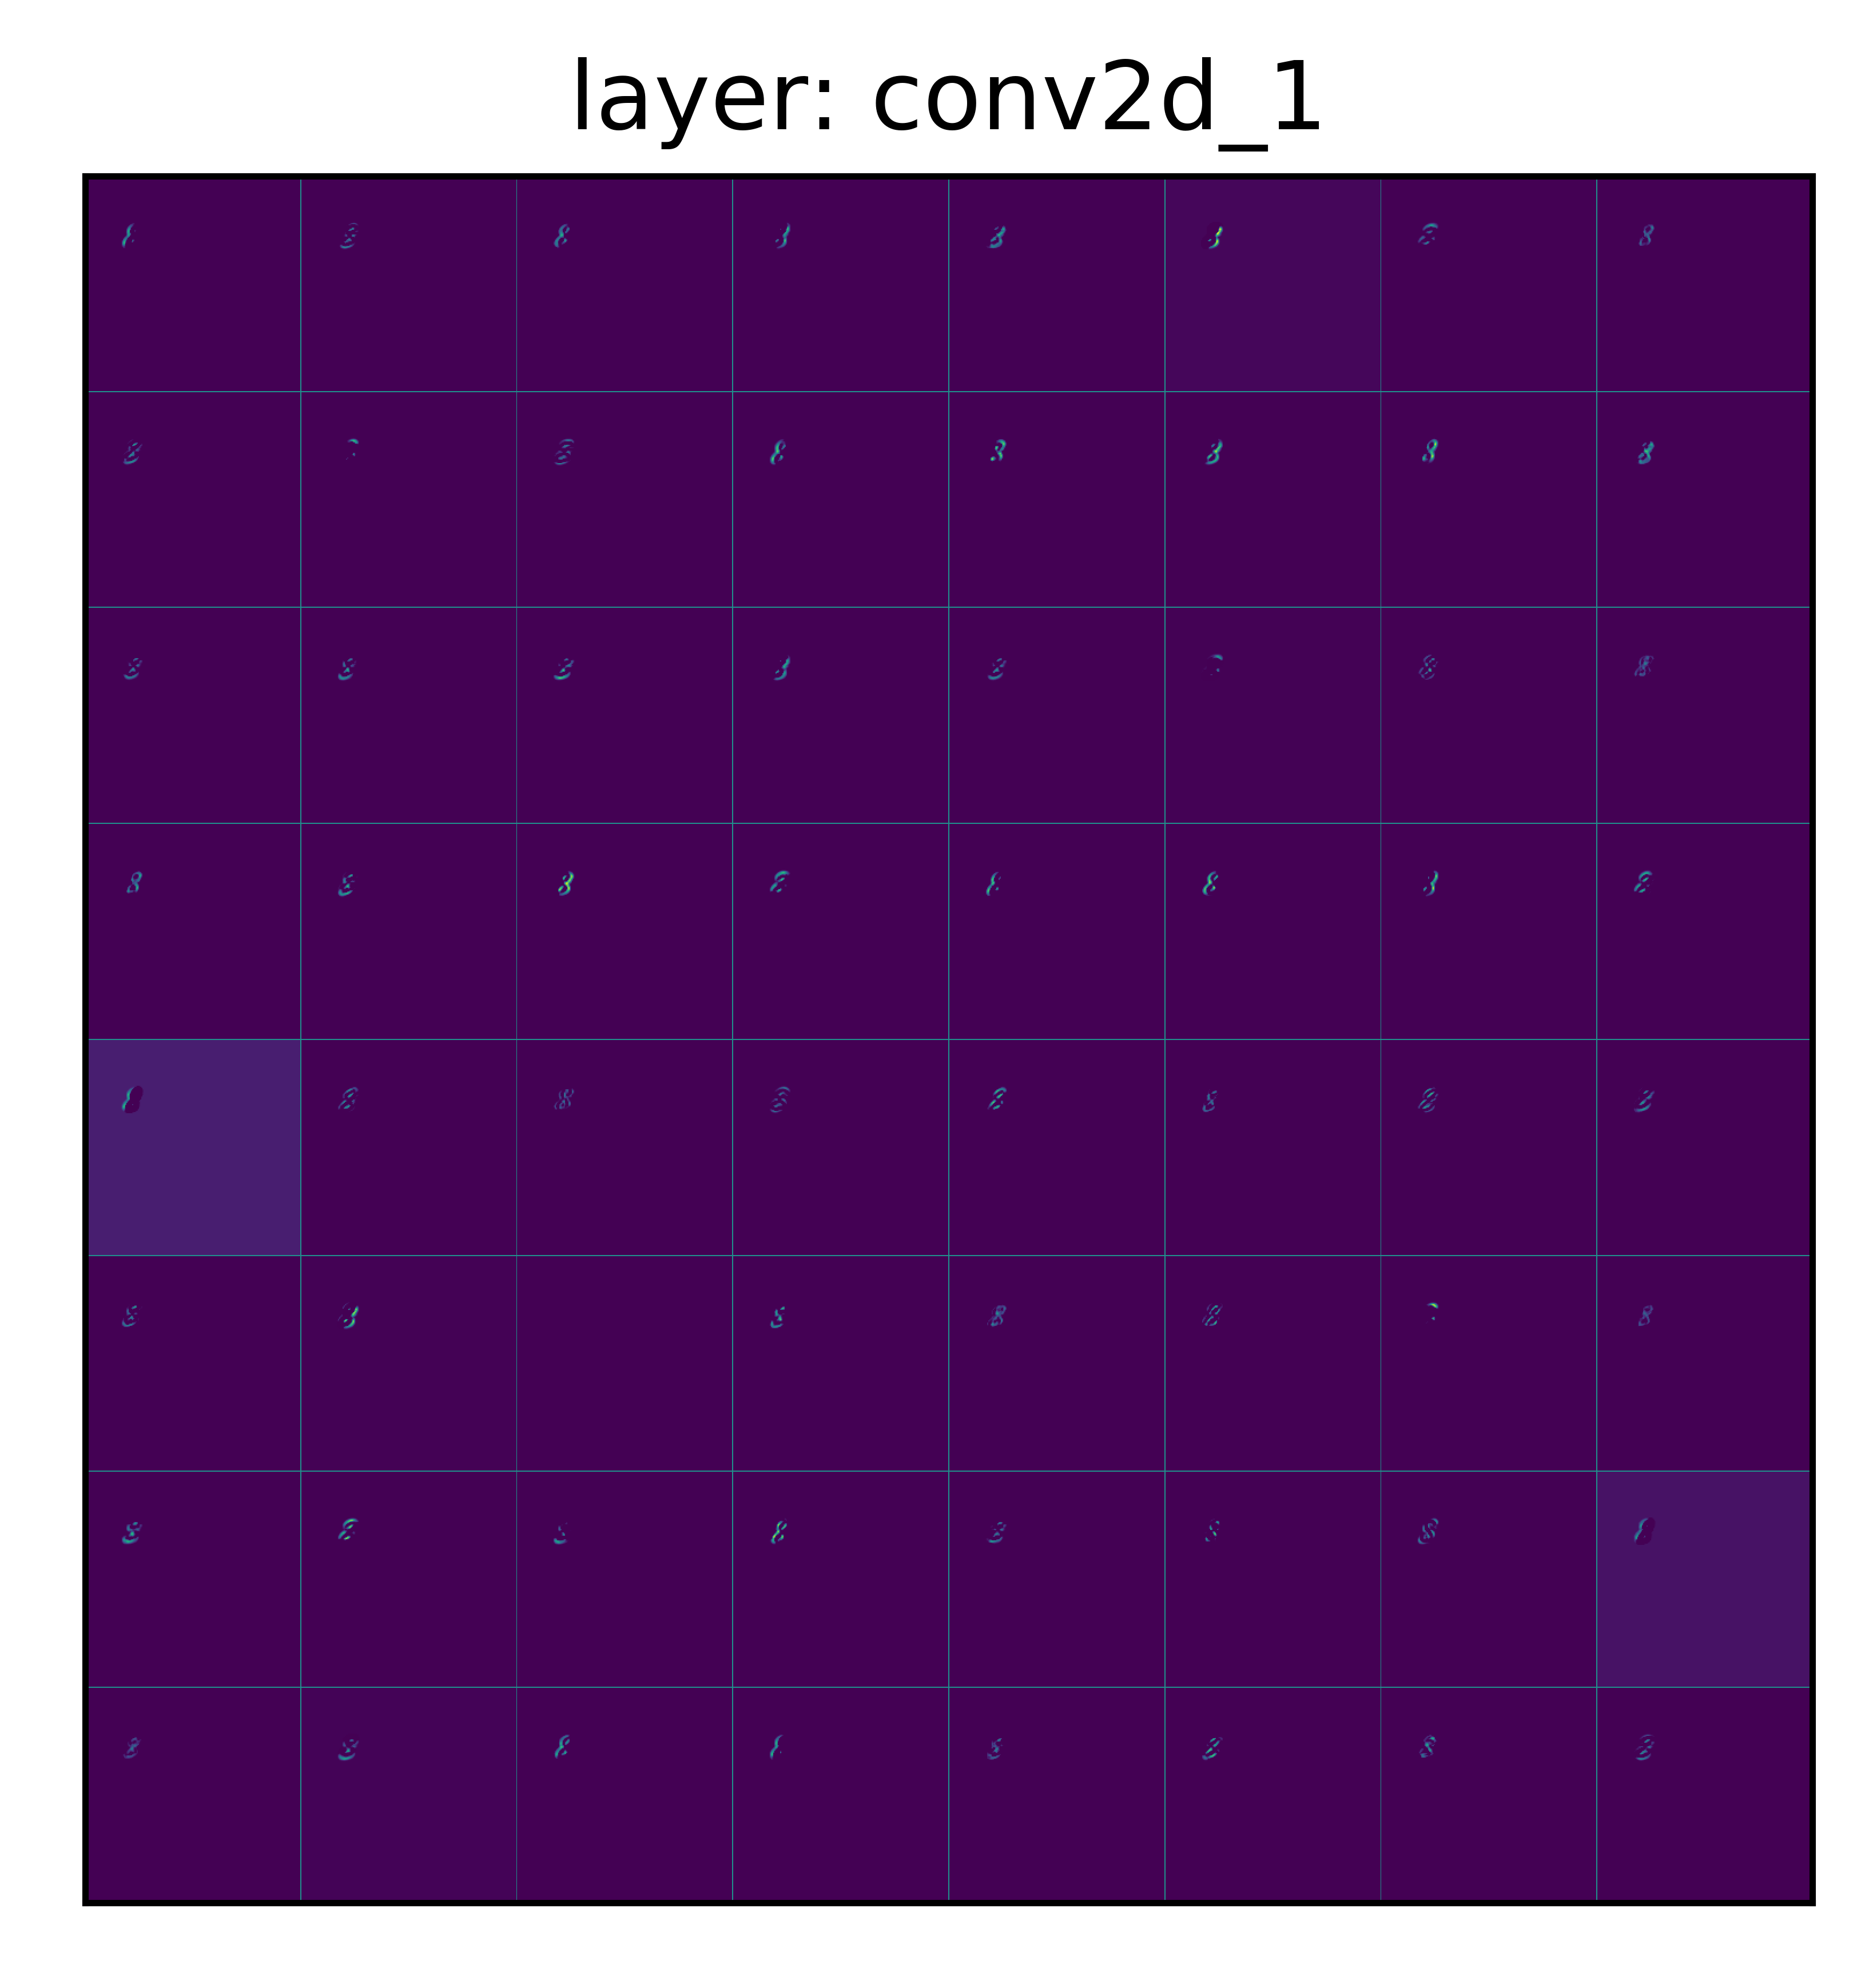

image 3
64  channels


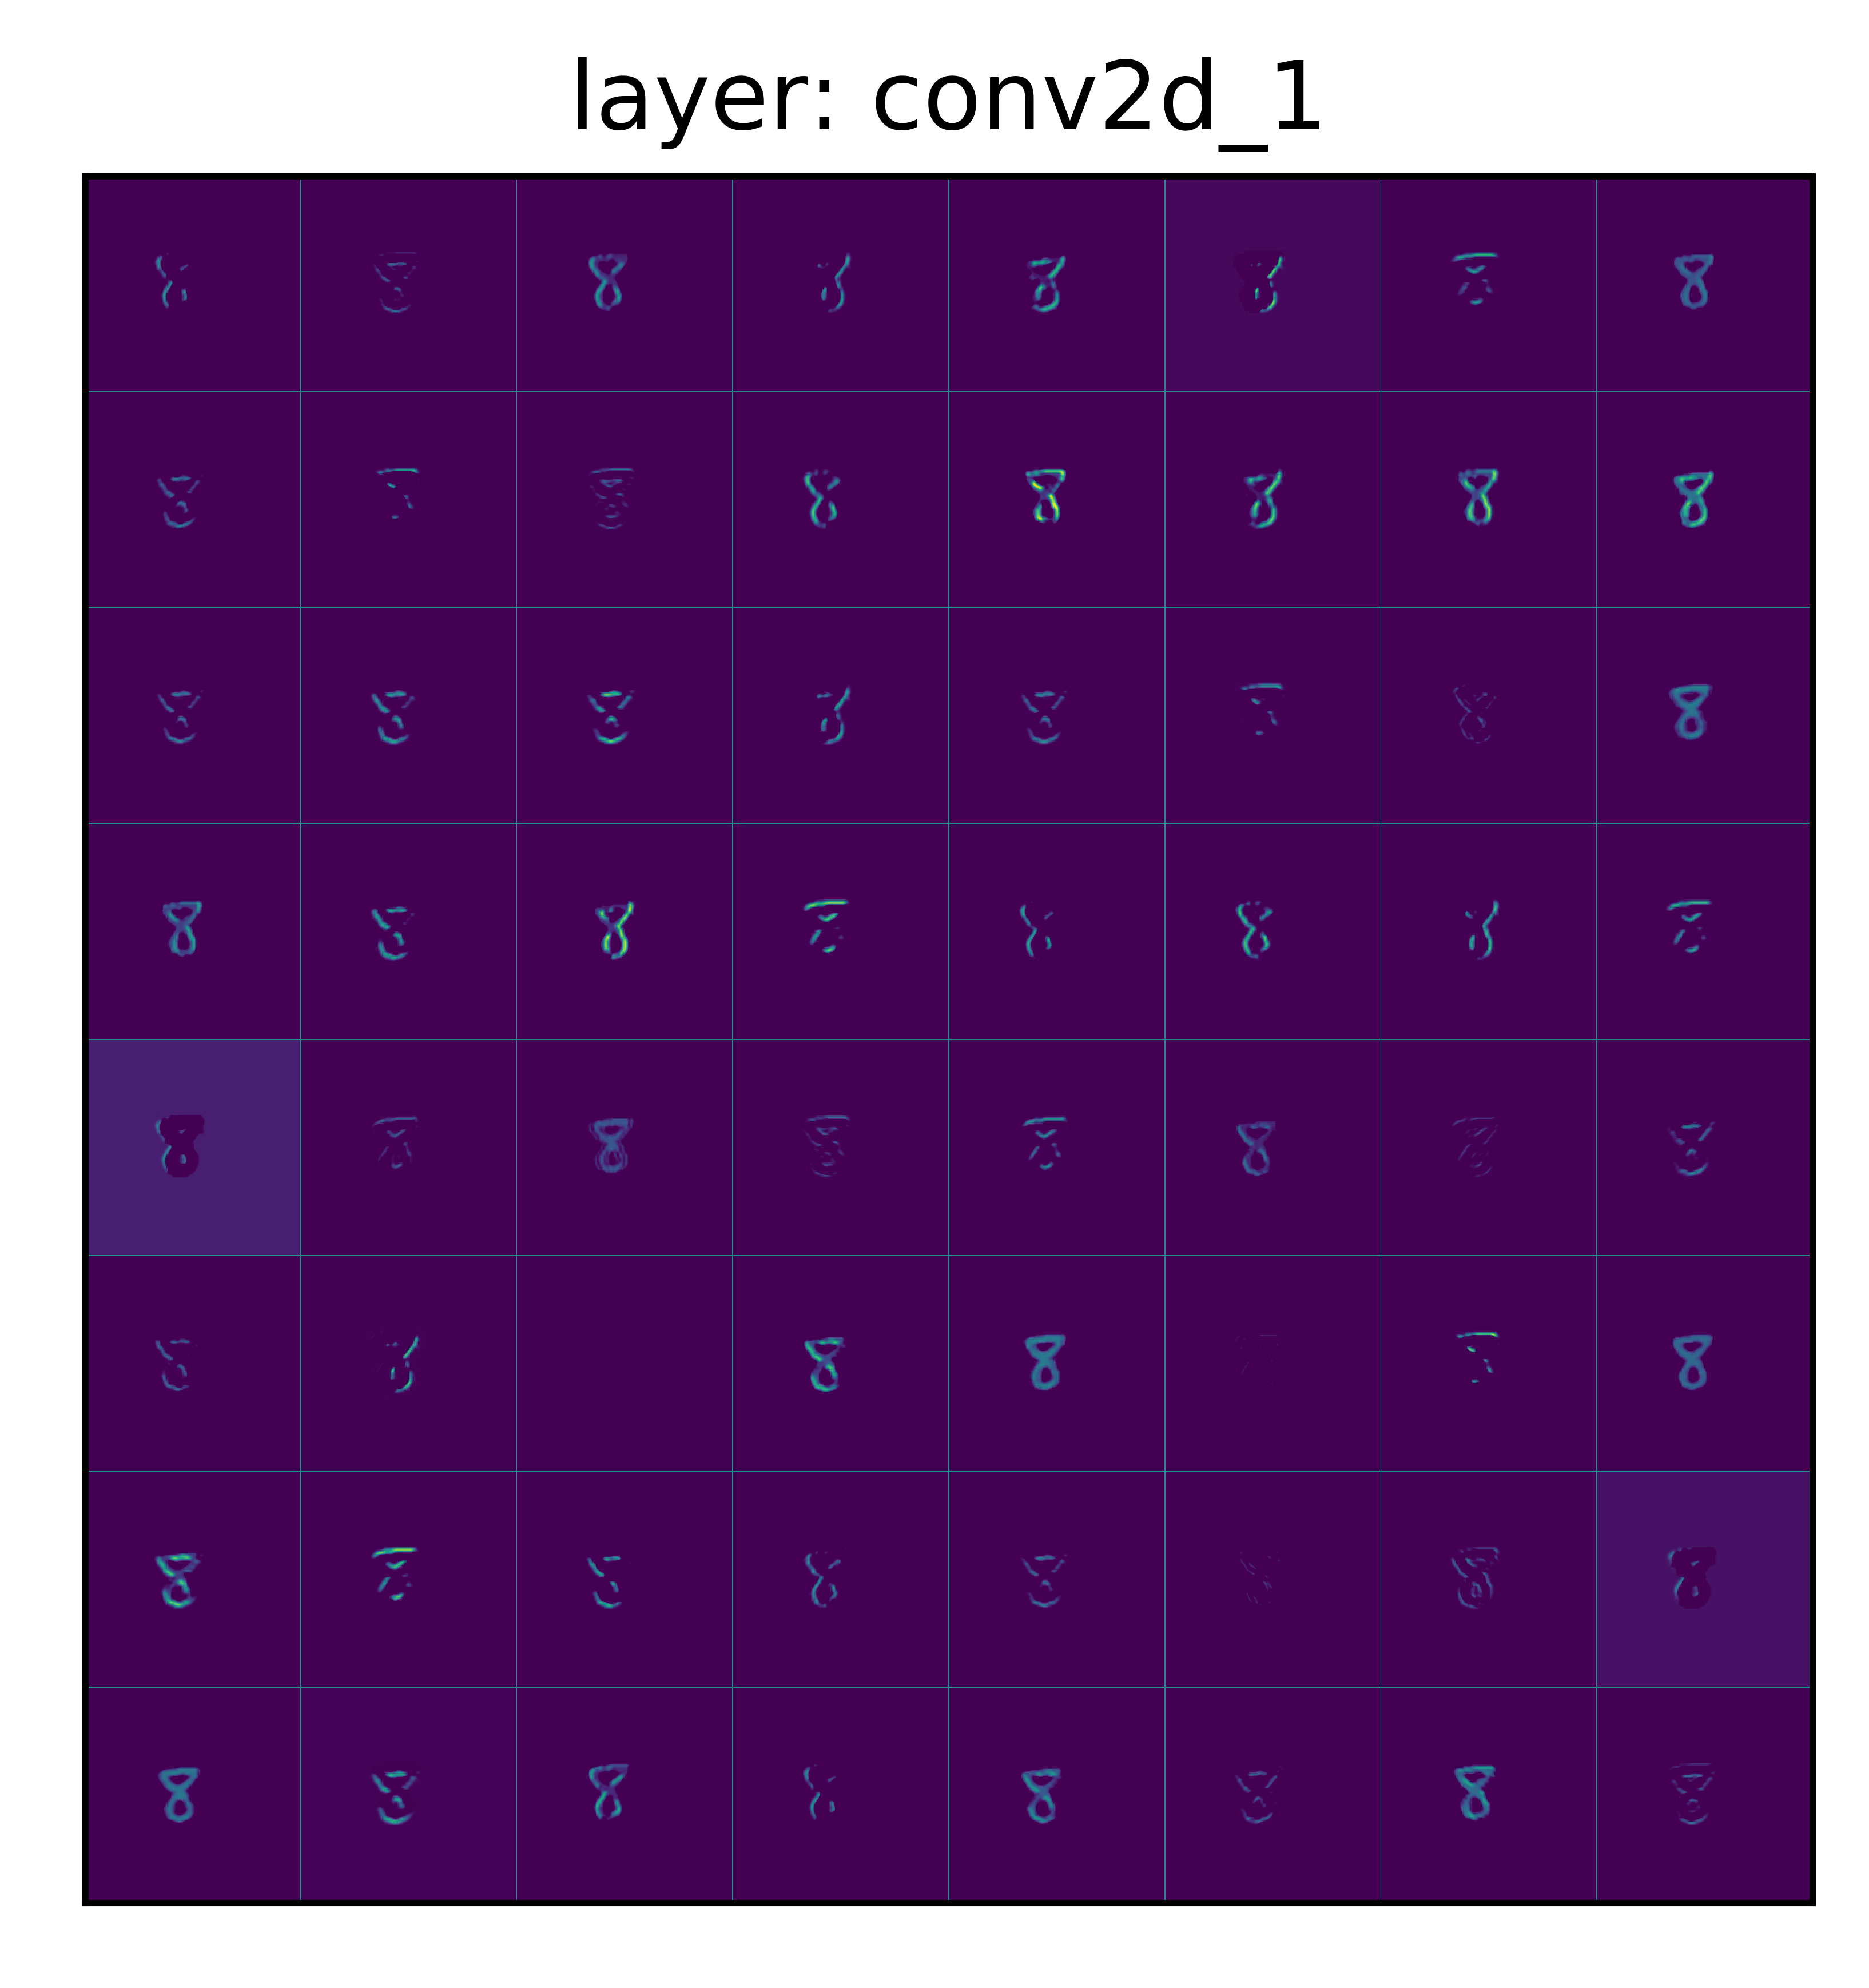

image 4
64  channels


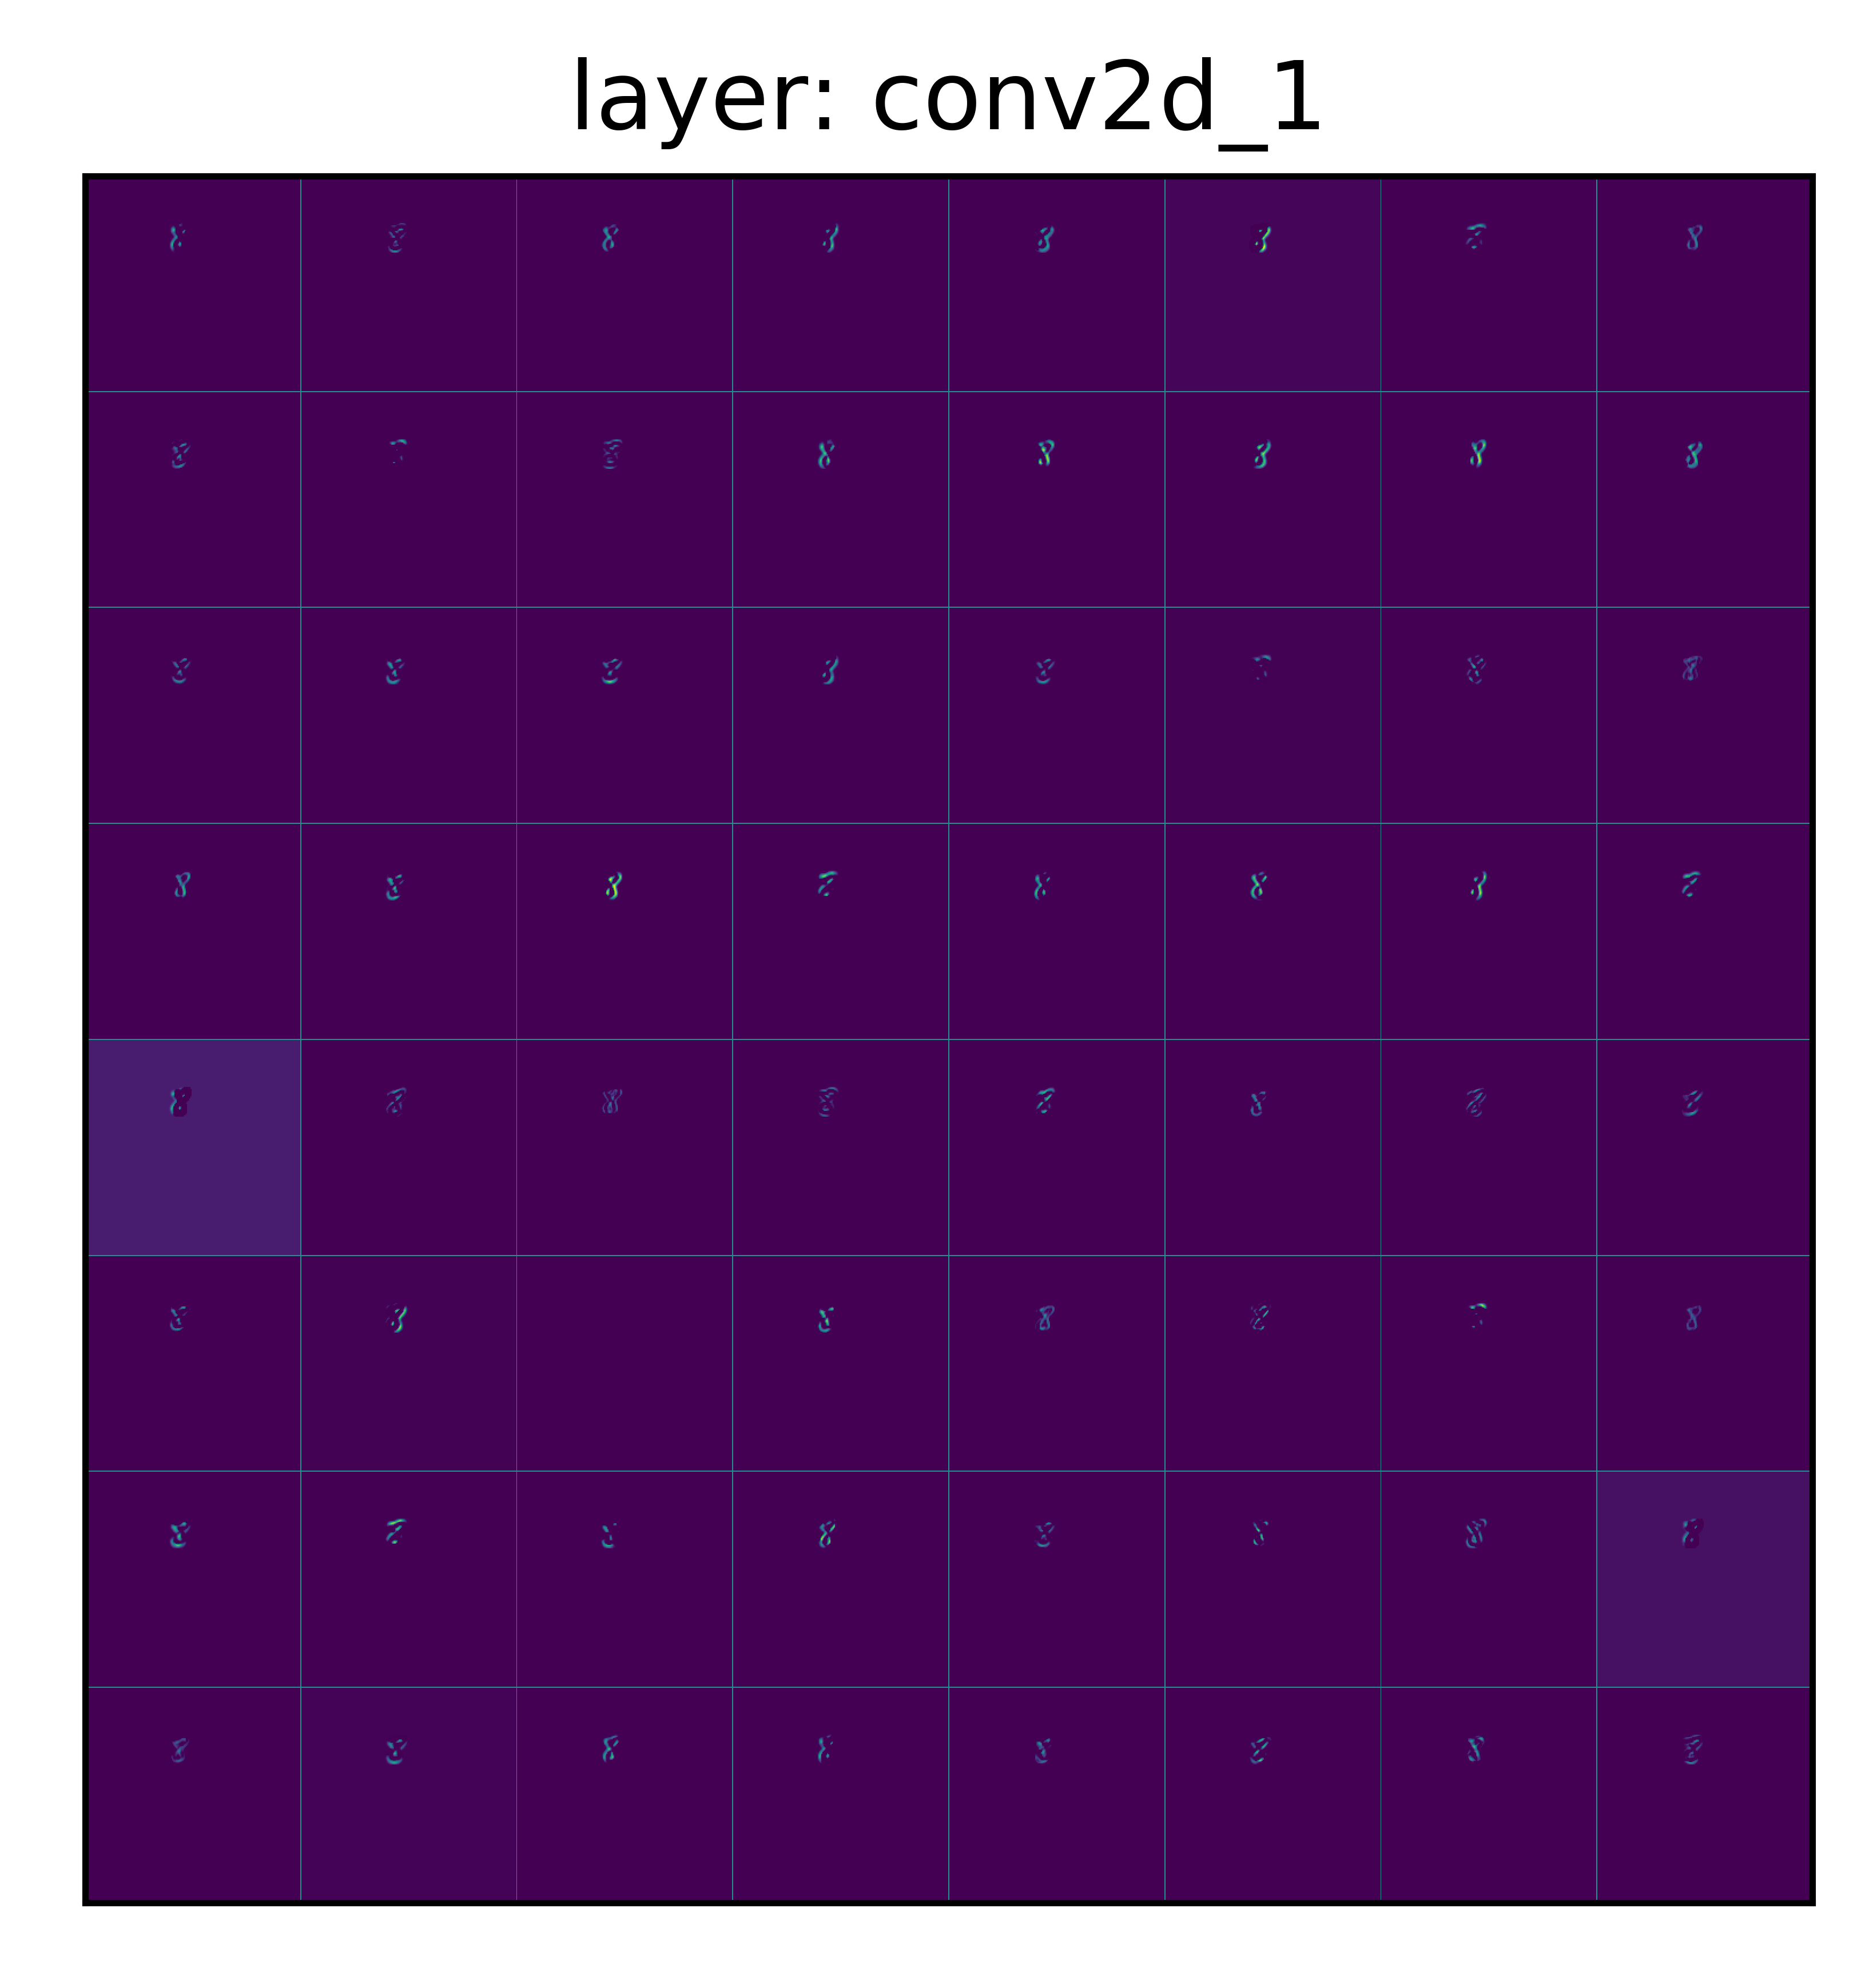

In [21]:
i = 0
for img_id in range(5):
    print("image", img_id)
    display_activation(activations8[i][img_id],8, new_model.layers[i].name)

image 0
64  channels


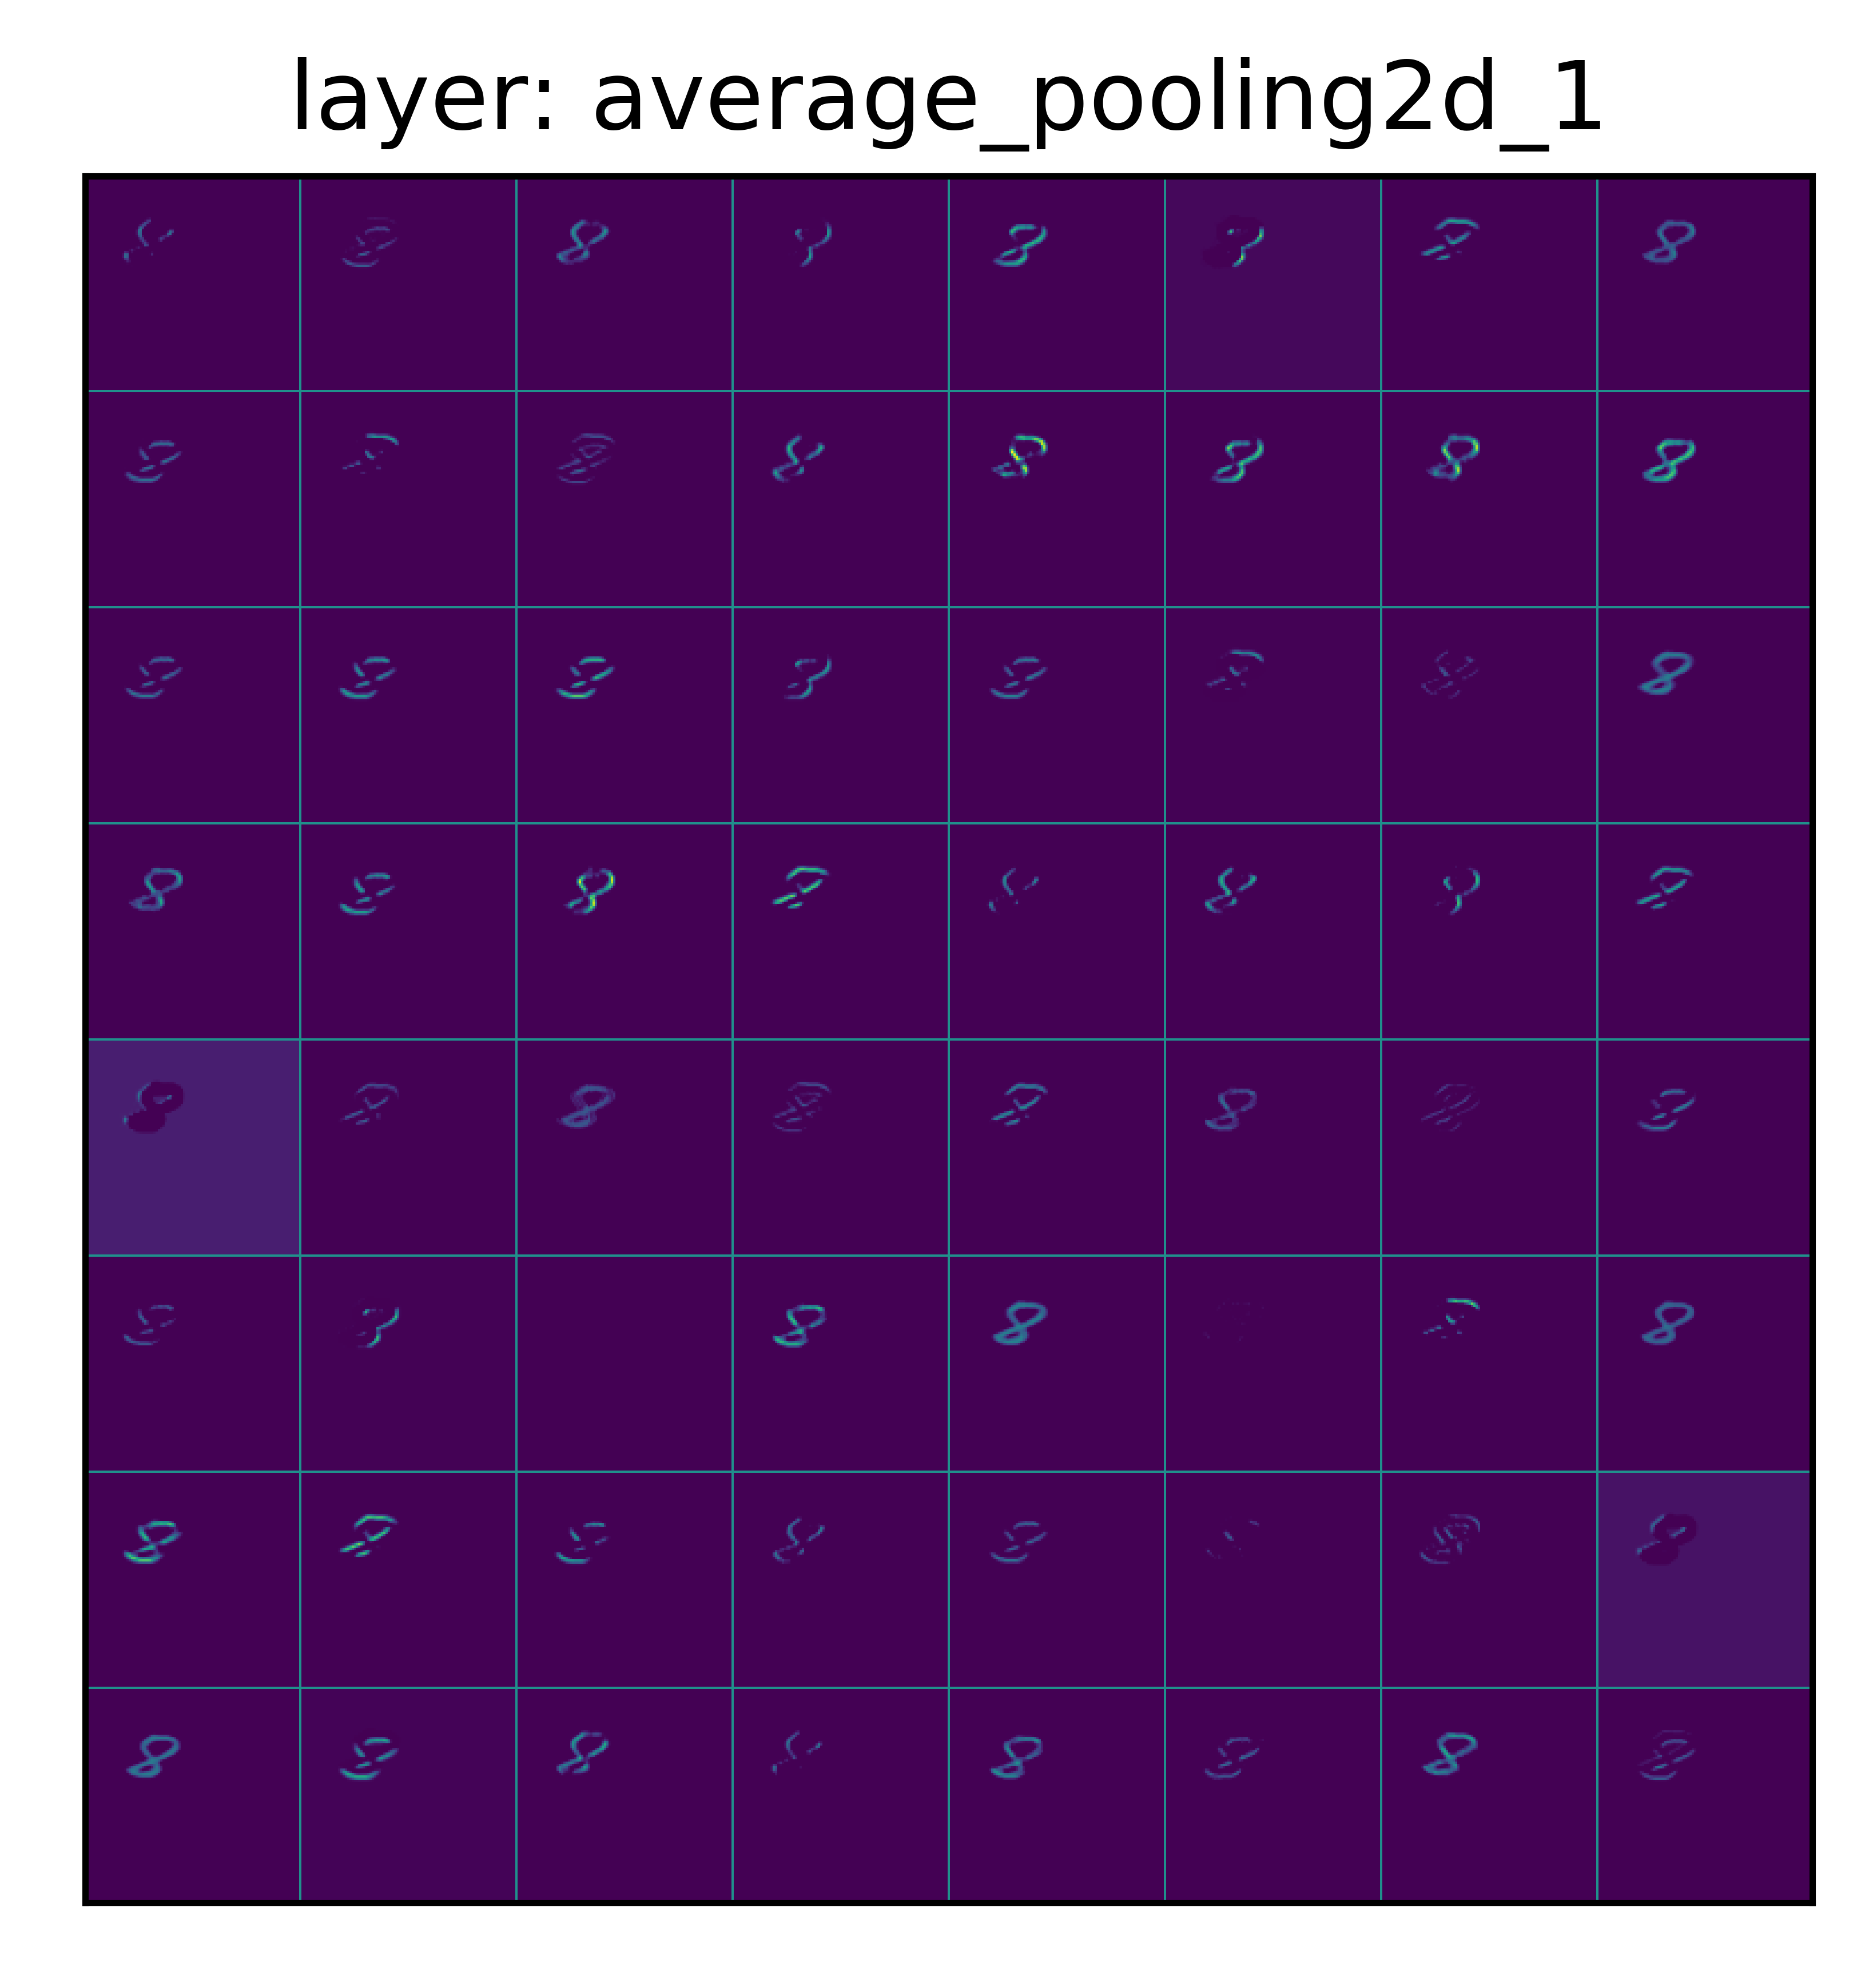

image 1
64  channels


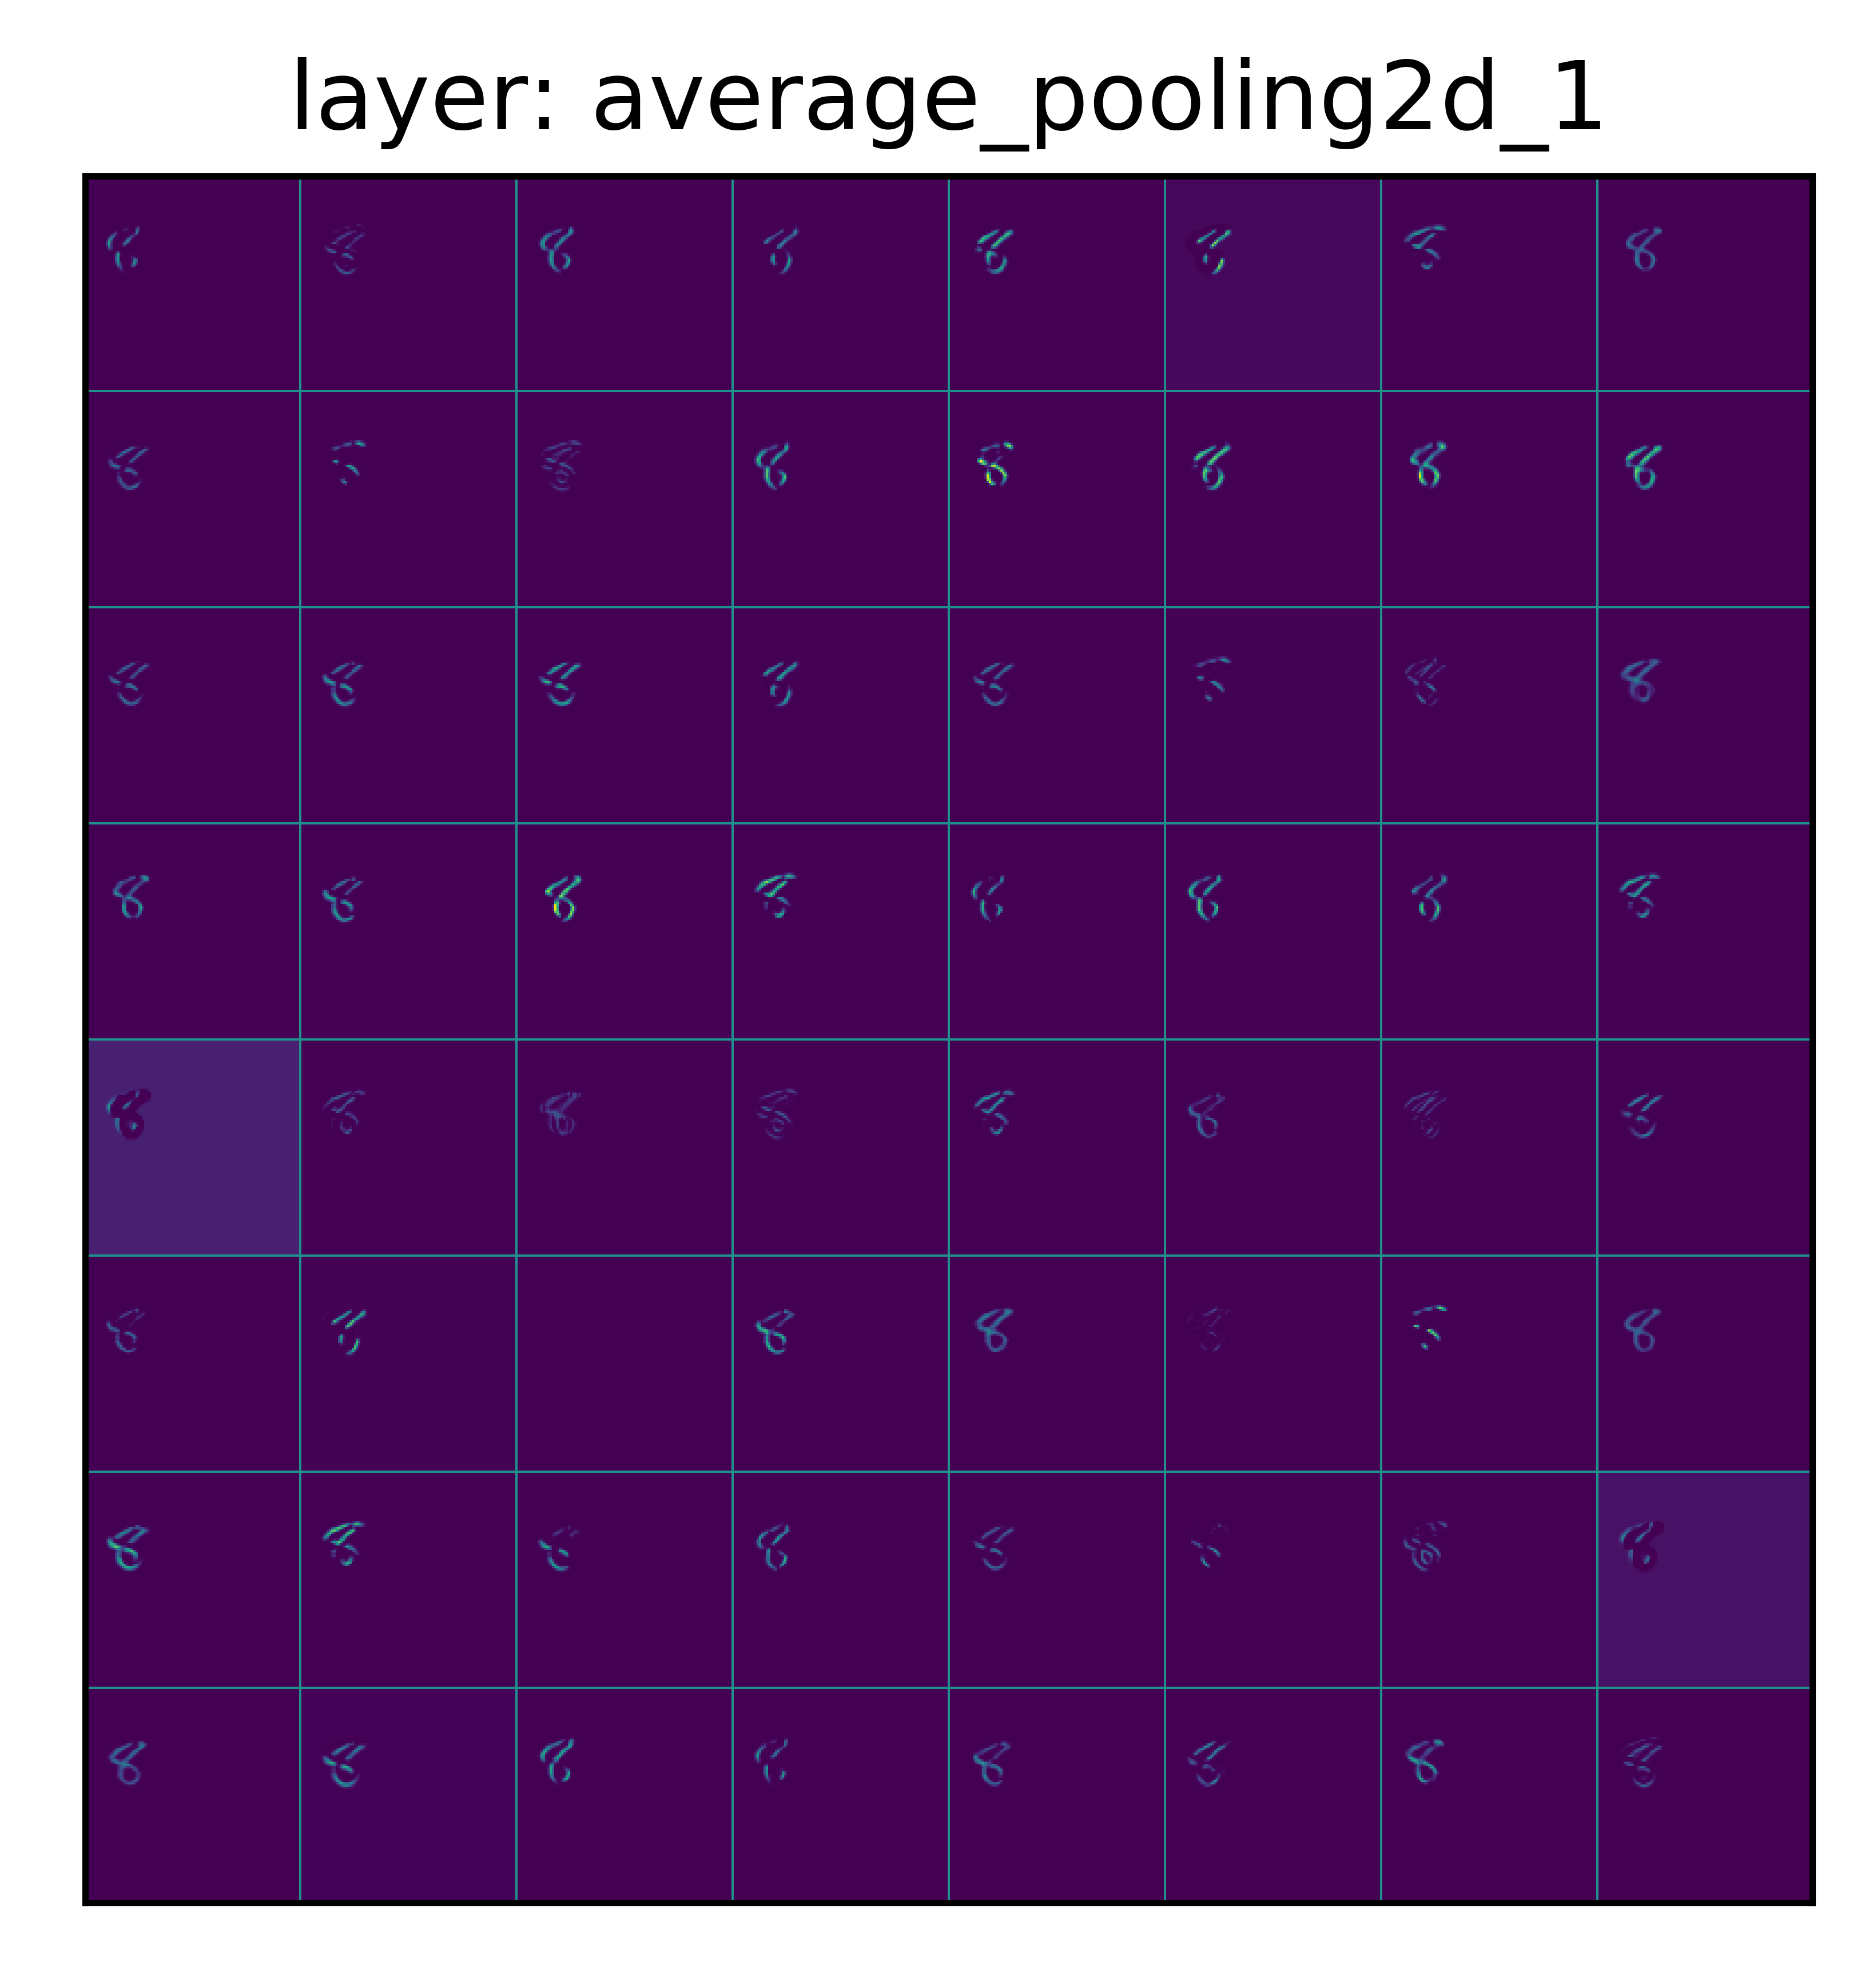

image 2
64  channels


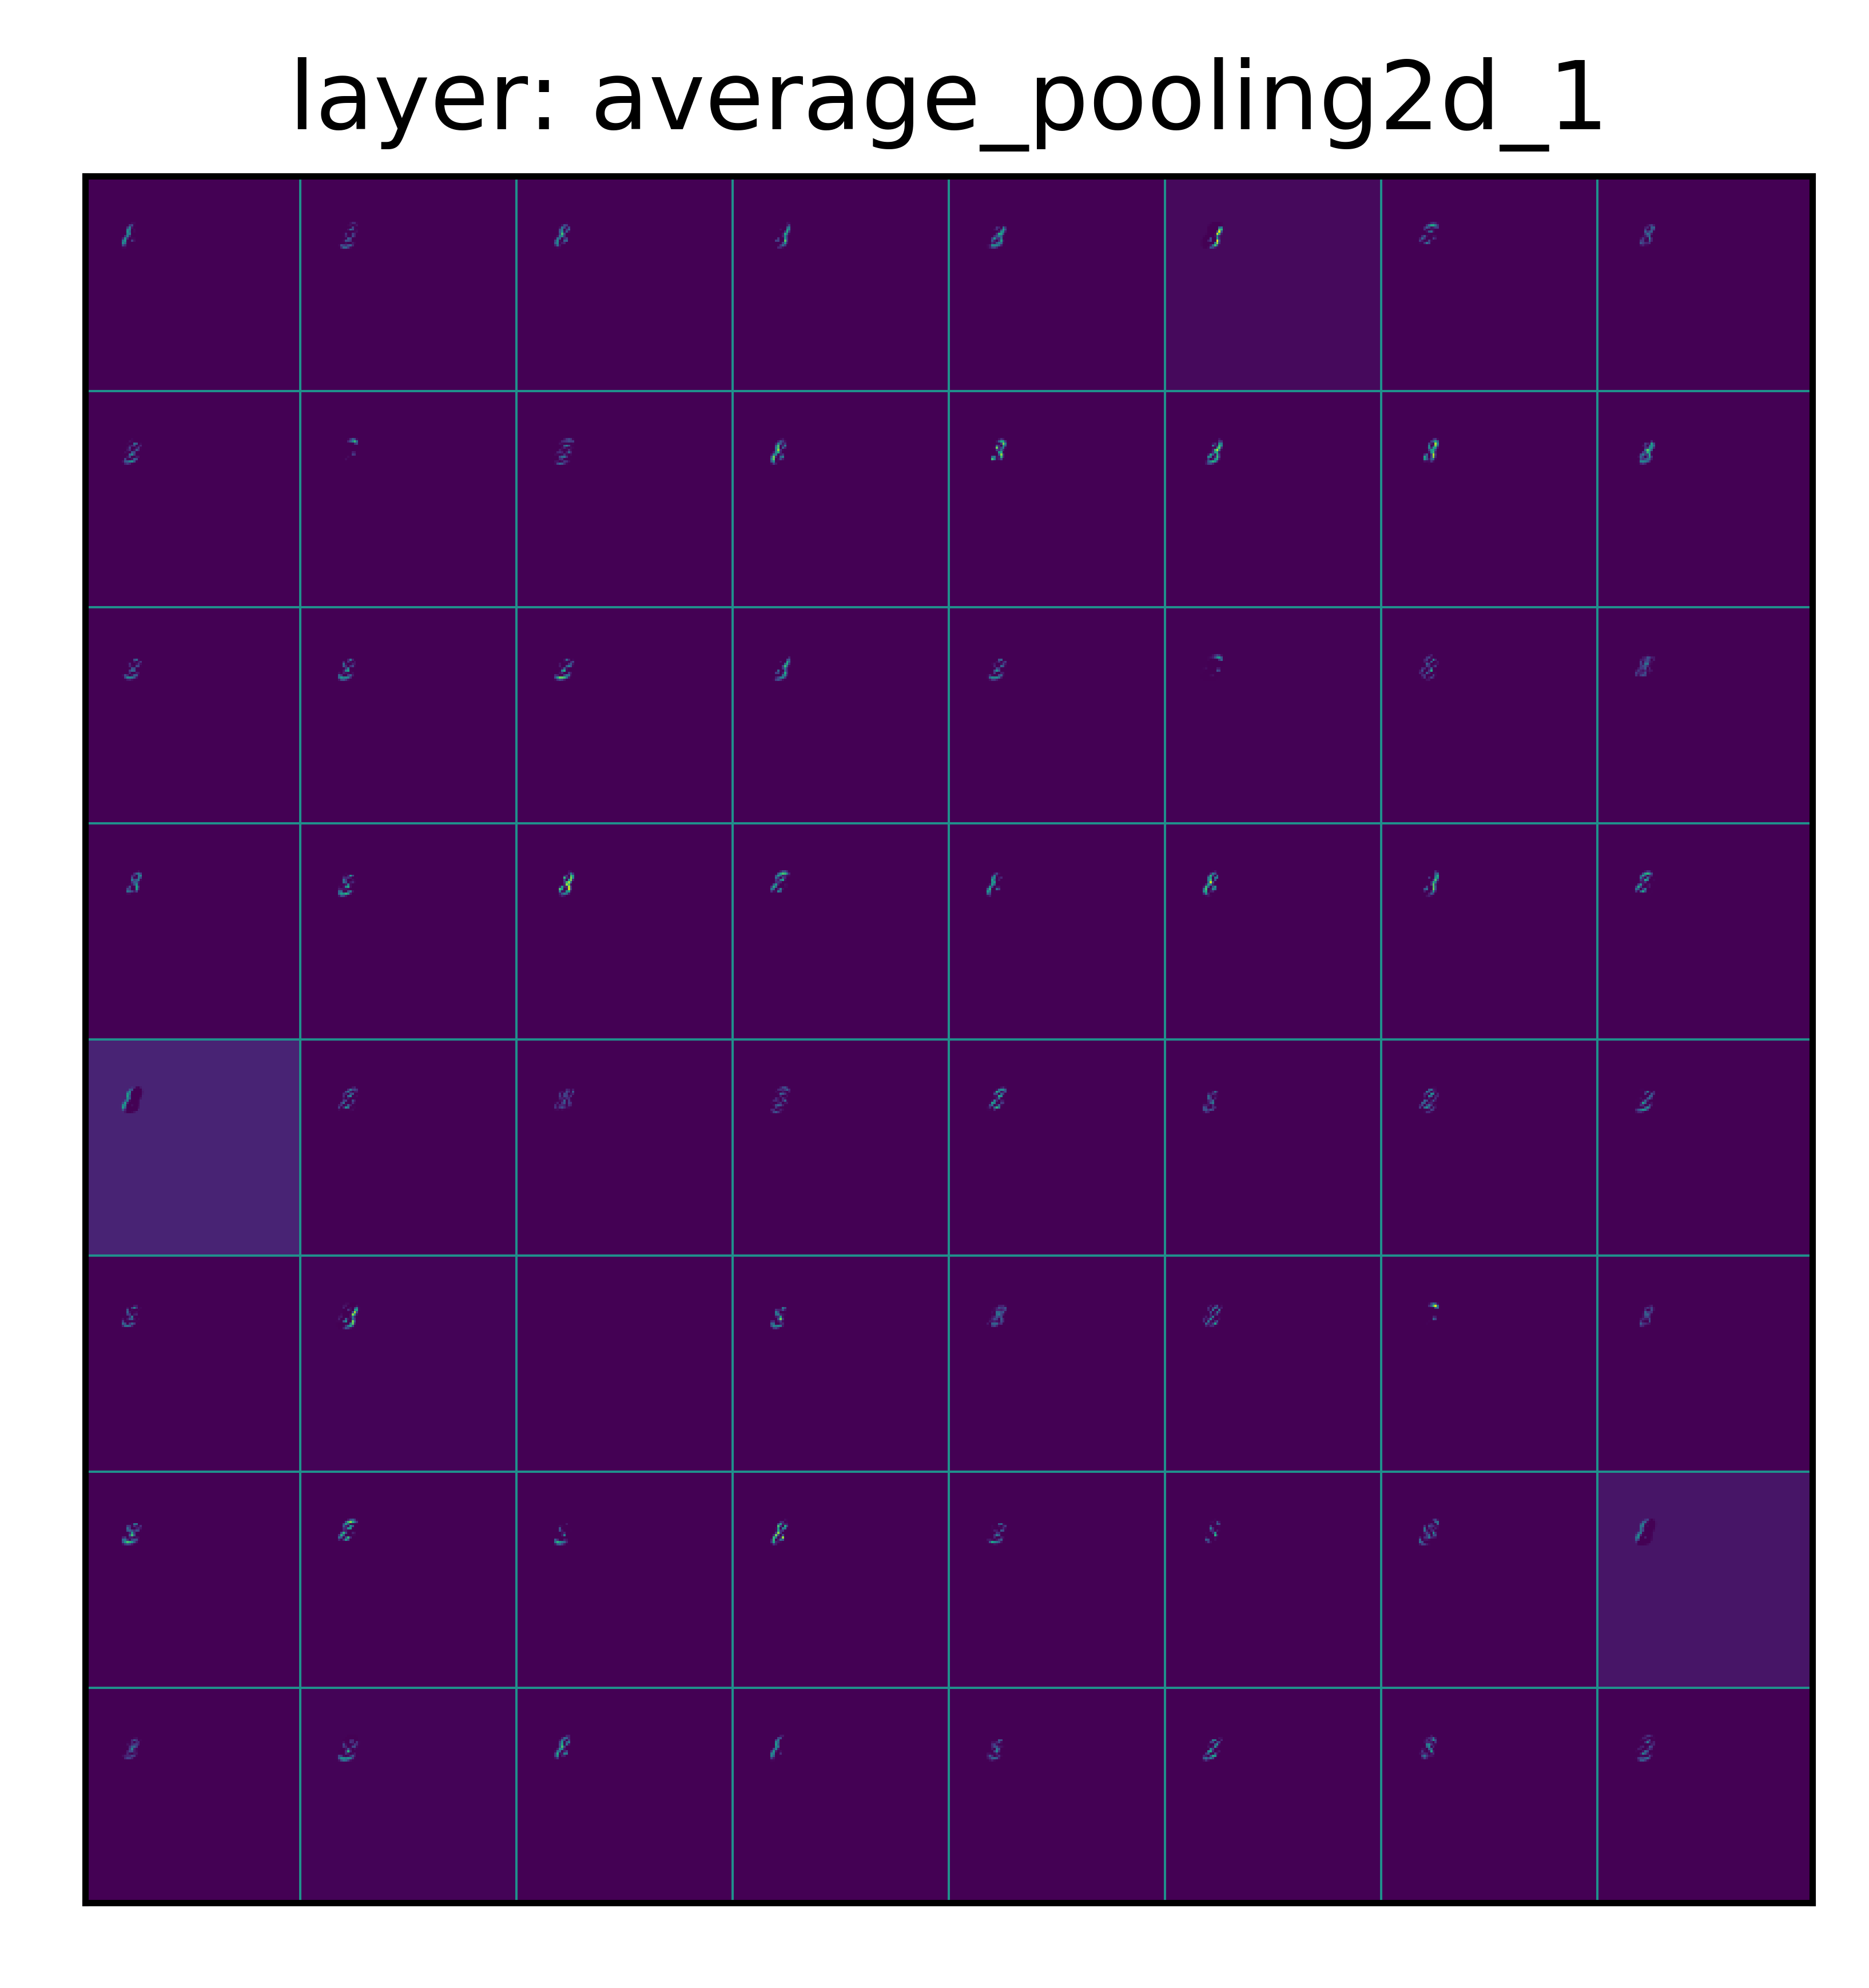

image 3
64  channels


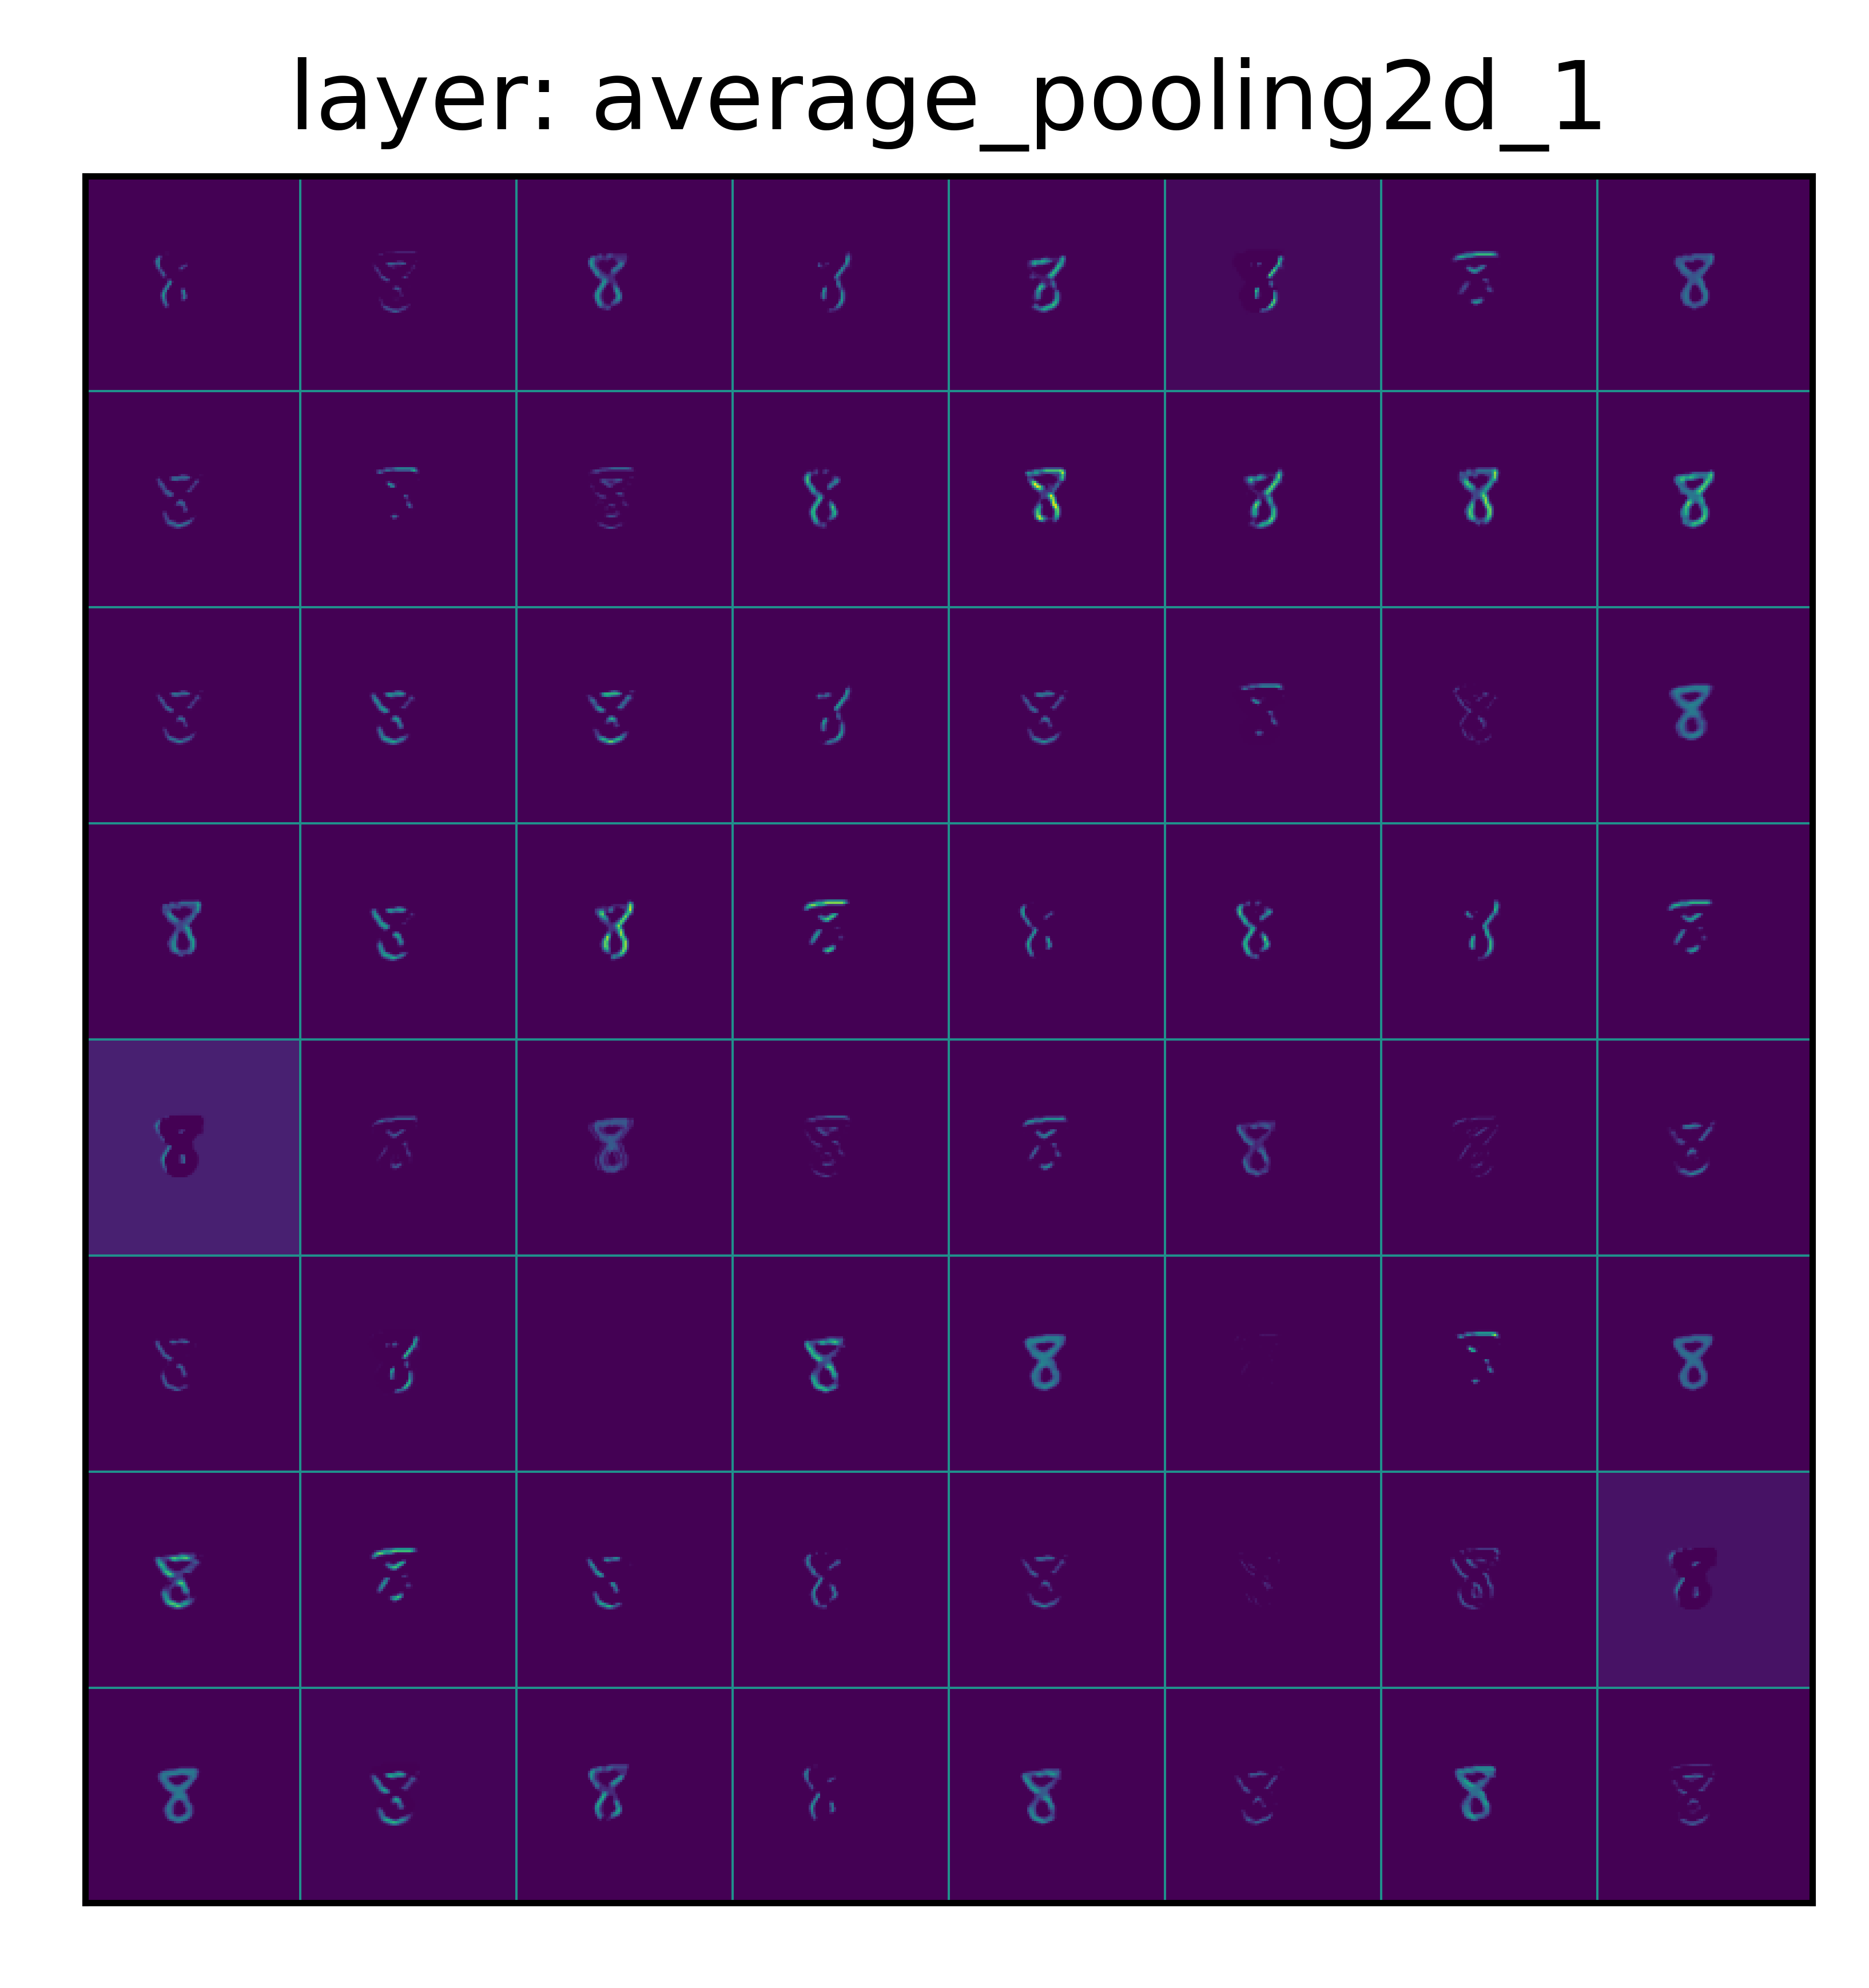

image 4
64  channels


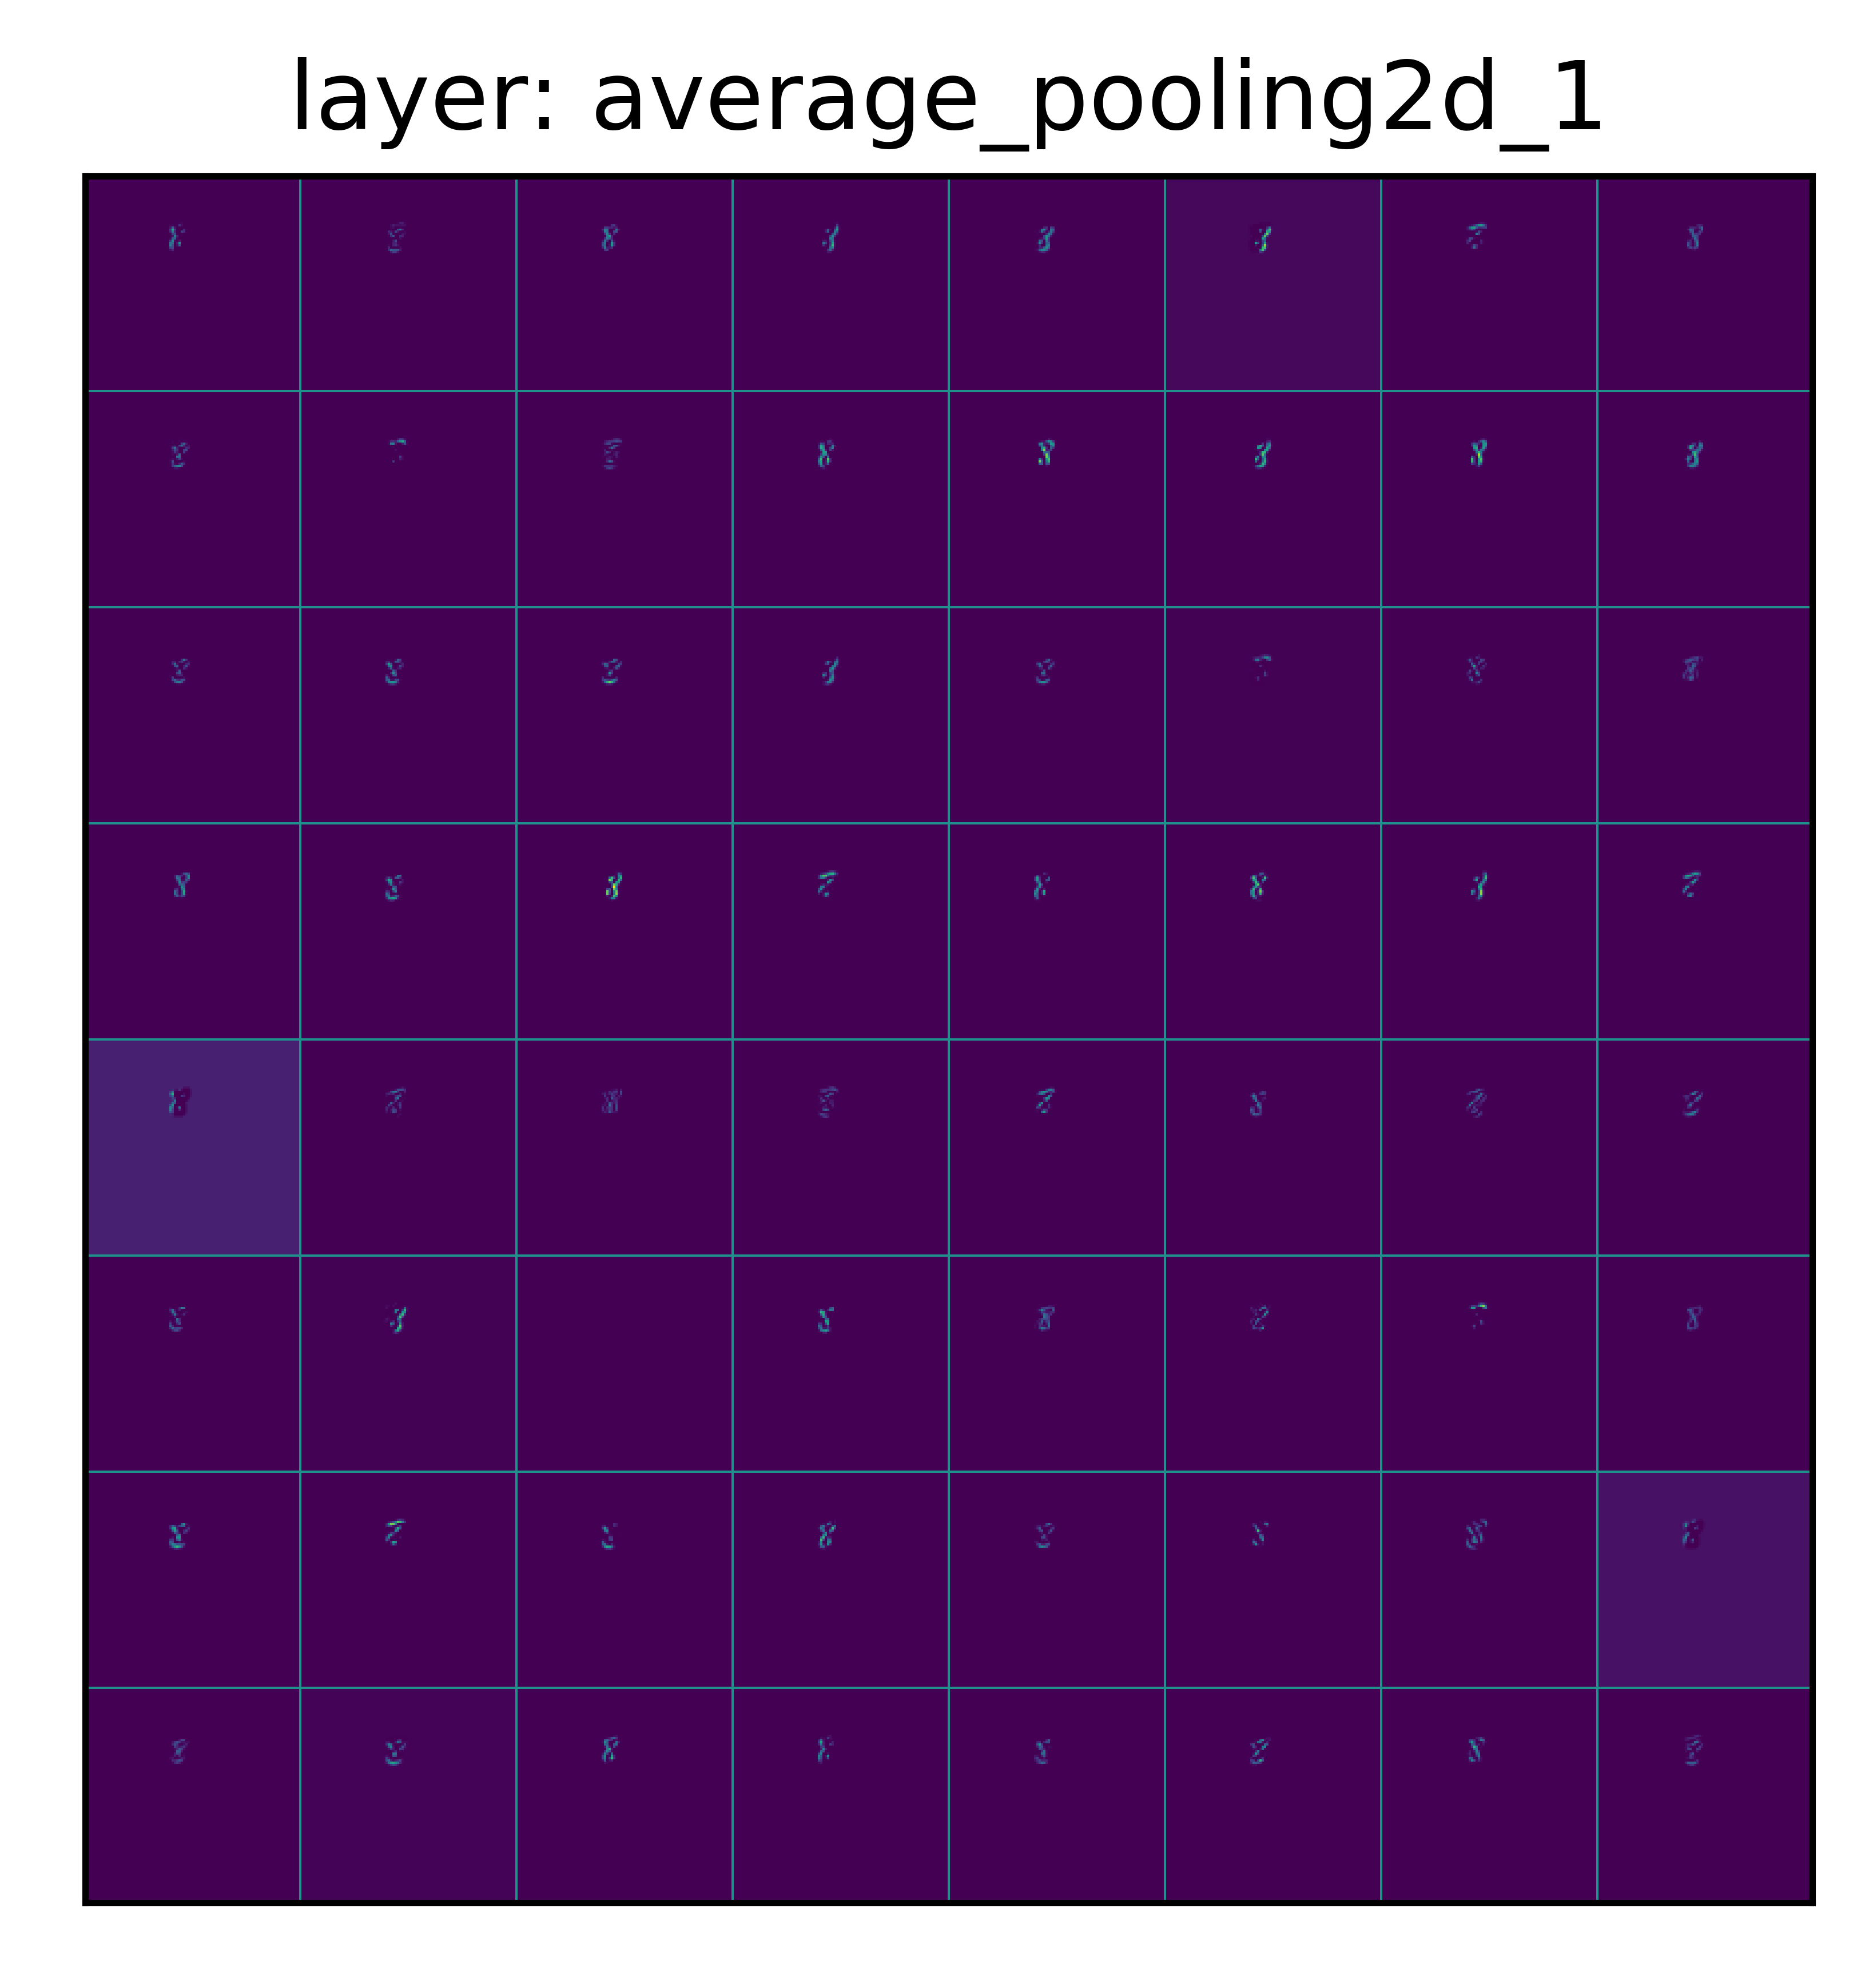

In [22]:
i = 1
for img_id in range(5):
    print("image", img_id)
    display_activation(activations8[i][img_id],8, new_model.layers[i].name)

image 0
64  channels


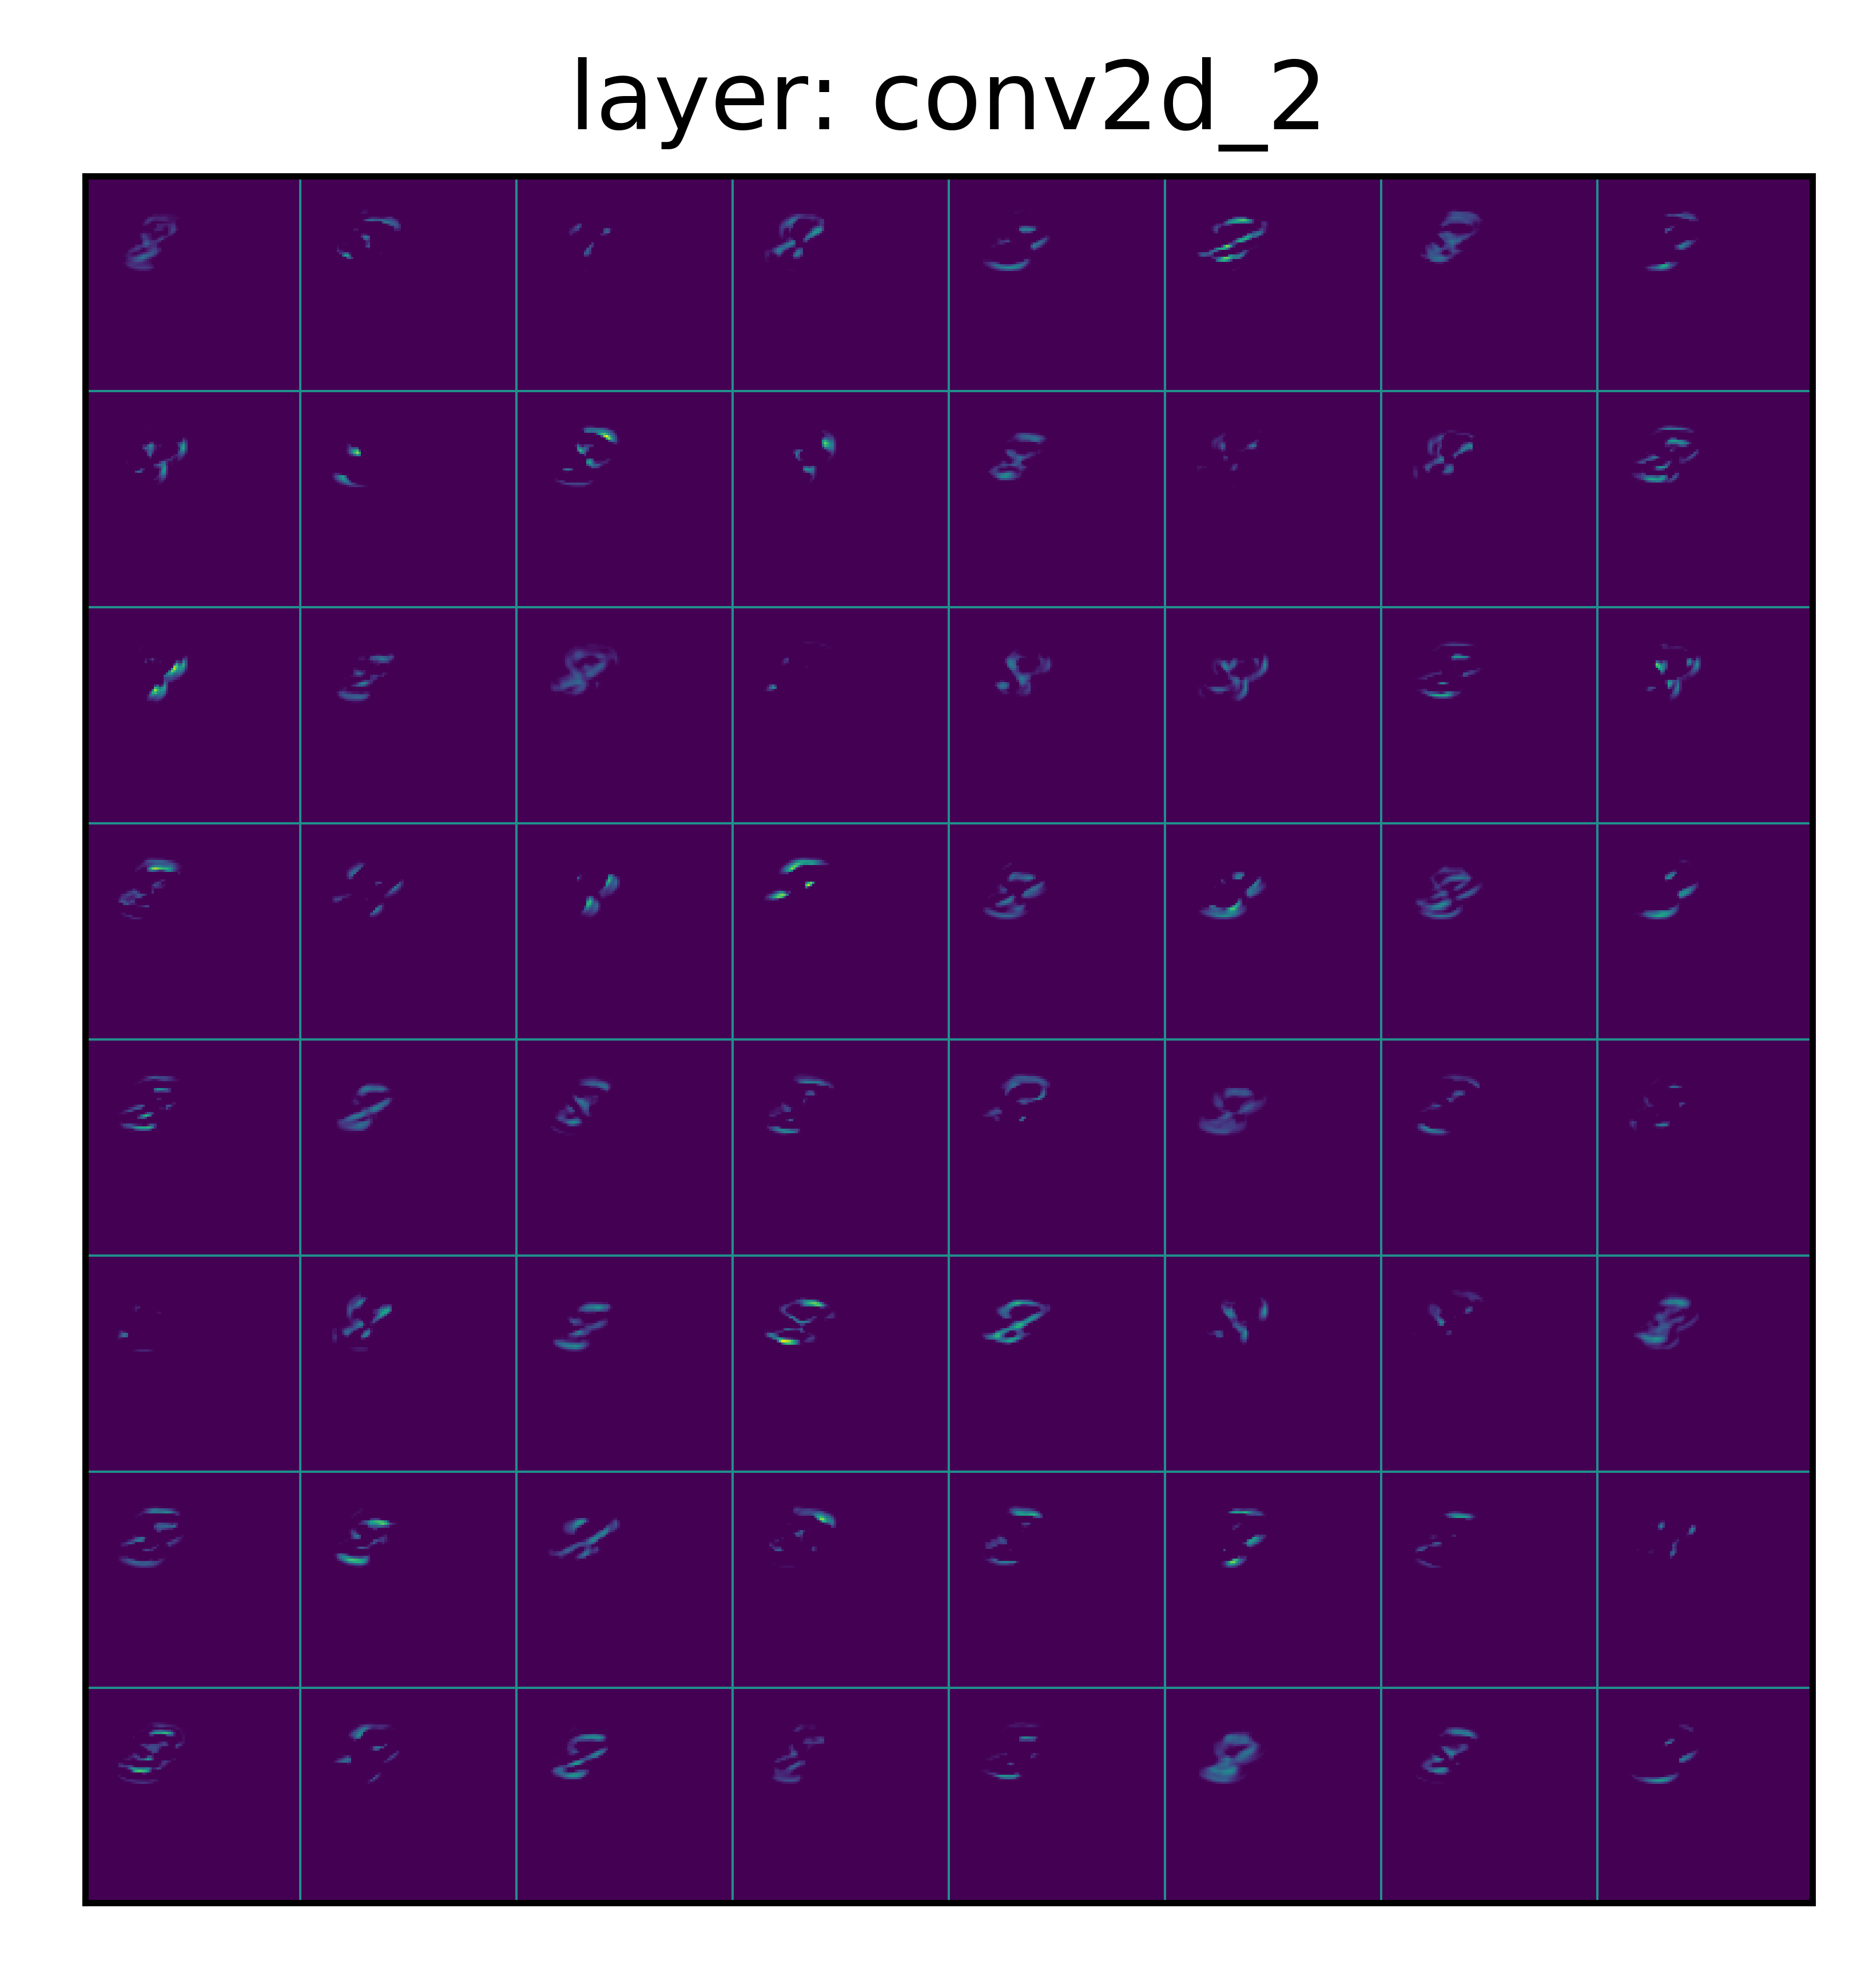

image 1
64  channels


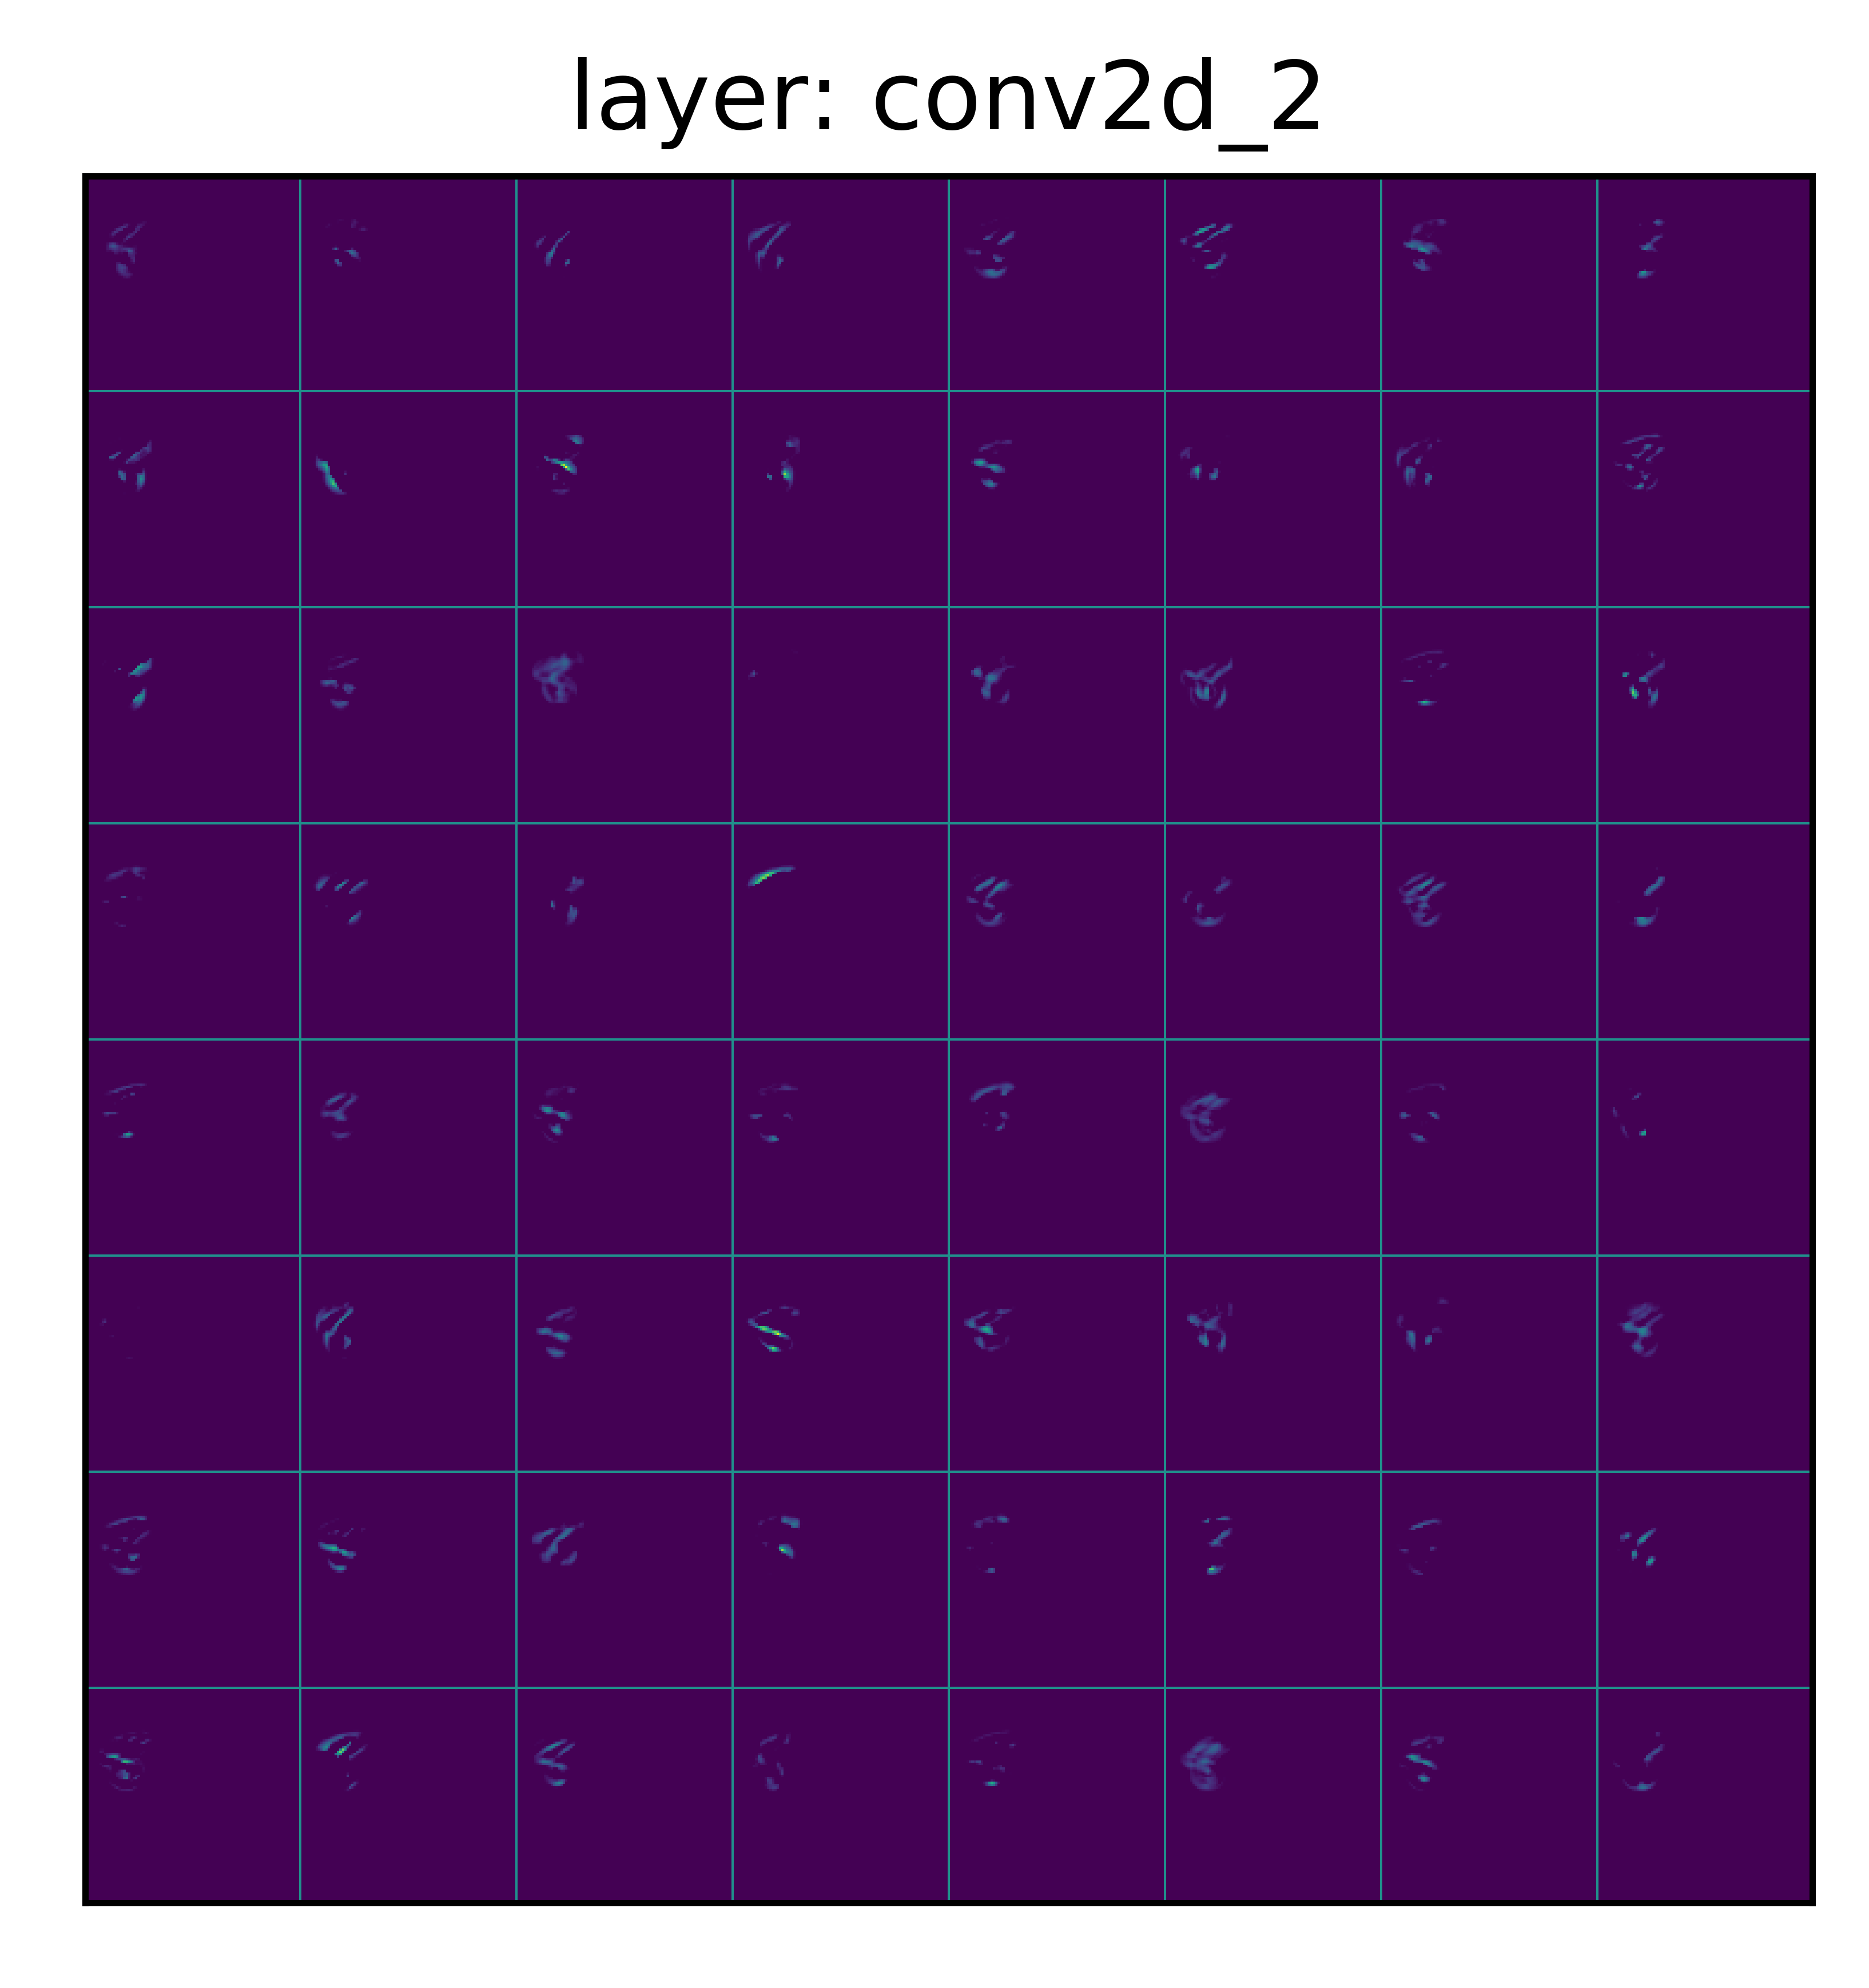

image 2
64  channels


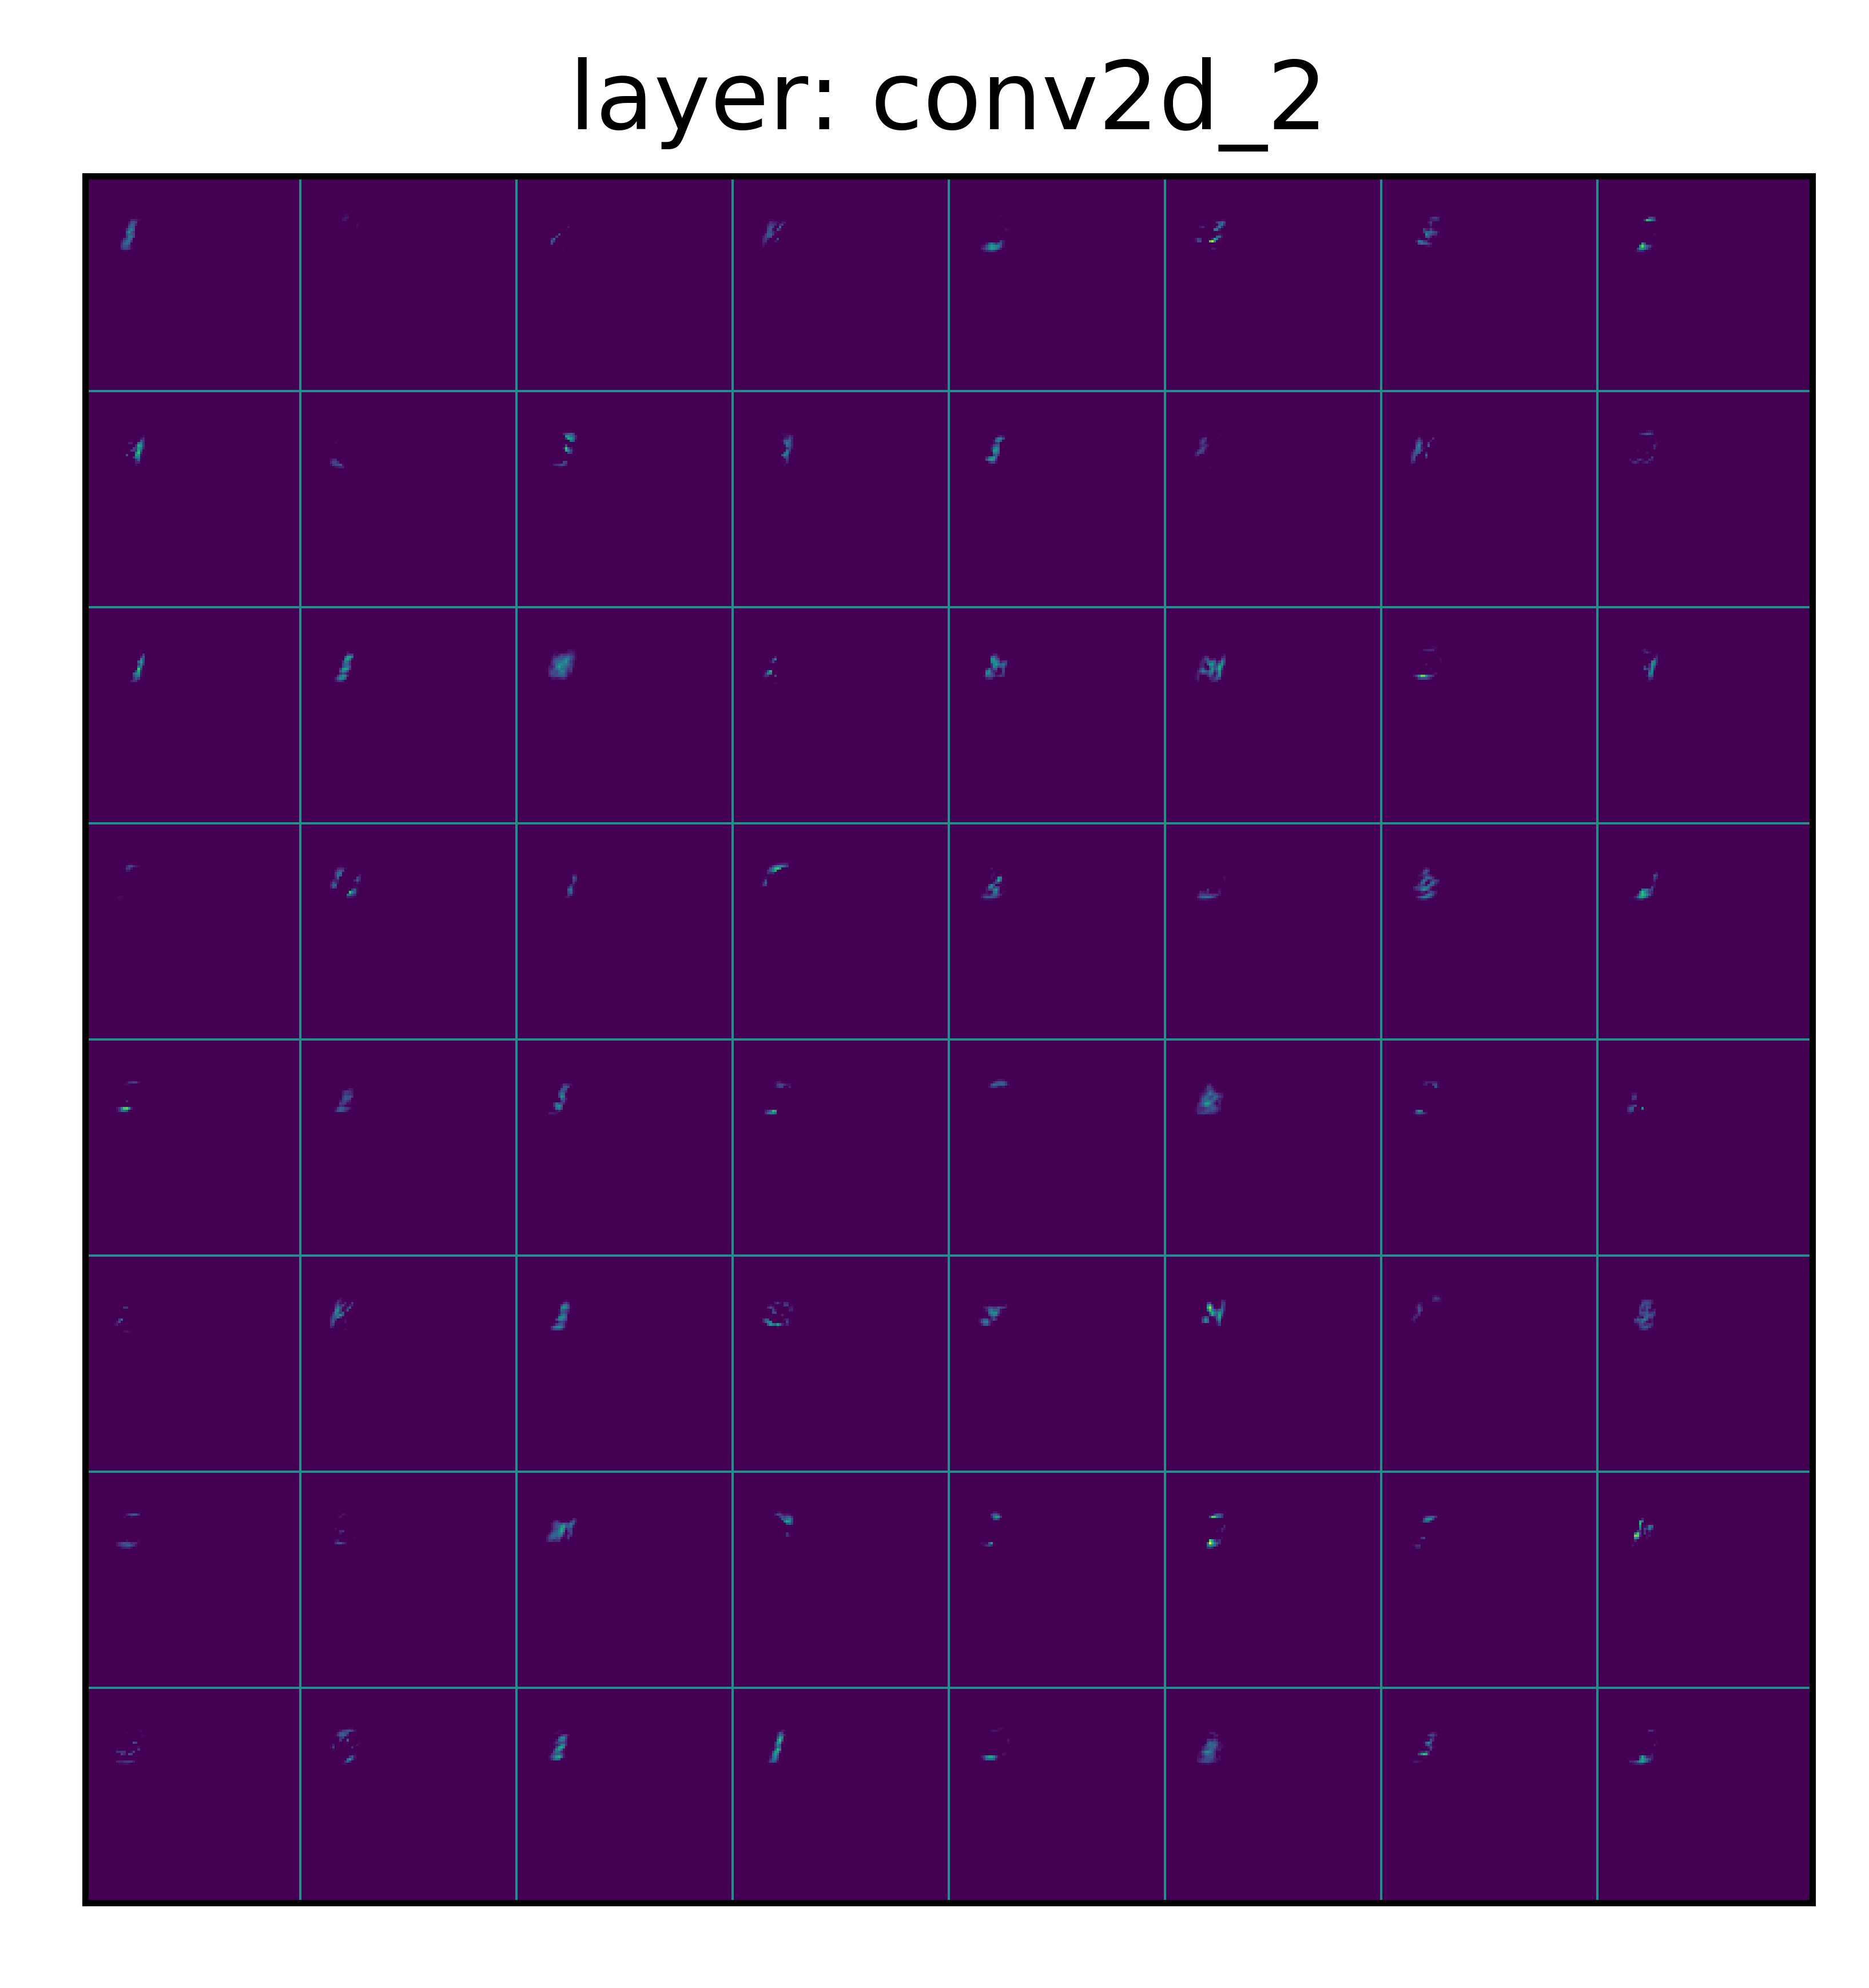

image 3
64  channels


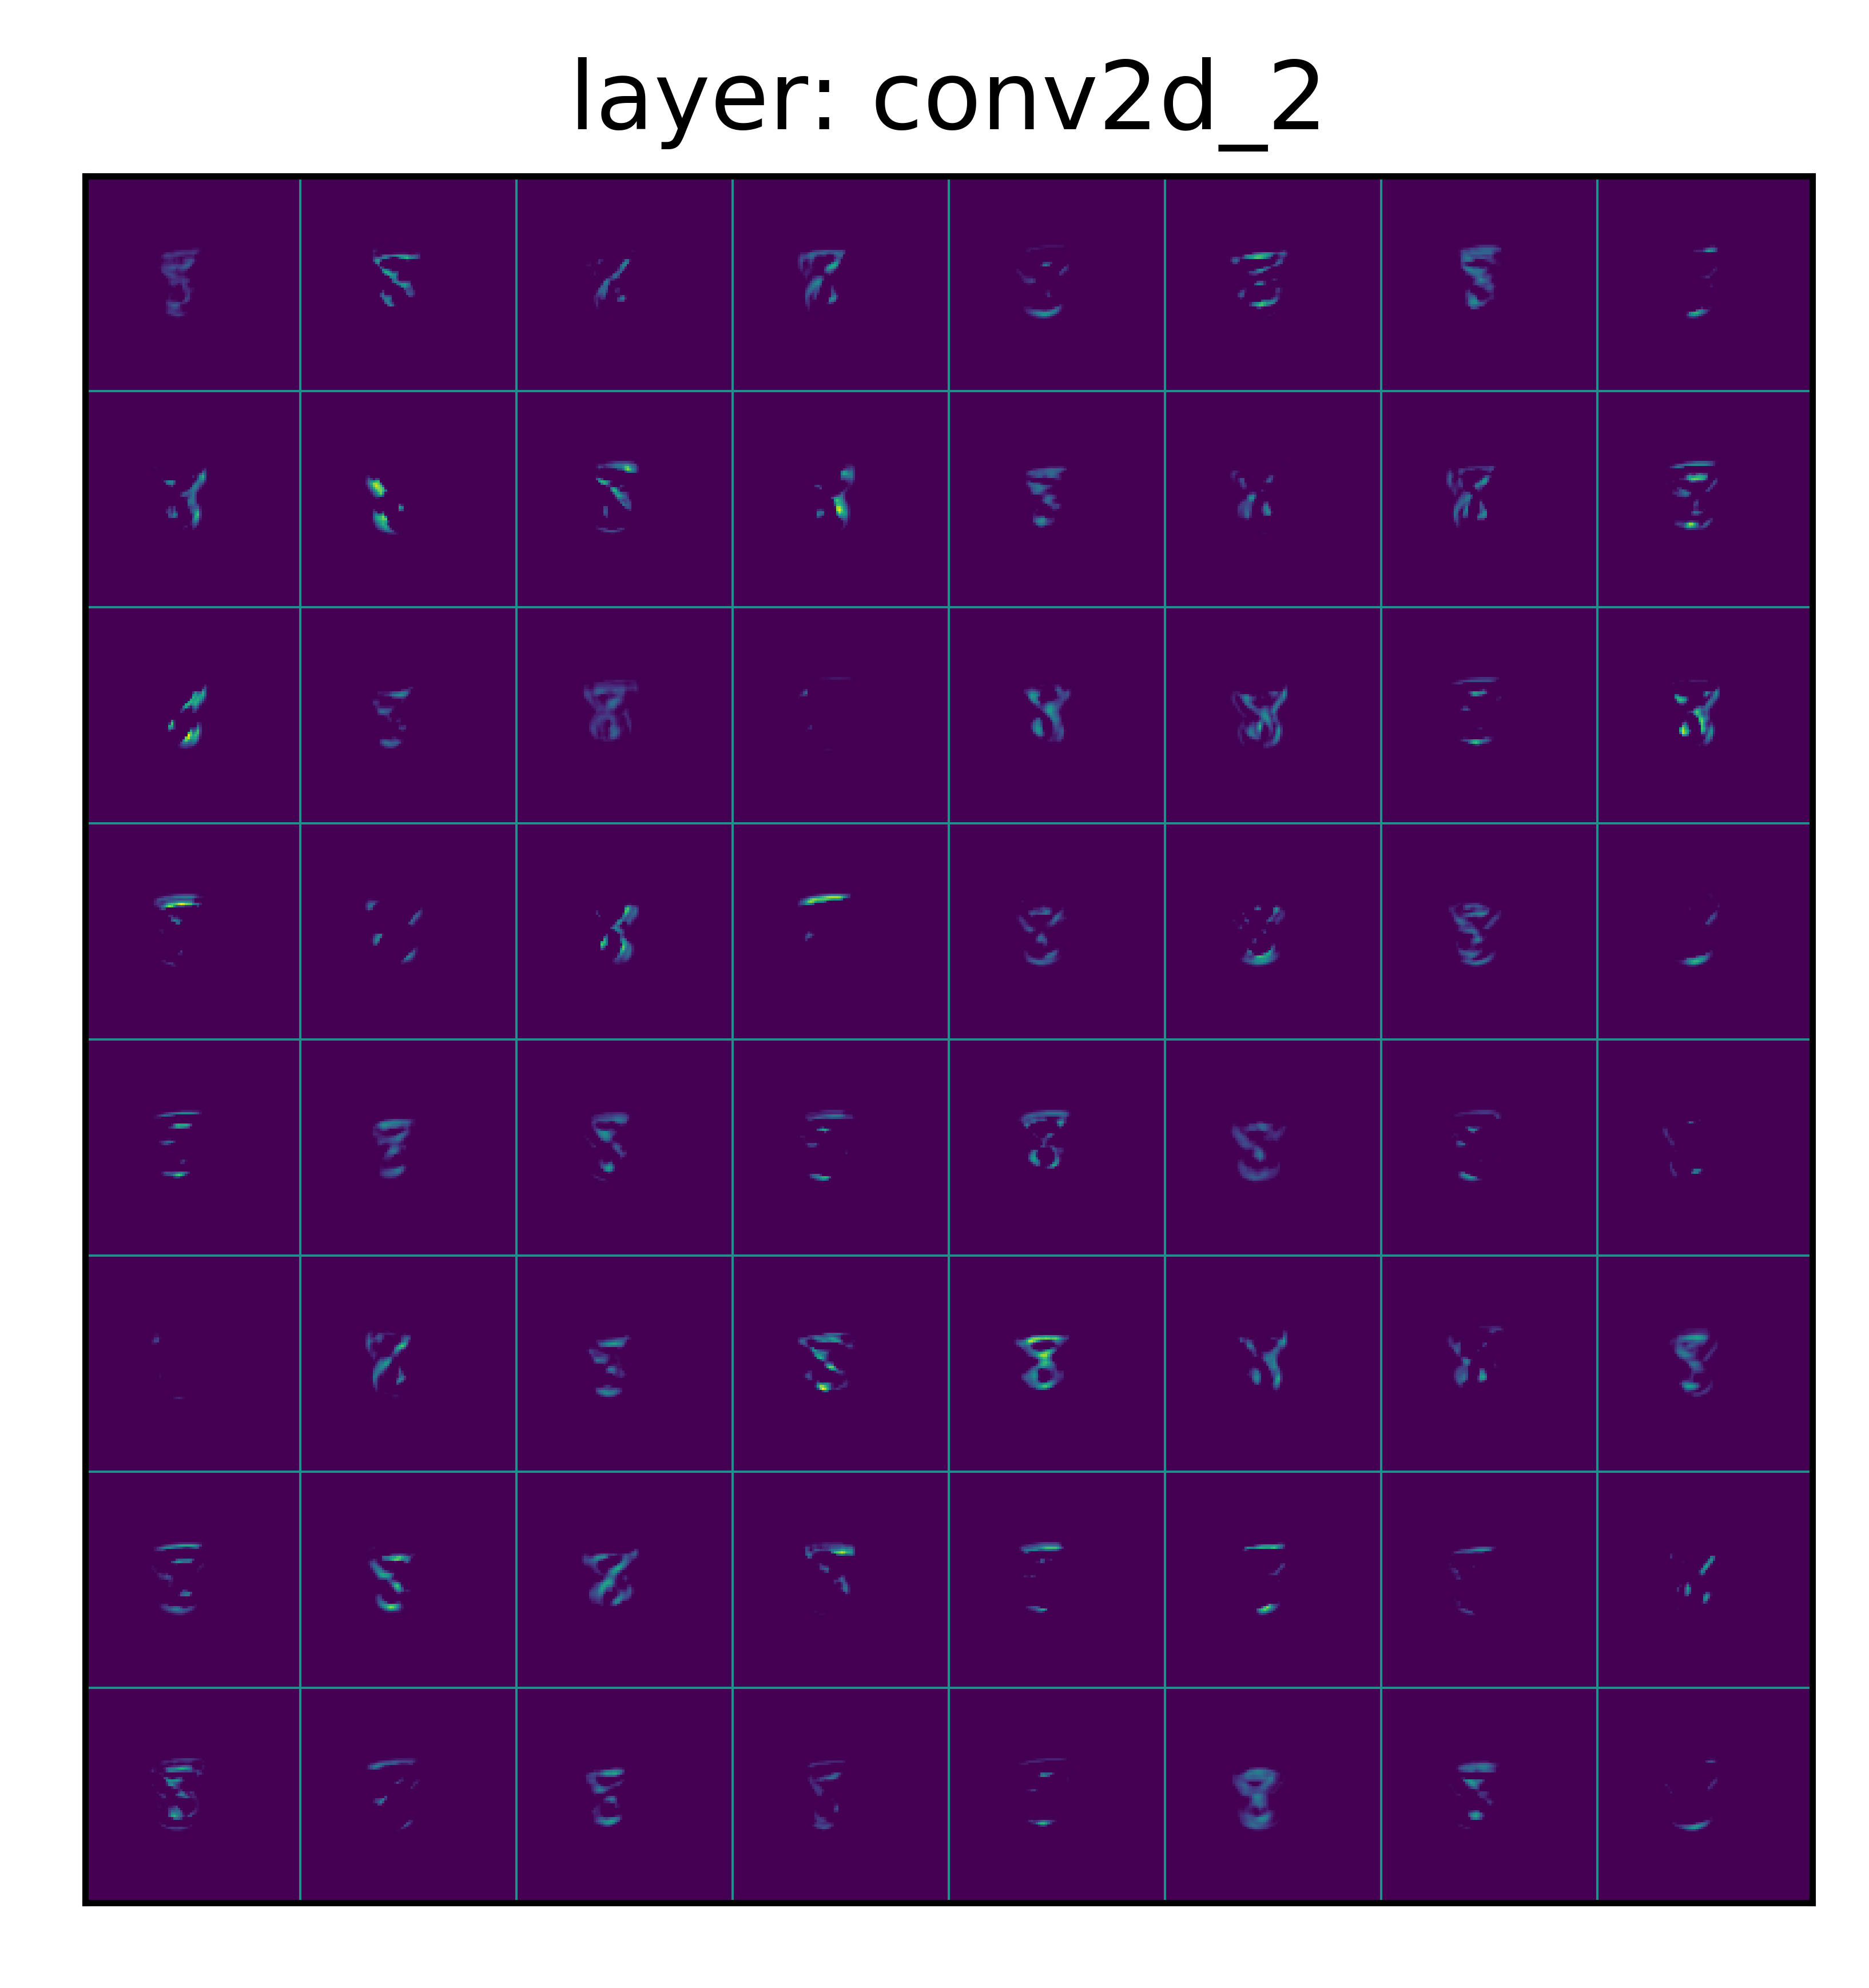

image 4
64  channels


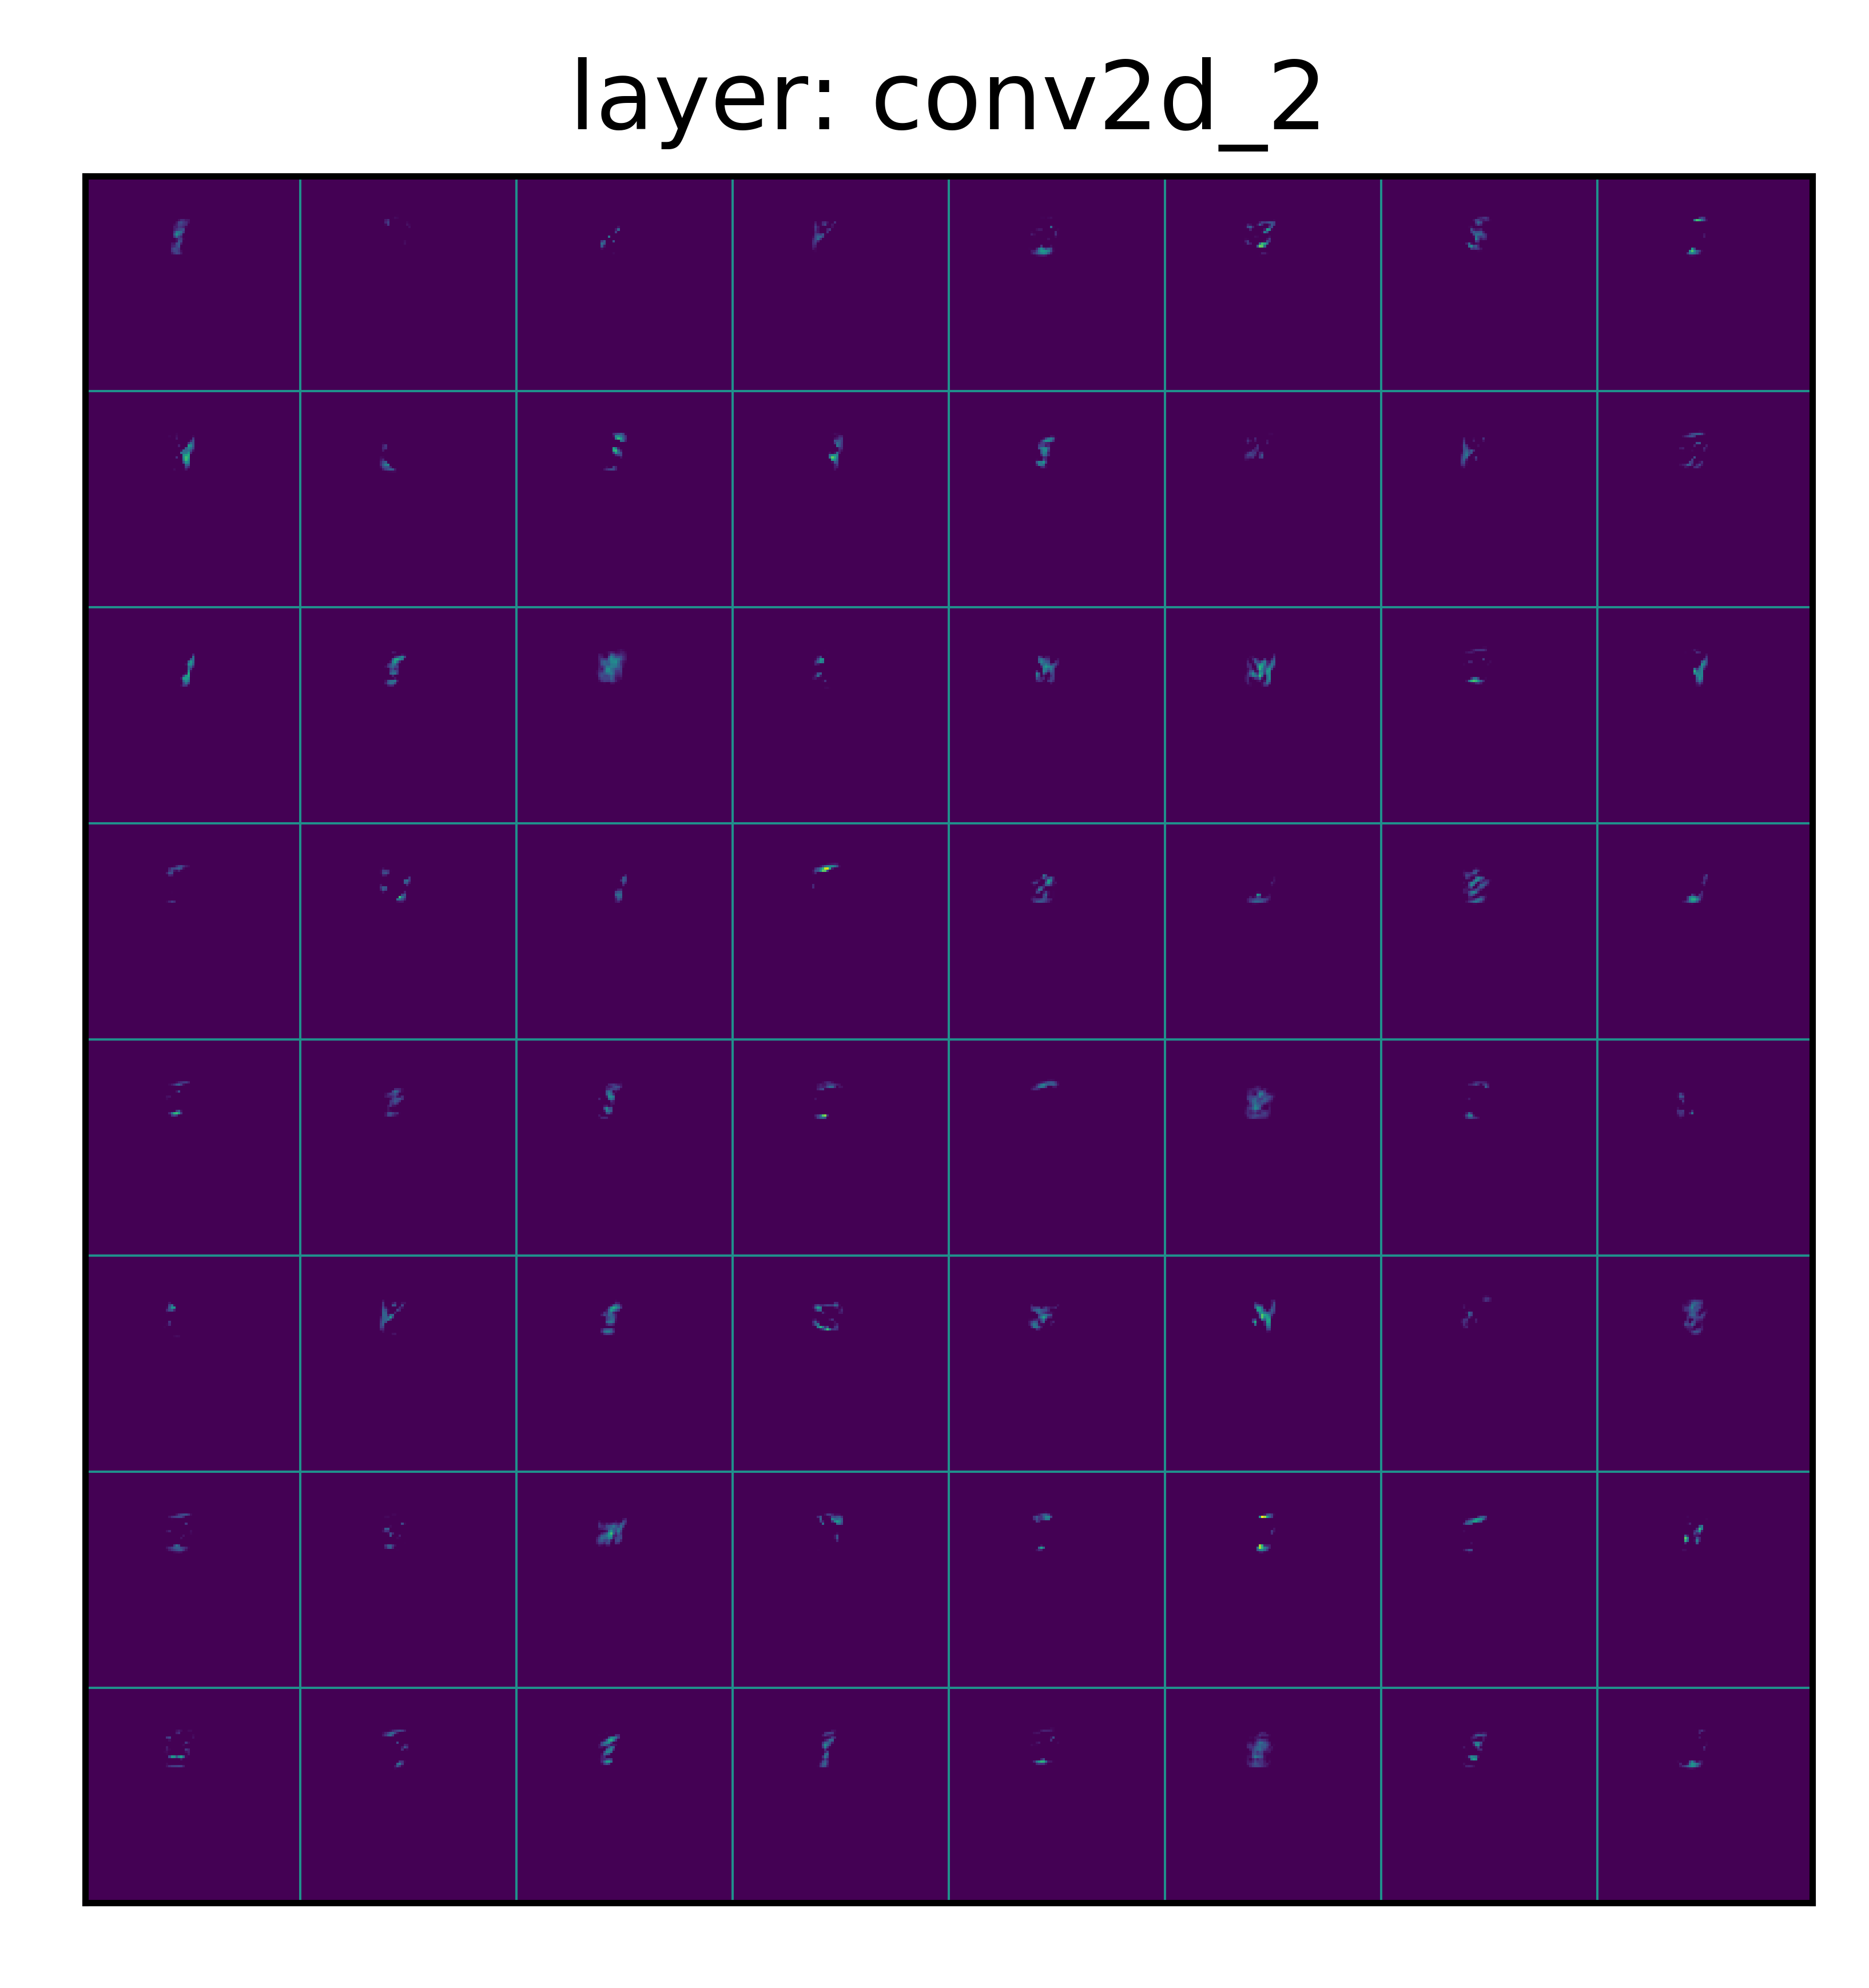

In [23]:
i = 3
for img_id in range(5):
    print("image", img_id)
    display_activation(activations8[i][img_id],8, new_model.layers[i].name)